# GROUP 74 COMP5318 Assignment 2
## Unikeys: MDIN6872, JSTO5983


# 1. Data set up


## 1.1 Load Data

*Please upload both datasets (any file format is ok) to your google drive, and load the datasets through google drive file id in your code. If you want to use Jupyter, please submit all the dataset in an additional zip file.*



In [15]:
import warnings
warnings.filterwarnings("ignore")

# importing libraries and downloading data 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import copy
import random
import sys
from nltk.cluster import euclidean_distance, cosine_distance
np.random
import nltk
from nltk.stem.snowball import SnowballStemmer
import re
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import matplotlib as mpl
from matplotlib.ticker import FixedLocator, FixedFormatter
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances
import seaborn as sns; 
from sklearn.metrics import davies_bouldin_score
from scipy.cluster.hierarchy import complete, dendrogram
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import average, dendrogram
!pip install kneed
from kneed import KneeLocator
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [16]:
#13DhqKhtRnsGbrP1F-MVvDgHVgDpnaYxf   #paper
#1fezxB-okTPa7aiFoHE11EkLVUhjfRxk0   #travl

# Code to download file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id = '13DhqKhtRnsGbrP1F-MVvDgHVgDpnaYxf'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('paper.csv')

id = '1fezxB-okTPa7aiFoHE11EkLVUhjfRxk0'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('travel.csv')

reviews = pd.read_csv('travel.csv', index_col=0)
papers = pd.read_csv('paper.csv', index_col=0)


print(reviews.shape)
print(papers.shape)

(980, 10)
(105, 4)


In [17]:
reviews.head()
reviews.describe()
# resorts and juice have high variance

art       dance       juice  ...     beaches    theaters   religious
count  980.000000  980.000000  980.000000  ...  980.000000  980.000000  980.000000
mean     0.893194    1.352612    1.013306  ...    2.835061    1.569439    2.799224
std      0.326912    0.478280    0.788607  ...    0.137505    0.364629    0.321380
min      0.340000    0.000000    0.130000  ...    2.420000    0.740000    2.140000
25%      0.670000    1.080000    0.270000  ...    2.740000    1.310000    2.540000
50%      0.830000    1.280000    0.820000  ...    2.820000    1.540000    2.780000
75%      1.020000    1.560000    1.572500  ...    2.910000    1.760000    3.040000
max      3.220000    3.640000    3.620000  ...    3.390000    3.170000    3.660000

[8 rows x 10 columns]

In [18]:
papers.head()

paper_title  ...           session
paper_id                                                     ...                  
1         Ensemble Statistical and Heuristic Models for ...  ...  Ensemble Methods
2         Improving Spectral Learning by Using Multiple ...  ...  Ensemble Methods
3         Applying Swarm Ensemble Clustering Technique f...  ...  Ensemble Methods
4             Reducing the Effects of Detrimental Instances  ...  Ensemble Methods
5                Concept Drift Awareness in Twitter Streams  ...  Ensemble Methods

[5 rows x 4 columns]

## 1.2 Data Preprocessing (optional)

***You are required to show your data preprocessing methods for the two datasets (if necessary)***

*You can apply different data preprocessing techniques in different data and clustering models if you need.*


In [0]:
# Get distance matrix (n row x n column) from input normal maxtrix (n row x m attributes)
# this function returns 3 different distance matrices
# these distance matrices are then used as input for Hierarchical clustering

def get_distant_matrix(normal_matrix):
  cos_dist = 1 - cosine_similarity(normal_matrix) # Cosine distance matrix for Hierarchical
  mat_dist = pairwise_distances(normal_matrix, metric='manhattan') # Manhattan distance matrix for Hierarchical
  ucl_dist = pairwise_distances(normal_matrix, metric='euclidean') # Uclidean distance matrix for Hierarchical
  return cos_dist, mat_dist, ucl_dist


### Travel Review Dataset

In [0]:
# Concatenating data for KNN processing
reviews_con = []

for i in range(len(reviews)):
    reviews_con.append(list(reviews.iloc[i]))

reviews_con = np.asarray(reviews_con)

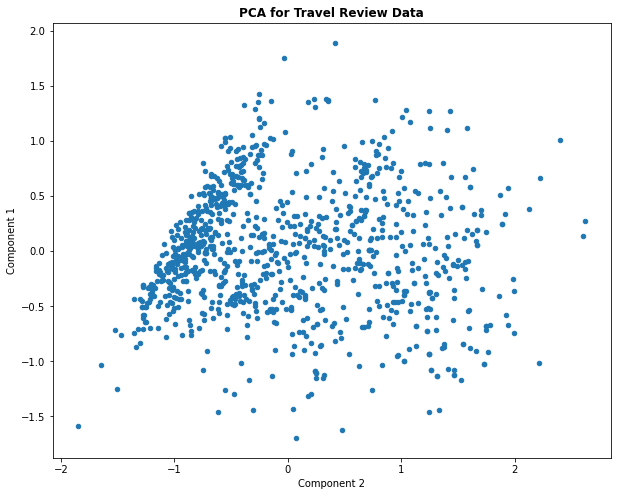

In [21]:
# Visualize Travel review data in 2D using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
comps = pca.fit_transform(reviews)

new_df = pd.DataFrame(data = comps
             , columns = ['Comp1', 'Comp2'])


# A scatter plot of 2 PCA components 

new_df.plot(kind='scatter',x='Comp1',y='Comp2', figsize=(10,8))
plt.xlabel('Component 2')
plt.ylabel('Component 1') 
plt.title('PCA for Travel Review Data', weight='bold')
plt.show();

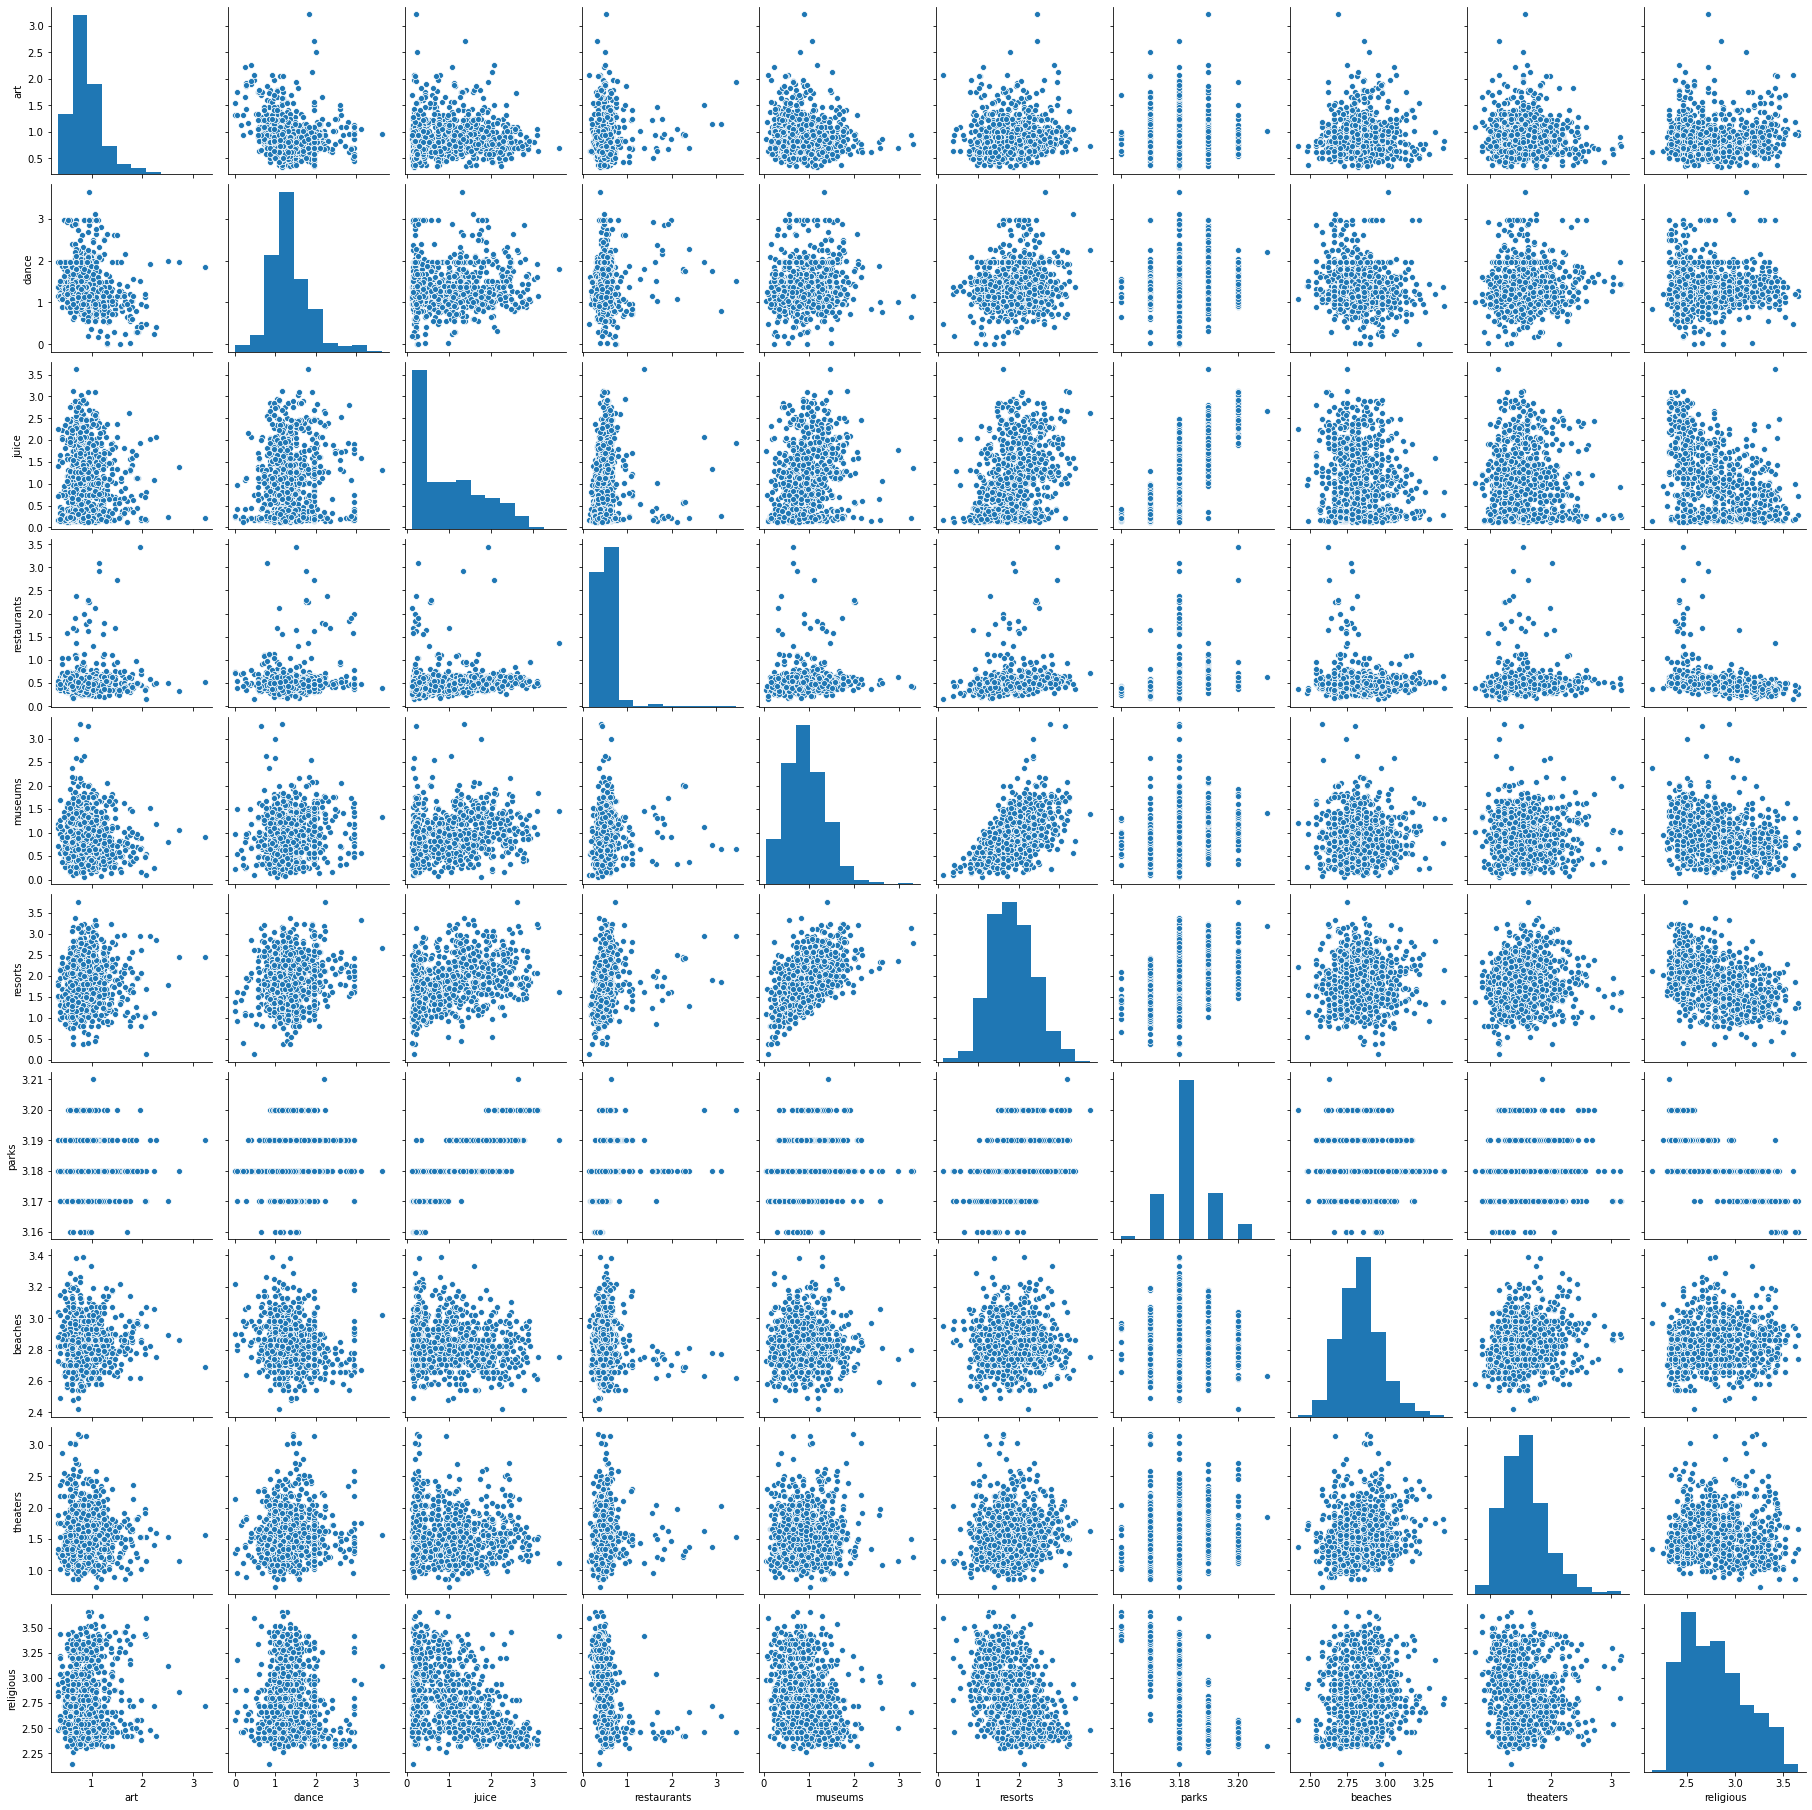

In [0]:
# Scatter plot for every pair of variables in reviews dataset
# Create the default pairplot
sns.pairplot(reviews);

# It may be observed that there were no noticable clusters in any pair of variables

### ICMLA Datasets

In [0]:
# Creating new predictor which is a combination of the keywords and abstracts 
papers["keywords_abstract"]= papers["author_keywords"].str.cat(papers['abstract'], sep =" ") 

# Converting ground truth labels to numeric values using sklearn's label encoder 
encoder = preprocessing.LabelEncoder()
encoder.fit(papers['session'])

papers['session_encoded'] = encoder.transform(papers['session'])

In [23]:
papers.head()

paper_title  ... session_encoded
paper_id                                                     ...                
1         Ensemble Statistical and Heuristic Models for ...  ...               2
2         Improving Spectral Learning by Using Multiple ...  ...               2
3         Applying Swarm Ensemble Clustering Technique f...  ...               2
4             Reducing the Effects of Detrimental Instances  ...               2
5                Concept Drift Awareness in Twitter Streams  ...               2

[5 rows x 6 columns]

In [25]:
# Checking counts for each label 
print(pd.crosstab(index=papers['session'], columns='count'), "\n")
print(papers['session'].nunique())

col_0                                               count
session                                                  
Adaptive Data-Driven Modeling in Dynamic Enviro...      3
Applications in Security                                5
Ensemble Methods                                        5
Feature Extraction and Selection                        5
Information Retrieval I                                 4
Information Retrieval II                                3
Machine Learning Algorithms, Systems and Applic...      5
Machine Learning Applications in Education I            4
Machine Learning Applications in Education II           4
Machine Learning I                                      5
Machine Learning II                                     4
Machine Learning for Predictive Models I                4
Machine Learning for Predictive Models II               4
Machine Learning in Energy Applications                 4
Machine Learning in Information and System Secu...      4
Machine Learni

In [26]:
# Tokenize and stemming function
stemmer = SnowballStemmer("english")
nltk.download('punkt')

def tokenize_and_stem(text):
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances
import seaborn as sns; 

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

# Tokenizing and stemming paper abstract data 
tfidf_matrix = tfidf_vectorizer.fit_transform(papers['abstract'])

# Convert the tfidf matrix to np array for using as K mean input
reform_tfidf_matrix = tfidf_matrix.toarray()


print("Number of Unique sessions:", papers['session'].nunique())
print("\nNumber of unique words: ", reform_tfidf_matrix.shape)
print(tfidf_vectorizer.get_feature_names())

# N.B. Tokenize and stemming function taken from COMP5318 Lab 9

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Number of Unique sessions: 24

Number of unique words:  (105, 38)
['accuraci', 'algorithm', 'applic', 'approach', 'base', 'classif', 'classifi', 'compar', 'comput', 'consid', 'data', 'dataset', 'differ', 'effect', 'featur', 'howev', 'improv', 'learn', 'machin', 'machin learn', 'method', 'model', 'network', 'new', 'paper', 'perform', 'present', 'problem', 'process', 'propos', 'provid', 'result', 'set', 'studi', 'techniqu', 'train', 'use', 'work']


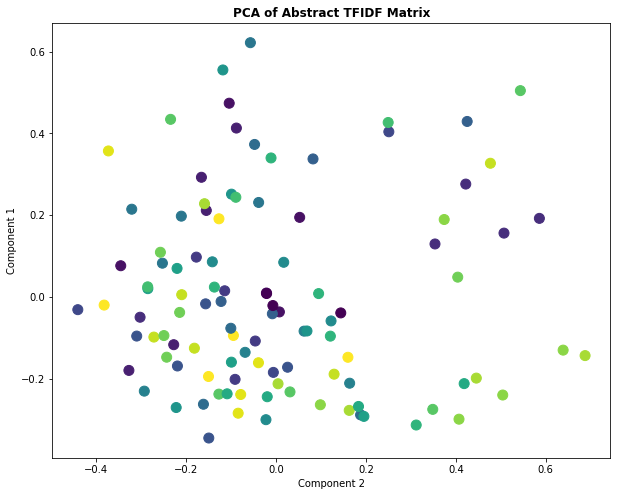

In [27]:
# Visualize Papers data (tfidf matrix) in 2D using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
comps = pca.fit_transform(reform_tfidf_matrix)

new_df = pd.DataFrame(data = comps
             , columns = ['Comp1', 'Comp2'])

plt.figure(figsize=(10,8))
plt.title('PCA of Abstract TFIDF Matrix', weight='bold')
plt.xlabel('Component 2')
plt.ylabel('Component 1') 
plt.scatter(new_df['Comp1'], new_df['Comp2'], c=papers['session_encoded'], s=100);
# Visualize Papers data (tfidf matrix) in 2D using PCA

['statistical word alignment, ensemble learning, heuristic word alignment', 'representation, spectral learning, discrete Fourier, basis selection, ensemble', 'Software defect prediction, Particle swarm optimization, Cluster data, Ensemble clustering', 'filtering, label noise, instance weighting', 'Twitter, Adaptation models, Time-frequency analysis, Event detection, Context, Vectors', 'dimensionality reduction, mobile security, android, principal components analysis', 'active learning, semi-supervised learning, audio CAPTCHA, automatic speech recognition', 'Software Architecture, Machine Learning, Q-Learning, Security, Repair', 'Signature,Discretize,Unordered,Classification,Training,Bag-of-pattern', 'abnormal event detection, low-rank approximation, adaptive learning', 'Smart Environment, Activity Recognition, Graph Representation', 'RFE, feature selection, embedded methods, Support Vector Machines, Recursive Feature Addition', 'Object Tracking, Convolutional Neural Network, Feature Le

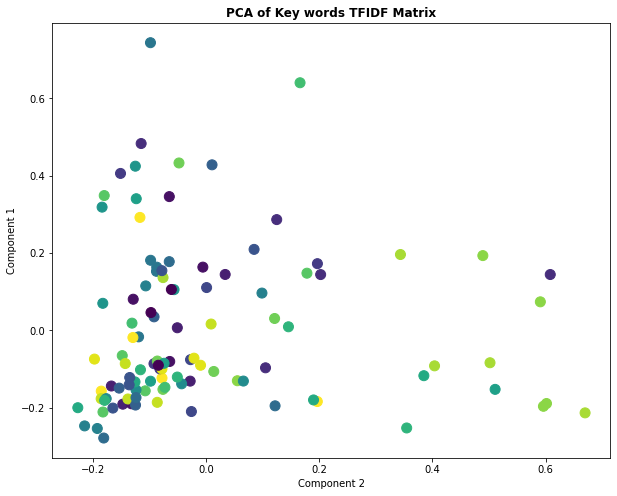

In [28]:
# Visualize paper data using Author keyword only (author keyword =>> vector tfidf)
from sklearn.feature_extraction.text import TfidfVectorizer

corpus1 = list(papers['author_keywords'])
print(corpus1)

vectorizer = TfidfVectorizer(max_features=200000,
                                 min_df=0.01, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,1))

keyword_idf = vectorizer.fit_transform(corpus1)

# Print unique words
print(vectorizer.get_feature_names())

# keyword_idf is the tfidf of author keywords
keyword_idf = keyword_idf.toarray() #tfidf matrix to be used by the algorithms
print(keyword_idf.shape)

# Visualize paper data using Author keywords in 2 dimension PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
comps = pca.fit_transform(keyword_idf)

new_df = pd.DataFrame(data = comps
             , columns = ['Comp1', 'Comp2'])
plt.figure(figsize=(10,8))
plt.title('PCA of Key words TFIDF Matrix', weight='bold')
plt.xlabel('Component 2')
plt.ylabel('Component 1') 
plt.scatter(new_df['Comp1'], new_df['Comp2'], c=papers['session_encoded'], s=100);

In [29]:
# Removing zeros from vectors so silhouette score is a better representation of 
# similarity 
c = 0
for i in range(len(keyword_idf)):
  if sum(keyword_idf[i]) == 0:
    c += 1
print("Number of full 0 vectors:", c)
print(keyword_idf.shape)

Number of full 0 vectors: 1
(105, 144)




---


# 2. K-means Clustering

## 2.1 Travel Review Dataset

### Train K-means clustering

In [0]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, metric, rseed=2):
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    while True:
        labels = pairwise_distances_argmin(X, centers, metric=metric)
        
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

# N.B. find clusters algorithm adapted from COMP5318 Lab 9

In [0]:
# Function for finding interia of model 
def inertia(labels, centres, data):
    inertia_total = []
    for i in range(len(data)):
        # find the sum of squared difference between vector and it's nearest node 
        dif = sum(np.square((data[i]-centers[labels[i]])))
        # append inertia for vector to intertia total list
        inertia_total.append(dif)
    # Return sum of inertia total list 
    return sum(inertia_total)

In [0]:
# Training and storing evaluation metrics 
k = [2, 5, 10, 15, 20, 25, 30, 35]

# arrays to store the various evaluation metrics 
# Internal measures 
inertia_scores_euclidean = []
inertia_scores_cosine = []
silhouette_scores_euclidean = []
silhouette_scores_cosine = []
davies_euclidean = []
davies_cosine = [] 

for i in k:
    # Inertia and silhouette scores made using euclidean similarity 
    centers, labels_euclidean = find_clusters(reviews_con, i, 'euclidean')
    score = inertia(labels_euclidean, centers, reviews_con)
    inertia_scores_euclidean.append(score)
    sil_score = silhouette_score(reviews_con, labels_euclidean)
    silhouette_scores_euclidean.append(sil_score)
    davies_euclidean.append(davies_bouldin_score(reviews_con, labels_euclidean))
    
    # Inertia and silhouette scores made using cosine similarity 
    centers, labels_cosine = find_clusters(reviews_con, i, 'cosine')
    score = inertia(labels_cosine, centers, reviews_con)
    inertia_scores_cosine.append(score)
    sil_score = silhouette_score(reviews_con, labels_cosine)
    silhouette_scores_cosine.append(sil_score)
    davies_cosine.append(davies_bouldin_score(reviews_con, labels_cosine))

### First evaluation 

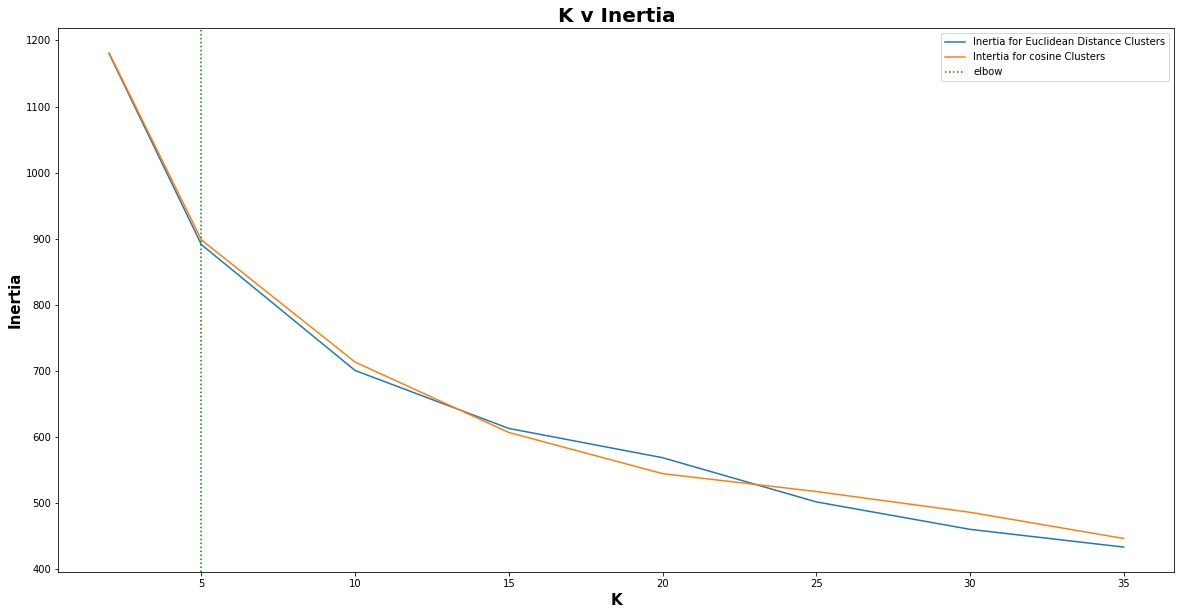

In [33]:
# Plotting intertia scores 
plt.figure(figsize=(20,10))
plt.plot(k, inertia_scores_euclidean, label='Inertia for Euclidean Distance Clusters')
plt.plot(k, inertia_scores_cosine, label = 'Intertia for cosine Clusters')
plt.xlabel('K', weight='bold', size=15)
plt.ylabel('Inertia', weight='bold', size=15)
plt.title('K v Inertia', size = 20, weight='bold')
plt.axvline(x=5, color='green', linestyle=':', label='elbow')
plt.legend()
plt.show()

### Second evaluation 

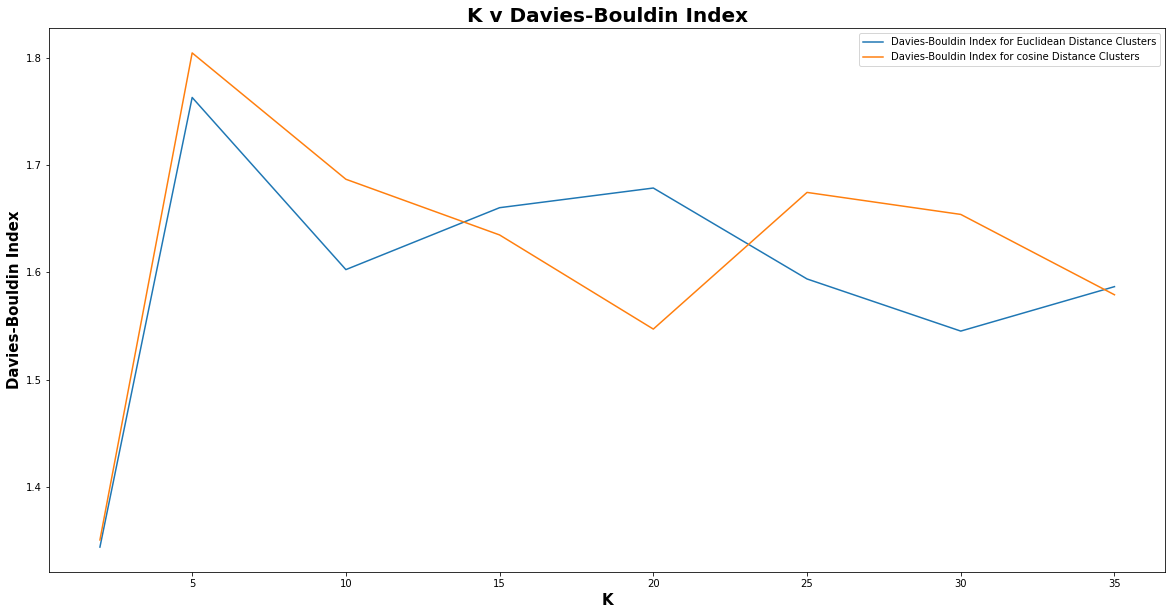

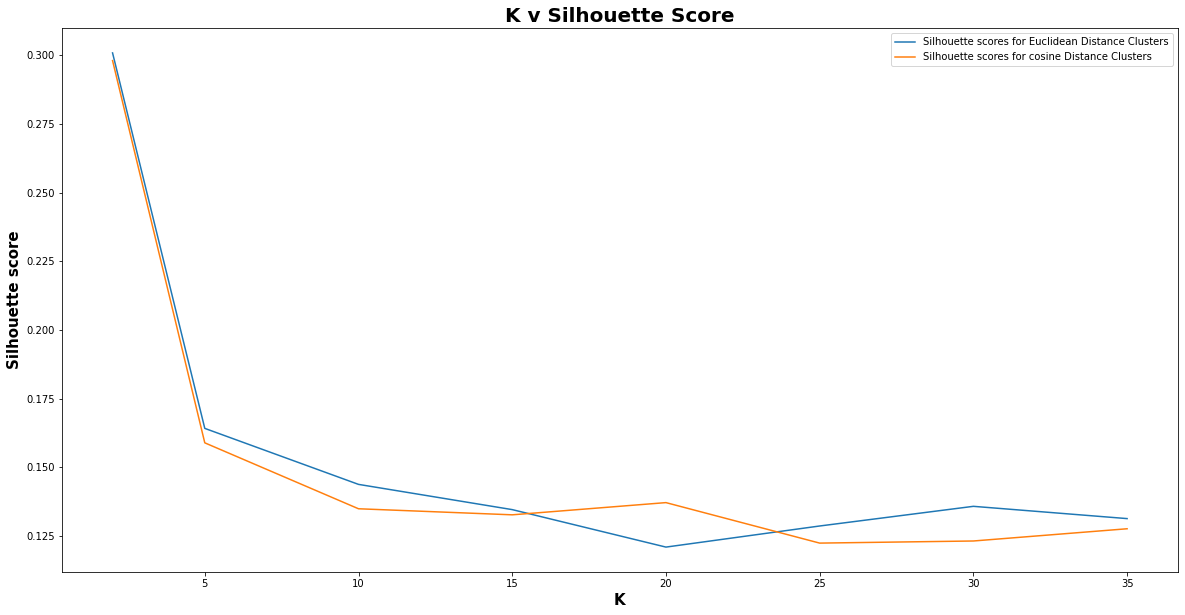

In [34]:
# plotting Davies-Bouldin index scores 
plt.figure(figsize=(20,10))
plt.plot(k, davies_euclidean, label='Davies-Bouldin Index for Euclidean Distance Clusters')
plt.plot(k, davies_cosine, label='Davies-Bouldin Index for cosine Distance Clusters')

plt.xlabel('K', weight='bold', size=15)
plt.ylabel('Davies-Bouldin Index', weight='bold', size=15)
plt.title('K v Davies-Bouldin Index', size = 20, weight='bold')
plt.legend()
plt.show()

# Plotting silhouette scores 
plt.figure(figsize=(20,10))
plt.plot(k, silhouette_scores_euclidean, label='Silhouette scores for Euclidean Distance Clusters')
plt.plot(k, silhouette_scores_cosine, label='Silhouette scores for cosine Distance Clusters')

plt.xlabel('K', weight='bold', size=15)
plt.ylabel('Silhouette score', weight='bold', size=15)
plt.title('K v Silhouette Score', size = 20, weight='bold')
plt.legend()
plt.show()

0.30088354562148123


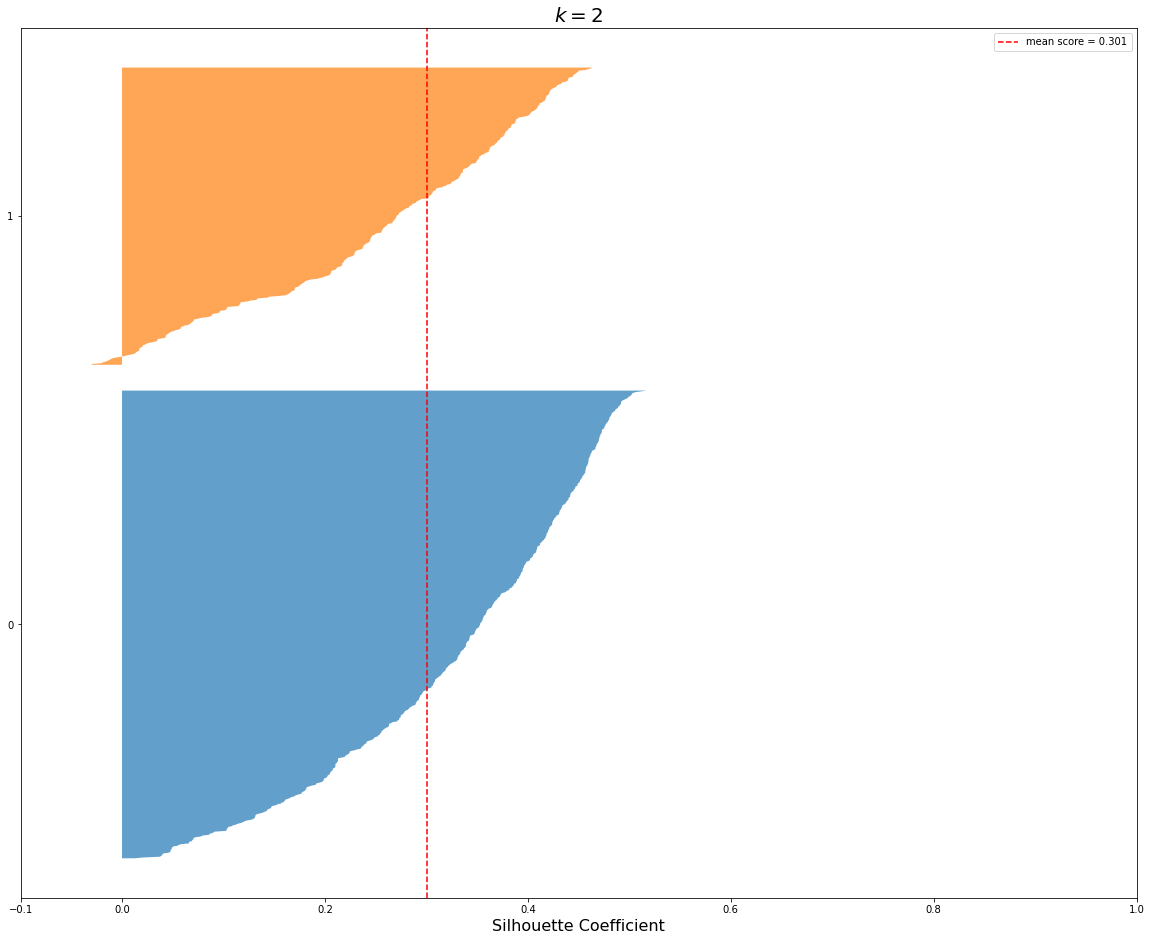

0.1642254099531792


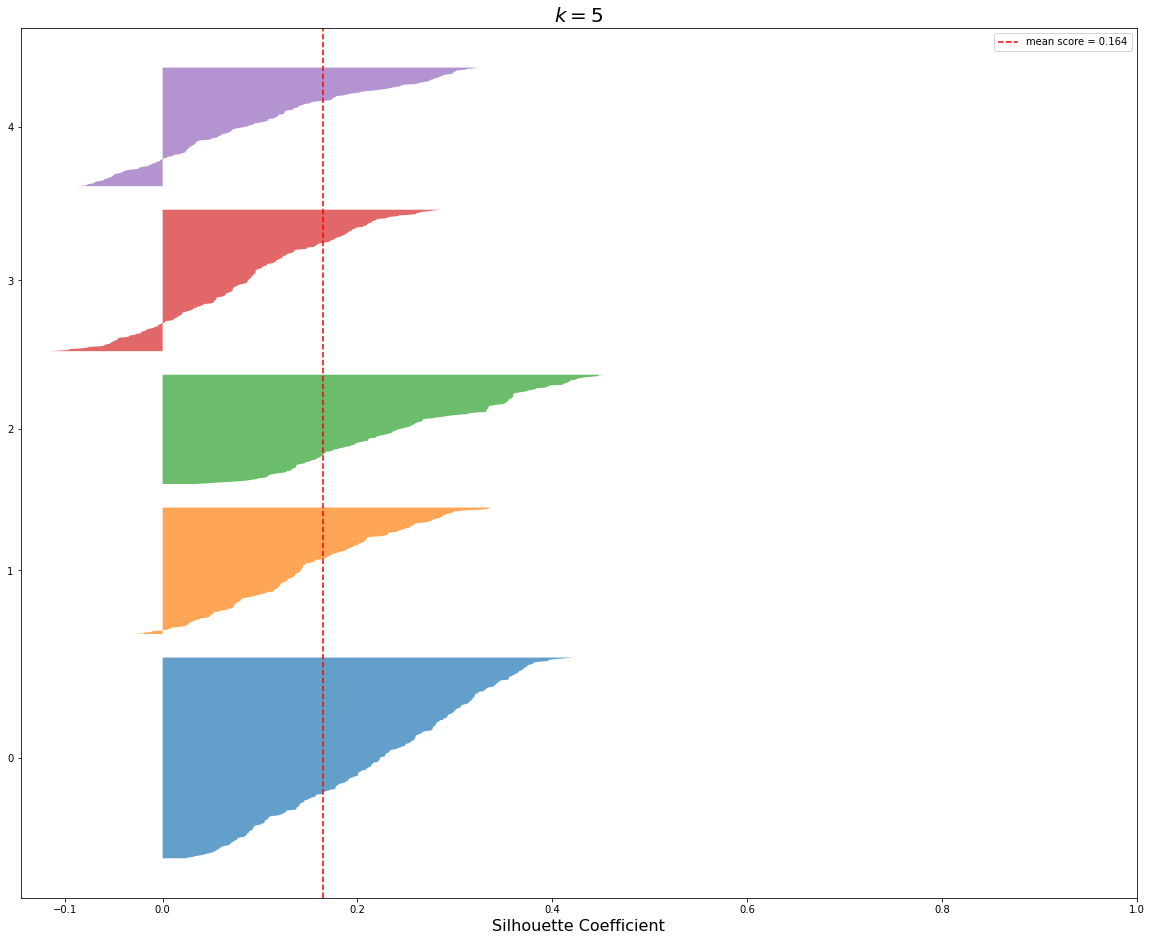

0.14384345924169598


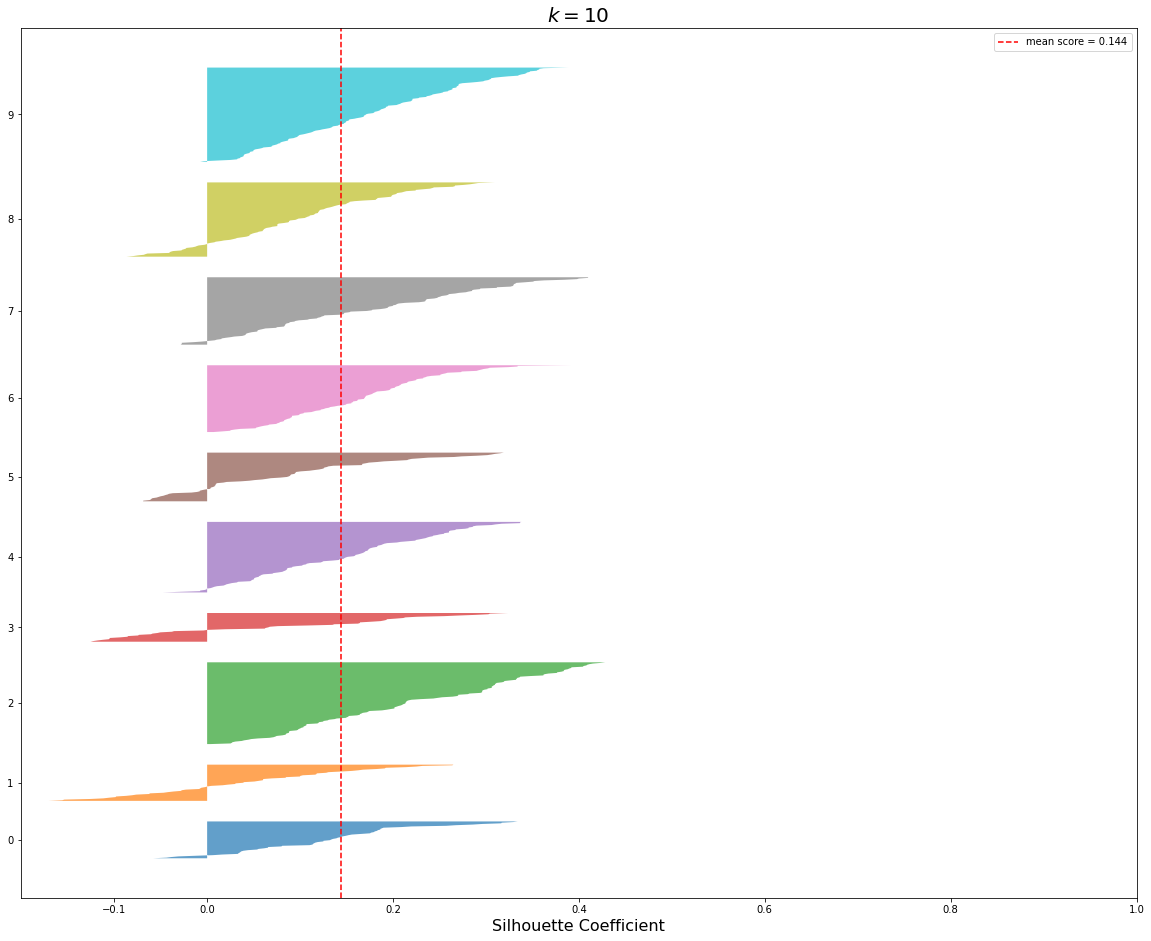

0.1210189543999141


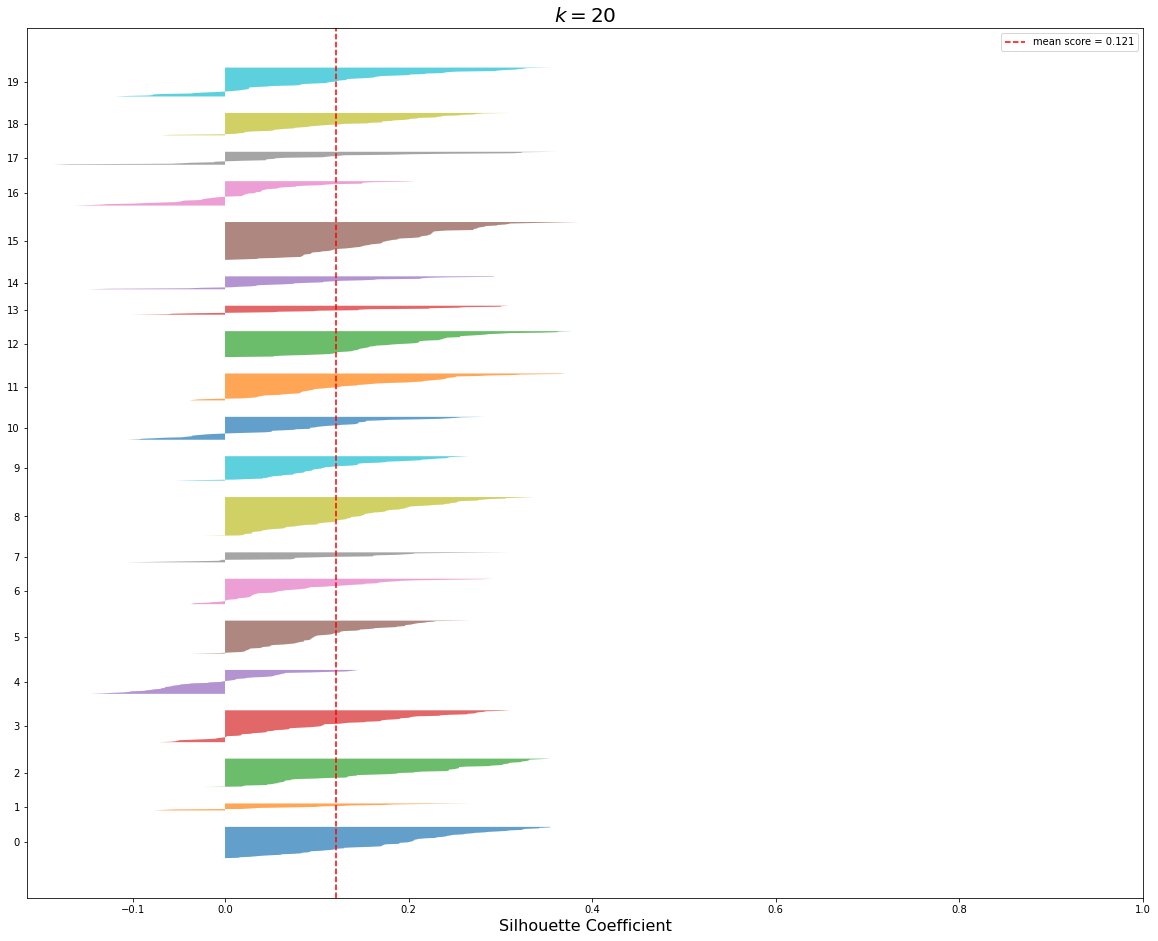

In [35]:
# Graphs for euclidean silhouette scores
for k in (2, 5, 10, 20):
    plt.figure(figsize=(20,16))
    
    centers, labels_euclidean = find_clusters(reviews_con, k, 'euclidean')
    y_pred = np.asarray(labels_euclidean)
    
    silhouette_scores = silhouette_score(reviews_con, y_pred)
    silhouette_coefficients = silhouette_samples(reviews_con, labels_euclidean)
    padding = len(reviews_con) // 30
    pos = padding
    ticks = []
    
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 30):
        plt.ylabel("Cluster", fontsize=16)
    
    if k in (2, 5, 10, 20):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient", fontsize=16)
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores, color="red", linestyle="--", label = "mean score = {}".format(round(silhouette_scores, 3)))
    print(silhouette_scores)
    plt.title("$k={}$".format(k), fontsize=20)
    plt.legend()
    plt.show()

# N.B. find clusters algorithm adapted from COMP5318 Lab 10

0.2980884672972019


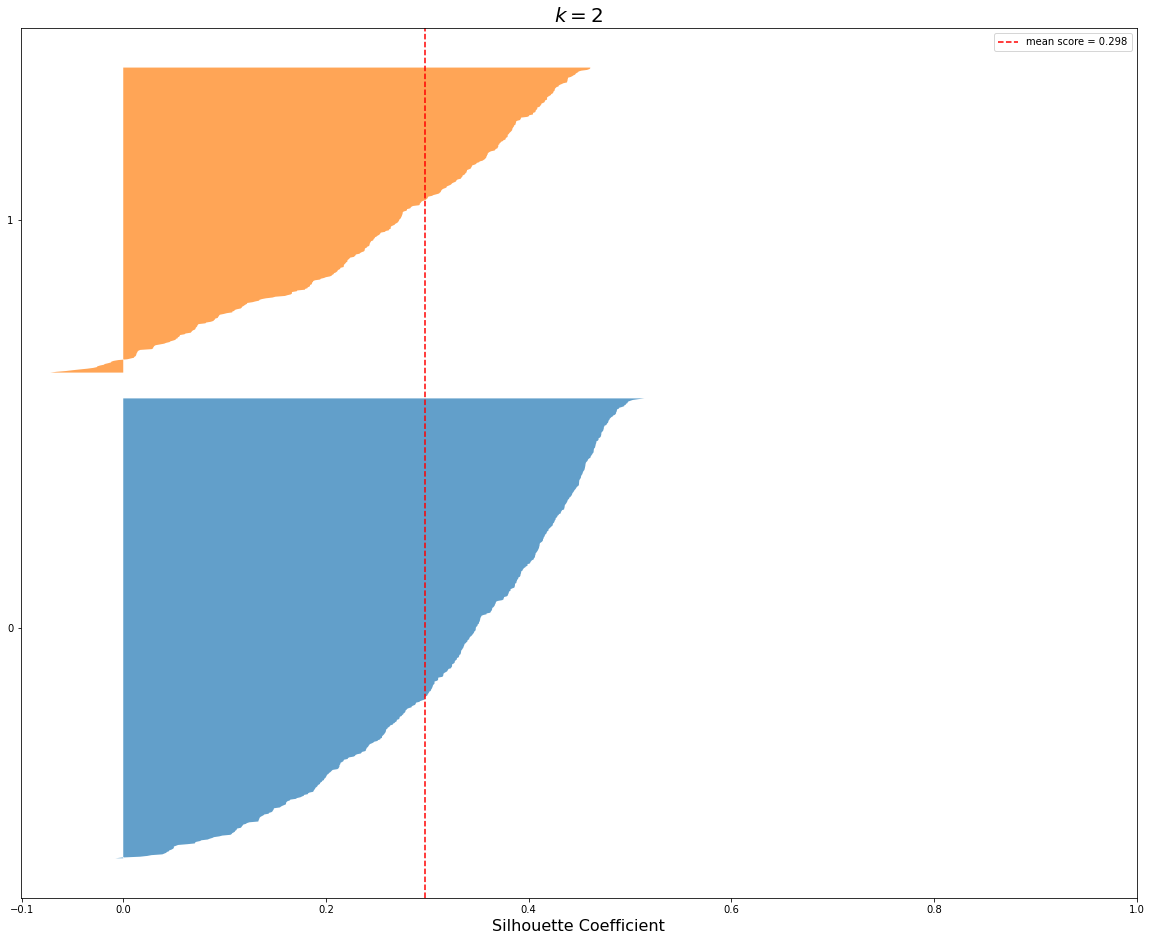

0.15896522066340257


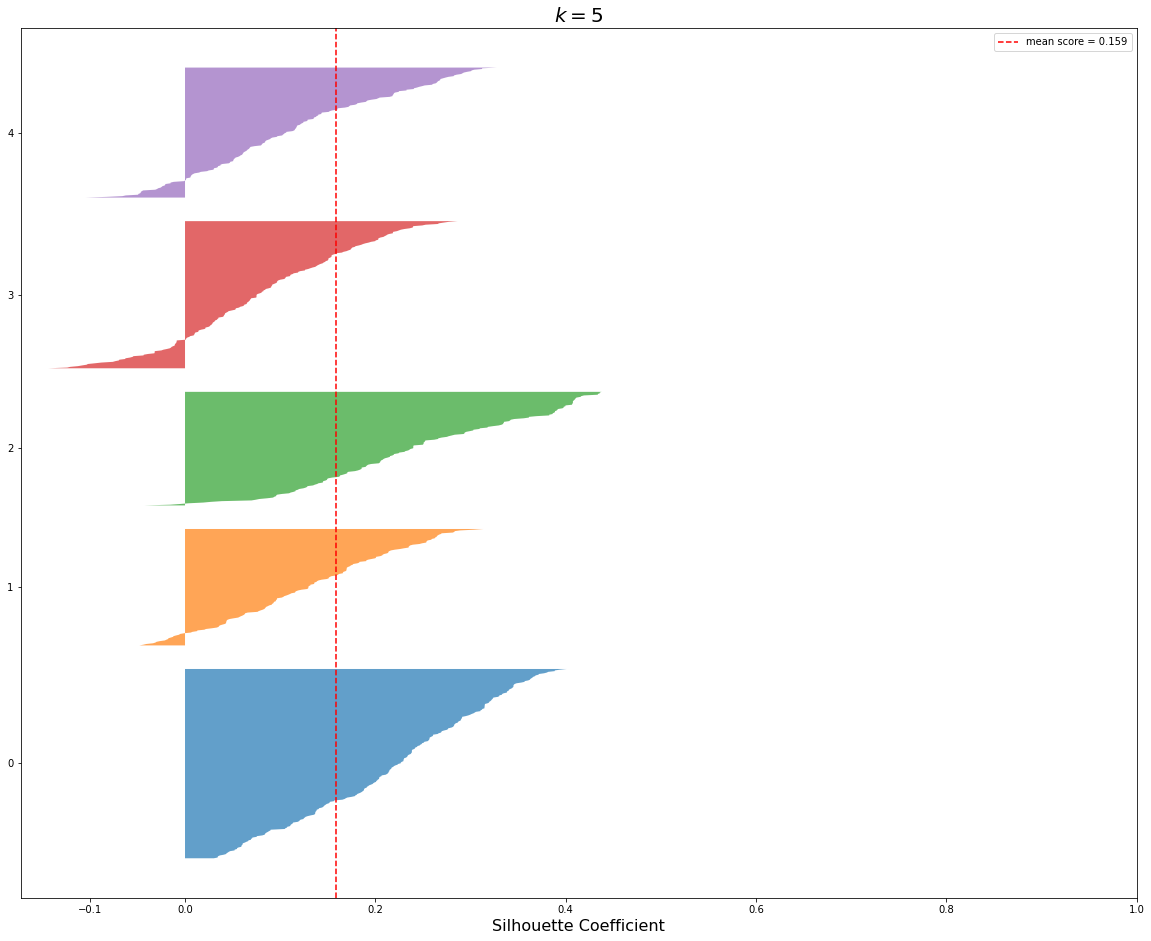

0.1349688616337022


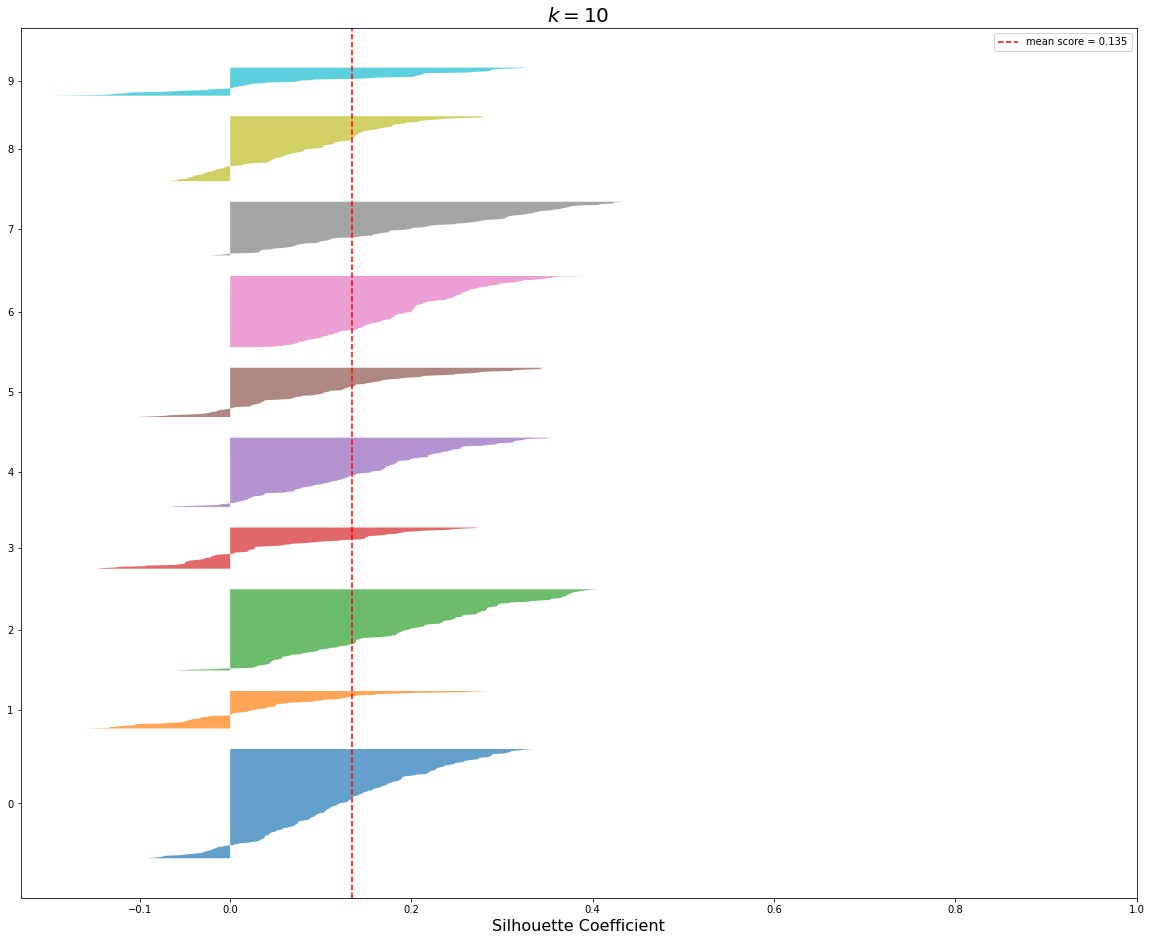

0.13720689679847076


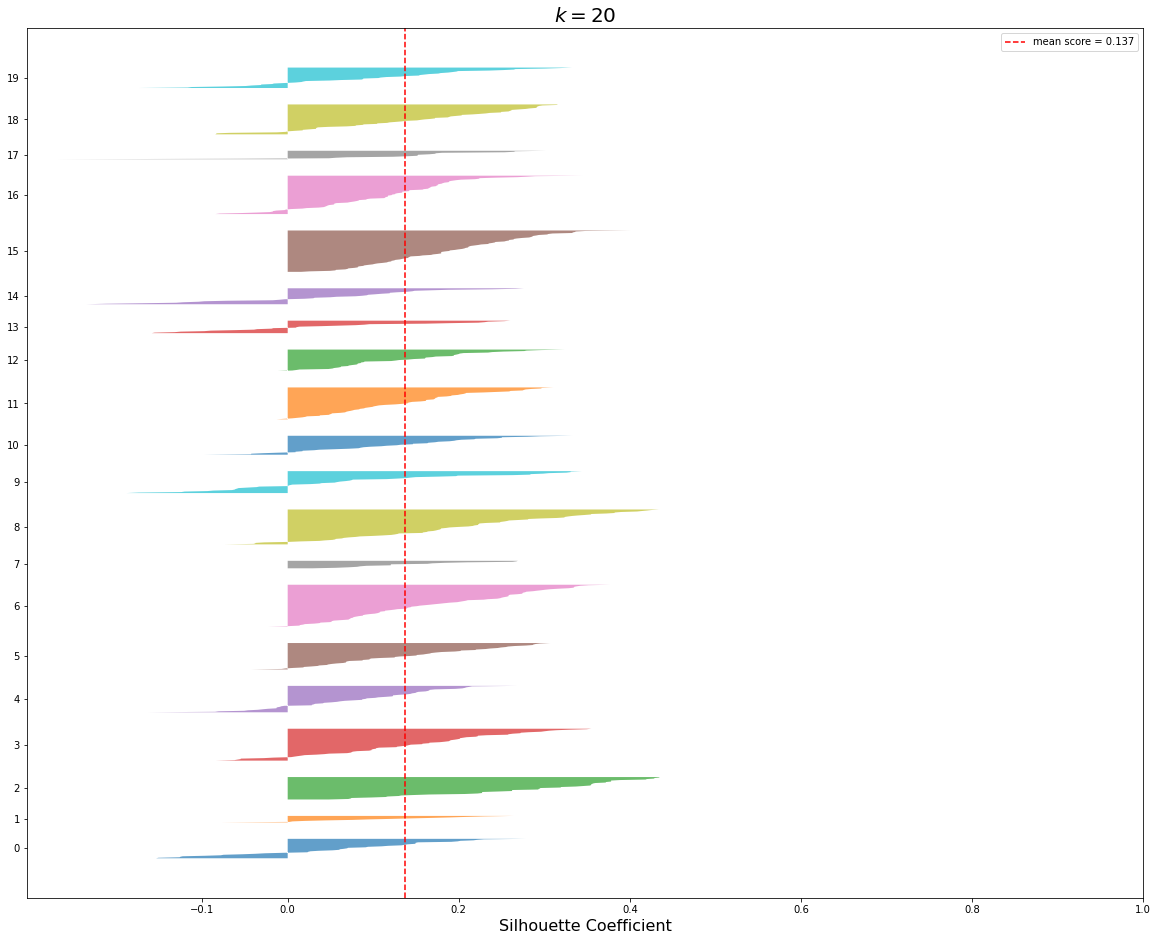

In [36]:
# Graphs for cosine silhouette scores
for k in (2, 5, 10, 20):
    plt.figure(figsize=(20,16))
    
    centers, labels_euclidean = find_clusters(reviews_con, k, 'cosine')
    y_pred = np.asarray(labels_euclidean)
    
    silhouette_scores = silhouette_score(reviews_con, y_pred)
    silhouette_coefficients = silhouette_samples(reviews_con, labels_euclidean)
    padding = len(reviews_con) // 30
    pos = padding
    ticks = []
    
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 30):
        plt.ylabel("Cluster", fontsize=16)
    
    if k in (2, 5, 10, 20):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient", fontsize=16)
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores, color="red", linestyle="--", label = "mean score = {}".format(round(silhouette_scores, 3)))
    print(silhouette_scores)
    plt.title("$k={}$".format(k), fontsize=20)
    plt.legend()
    plt.show()

# N.B. find clusters algorithm adapted from COMP5318 Lab 10

## 2.2 ICMLA Dataset

### Train K-means clustering

In [0]:
# Clustering using abstract data
# Training and storing evaluation metrics 
k = [2, 5, 10, 15, 20, 25]

# Arrays to store the various evaluation metrics 
# Internal measures 
inertia_scores_euclidean = []
inertia_scores_cosine = []
silhouette_scores_euclidean = []
silhouette_scores_cosine = []

# External measures euclidean
rand_all_euclidean = []
mutual_information_all_euclidean = [] 
norm_mutual_information_all_euclidean = []
homogeneity_all_euclidean = []
completeness_all_euclidean = []
folkes_mallows_score_all_euclidean = []
cal_all_euclidean = []
v_all_euclidean = []

# External measures consine similarity 
rand_all_cosine = []
mutual_information_all_cosine = [] 
norm_mutual_information_all_cosine = []
homogeneity_all_cosine = []
completeness_all_cosine = []
folkes_mallows_score_all_cosine = []
cal_all_cosine = []
v_all_cosine = []

for i in k:
    # Inertia and silhouette scores made using euclidean similarity 
    centers, labels_euclidean = find_clusters(reform_tfidf_matrix, i, 'euclidean')
    score = inertia(labels_euclidean, centers, reform_tfidf_matrix)
    inertia_scores_euclidean.append(score)
    
    sil_score = silhouette_score(reform_tfidf_matrix, labels_euclidean)
    silhouette_scores_euclidean.append(sil_score)
    
    # Inertia and silhouette scores made using cosine similarity 
    centers, labels_cosine = find_clusters(reform_tfidf_matrix, i, 'cosine')
    score = inertia(labels_cosine, centers, reform_tfidf_matrix)
    inertia_scores_cosine.append(score)
    sil_score = silhouette_score(reform_tfidf_matrix, labels_cosine)
    silhouette_scores_cosine.append(sil_score)
    
    # Other evaluation metrics 
    clusters_cal = np.asarray(labels_euclidean).reshape(-1, 1) 
    cal = metrics.calinski_harabaz_score(clusters_cal, papers['session_encoded']) 
    cal_all_euclidean.append(cal)
    
    clusters_cal = np.asarray(labels_cosine).reshape(-1, 1) 
    cal = metrics.calinski_harabaz_score(clusters_cal, papers['session_encoded']) 
    cal_all_cosine.append(cal)
    
    rand = metrics.adjusted_rand_score(labels_euclidean, papers['session_encoded'])
    rand_all_euclidean.append(rand)
    
    rand = metrics.adjusted_rand_score(labels_cosine, papers['session_encoded'])
    rand_all_cosine.append(rand)
    
    mi = metrics.mutual_info_score(labels_euclidean, papers['session_encoded']) 
    mutual_information_all_euclidean.append(mi)
    
    mi = metrics.mutual_info_score(labels_cosine, papers['session_encoded']) 
    mutual_information_all_cosine.append(mi)
     
    nmi = metrics.normalized_mutual_info_score(labels_euclidean, papers['session_encoded']) 
    norm_mutual_information_all_euclidean.append(nmi)
    
    nmi = metrics.normalized_mutual_info_score(labels_cosine, papers['session_encoded']) 
    norm_mutual_information_all_cosine.append(nmi)
    
    homogeneity = metrics.homogeneity_score(labels_euclidean, papers['session_encoded'])  
    homogeneity_all_euclidean.append(homogeneity)
    
    homogeneity = metrics.homogeneity_score(labels_cosine, papers['session_encoded'])  
    homogeneity_all_cosine.append(homogeneity)
    
    completeness = metrics.completeness_score(labels_euclidean, papers['session_encoded'])
    completeness_all_euclidean.append(completeness)
    
    completeness = metrics.completeness_score(labels_cosine, papers['session_encoded'])
    completeness_all_cosine.append(completeness)
    
    v = metrics.v_measure_score(labels_euclidean, papers['session_encoded'])
    v_all_euclidean.append(v)
    
    v = metrics.v_measure_score(labels_cosine, papers['session_encoded'])
    v_all_cosine.append(v)
    
    fm = metrics.fowlkes_mallows_score(labels_euclidean, papers['session_encoded']) 
    folkes_mallows_score_all_euclidean.append(fm)
    
    fm = metrics.fowlkes_mallows_score(labels_cosine, papers['session_encoded']) 
    folkes_mallows_score_all_cosine.append(fm)

### First evaluation

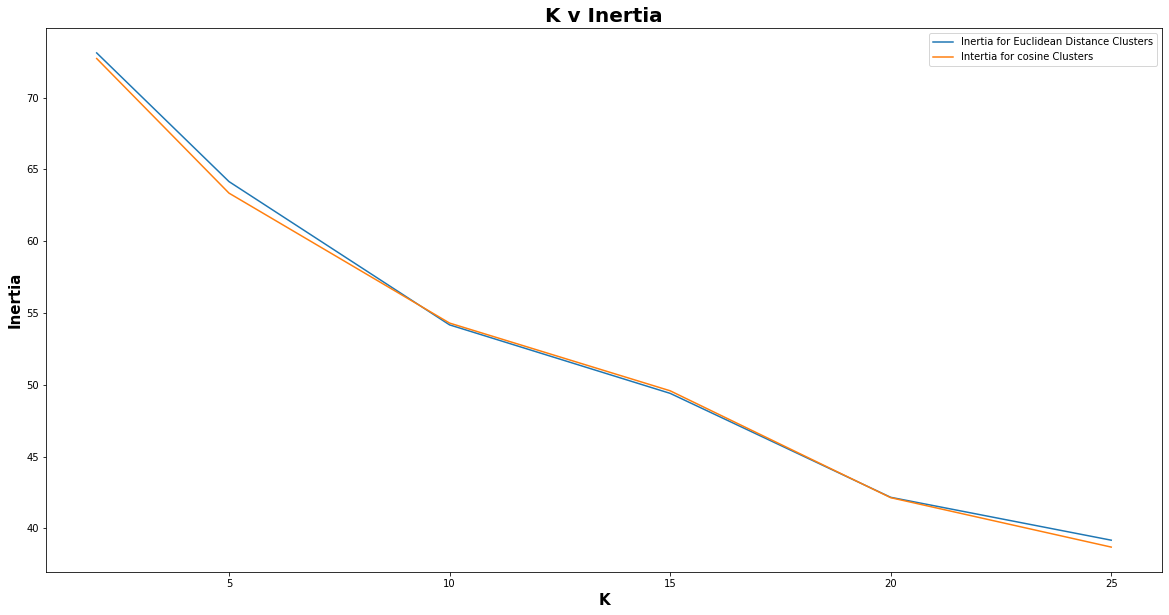

In [55]:
# Plotting intertia scores 
plt.figure(figsize=(20,10))
plt.plot(k, inertia_scores_euclidean, label='Inertia for Euclidean Distance Clusters')
plt.plot(k, inertia_scores_cosine, label = 'Intertia for cosine Clusters')
plt.xlabel('K', weight='bold', size=15)
plt.ylabel('Inertia', weight='bold', size=15)
plt.title('K v Inertia', size = 20, weight='bold')
plt.legend()
plt.show();

# it is hard to see a clear elbow here 

0.044280363750676816


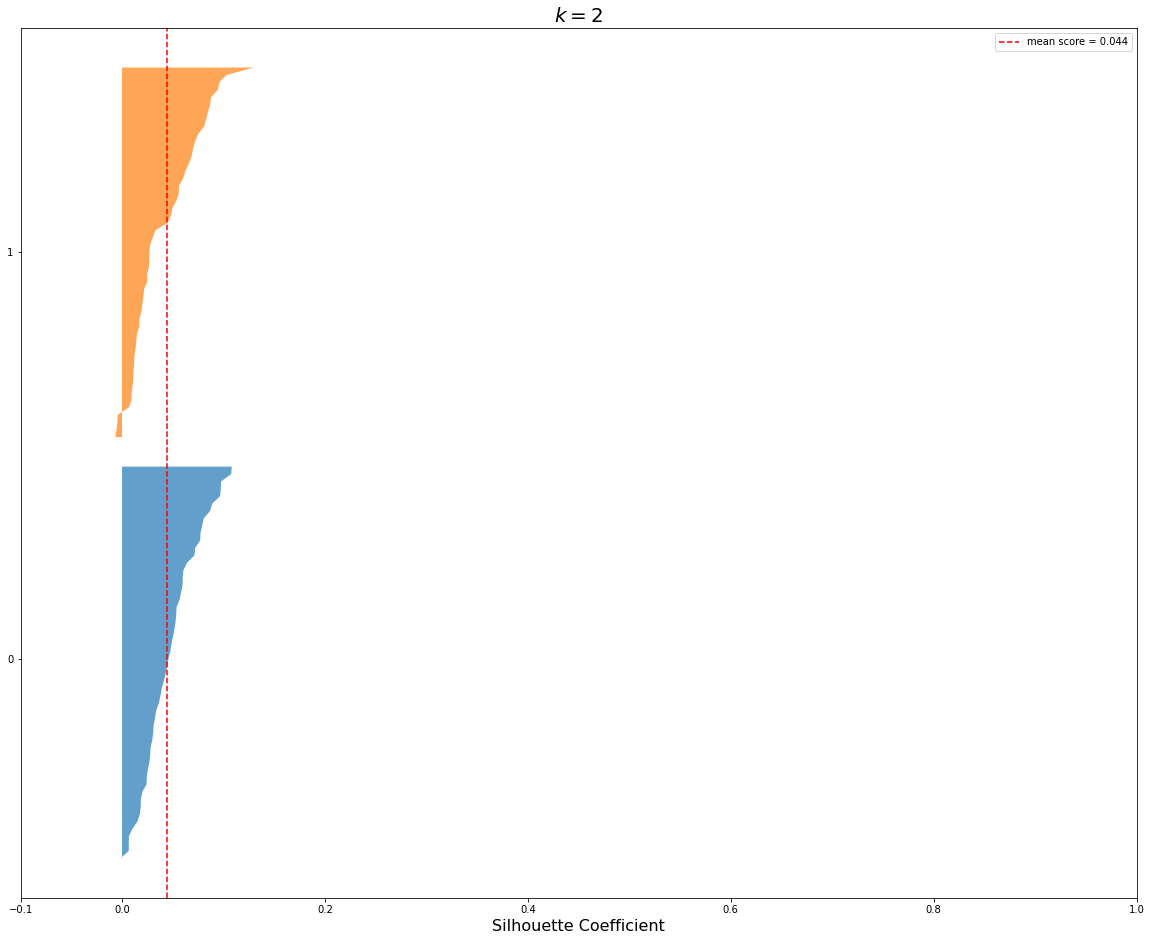

0.05656980298818871


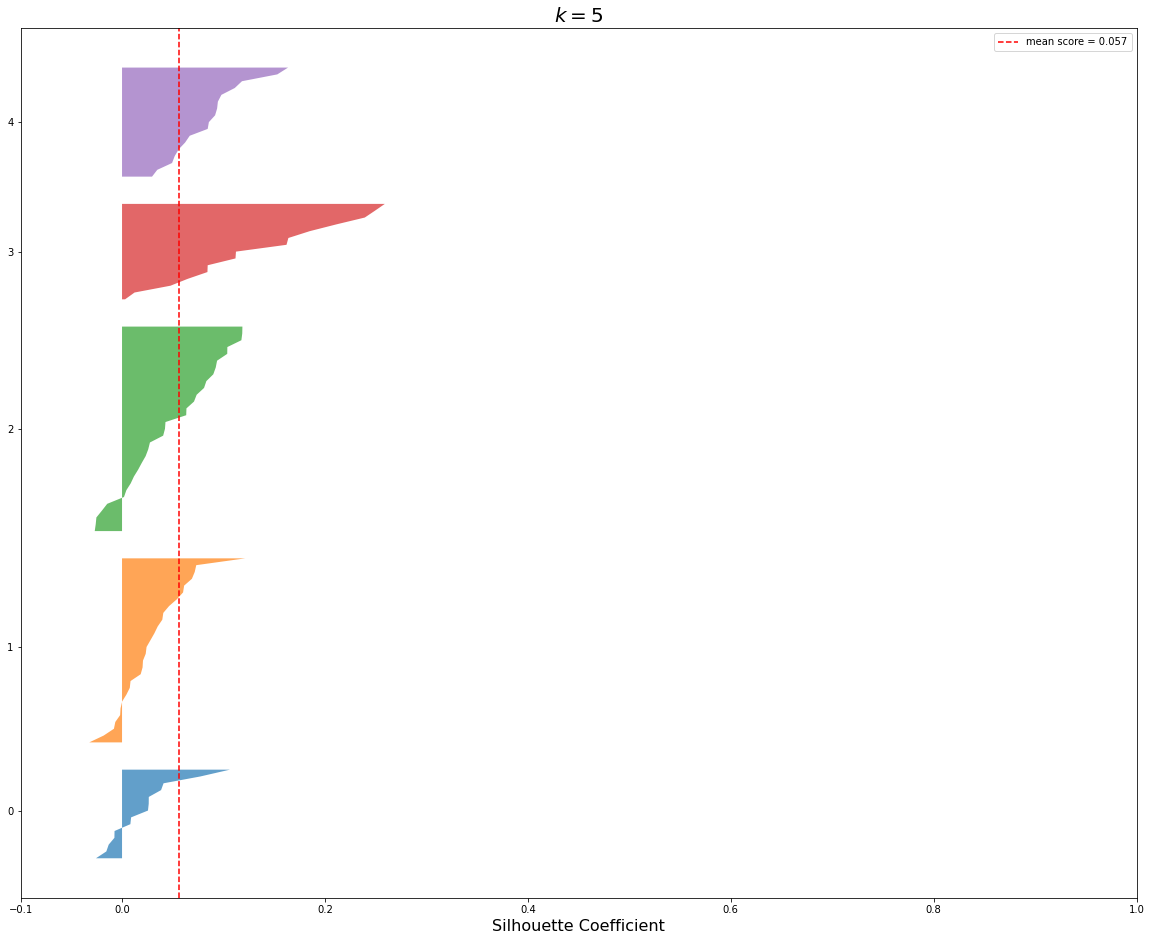

0.05178180418591407


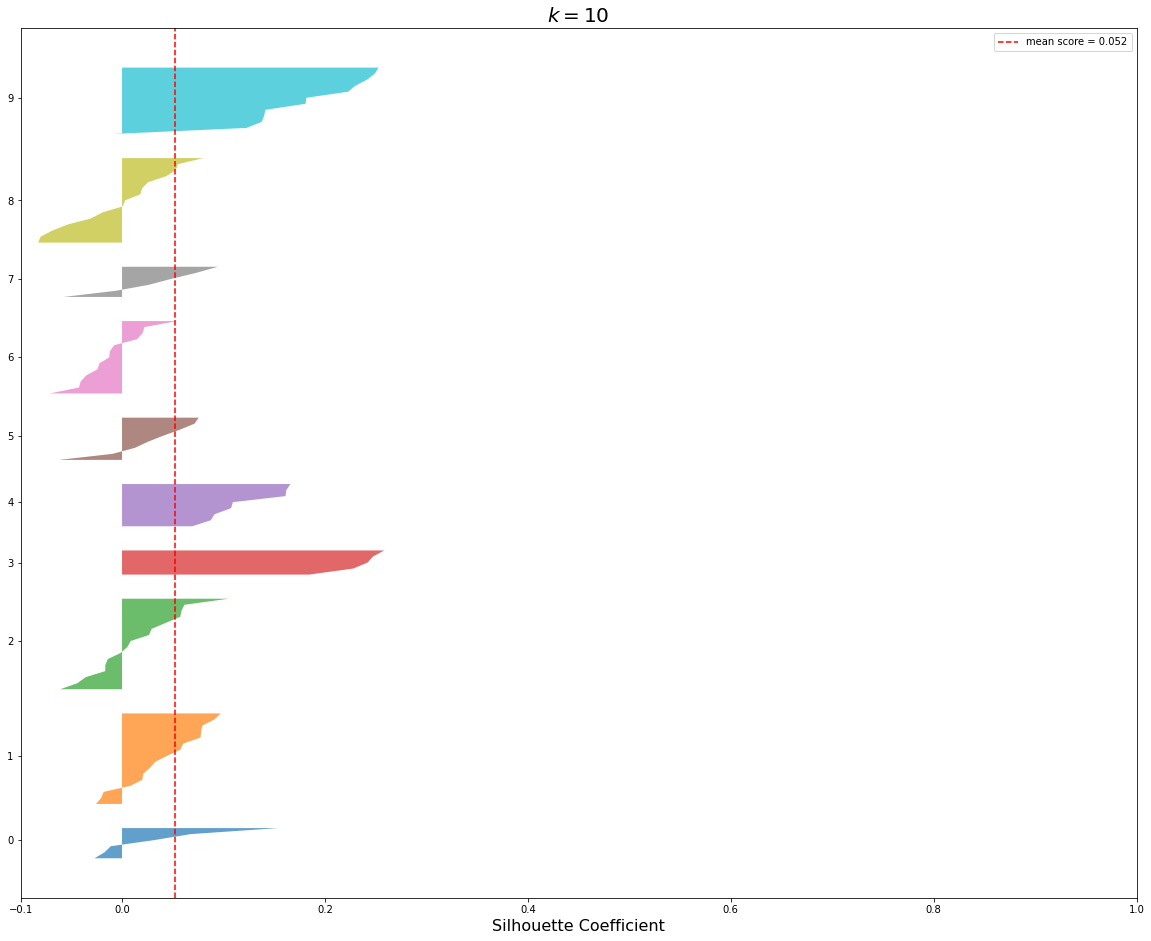

0.06382445584765857


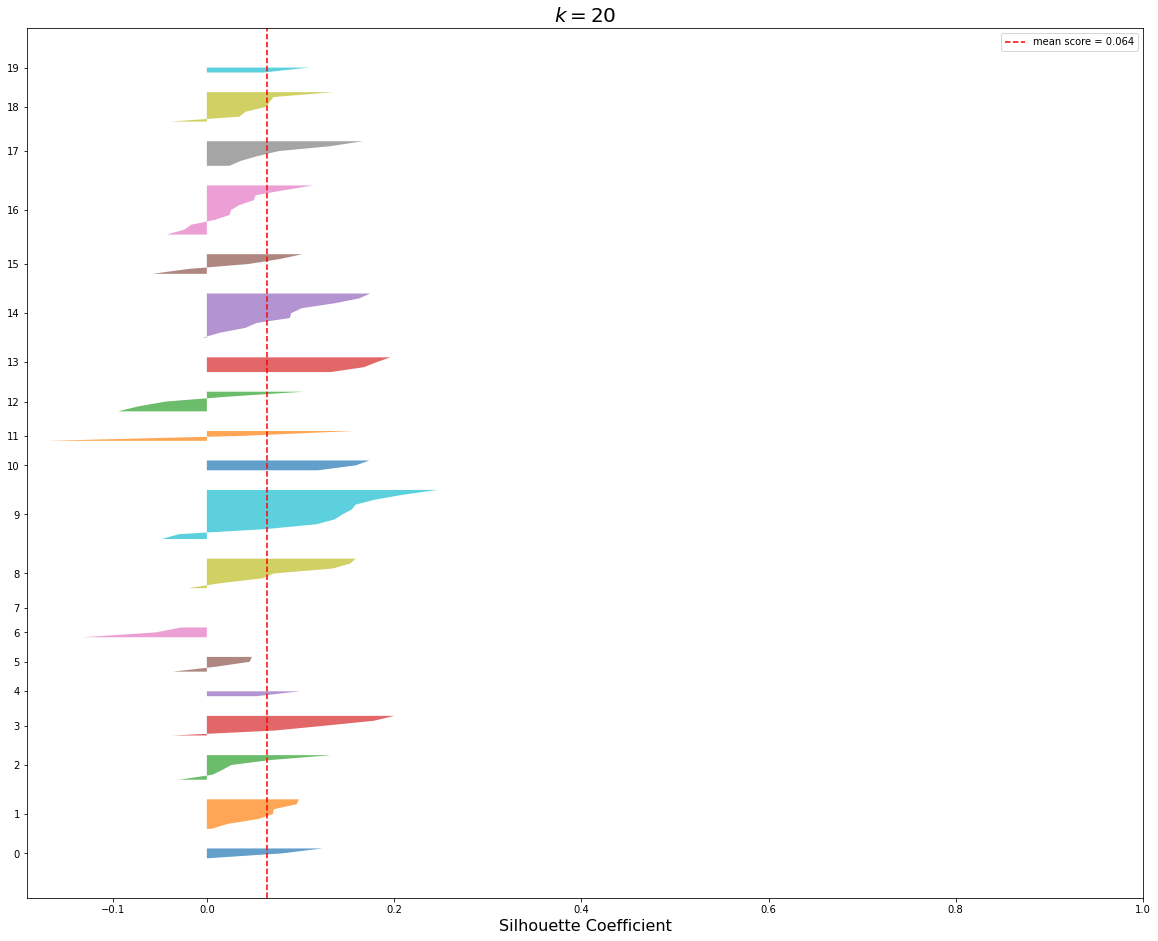

In [56]:
# Graph for cosine clusters silhouette scores 
for k in (2, 5, 10, 20):
    plt.figure(figsize=(20,16))
    
    centers, labels_cosine = find_clusters(reform_tfidf_matrix, k, 'cosine')
    y_pred = np.asarray(labels_cosine)
    
    silhouette_scores = silhouette_score(reform_tfidf_matrix, y_pred)
    silhouette_coefficients = silhouette_samples(reform_tfidf_matrix, labels_cosine)
    padding = len(reform_tfidf_matrix) // 30
    pos = padding
    ticks = []
    
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 30):
        plt.ylabel("Cluster", fontsize=16)
    
    if k in (2, 5, 10, 20):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient", fontsize=16)
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores, color="red", linestyle="--", label = "mean score = {}".format(round(silhouette_scores, 3)))
    print(silhouette_scores)
    plt.title("$k={}$".format(k), fontsize=20)
    plt.legend()
    plt.show();

# N.B. find clusters algorithm adapted from COMP5318 Lab 10

0.037377969205550955


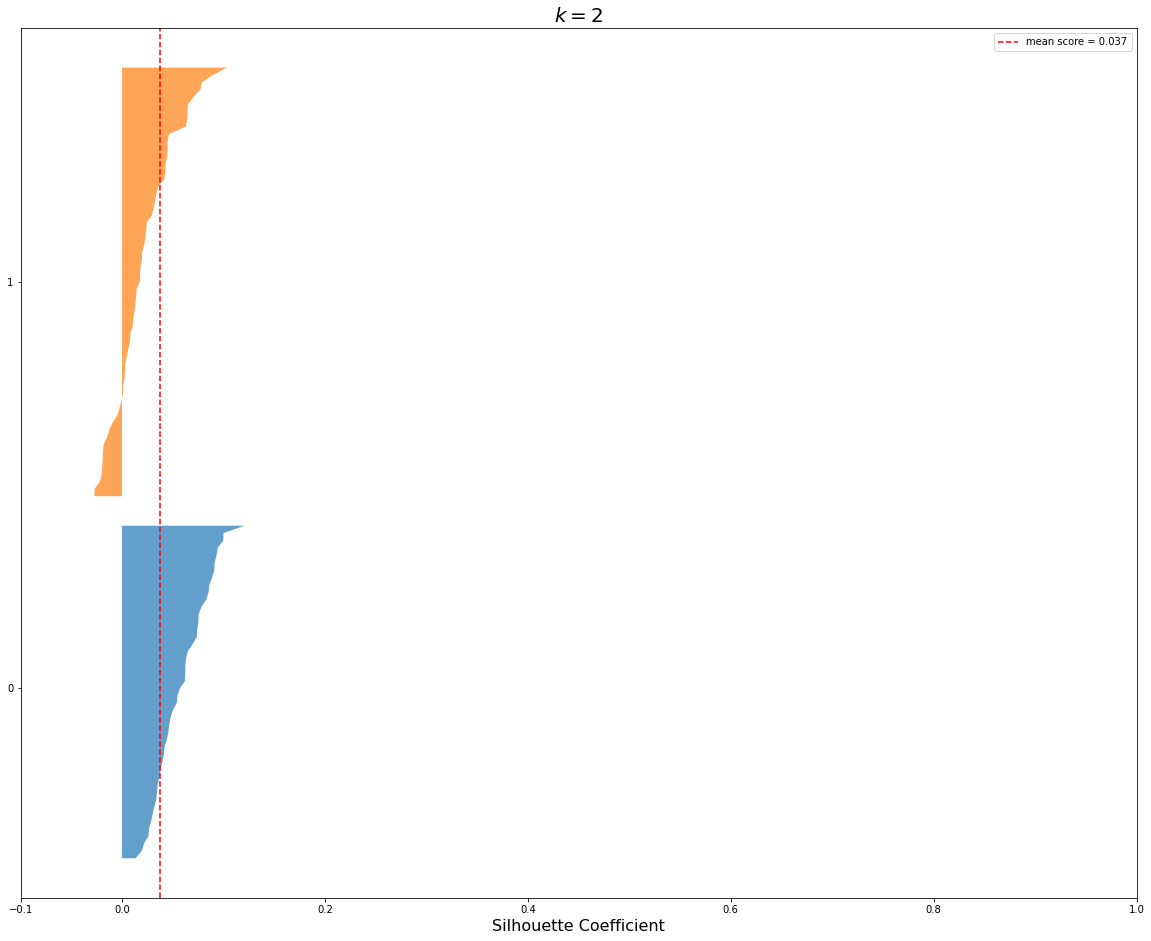

0.04756768552036566


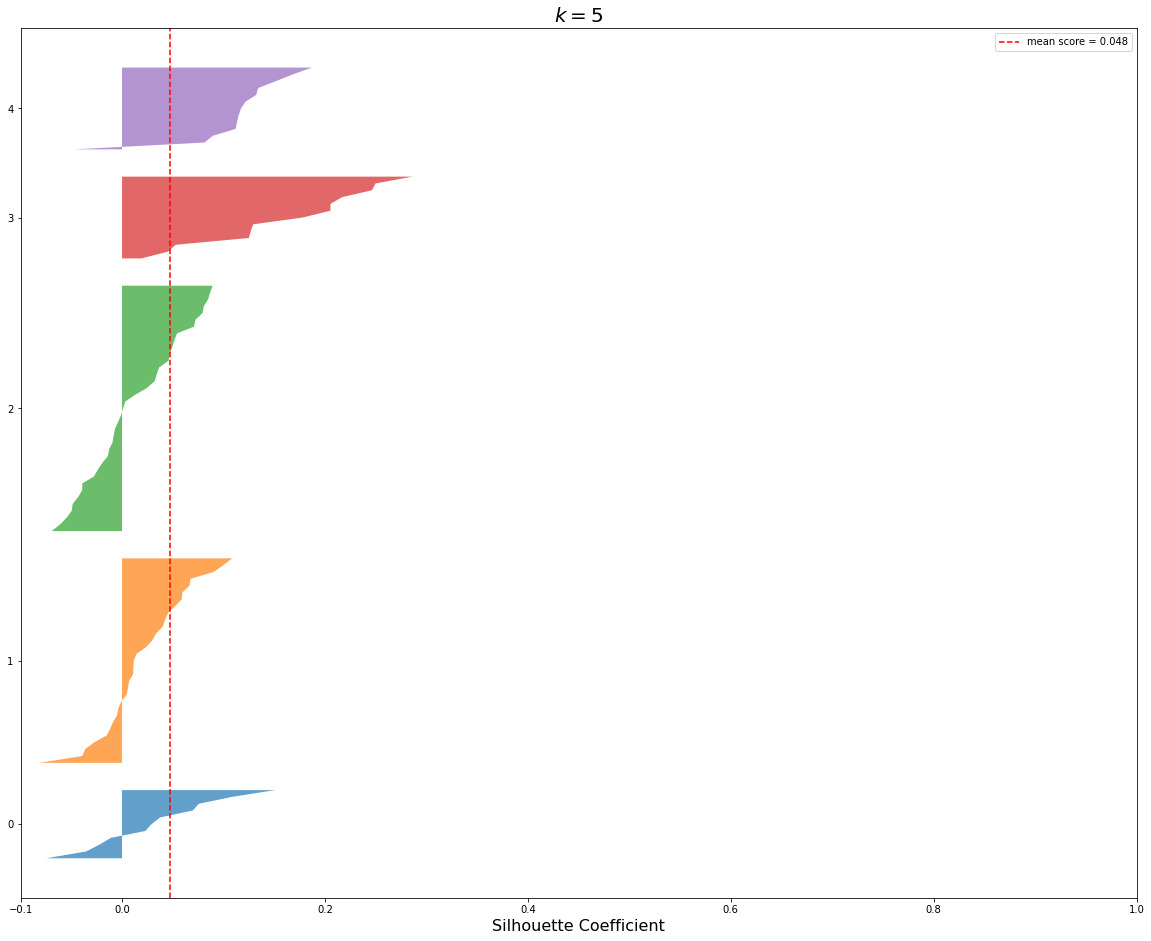

0.052328123705196294


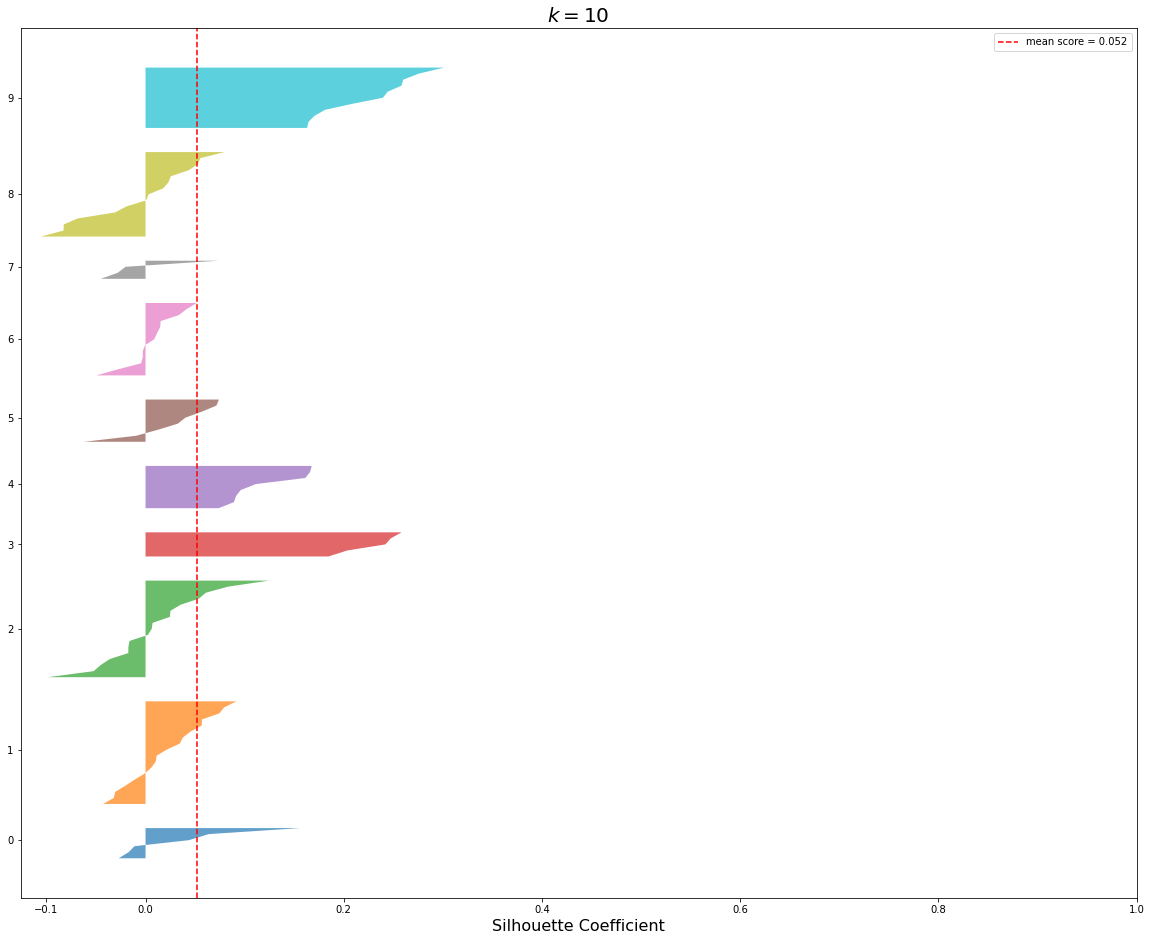

0.0628747226934225


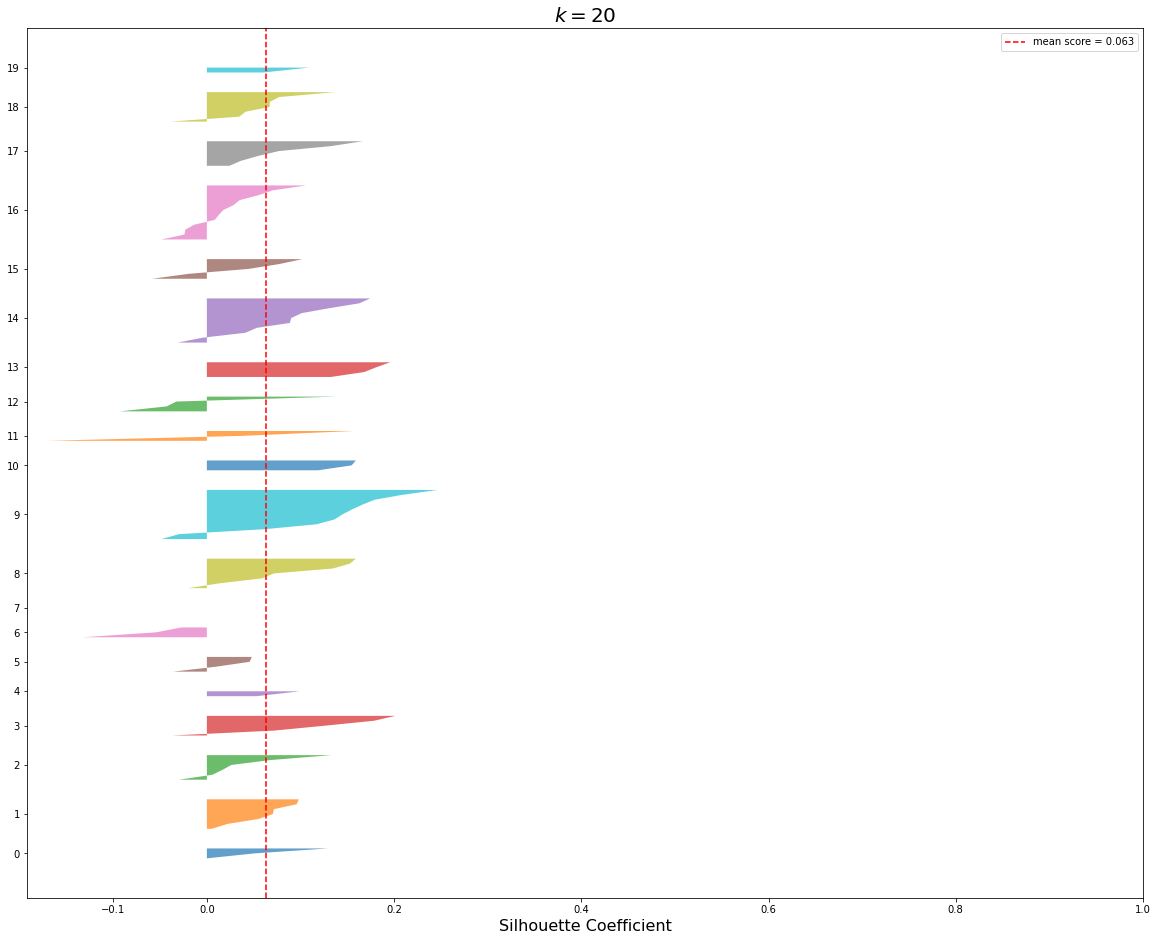

In [57]:
# Graph for euclidean clusters silhouette scores 
for k in (2, 5, 10, 20):
    plt.figure(figsize=(20,16))
    
    centers, labels_euclidean = find_clusters(reform_tfidf_matrix, k, 'euclidean')
    y_pred = np.asarray(labels_euclidean)
    
    silhouette_scores = silhouette_score(reform_tfidf_matrix, y_pred)
    silhouette_coefficients = silhouette_samples(reform_tfidf_matrix, labels_euclidean)
    padding = len(reform_tfidf_matrix) // 30
    pos = padding
    ticks = []
    
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 30):
        plt.ylabel("Cluster", fontsize=16)
    
    if k in (2, 5, 10, 20):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient", fontsize=16)
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores, color="red", linestyle="--", label = "mean score = {}".format(round(silhouette_scores, 3)))
    print(silhouette_scores)
    plt.title("$k={}$".format(k), fontsize=20)
    plt.legend()
    plt.show();
  
# N.B. find clusters algorithm adapted from COMP5318 Lab 10

### Second evaluation 

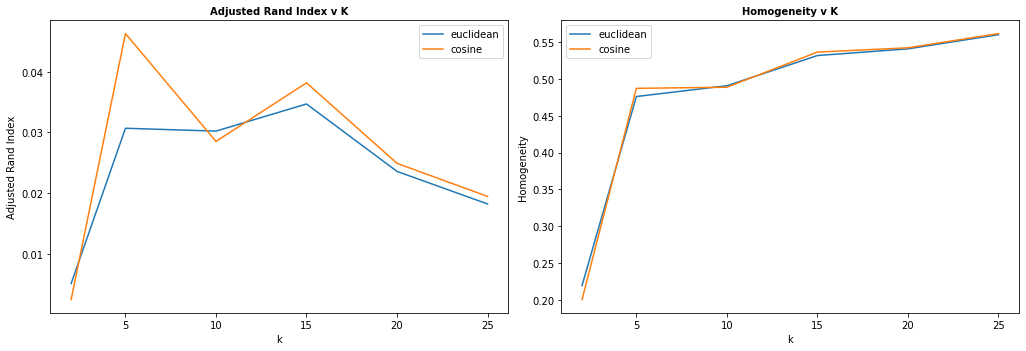

In [58]:
k = [2, 5, 10, 15, 20, 25]

# Plotting external evaluation criteria 
plt.figure(figsize=(15,10))
plt.subplot(221)
plt.tight_layout(pad=3.0)
plt.plot(k, rand_all_euclidean, label='euclidean')
plt.plot(k, rand_all_cosine, label='cosine')
plt.ylabel('Adjusted Rand Index', fontsize=10)
plt.xlabel('k', fontsize = 10)
plt.title('Adjusted Rand Index v K',fontsize=10, weight='bold')
plt.legend()

plt.subplot(222)
plt.tight_layout(pad=3.0)
plt.ylabel('Homogeneity', fontsize=10)
plt.xlabel('k', fontsize = 10)
plt.title('Homogeneity v K',fontsize=10, weight='bold')
plt.plot(k, homogeneity_all_euclidean, label='euclidean')
plt.plot(k, homogeneity_all_cosine, label='cosine')
plt.legend();

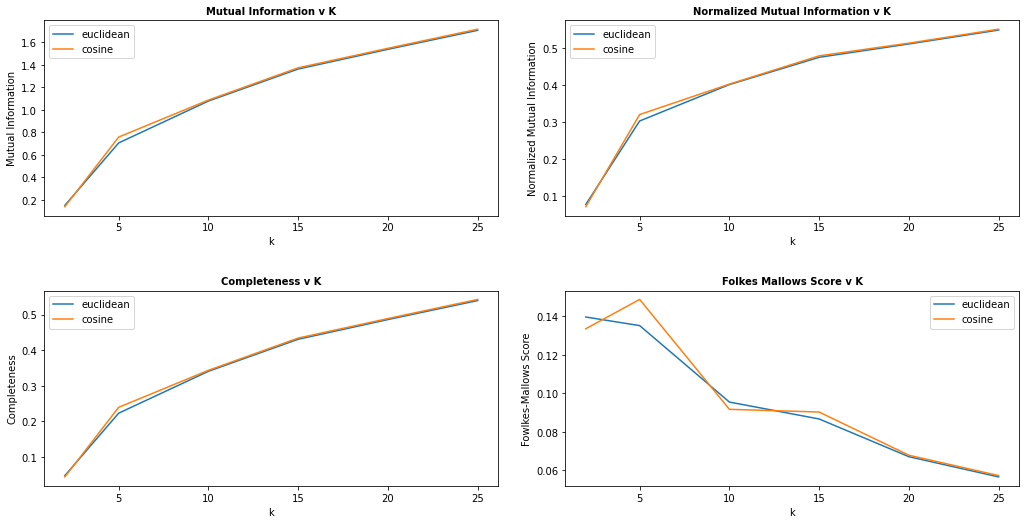

In [59]:
# Other external evaluation criteria 
plt.figure(figsize=(15,15))
plt.subplot(421)
plt.tight_layout(pad=3.0)
plt.ylabel('Mutual Information', fontsize=10)
plt.xlabel('k', fontsize = 10)
plt.title('Mutual Information v K',fontsize=10, weight='bold')
plt.plot(k, mutual_information_all_euclidean, label='euclidean')
plt.plot(k, mutual_information_all_cosine, label='cosine')
plt.legend()

plt.subplot(422)
plt.tight_layout(pad=3.0)
plt.ylabel('Normalized Mutual Information', fontsize=10)
plt.xlabel('k', fontsize = 10)
plt.title('Normalized Mutual Information v K', fontsize=10, weight='bold')
plt.plot(k, norm_mutual_information_all_euclidean, label='euclidean')
plt.plot(k, norm_mutual_information_all_cosine, label='cosine')
plt.legend()

plt.subplot(423)
plt.tight_layout(pad=3.0)
plt.ylabel('Completeness', fontsize=10)
plt.xlabel('k', fontsize = 10)
plt.title('Completeness v K',fontsize=10, weight='bold')
plt.plot(k, completeness_all_euclidean, label='euclidean')
plt.plot(k, completeness_all_cosine, label='cosine')
plt.legend()

plt.subplot(424)
plt.tight_layout(pad=3.0)
plt.ylabel('Fowlkes-Mallows Score', fontsize=10)
plt.xlabel('k', fontsize = 10)
plt.title('Folkes Mallows Score v K', fontsize=10, weight='bold')
plt.plot(k, folkes_mallows_score_all_euclidean, label='euclidean')
plt.plot(k, folkes_mallows_score_all_cosine, label='cosine')
plt.legend();

In [60]:
# rand-index for different values of k 
index = ['eculidean', 'cosine']
k = [2, 5, 10, 15, 20, 25]
rand_all = [rand_all_euclidean, rand_all_cosine]
rand_df = pd.DataFrame(rand_all, columns=k, index=index)

rand_df.round(3)

2      5      10     15     20     25
eculidean  0.005  0.031  0.030  0.035  0.024  0.018
cosine     0.002  0.046  0.029  0.038  0.025  0.019

In [0]:
# We also investigated whether better clusters could be formed using just 
# the keywords TF-IDF vectors but the results were still poor 

cos_dist, man_dist, ucl_dist = get_distant_matrix(keyword_idf)

# Training and storing evaluation metrics 
k = [2, 5, 10, 15, 20, 25]

# Arrays to store the various evaluation metrics 
# Internal measures 
inertia_scores_euclidean = []
inertia_scores_cosine = []
silhouette_scores_euclidean = []
silhouette_scores_cosine = []

# External measures euclidean
rand_all_euclidean = []
mutual_information_all_euclidean = [] 
norm_mutual_information_all_euclidean = []
homogeneity_all_euclidean = []
completeness_all_euclidean = []
folkes_mallows_score_all_euclidean = []
cal_all_euclidean = []
v_all_euclidean = []

# External measures consine similarity 
rand_all_cosine = []
mutual_information_all_cosine = [] 
norm_mutual_information_all_cosine = []
homogeneity_all_cosine = []
completeness_all_cosine = []
folkes_mallows_score_all_cosine = []
cal_all_cosine = []
v_all_cosine = []

for i in k:
    # Inertia and silhouette scores made using euclidean similarity 
    kmeans_ucl = KMeans(n_clusters=i, precompute_distances = True).fit(ucl_dist)
    centers =  kmeans_ucl.cluster_centers_
    labels_euclidean = kmeans_ucl.labels_
   
    score = inertia(labels_euclidean, centers, ucl_dist)
    inertia_scores_euclidean.append(score)
    
    sil_score = silhouette_score(ucl_dist, labels_euclidean)
    silhouette_scores_euclidean.append(sil_score)
    
    # Inertia and silhouette scores made using cosine similarity 
    kmeans = KMeans(n_clusters=i, precompute_distances = True).fit(cos_dist)
    centers =  kmeans.cluster_centers_
    labels_cosine = kmeans.labels_
    score = inertia(labels_cosine, centers, cos_dist)
    inertia_scores_cosine.append(score)
    sil_score = silhouette_score(cos_dist, labels_cosine)
    silhouette_scores_cosine.append(sil_score)
    
    # Other evaluation metrics 
    clusters_cal = np.asarray(labels_euclidean).reshape(-1, 1) 
    cal = metrics.calinski_harabaz_score(clusters_cal, papers['session_encoded']) 
    cal_all_euclidean.append(cal)
    
    clusters_cal = np.asarray(labels_cosine).reshape(-1, 1) 
    cal = metrics.calinski_harabaz_score(clusters_cal, papers['session_encoded']) 
    cal_all_cosine.append(cal)
    
    rand = metrics.adjusted_rand_score(labels_euclidean, papers['session_encoded'])
    rand_all_euclidean.append(rand)
    
    rand = metrics.adjusted_rand_score(labels_cosine, papers['session_encoded'])
    rand_all_cosine.append(rand)
    
    mi = metrics.mutual_info_score(labels_euclidean, papers['session_encoded']) 
    mutual_information_all_euclidean.append(mi)
    
    mi = metrics.mutual_info_score(labels_cosine, papers['session_encoded']) 
    mutual_information_all_cosine.append(mi)
     
    nmi = metrics.normalized_mutual_info_score(labels_euclidean, papers['session_encoded']) 
    norm_mutual_information_all_euclidean.append(nmi)
    
    nmi = metrics.normalized_mutual_info_score(labels_cosine, papers['session_encoded']) 
    norm_mutual_information_all_cosine.append(nmi)
    
    homogeneity = metrics.homogeneity_score(labels_euclidean, papers['session_encoded'])  
    homogeneity_all_euclidean.append(homogeneity)
    
    homogeneity = metrics.homogeneity_score(labels_cosine, papers['session_encoded'])  
    homogeneity_all_cosine.append(homogeneity)
    
    completeness = metrics.completeness_score(labels_euclidean, papers['session_encoded'])
    completeness_all_euclidean.append(completeness)
    
    completeness = metrics.completeness_score(labels_cosine, papers['session_encoded'])
    completeness_all_cosine.append(completeness)
    
    v = metrics.v_measure_score(labels_euclidean, papers['session_encoded'])
    v_all_euclidean.append(v)
    
    v = metrics.v_measure_score(labels_cosine, papers['session_encoded'])
    v_all_cosine.append(v)
    
    fm = metrics.fowlkes_mallows_score(labels_euclidean, papers['session_encoded']) 
    folkes_mallows_score_all_euclidean.append(fm)
    
    fm = metrics.fowlkes_mallows_score(labels_cosine, papers['session_encoded']) 
    folkes_mallows_score_all_cosine.append(fm)

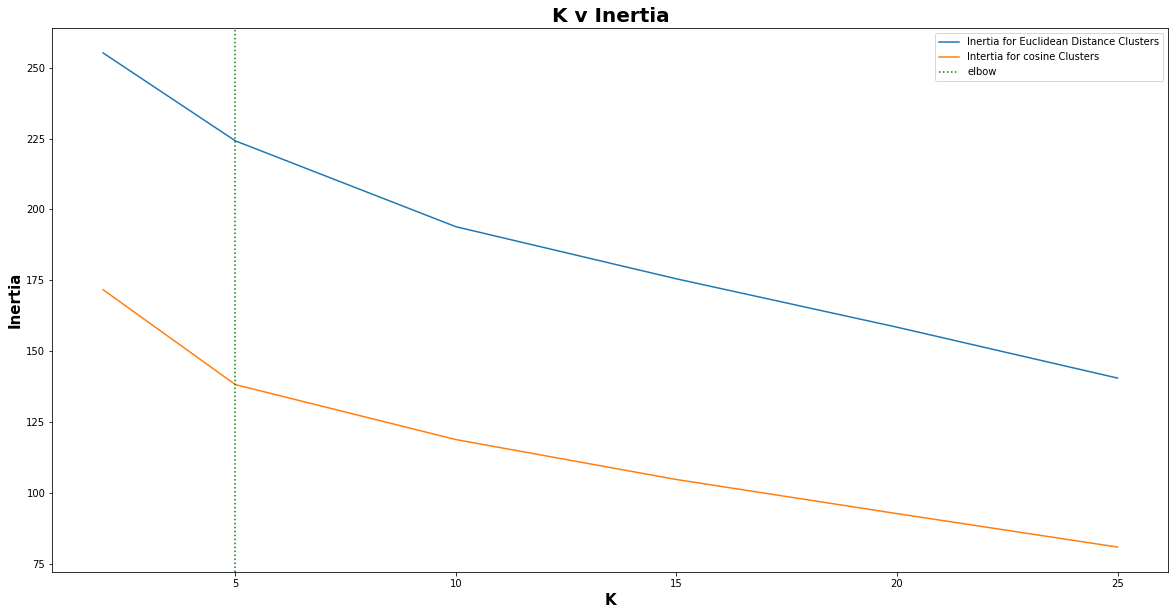

In [0]:
# Plotting intertia scores 
plt.figure(figsize=(20,10))
plt.plot(k, inertia_scores_euclidean, label='Inertia for Euclidean Distance Clusters')
plt.plot(k, inertia_scores_cosine, label = 'Intertia for cosine Clusters')
plt.xlabel('K', weight='bold', size=15)
plt.ylabel('Inertia', weight='bold', size=15)
plt.title('K v Inertia', size = 20, weight='bold')
plt.axvline(x=5, color='green', linestyle=':', label='elbow')
# it is hard to see a clear elbow here but k=5 might be a candidate
plt.legend()
plt.show();

0.12213370552321326


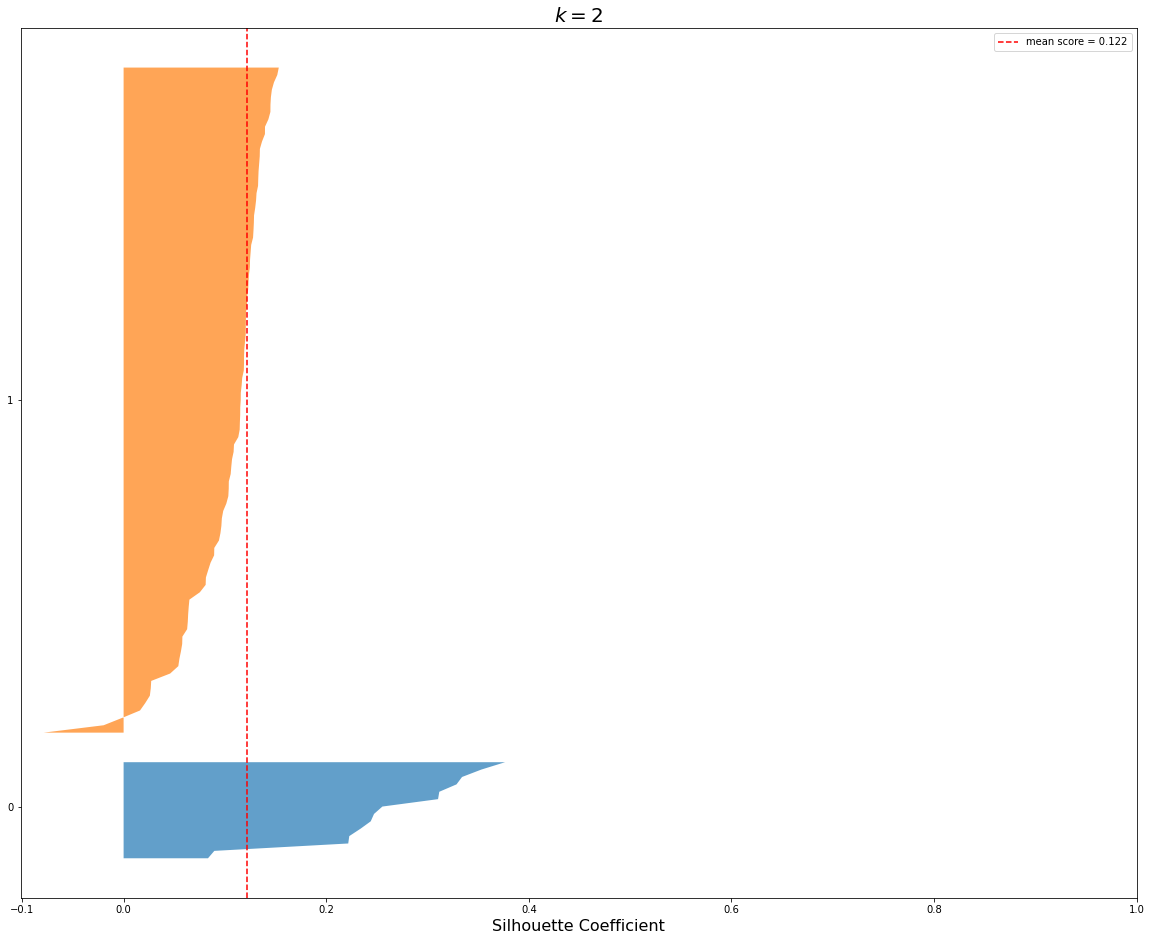

0.10316710021025681


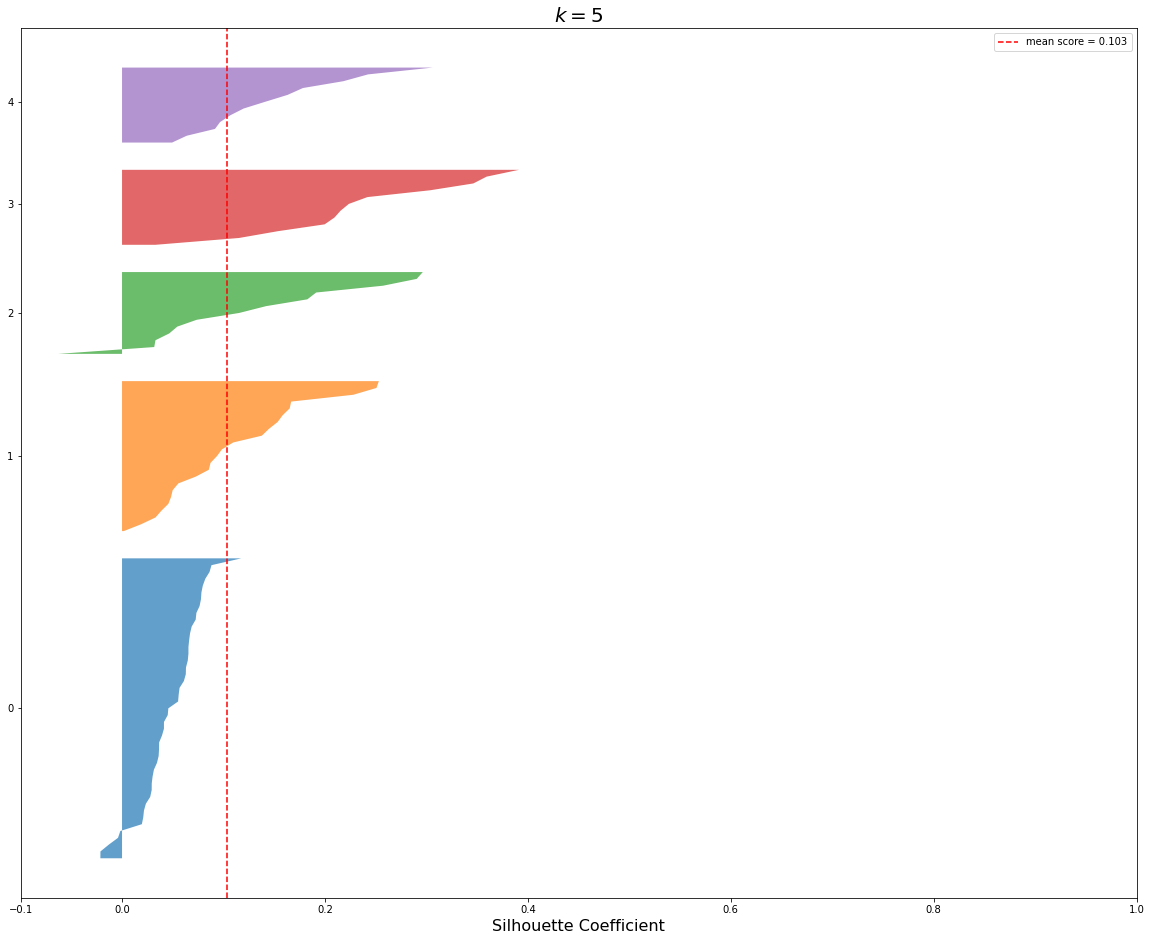

0.09981021133044425


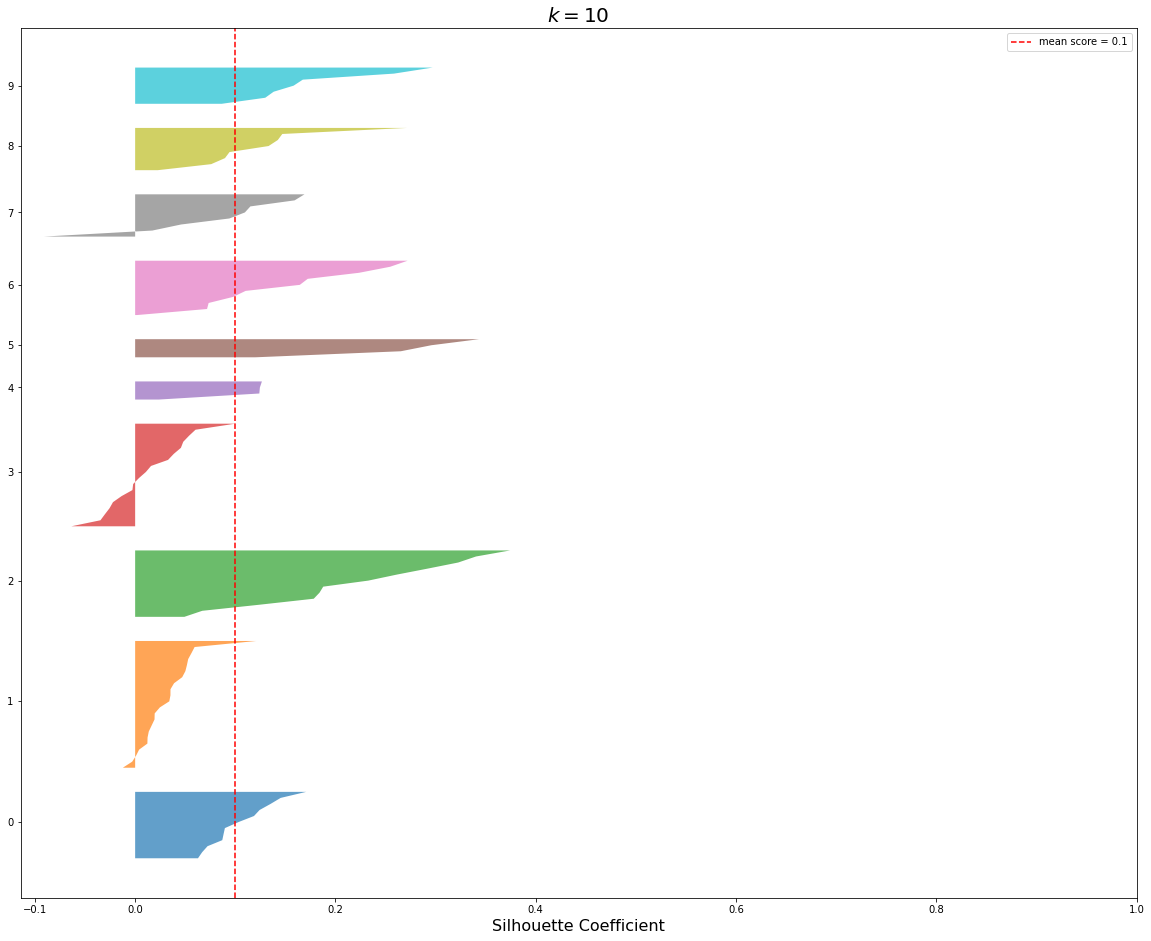

0.10967059097242653


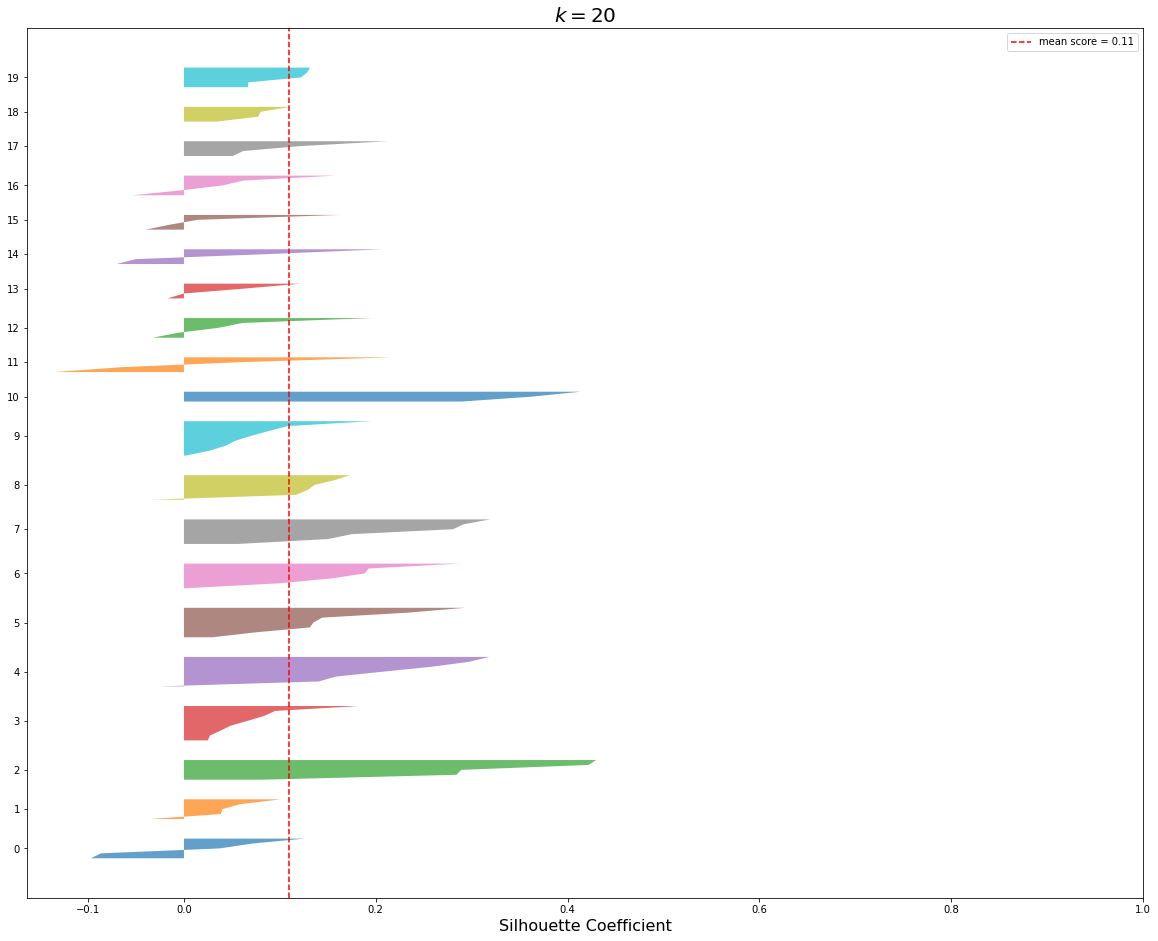

In [0]:
# Graph for cosine clusters silhouette scores 
for k in (2, 5, 10, 20):
    plt.figure(figsize=(20,16))
    
    kmeans_cos = KMeans(n_clusters=k, precompute_distances = True).fit(cos_dist)

    centers = kmeans_cos.cluster_centers_
    labels_cosine = kmeans_cos.labels_
    y_pred = np.asarray(labels_cosine)
    
    silhouette_scores = silhouette_score(cos_dist, y_pred)
    silhouette_coefficients = silhouette_samples(cos_dist, labels_cosine)
    padding = len(cos_dist) // 30
    pos = padding
    ticks = []
    
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 30):
        plt.ylabel("Cluster", fontsize=16)
    
    if k in (2, 5, 10, 20):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient", fontsize=16)
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores, color="red", linestyle="--", label = "mean score = {}".format(round(silhouette_scores, 3)))
    print(silhouette_scores)
    plt.title("$k={}$".format(k), fontsize=20)
    plt.legend()
    plt.show();

# N.B. find clusters algorithm adapted from COMP5318 Lab 10

0.09038763886853131


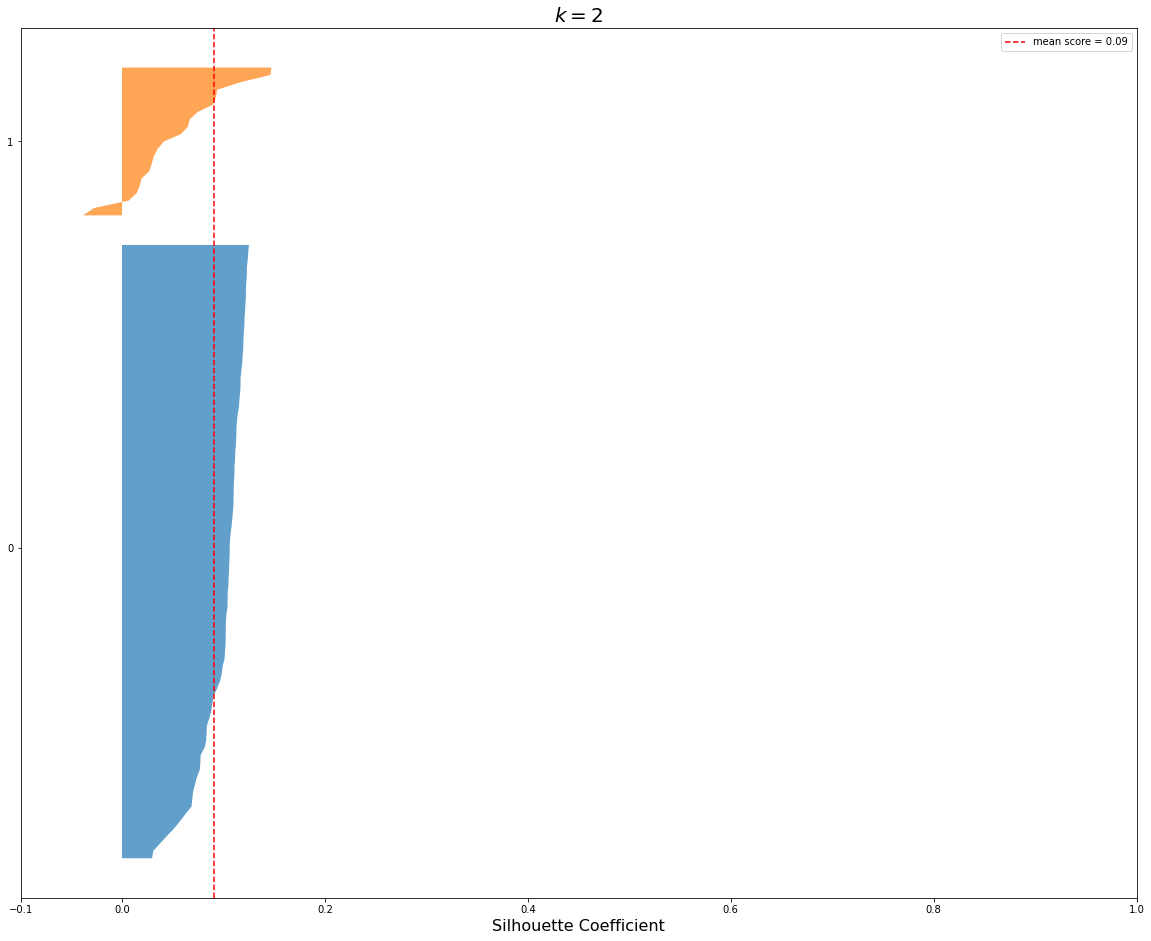

0.03815194654133695


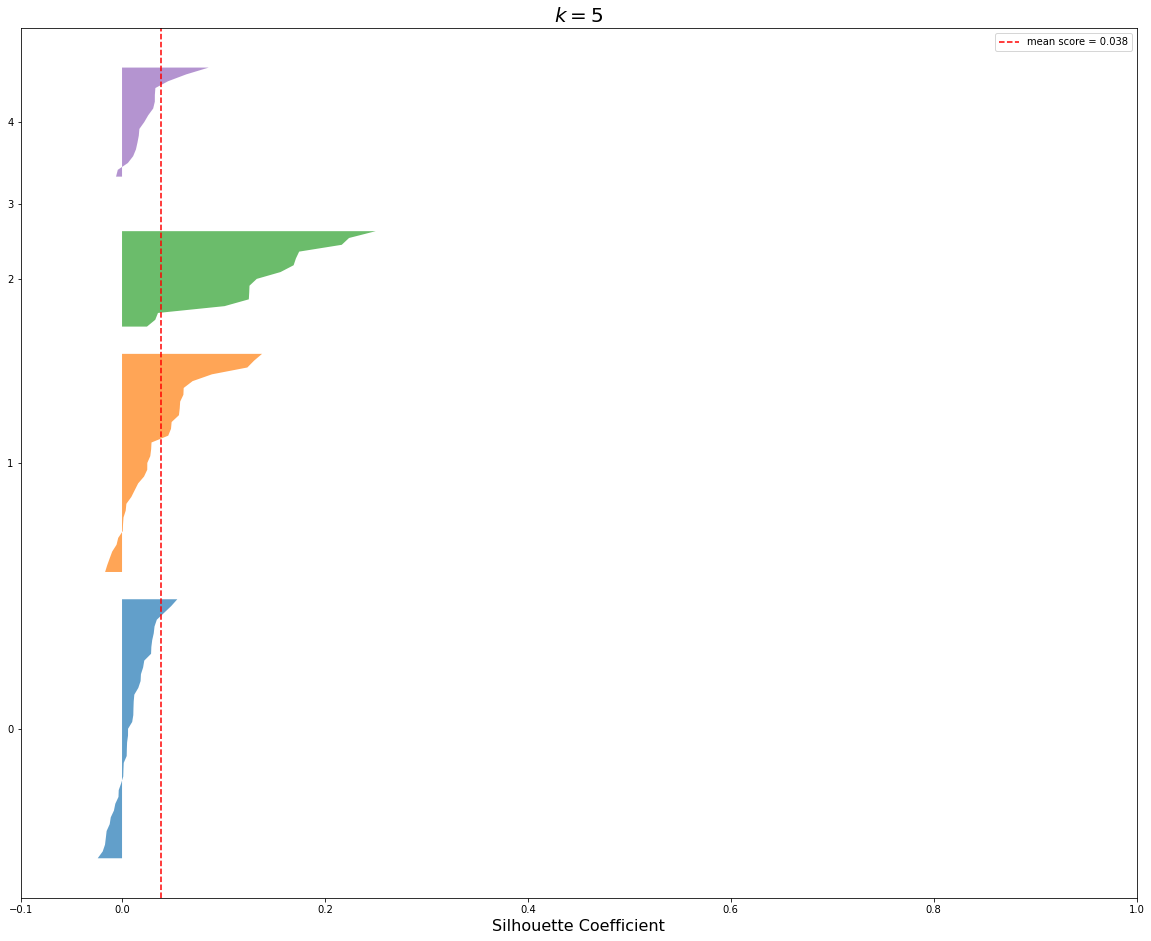

0.057794452057606194


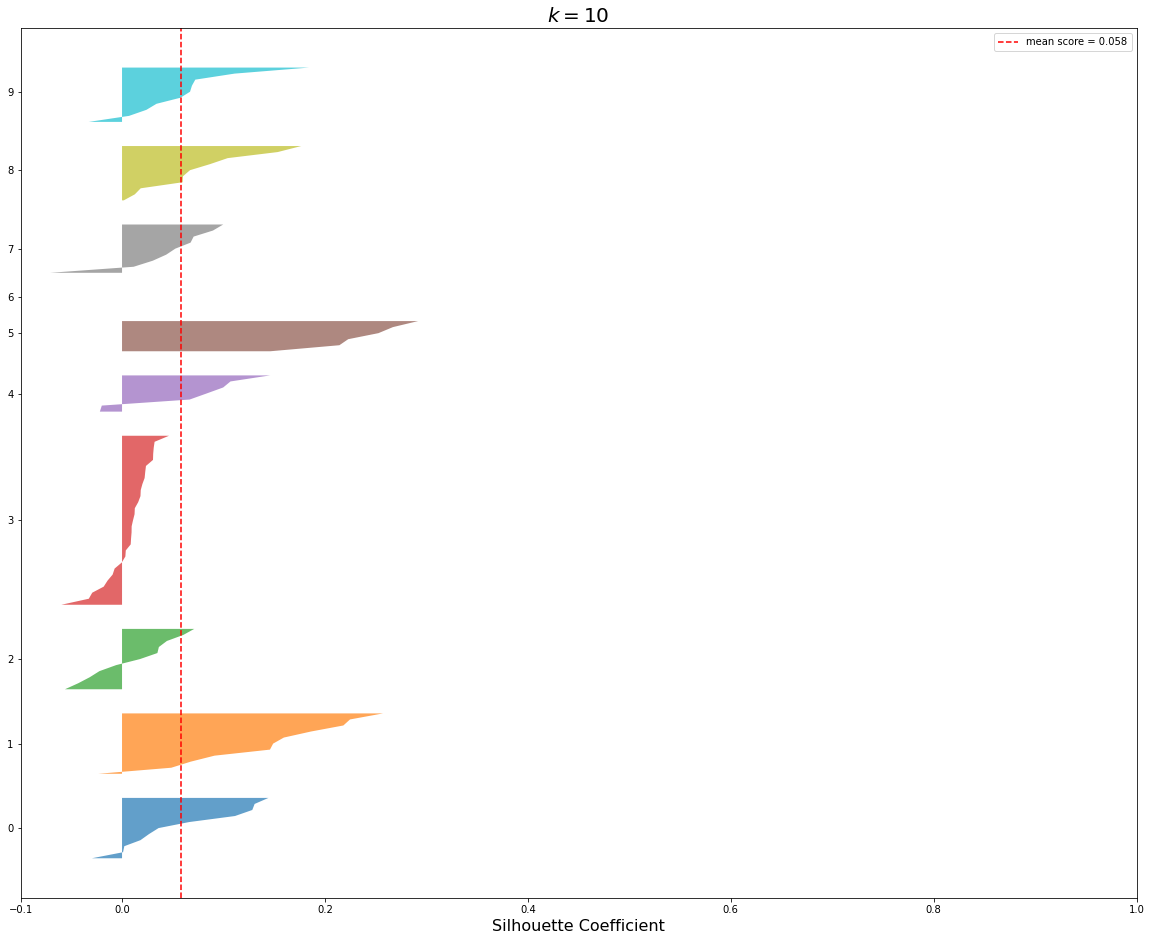

0.06592200455072662


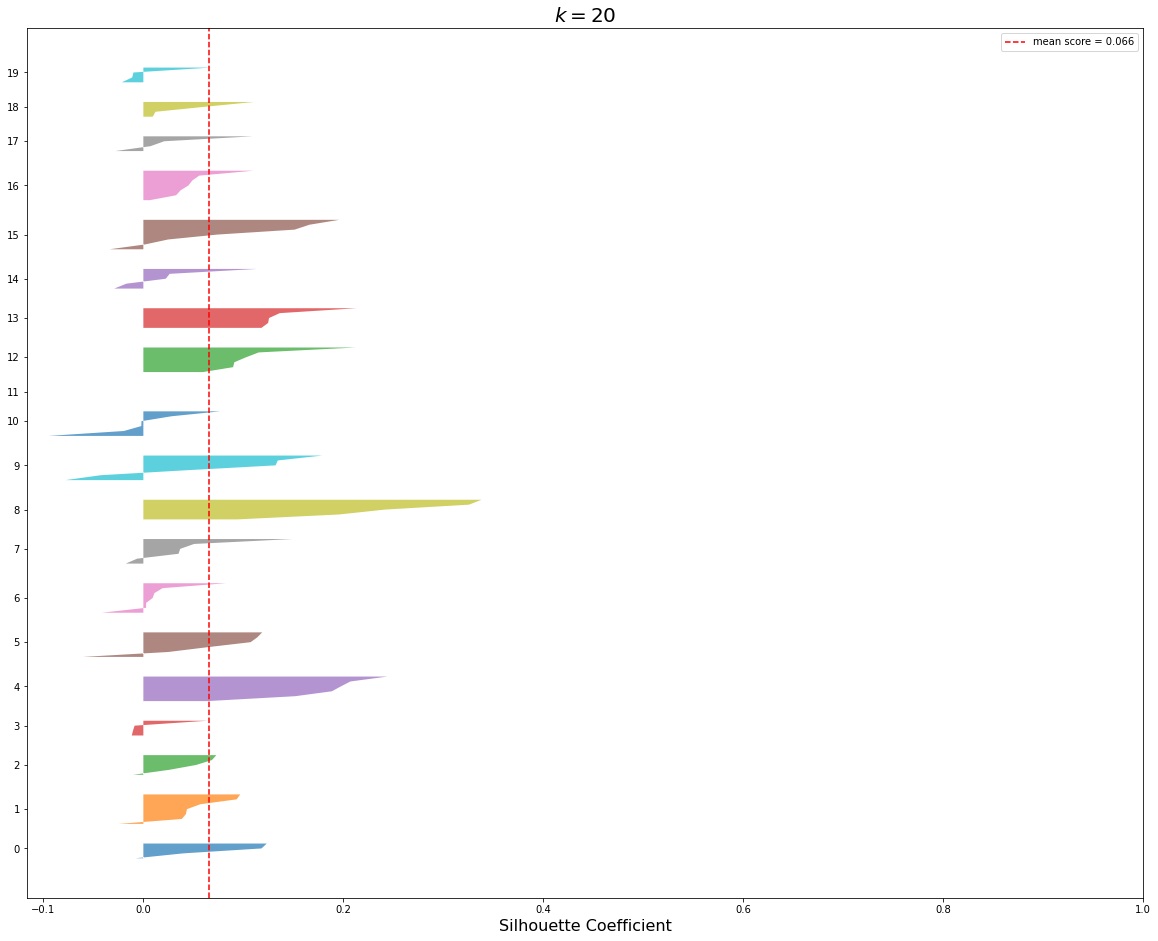

In [0]:
# Graph for euclidean clusters silhouette scores 
for k in (2, 5, 10, 20):
    plt.figure(figsize=(20,16))
    
    kmeans_ucl = KMeans(n_clusters=k, precompute_distances = True).fit(ucl_dist)

    centers = kmeans_ucl.cluster_centers_
    labels_euclidean = kmeans_ucl.labels_

    y_pred = np.asarray(labels_euclidean)
    
    silhouette_scores = silhouette_score(ucl_dist, y_pred)
    silhouette_coefficients = silhouette_samples(ucl_dist, labels_euclidean)
    padding = len(ucl_dist) // 30
    pos = padding
    ticks = []
    
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 30):
        plt.ylabel("Cluster", fontsize=16)
    
    if k in (2, 5, 10, 20):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient", fontsize=16)
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores, color="red", linestyle="--", label = "mean score = {}".format(round(silhouette_scores, 3)))
    print(silhouette_scores)
    plt.title("$k={}$".format(k), fontsize=20)
    plt.legend()
    plt.show();

# N.B. find clusters algorithm adapted from COMP5318 Lab 10

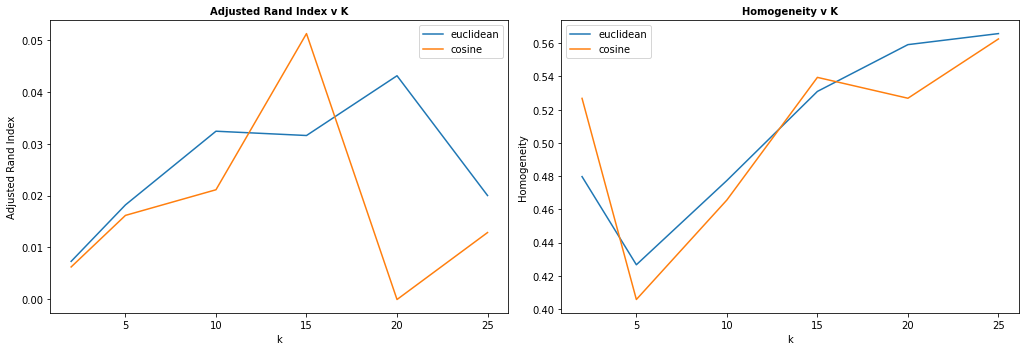

In [0]:
k = [2, 5, 10, 15, 20, 25]

# Plotting external evaluation criteria 
plt.figure(figsize=(15,10))
plt.subplot(221)
plt.tight_layout(pad=3.0)
plt.plot(k, rand_all_euclidean, label='euclidean')
plt.plot(k, rand_all_cosine, label='cosine')
plt.ylabel('Adjusted Rand Index', fontsize=10)
plt.xlabel('k', fontsize = 10)
plt.title('Adjusted Rand Index v K',fontsize=10, weight='bold')
plt.legend()

plt.subplot(222)
plt.tight_layout(pad=3.0)
plt.ylabel('Homogeneity', fontsize=10)
plt.xlabel('k', fontsize = 10)
plt.title('Homogeneity v K',fontsize=10, weight='bold')
plt.plot(k, homogeneity_all_euclidean, label='euclidean')
plt.plot(k, homogeneity_all_cosine, label='cosine')
plt.legend();

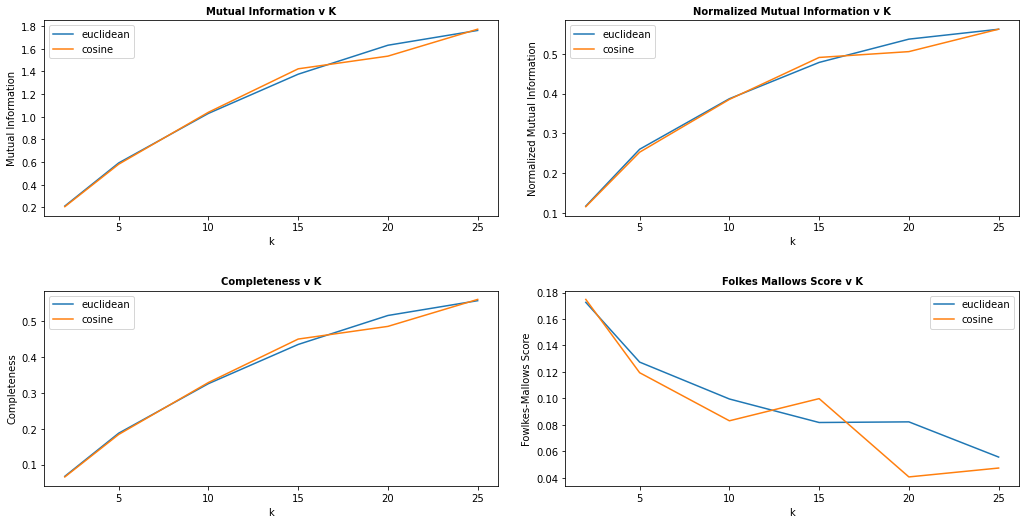

In [0]:
# Other external evalutation criteria 
plt.figure(figsize=(15,15))
plt.subplot(421)
plt.tight_layout(pad=3.0)
plt.ylabel('Mutual Information', fontsize=10)
plt.xlabel('k', fontsize = 10)
plt.title('Mutual Information v K',fontsize=10, weight='bold')
plt.plot(k, mutual_information_all_euclidean, label='euclidean')
plt.plot(k, mutual_information_all_cosine, label='cosine')
plt.legend()

plt.subplot(422)
plt.tight_layout(pad=3.0)
plt.ylabel('Normalized Mutual Information', fontsize=10)
plt.xlabel('k', fontsize = 10)
plt.title('Normalized Mutual Information v K', fontsize=10, weight='bold')
plt.plot(k, norm_mutual_information_all_euclidean, label='euclidean')
plt.plot(k, norm_mutual_information_all_cosine, label='cosine')
plt.legend()

plt.subplot(423)
plt.tight_layout(pad=3.0)
plt.ylabel('Completeness', fontsize=10)
plt.xlabel('k', fontsize = 10)
plt.title('Completeness v K',fontsize=10, weight='bold')
plt.plot(k, completeness_all_euclidean, label='euclidean')
plt.plot(k, completeness_all_cosine, label='cosine')
plt.legend()

plt.subplot(424)
plt.tight_layout(pad=3.0)
plt.ylabel('Fowlkes-Mallows Score', fontsize=10)
plt.xlabel('k', fontsize = 10)
plt.title('Folkes Mallows Score v K', fontsize=10, weight='bold')
plt.plot(k, folkes_mallows_score_all_euclidean, label='euclidean')
plt.plot(k, folkes_mallows_score_all_cosine, label='cosine')
plt.legend();



---


# 3. Hierachical Clustering

## 3.1 Travel Review Dataset

### Train Hierarchical clustering 

In [0]:
# HCA with n = 2 cluster euclidean
# Clustering using euclidean dist
clustering1 = AgglomerativeClustering(affinity='euclidean', n_clusters=2, linkage='complete').fit(reviews)
print(clustering1)

print(len(clustering1.labels_))
print(clustering1.labels_[:5])

clustering2 = AgglomerativeClustering(affinity='euclidean', n_clusters=2, linkage='average').fit(reviews)
print(clustering2)

print(len(clustering2.labels_))
print(clustering2.labels_[:5])


clustering3 = AgglomerativeClustering(affinity='euclidean', n_clusters=2, linkage='single').fit(reviews)
print(clustering3)

print(len(clustering3.labels_))
print(clustering3.labels_[:5])

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=2)
980
[1 1 0 0 1]
AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=2)
980
[0 0 0 0 0]
AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=2)
980
[0 0 0 0 0]


In [0]:
# HCA with n = 2 cluster Manhattan
# Clustering using manhattan dist
clustering4 = AgglomerativeClustering(affinity='manhattan', n_clusters=2, linkage='complete').fit(reviews)
print(clustering4)

print(len(clustering4.labels_))
print(clustering4.labels_[:5])


clustering5 = AgglomerativeClustering(affinity='manhattan', n_clusters=2, linkage='average').fit(reviews)
print(clustering5)

print(len(clustering5.labels_))
print(clustering5.labels_[:5])


clustering6 = AgglomerativeClustering(affinity='manhattan', n_clusters=2, linkage='single').fit(reviews)
print(clustering6)

print(len(clustering6.labels_))
print(clustering6.labels_[:5])

AgglomerativeClustering(affinity='manhattan', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=2)
980
[0 0 1 0 0]
AgglomerativeClustering(affinity='manhattan', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=2)
980
[0 0 0 0 0]
AgglomerativeClustering(affinity='manhattan', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=2)
980
[0 0 0 0 0]


In [0]:
# HCA with n = 2 clusters made using Cosine similarity 
# Clustering using cosine similarity
clustering7 = AgglomerativeClustering(affinity='cosine', n_clusters=2, linkage='complete').fit(reviews)
print(clustering7)

print(len(clustering7.labels_))
print(clustering7.labels_[:5])

clustering8 = AgglomerativeClustering(affinity='cosine', n_clusters=2, linkage='average').fit(reviews)
print(clustering8)

print(len(clustering8.labels_))
print(clustering8.labels_[:5])

clustering9 = AgglomerativeClustering(affinity='cosine', n_clusters=2, linkage='single').fit(reviews)
print(clustering9)

print(len(clustering9.labels_))
print(clustering9.labels_[:5])

AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=2)
980
[0 0 0 1 0]
AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=2)
980
[0 0 0 0 0]
AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=2)
980
[0 0 0 0 0]


### First evaluation 

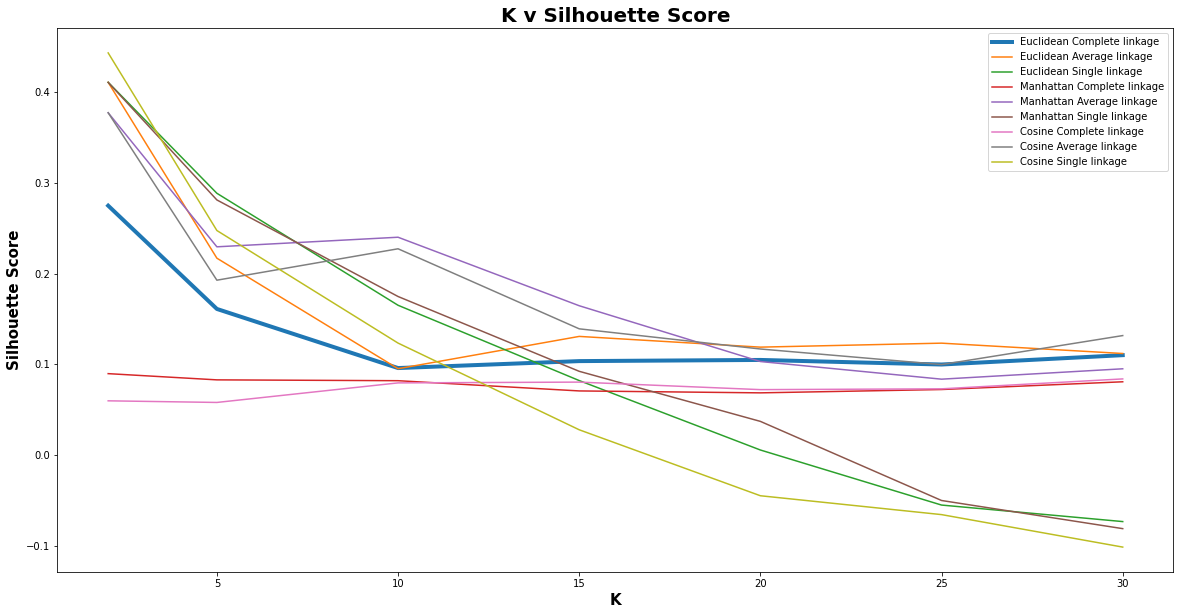

In [0]:
# Selection of cluster size using silhouette scores 
k = [2, 5, 10, 15, 20, 25, 30]

# Arrays to store the various evaluation metrics 
# Internal measures 

silhouette_scores_euclidean_comp = []
silhouette_scores_euclidean_avg = []
silhouette_scores_euclidean_sgl = []

silhouette_scores_manhattan_comp = []
silhouette_scores_manhattan_avg = []
silhouette_scores_manhattan_sgl = []

silhouette_scores_cosine_comp = []
silhouette_scores_cosine_avg = []
silhouette_scores_cosine_sgl = []

# Training three different versions of aglomerative clustering for different values of k
for i in k:

    model_euclidean_comp = AgglomerativeClustering(affinity='euclidean', n_clusters=i, linkage='complete').fit(reviews)
    model_euclidean_avg = AgglomerativeClustering(affinity='euclidean', n_clusters=i, linkage='average').fit(reviews)
    model_euclidean_sgl = AgglomerativeClustering(affinity='euclidean', n_clusters=i, linkage='single').fit(reviews)
    model_manhattan_comp = AgglomerativeClustering(affinity='manhattan', n_clusters=i, linkage='complete').fit(reviews)
    model_manhattan_avg = AgglomerativeClustering(affinity='manhattan', n_clusters=i, linkage='average').fit(reviews)
    model_manhattan_sgl = AgglomerativeClustering(affinity='manhattan', n_clusters=i, linkage='single').fit(reviews)
    model_cosine_comp = AgglomerativeClustering(affinity='cosine', n_clusters=i, linkage='complete').fit(reviews)
    model_cosine_avg = AgglomerativeClustering(affinity='cosine', n_clusters=i, linkage='average').fit(reviews)
    model_cosine_sgl = AgglomerativeClustering(affinity='cosine', n_clusters=i, linkage='single').fit(reviews)

    score_euclidean_comp = silhouette_score(reviews_con, model_euclidean_comp.labels_)
    score_euclidean_avg = silhouette_score(reviews_con, model_euclidean_avg.labels_)
    score_euclidean_sgl = silhouette_score(reviews_con, model_euclidean_sgl.labels_)
    score_manhattan_comp = silhouette_score(reviews_con, model_manhattan_comp.labels_)
    score_manhattan_avg = silhouette_score(reviews_con, model_manhattan_avg.labels_)
    score_manhattan_sgl = silhouette_score(reviews_con, model_manhattan_sgl.labels_)
    score_cosine_comp = silhouette_score(reviews_con, model_cosine_comp.labels_)
    score_cosine_avg = silhouette_score(reviews_con, model_cosine_avg.labels_)
    score_cosine_sgl = silhouette_score(reviews_con, model_cosine_sgl.labels_)

    silhouette_scores_euclidean_comp.append(score_euclidean_comp)
    silhouette_scores_euclidean_avg.append(score_euclidean_avg)
    silhouette_scores_euclidean_sgl.append(score_euclidean_sgl)

    silhouette_scores_manhattan_comp.append(score_manhattan_comp)
    silhouette_scores_manhattan_avg.append(score_manhattan_avg)
    silhouette_scores_manhattan_sgl.append(score_manhattan_sgl)

    silhouette_scores_cosine_comp.append(score_cosine_comp)
    silhouette_scores_cosine_avg.append(score_cosine_avg)
    silhouette_scores_cosine_sgl.append(score_cosine_sgl)

# Plotting silhouette scores 
plt.figure(figsize=(20,10))
plt.plot(k, silhouette_scores_euclidean_comp, label= 'Euclidean Complete linkage', linewidth=4)
plt.plot(k, silhouette_scores_euclidean_avg, label= 'Euclidean Average linkage')
plt.plot(k, silhouette_scores_euclidean_sgl, label= 'Euclidean Single linkage')

plt.plot(k, silhouette_scores_manhattan_comp, label= 'Manhattan Complete linkage')
plt.plot(k, silhouette_scores_manhattan_avg, label= 'Manhattan Average linkage')
plt.plot(k, silhouette_scores_manhattan_sgl, label= 'Manhattan Single linkage')

plt.plot(k, silhouette_scores_cosine_comp, label = 'Cosine Complete linkage')
plt.plot(k, silhouette_scores_cosine_avg, label = 'Cosine Average linkage')
plt.plot(k, silhouette_scores_cosine_sgl, label = 'Cosine Single linkage')

plt.xlabel('K', weight='bold', size=15)
plt.ylabel('Silhouette Score', weight='bold', size=15)
plt.title('K v Silhouette Score', size = 20, weight='bold')
plt.legend()
plt.show();

0.27486384544141035


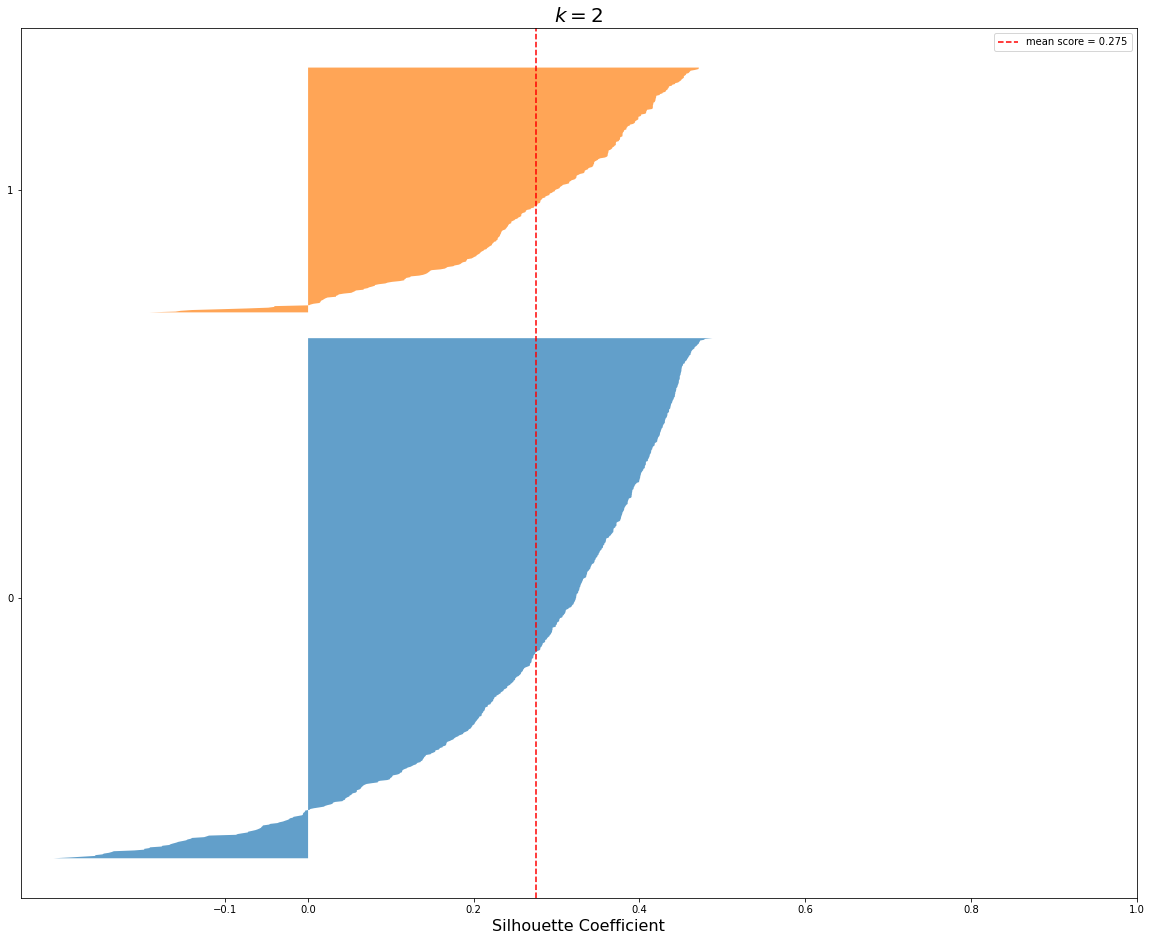

0.16115426754546186


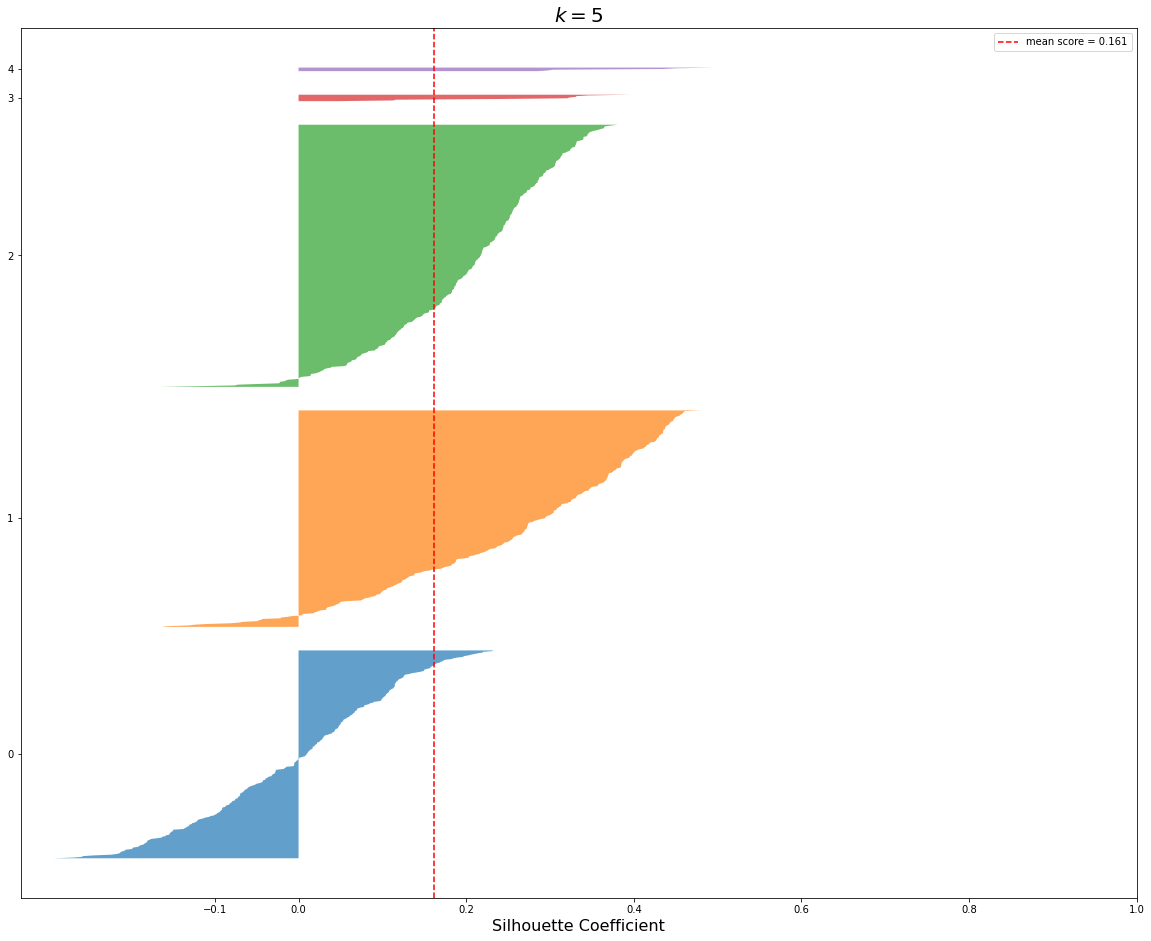

0.09605980277727076


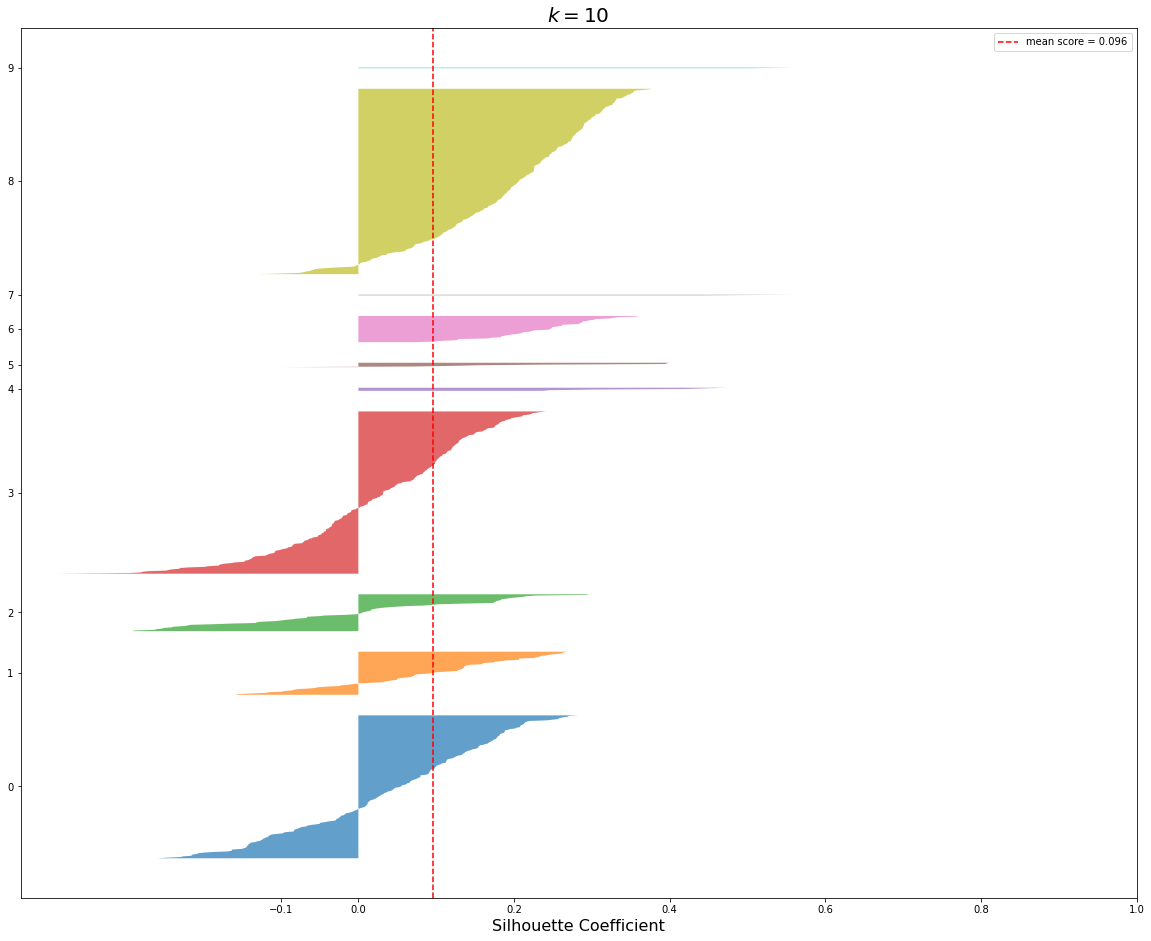

0.10499615396250737


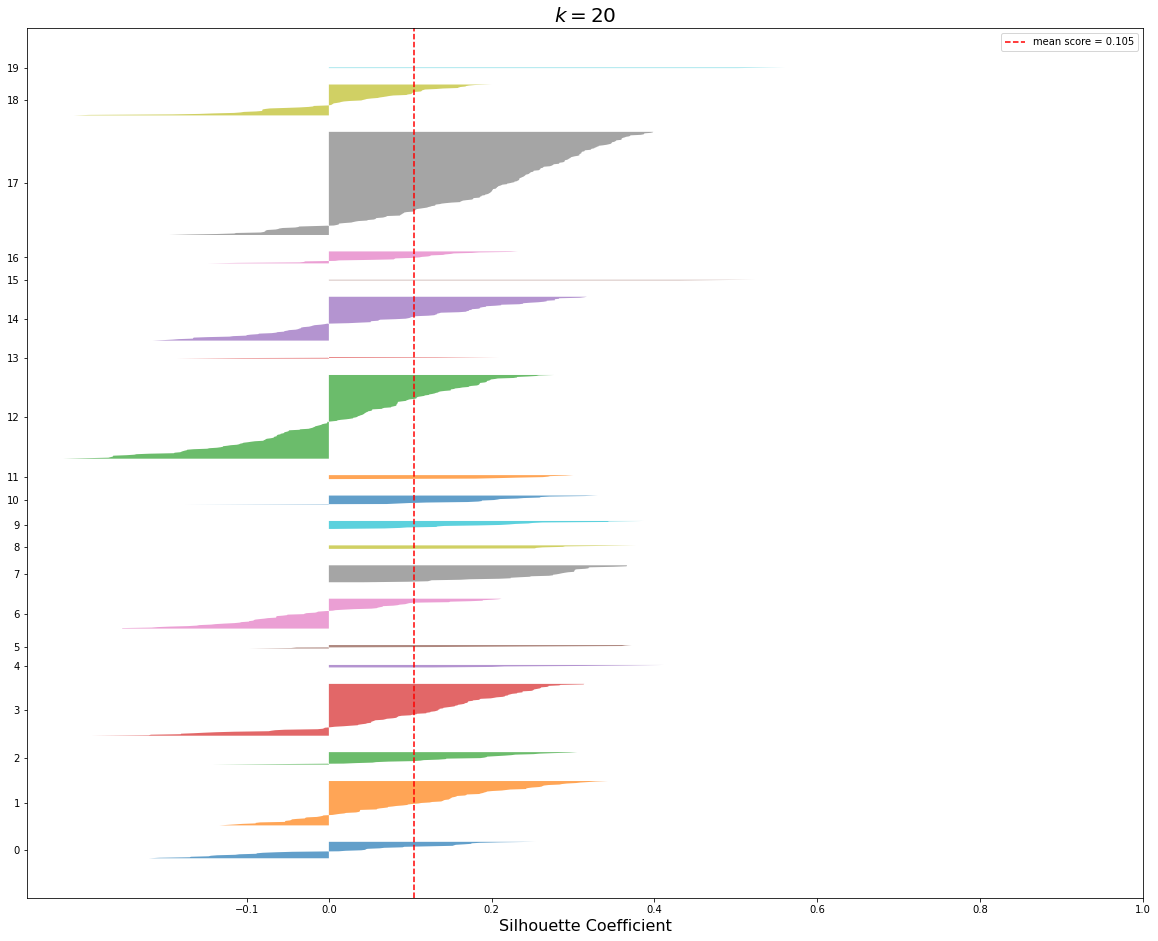

In [0]:
# Graph for euclidean clusters silhouette scores 
for k in (2, 5, 10, 20):
    plt.figure(figsize=(20,16))
    
    model_euclidean = AgglomerativeClustering(affinity='euclidean', n_clusters=k, linkage='complete').fit(reviews)
    
    labels_euclidean = model_euclidean.labels_
    
    y_pred = np.asarray(labels_euclidean)
    
    silhouette_scores = silhouette_score(reviews, y_pred)
    silhouette_coefficients = silhouette_samples(reviews, labels_euclidean)
    padding = len(reviews) // 30
    pos = padding
    ticks = []
    
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 30):
        plt.ylabel("Cluster", fontsize=16)
    
    if k in (2, 5, 10, 20):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient", fontsize=16)
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores, color="red", linestyle="--", label = "mean score = {}".format(round(silhouette_scores, 3)))
    print(silhouette_scores)
    plt.title("$k={}$".format(k), fontsize=20)
    plt.legend()
    plt.show()

# N.B. find clusters algorithm adapted from COMP5318 Lab 10

0.08990680335080722


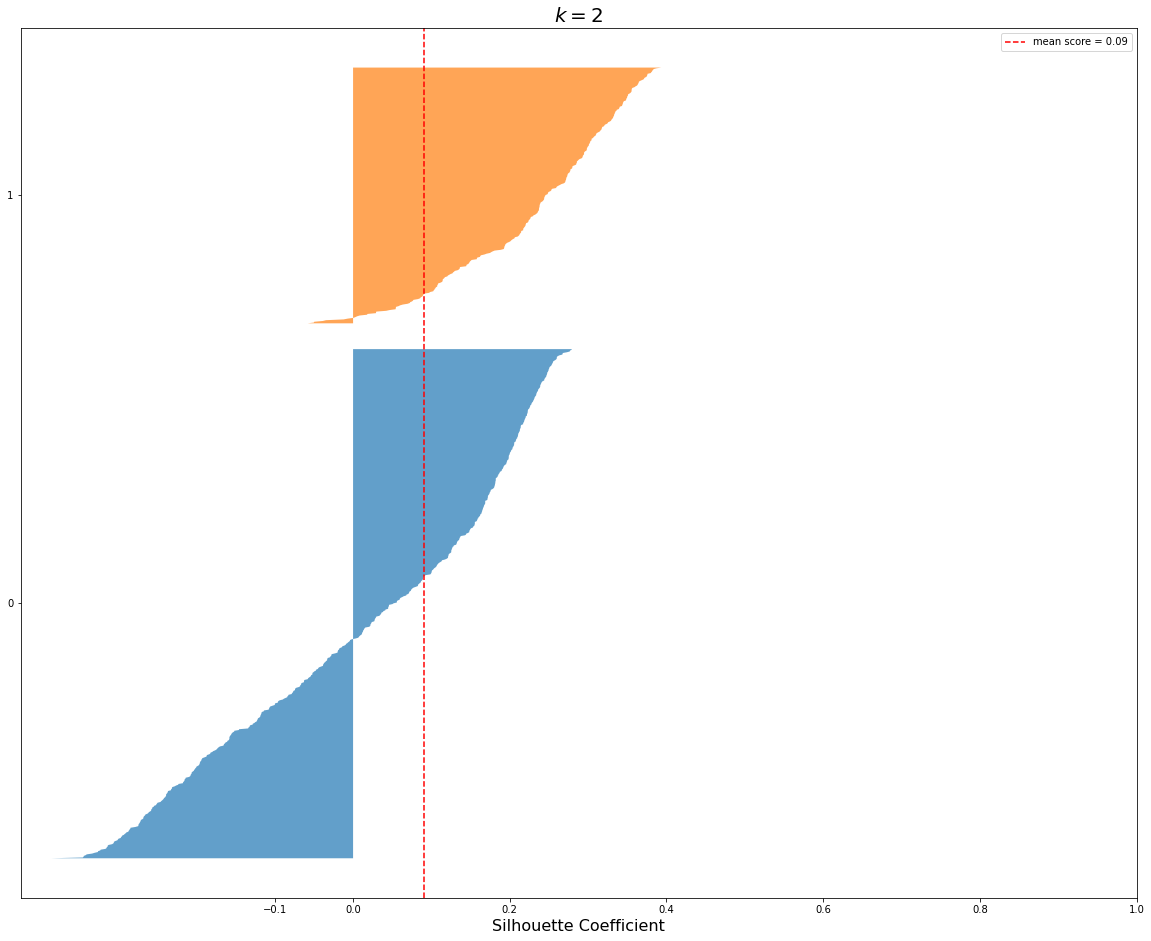

0.08305899783948727


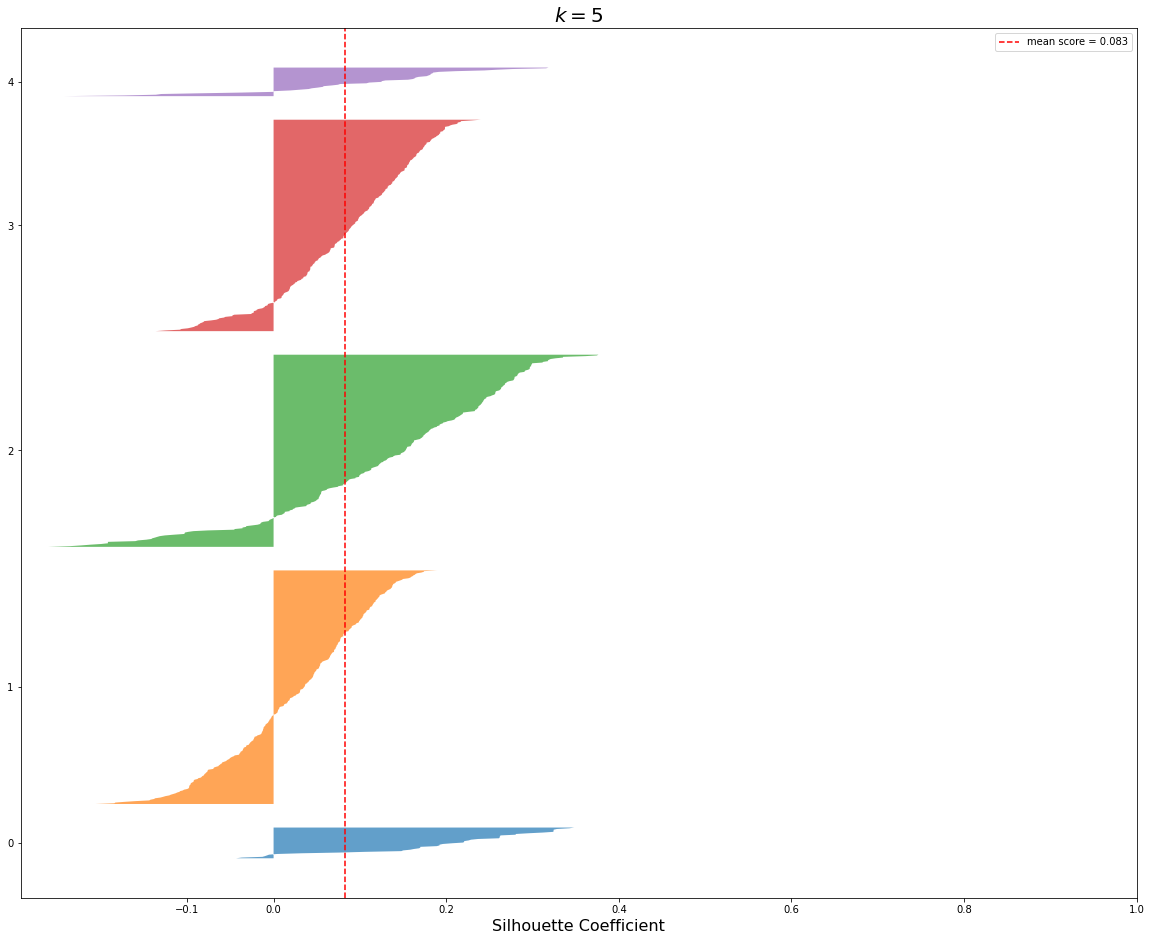

0.0821410116895804


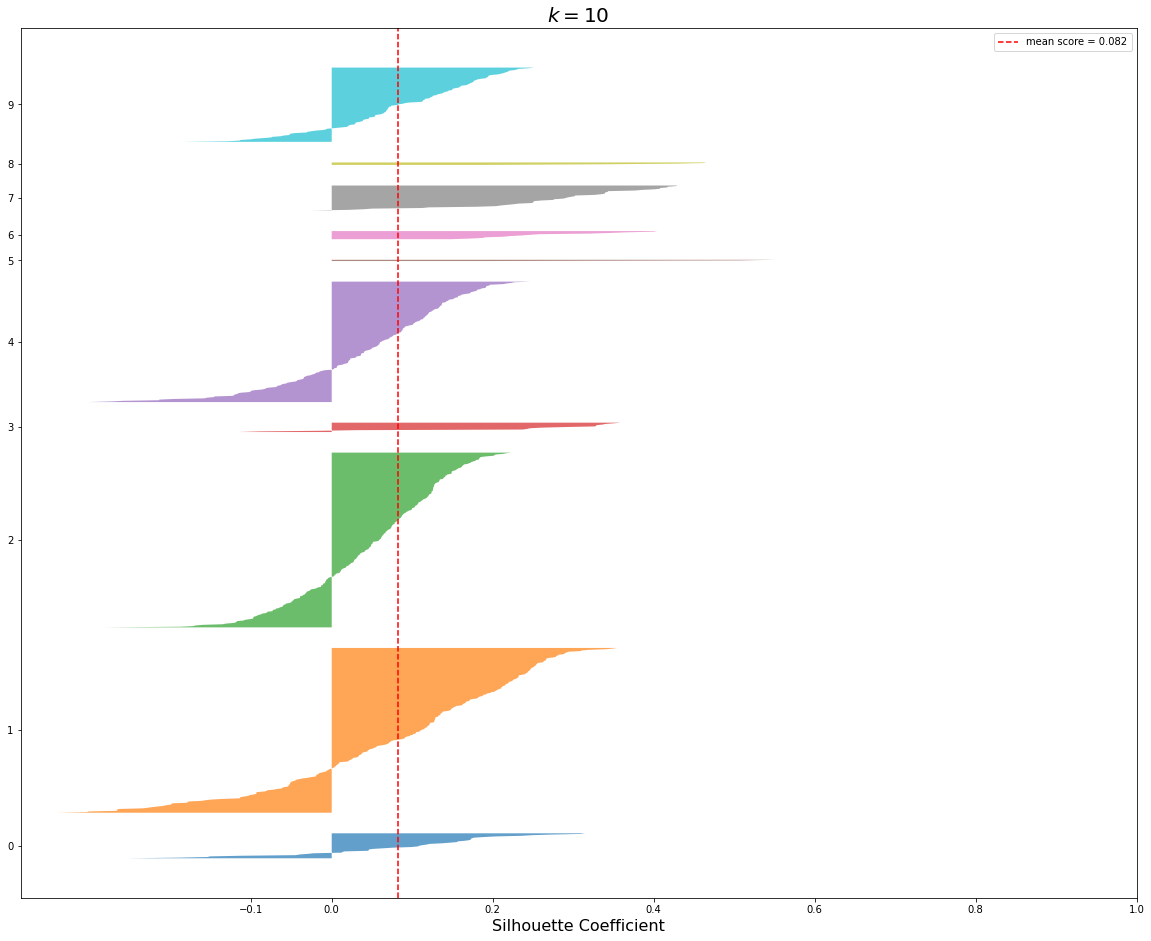

0.06875651090999822


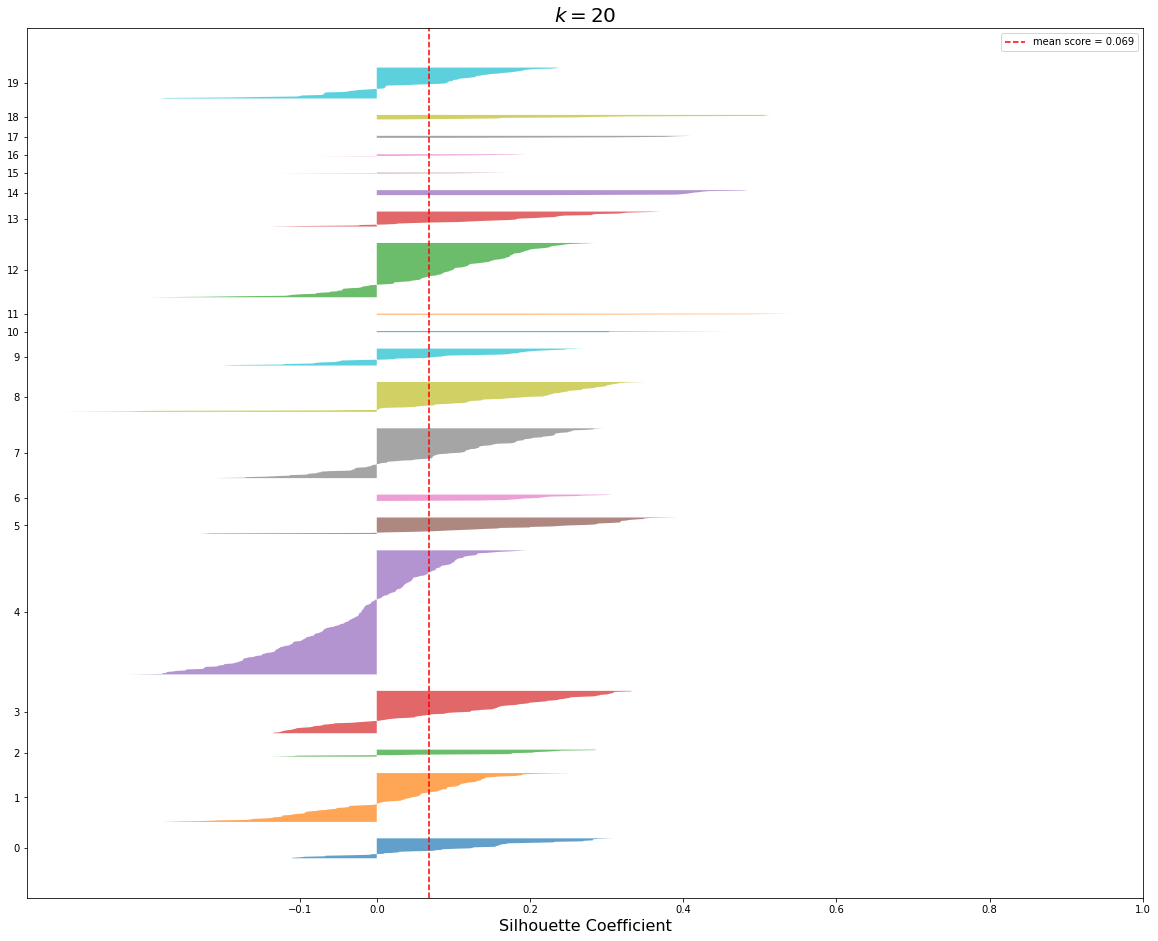

In [0]:
# Graph for manhattan clusters silhouette scores 
for k in (2, 5, 10, 20):
    plt.figure(figsize=(20,16))
    
    model_manhattan = AgglomerativeClustering(affinity='manhattan', n_clusters=k, linkage='complete').fit(reviews)
    
    labels_manhattan = model_manhattan.labels_
    
    y_pred = np.asarray(labels_manhattan)
    
    silhouette_scores = silhouette_score(reviews, y_pred)
    silhouette_coefficients = silhouette_samples(reviews, labels_manhattan)
    padding = len(reviews) // 30
    pos = padding
    ticks = []
    
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 30):
        plt.ylabel("Cluster", fontsize=16)
    
    if k in (2, 5, 10, 20):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient", fontsize=16)
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores, color="red", linestyle="--", label = "mean score = {}".format(round(silhouette_scores, 3)))
    print(silhouette_scores)
    plt.title("$k={}$".format(k), fontsize=20)
    plt.legend()
    plt.show()

# N.B. find clusters algorithm adapted from COMP5318 Lab 10

0.05998188002065454


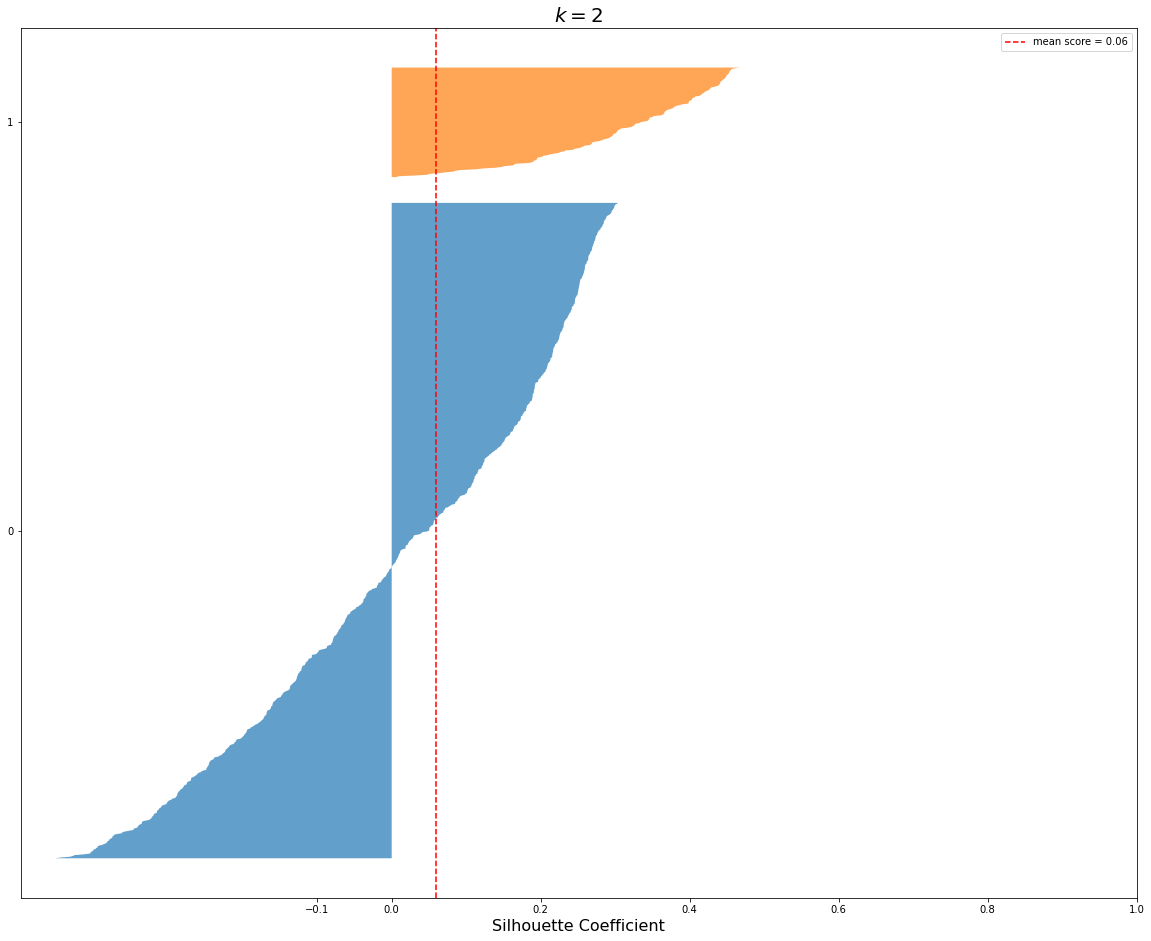

0.05819246057879708


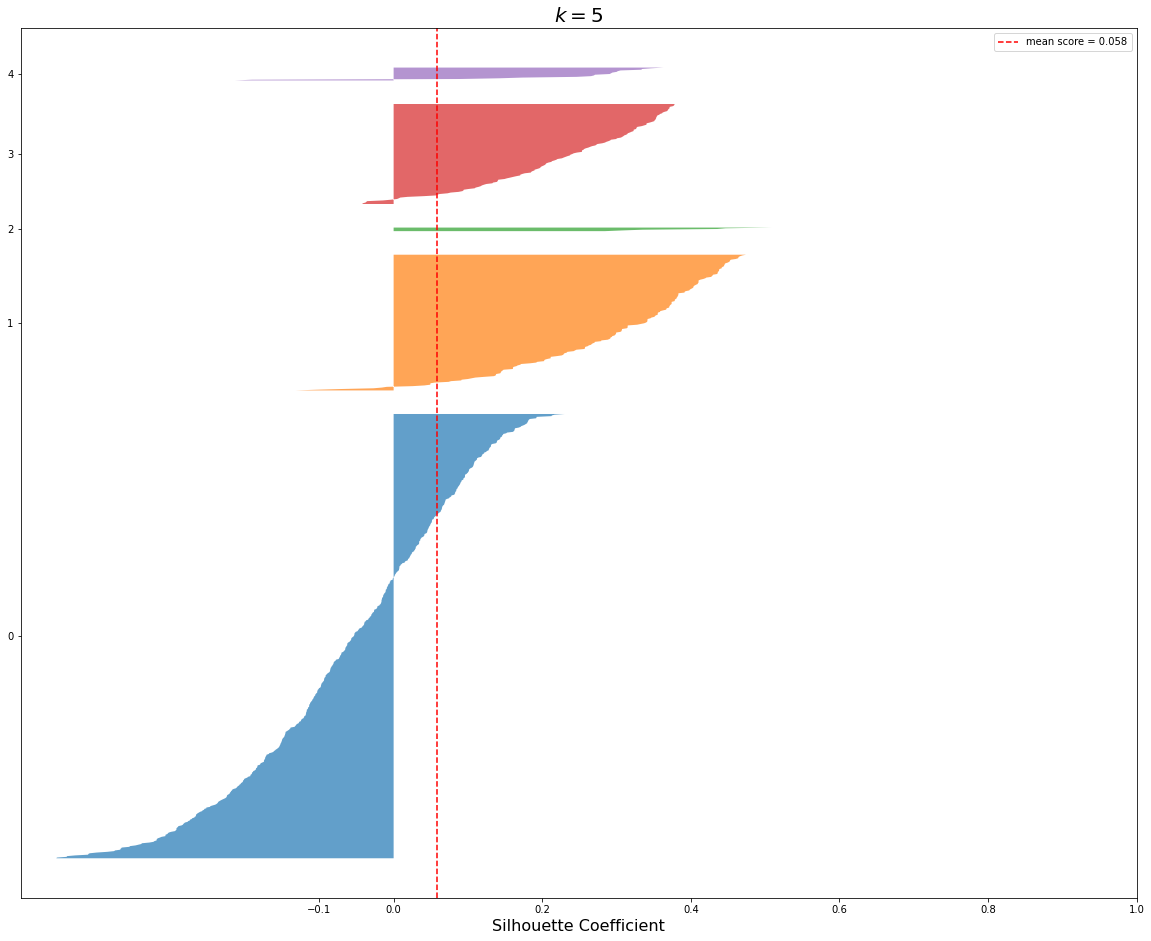

0.07972174817296726


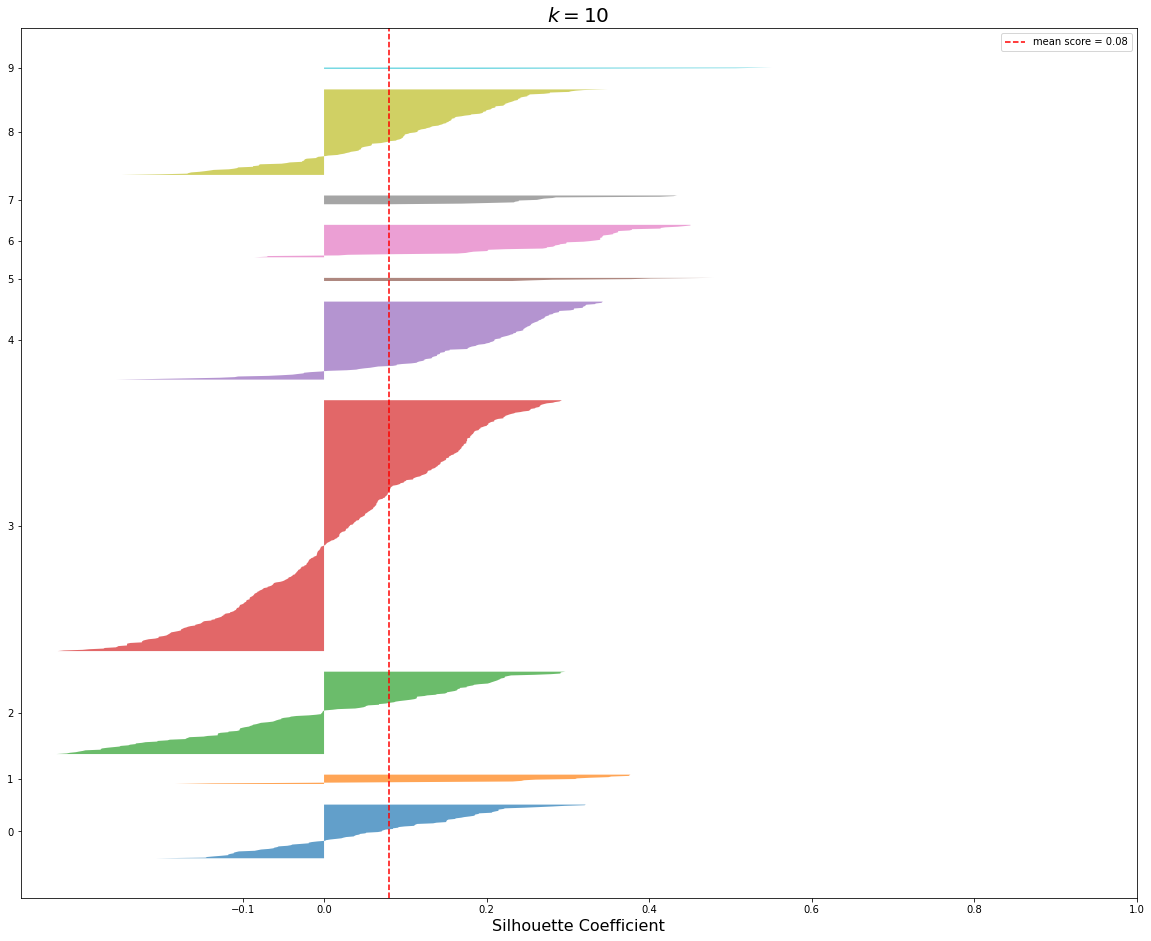

0.07230127000026176


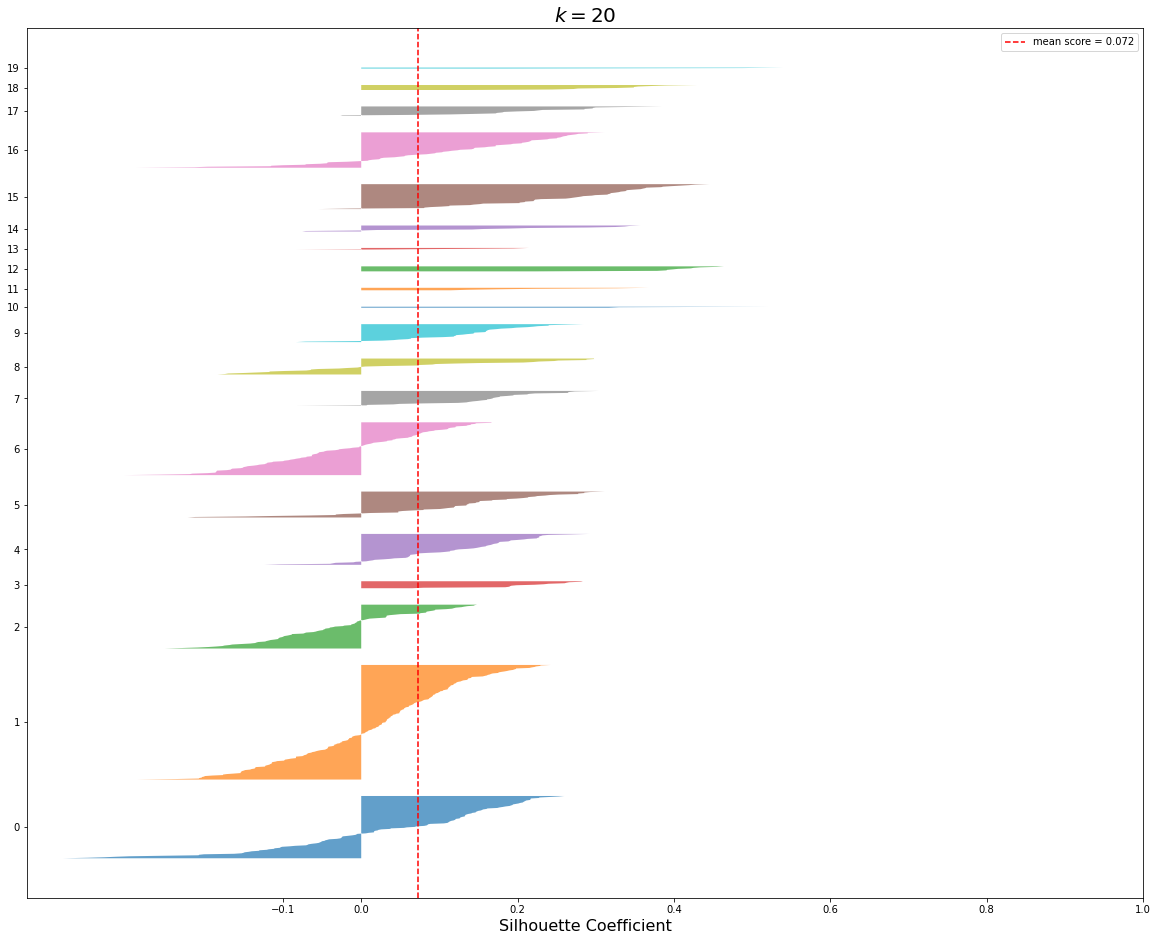

In [0]:
# Graph for cosine clusters silhouette scores 
for k in (2, 5, 10, 20):
    plt.figure(figsize=(20,16))
    
    model_cosine = AgglomerativeClustering(affinity='cosine', n_clusters=k, linkage='complete').fit(reviews)
    
    labels_cosine = model_cosine.labels_
    
    y_pred = np.asarray(labels_cosine)
    
    silhouette_scores = silhouette_score(reviews, y_pred)
    silhouette_coefficients = silhouette_samples(reviews, labels_cosine)
    padding = len(reviews) // 30
    pos = padding
    ticks = []
    
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 30):
        plt.ylabel("Cluster", fontsize=16)
    
    if k in (2, 5, 10, 20):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient", fontsize=16)
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores, color="red", linestyle="--", label = "mean score = {}".format(round(silhouette_scores, 3)))
    print(silhouette_scores)
    plt.title("$k={}$".format(k), fontsize=20)
    plt.legend()
    plt.show()

# N.B. find clusters algorithm adapted from COMP5318 Lab 10

In [0]:
# Investigation of cophenetic distance for different linkage methods 
distance = ['single', 'complete', 'average']
scores = [] 

for i in distance:
  mat = linkage(reviews, i)
  score, coph_dists = cophenet(mat, pdist(reviews))
  scores.append(round(score, 5))

table = pd.DataFrame(np.c_[distance, scores], columns=['Distance Measure', 'Cophenetic distance'])

table

# N.B code adapted from a tutorial found here: https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

Distance Measure Cophenetic distance
0           single             0.51593
1         complete             0.51933
2          average             0.68123

### Second evaluation 

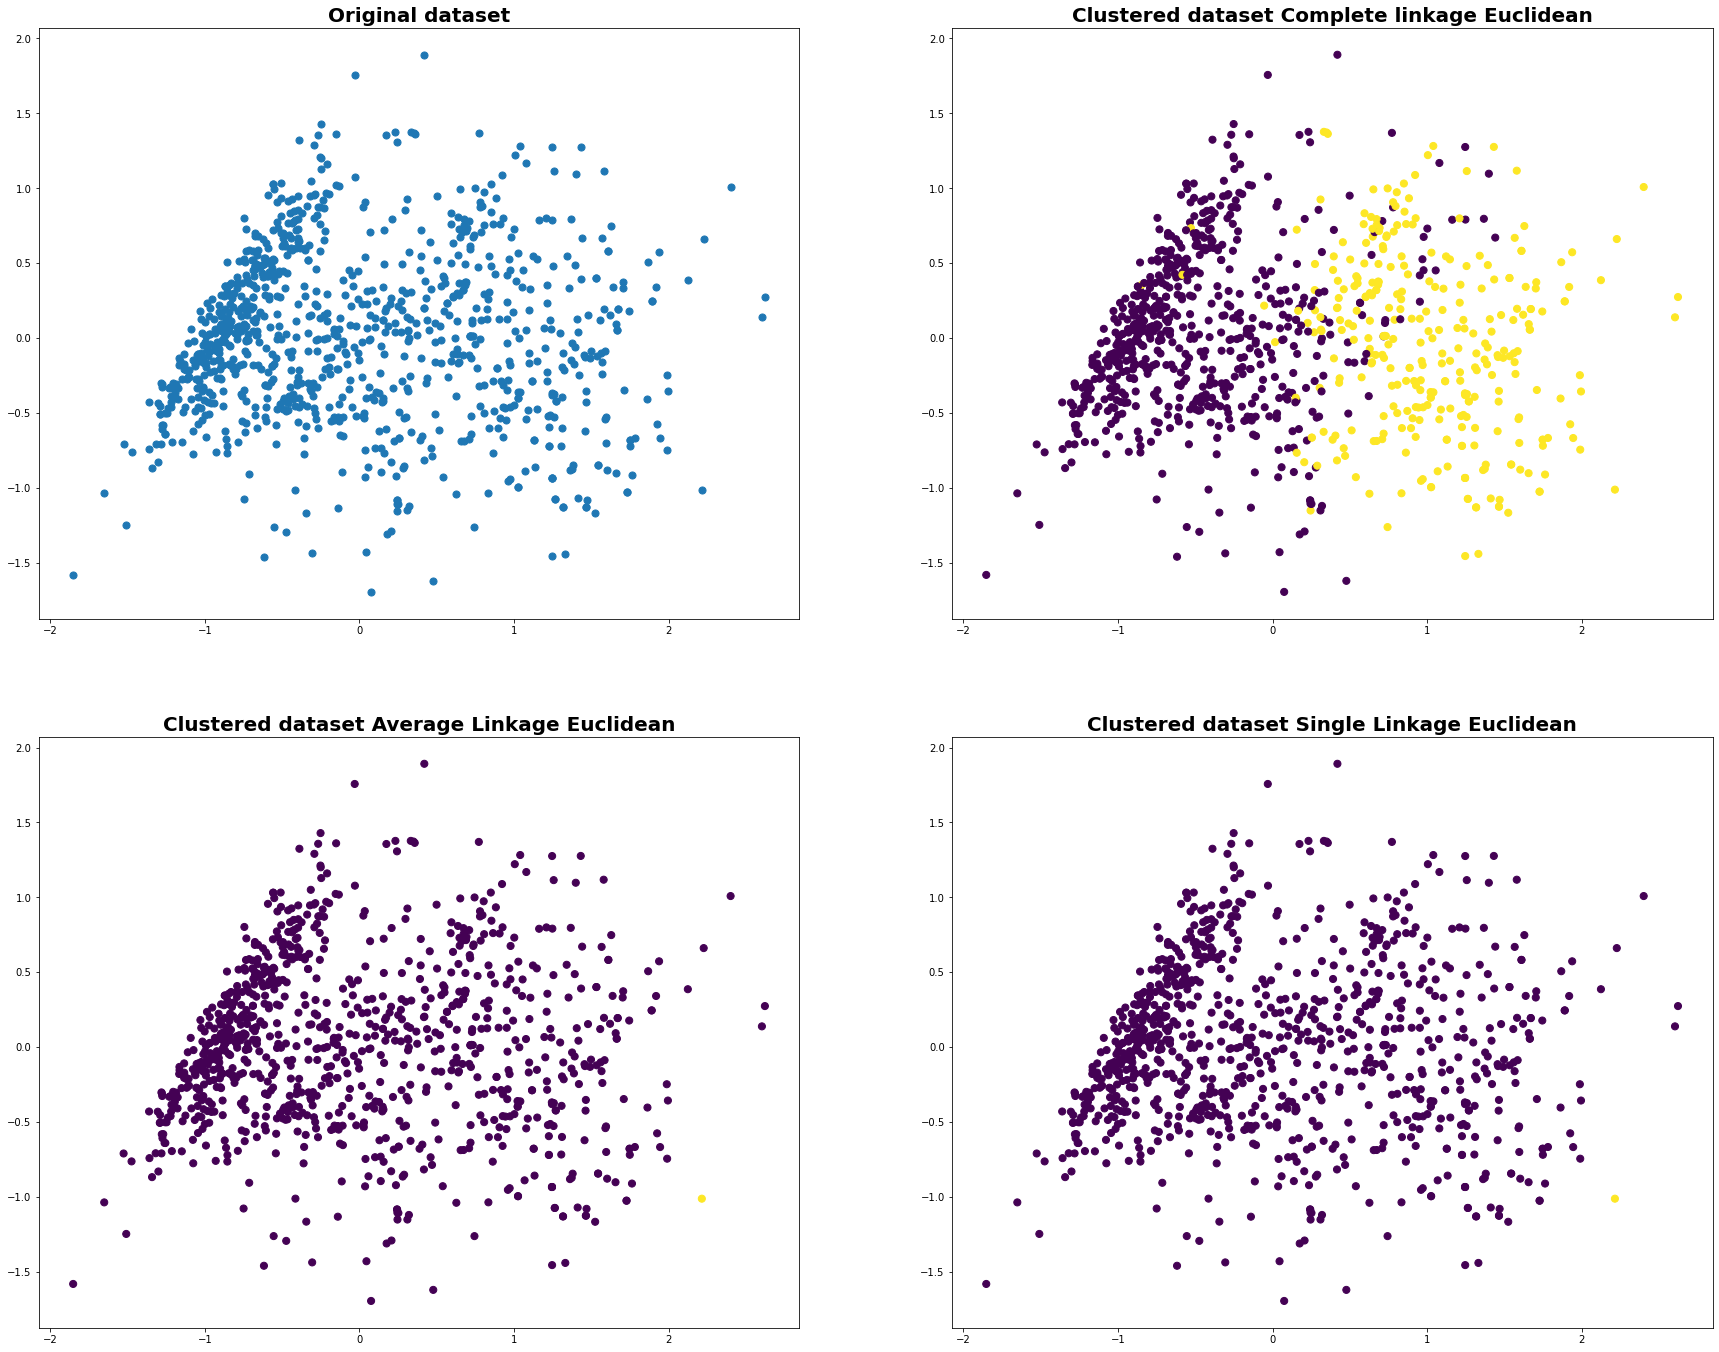

In [0]:
# Visualize travel review data in 2D using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
comps = pca.fit_transform(reviews)

new_df = pd.DataFrame(data = comps
             , columns = ['Comp1', 'Comp2'])

# A scatter plot comparison for the clusters built using Euclidean distance

plt.figure(figsize=(30,50))
plt.tight_layout(pad=4.0)
plt.subplot(421)
plt.title("Original dataset", weight='bold', size=20)
plt.scatter(new_df['Comp1'], new_df['Comp2'], s=50)

plt.subplot(422)
plt.title("Clustered dataset Complete linkage Euclidean", weight='bold', size=20)
plt.scatter(new_df['Comp1'], new_df['Comp2'], c=clustering1.labels_, s=50);

plt.subplot(423)
plt.title("Clustered dataset Average Linkage Euclidean", weight='bold', size=20)
plt.scatter(new_df['Comp1'], new_df['Comp2'], c=clustering2.labels_, s=50);


plt.subplot(424)
plt.title("Clustered dataset Single Linkage Euclidean", weight='bold', size=20)
plt.scatter(new_df['Comp1'], new_df['Comp2'], c=clustering3.labels_, s=50);


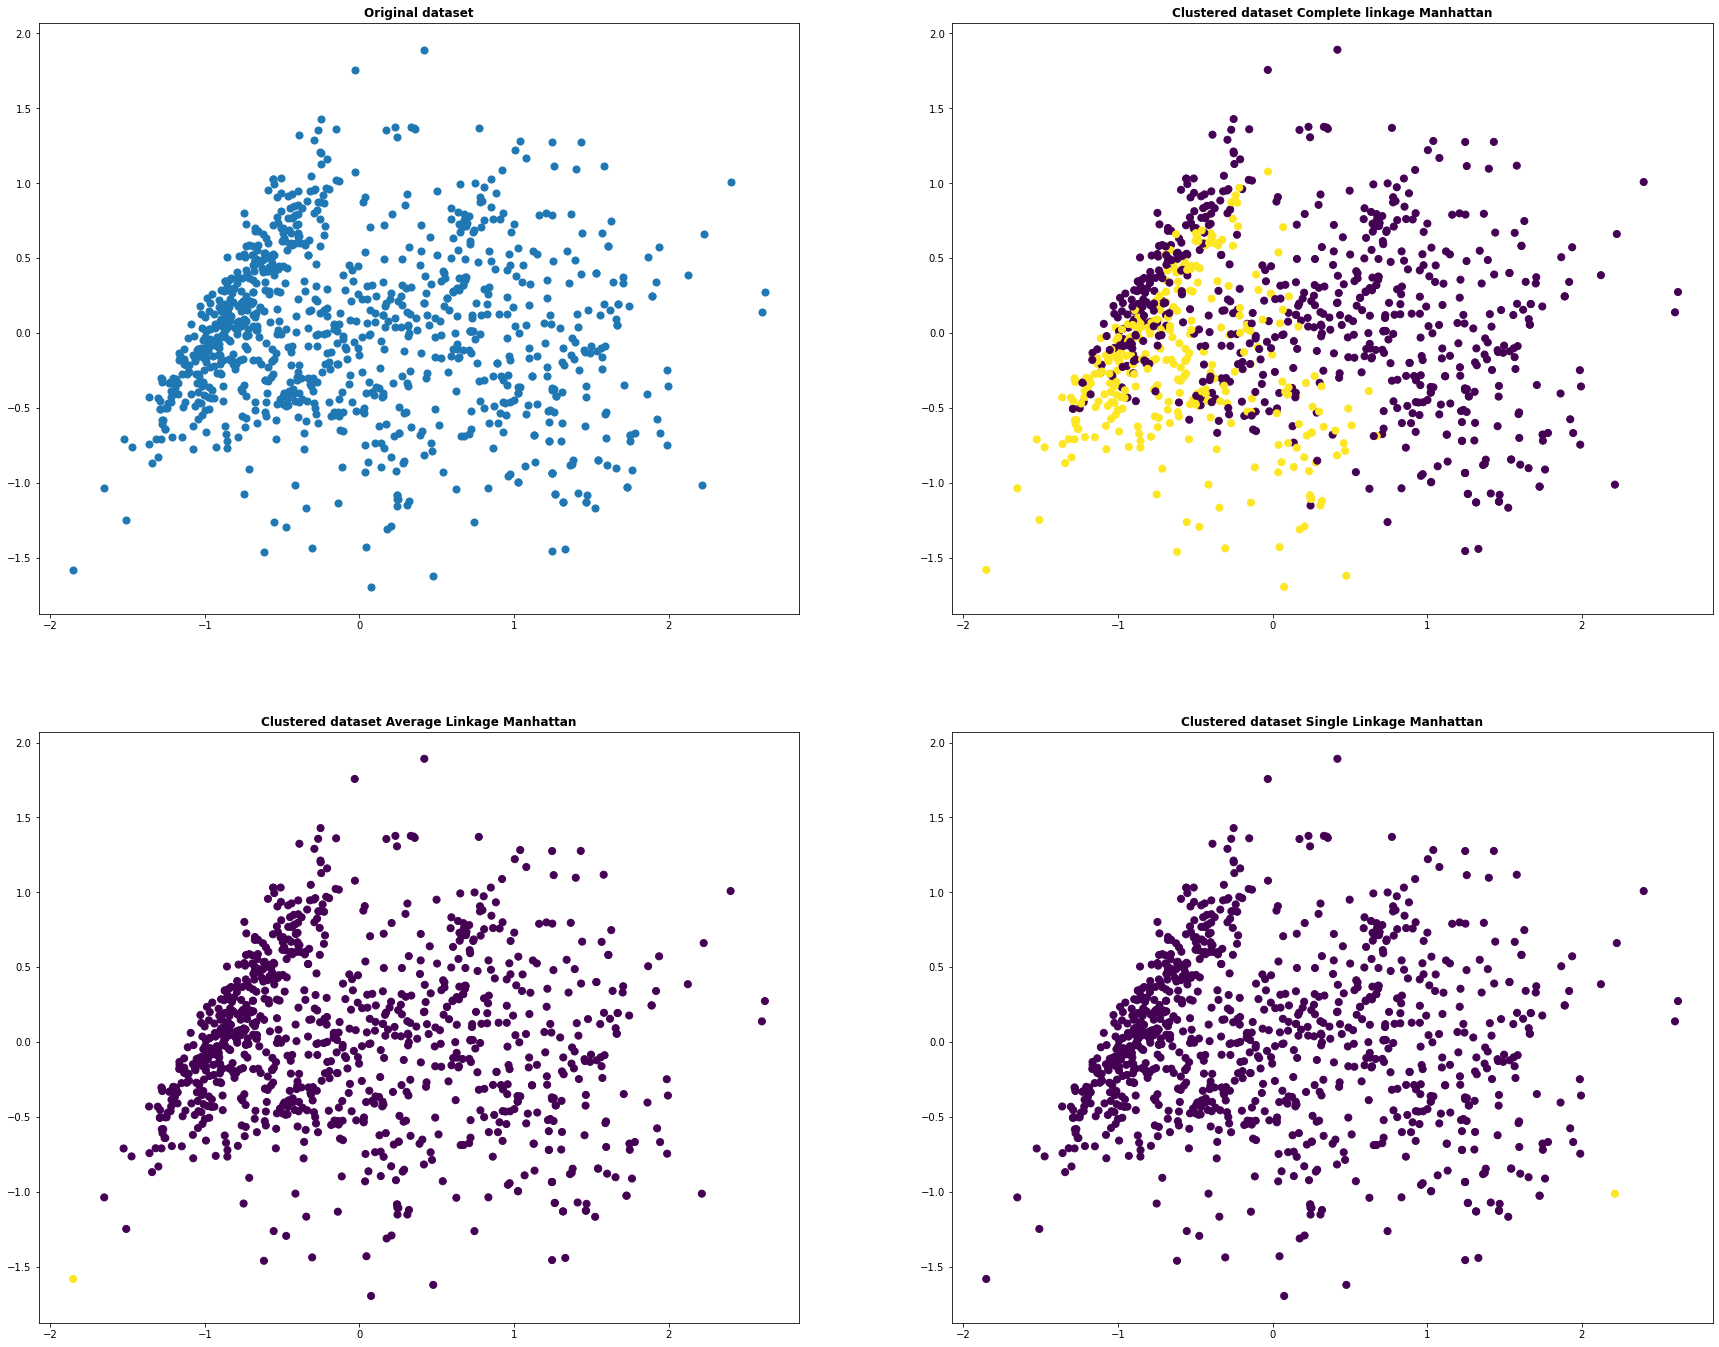

In [0]:
# Visualize Travel review data in 2D using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
comps = pca.fit_transform(reviews)

new_df = pd.DataFrame(data = comps
             , columns = ['Comp1', 'Comp2'])

# A scatter plot comparison for the clusters built using Manhattan distance
plt.figure(figsize=(30,50))
plt.tight_layout(pad=4.0)
plt.subplot(421)
plt.title("Original dataset", weight='bold')
plt.scatter(new_df['Comp1'], new_df['Comp2'], s=50)

plt.subplot(422)
plt.title("Clustered dataset Complete linkage Manhattan", weight='bold')
plt.scatter(new_df['Comp1'], new_df['Comp2'], c=clustering4.labels_, s=50);

plt.subplot(423)
plt.title("Clustered dataset Average Linkage Manhattan", weight='bold')
plt.scatter(new_df['Comp1'], new_df['Comp2'], c=clustering5.labels_, s=50);

plt.subplot(424)
plt.title("Clustered dataset Single Linkage Manhattan", weight='bold')
plt.scatter(new_df['Comp1'], new_df['Comp2'], c=clustering6.labels_, s=50);

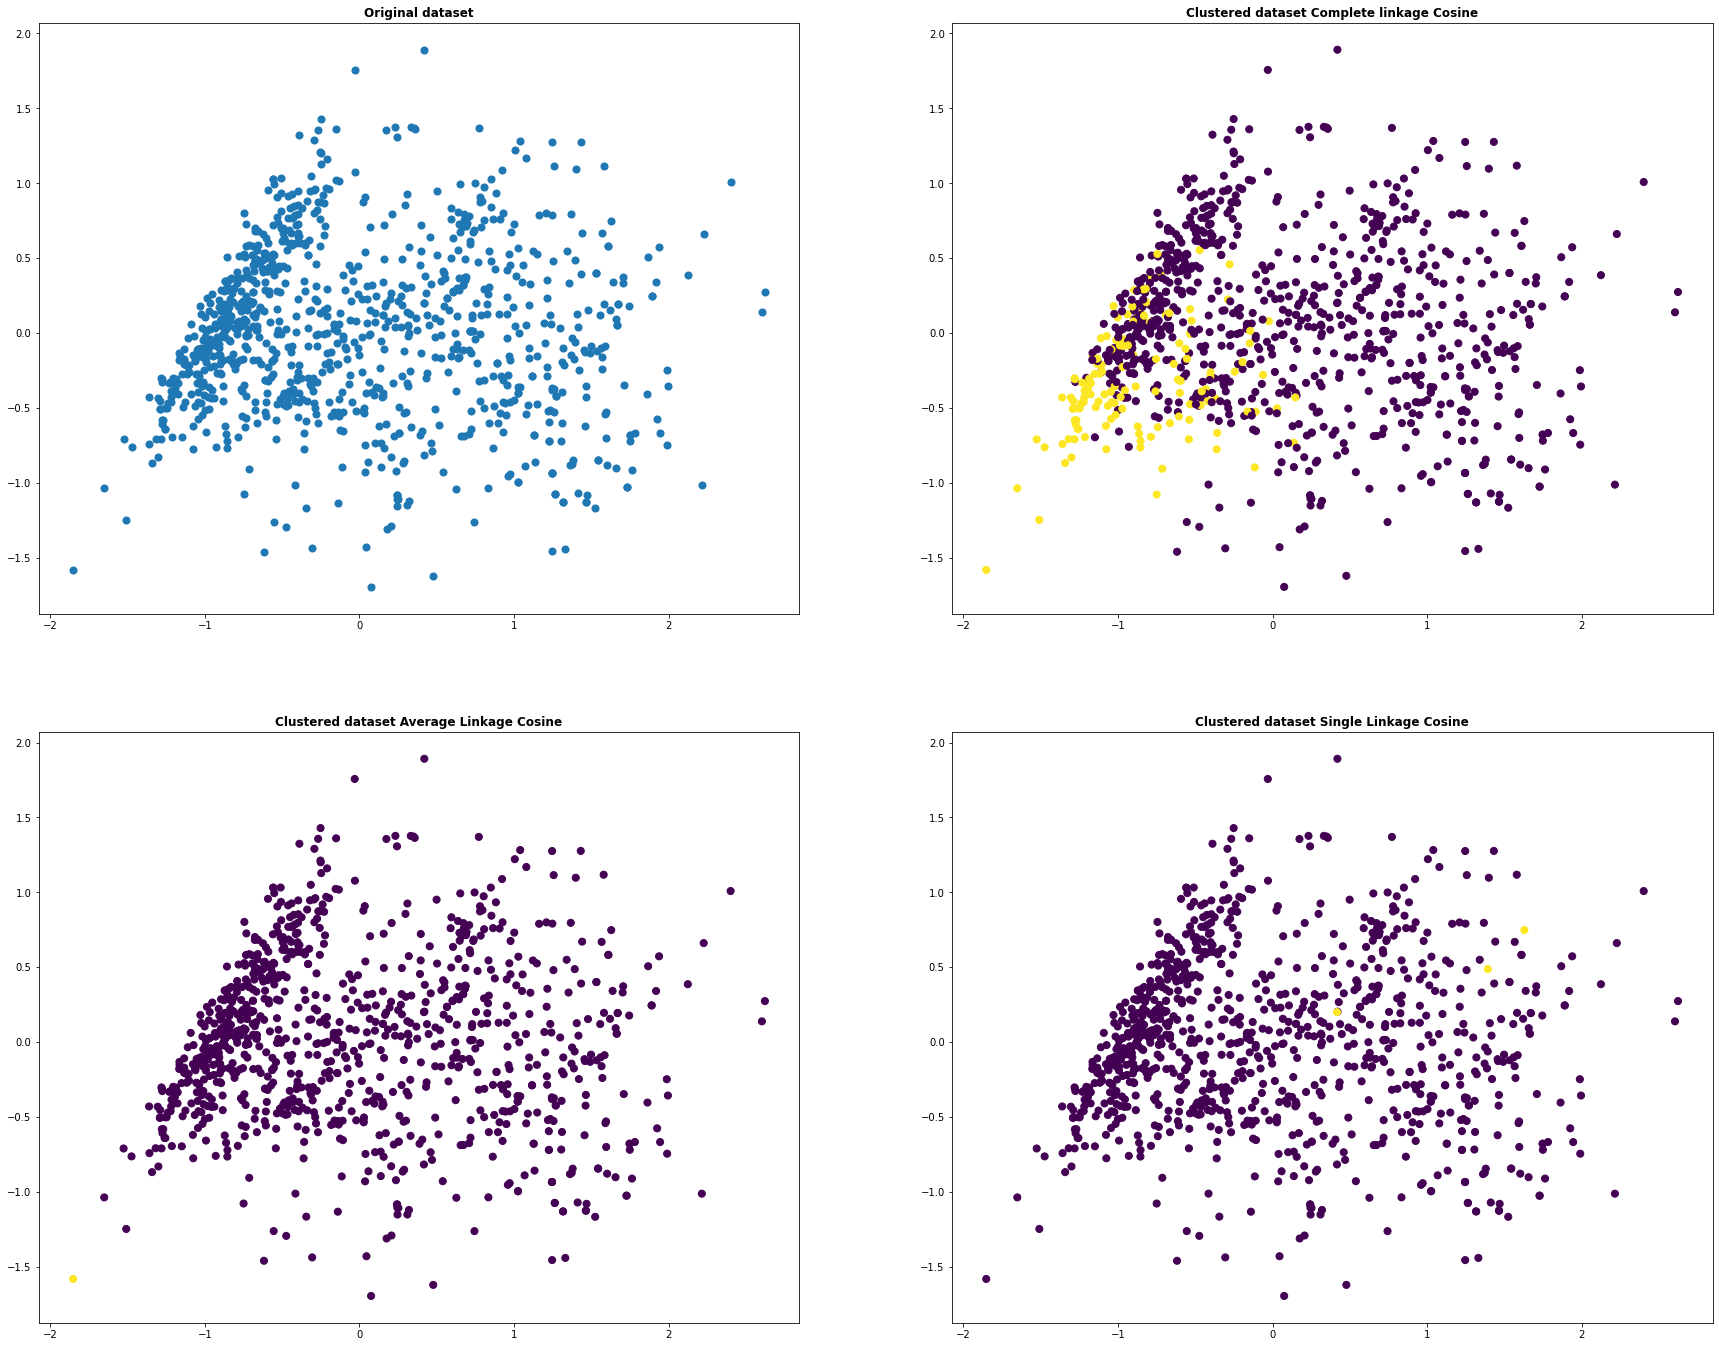

In [0]:
# Visualize Travel review data in 2D using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
comps = pca.fit_transform(reviews)

new_df = pd.DataFrame(data = comps
             , columns = ['Comp1', 'Comp2'])

# A scatter plot comparison for the clusters built using Cosine similarity
plt.figure(figsize=(30,50))
plt.tight_layout(pad=4.0)
plt.subplot(421)
plt.title("Original dataset", weight='bold')
plt.scatter(new_df['Comp1'], new_df['Comp2'], s=50)

plt.subplot(422)
plt.title("Clustered dataset Complete linkage Cosine", weight='bold')
plt.scatter(new_df['Comp1'], new_df['Comp2'], c=clustering7.labels_, s=50);

plt.subplot(423)
plt.title("Clustered dataset Average Linkage Cosine", weight='bold')
plt.scatter(new_df['Comp1'], new_df['Comp2'], c=clustering8.labels_, s=50);

plt.subplot(424)
plt.title("Clustered dataset Single Linkage Cosine", weight='bold')
plt.scatter(new_df['Comp1'], new_df['Comp2'], c=clustering9.labels_, s=50);


## 3.2 ICMLA Dataset

### Train Hierarchical clustering 

In [62]:
# Get distant matrix for Hierachical clustering
# The input of this function will be the tfidf vector representing the list of documents
cos_dist, mat_dist, ucl_dist = get_distant_matrix(tfidf_matrix)

print(cos_dist.shape)
print(mat_dist.shape)
print(ucl_dist.shape)

(105, 105)
(105, 105)
(105, 105)


### First evaluation

In [63]:
# Investigation of cophenetic scores for different linkage measures

distance = ['single', 'complete', 'average']
matrix_type = [cos_dist, mat_dist, ucl_dist]
scores = [] 

for matrix in matrix_type:
  temp = []
  for measure in distance:
    mat = linkage(matrix, measure)
    score, coph_dists = cophenet(mat, pdist(matrix))
    temp.append(round(score, 5))
  scores.append(temp)

table = pd.DataFrame(np.c_[scores], index=['Cosine', 'Manhattan', 'Euclidean'],
                     columns=['Single', 'Complete', 'Average'])

table

# N.B code adapted from a tutorial found here: https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

Single  Complete  Average
Cosine     0.31349   0.49139  0.61666
Manhattan  0.32484   0.52410  0.57828
Euclidean  0.27180   0.53496  0.63463

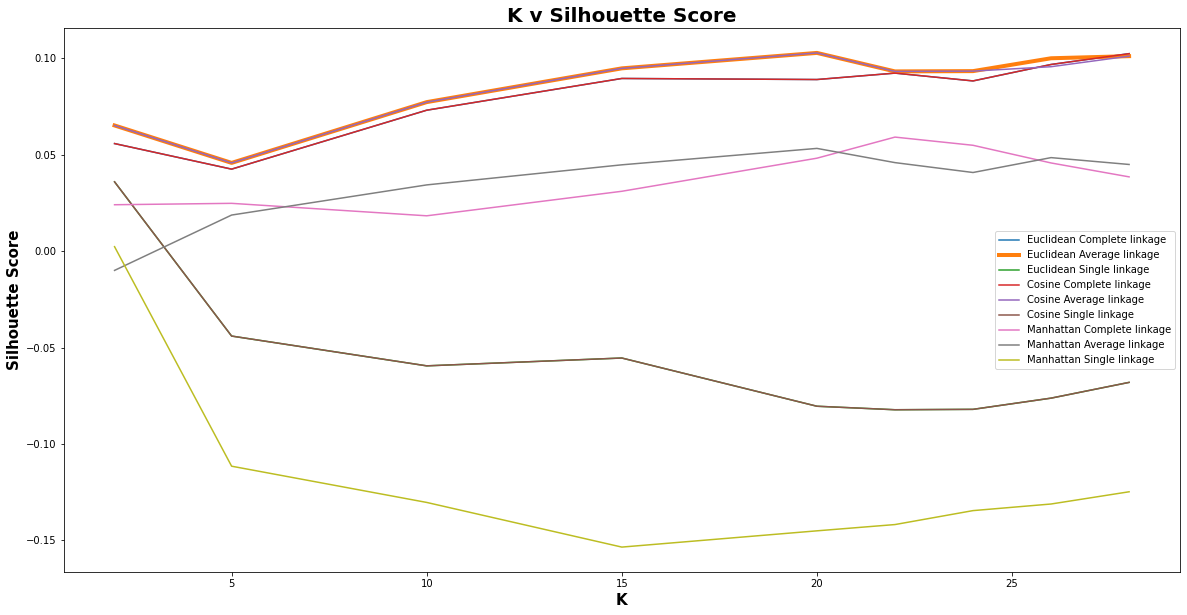

In [64]:
# Selection of cluster size using silhouette scores 
k = [2, 5, 10, 15, 20, 22, 24, 26, 28]

# Arrays to store the various evaluation metrics 
# Internal measures 

silhouette_scores_euclidean_comp = []
silhouette_scores_euclidean_avg = []
silhouette_scores_euclidean_sgl = []

silhouette_scores_manhattan_comp = []
silhouette_scores_manhattan_avg = []
silhouette_scores_manhattan_sgl = []

silhouette_scores_cosine_comp = []
silhouette_scores_cosine_avg = []
silhouette_scores_cosine_sgl = []

rand_hier_euclidean = []
rand_hier_cosine = []
rand_hier_manhattan = []

# Training three different versions of aglomerative clustering for different values of k
for i in k:

    model_euclidean_comp = AgglomerativeClustering(affinity='euclidean', n_clusters=i, linkage='complete').fit(reform_tfidf_matrix)
    model_euclidean_avg = AgglomerativeClustering(affinity='euclidean', n_clusters=i, linkage='average').fit(reform_tfidf_matrix)
    model_euclidean_sgl = AgglomerativeClustering(affinity='euclidean', n_clusters=i, linkage='single').fit(reform_tfidf_matrix)
    model_manhattan_comp = AgglomerativeClustering(affinity='manhattan', n_clusters=i, linkage='complete').fit(reform_tfidf_matrix)
    model_manhattan_avg = AgglomerativeClustering(affinity='manhattan', n_clusters=i, linkage='average').fit(reform_tfidf_matrix)
    model_manhattan_sgl = AgglomerativeClustering(affinity='manhattan', n_clusters=i, linkage='single').fit(reform_tfidf_matrix)
    model_cosine_comp = AgglomerativeClustering(affinity='cosine', n_clusters=i, linkage='complete').fit(reform_tfidf_matrix)
    model_cosine_avg = AgglomerativeClustering(affinity='cosine', n_clusters=i, linkage='average').fit(reform_tfidf_matrix)
    model_cosine_sgl = AgglomerativeClustering(affinity='cosine', n_clusters=i, linkage='single').fit(reform_tfidf_matrix)

    score_euclidean_comp = silhouette_score(reform_tfidf_matrix, model_euclidean_comp.labels_)
    score_euclidean_avg = silhouette_score(reform_tfidf_matrix, model_euclidean_avg.labels_)
    score_euclidean_sgl = silhouette_score(reform_tfidf_matrix, model_euclidean_sgl.labels_)
    score_manhattan_comp = silhouette_score(reform_tfidf_matrix, model_manhattan_comp.labels_)
    score_manhattan_avg = silhouette_score(reform_tfidf_matrix, model_manhattan_avg.labels_)
    score_manhattan_sgl = silhouette_score(reform_tfidf_matrix, model_manhattan_sgl.labels_)
    score_cosine_comp = silhouette_score(reform_tfidf_matrix, model_cosine_comp.labels_)
    score_cosine_avg = silhouette_score(reform_tfidf_matrix, model_cosine_avg.labels_)
    score_cosine_sgl = silhouette_score(reform_tfidf_matrix, model_cosine_sgl.labels_)

    silhouette_scores_euclidean_comp.append(score_euclidean_comp)
    silhouette_scores_euclidean_avg.append(score_euclidean_avg)
    silhouette_scores_euclidean_sgl.append(score_euclidean_sgl)

    silhouette_scores_manhattan_comp.append(score_manhattan_comp)
    silhouette_scores_manhattan_avg.append(score_manhattan_avg)
    silhouette_scores_manhattan_sgl.append(score_manhattan_sgl)

    silhouette_scores_cosine_comp.append(score_cosine_comp)
    silhouette_scores_cosine_avg.append(score_cosine_avg)
    silhouette_scores_cosine_sgl.append(score_cosine_sgl)

    rand = metrics.adjusted_rand_score(model_euclidean_avg.labels_, papers['session_encoded'])
    rand_hier_euclidean.append(rand)
    
    rand = metrics.adjusted_rand_score(model_cosine_avg.labels_, papers['session_encoded'])
    rand_hier_cosine.append(rand)

    rand = metrics.adjusted_rand_score(model_manhattan_avg.labels_, papers['session_encoded'])
    rand_hier_manhattan.append(rand)

# Plotting silhouette scores 
plt.figure(figsize=(20,10))
plt.plot(k, silhouette_scores_euclidean_comp, label= 'Euclidean Complete linkage')
plt.plot(k, silhouette_scores_euclidean_avg, label= 'Euclidean Average linkage',linewidth=4)
plt.plot(k, silhouette_scores_euclidean_sgl, label= 'Euclidean Single linkage')

plt.plot(k, silhouette_scores_cosine_comp, label = 'Cosine Complete linkage')
plt.plot(k, silhouette_scores_cosine_avg, label = 'Cosine Average linkage')
plt.plot(k, silhouette_scores_cosine_sgl, label = 'Cosine Single linkage')

plt.plot(k, silhouette_scores_manhattan_comp, label= 'Manhattan Complete linkage')
plt.plot(k, silhouette_scores_manhattan_avg, label= 'Manhattan Average linkage')
plt.plot(k, silhouette_scores_manhattan_sgl, label= 'Manhattan Single linkage')


plt.xlabel('K', weight='bold', size=15)
plt.ylabel('Silhouette Score', weight='bold', size=15)
plt.title('K v Silhouette Score', size = 20, weight='bold')
plt.legend()
plt.show();

In [65]:
# table of rand index values for different values of k
index = ['eculidean', 'cosine', 'manhattan']
k = [2, 5, 10, 15, 20, 22, 24, 26, 28]
rand_all = [rand_hier_euclidean, rand_hier_cosine, rand_hier_manhattan]
rand_df = pd.DataFrame(rand_all, columns=k, index=index)

rand_df.round(3)

2      5      10     15     20     22     24     26     28
eculidean  0.0  0.012  0.026  0.031  0.034  0.037  0.034  0.043  0.043
cosine     0.0  0.012  0.026  0.031  0.034  0.037  0.034  0.035  0.043
manhattan  0.0  0.025  0.028  0.050  0.041  0.028  0.023  0.020  0.015

0.06525115164417679


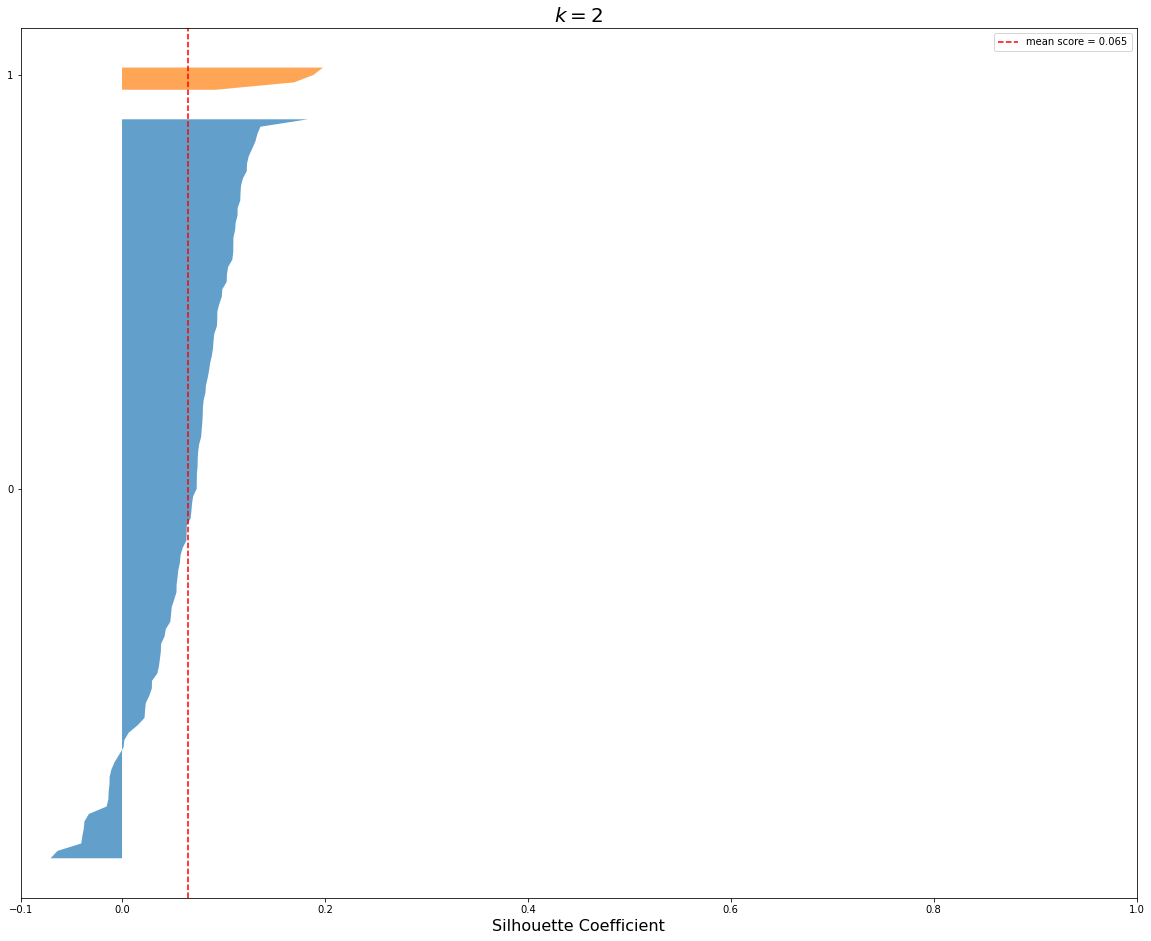

0.0458324467099453


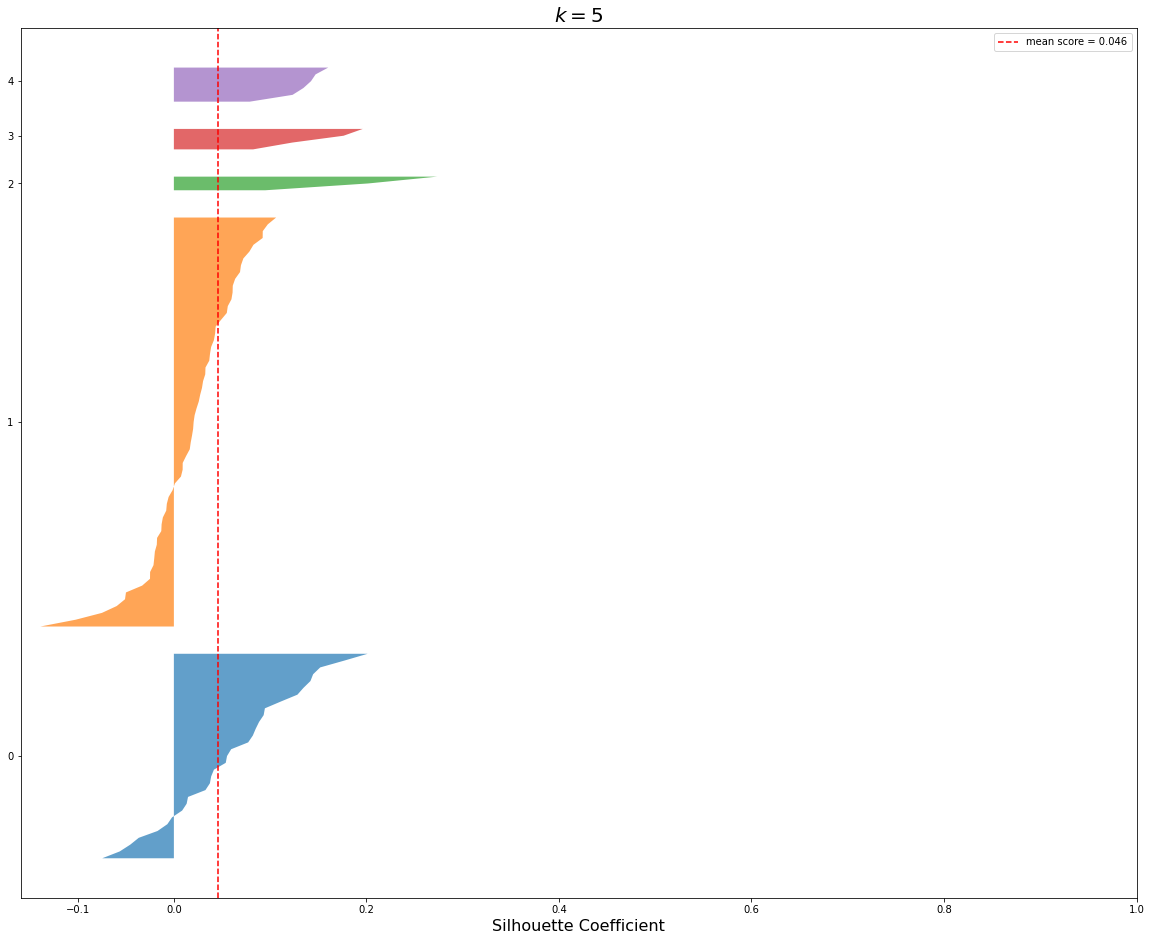

0.07734989806101199


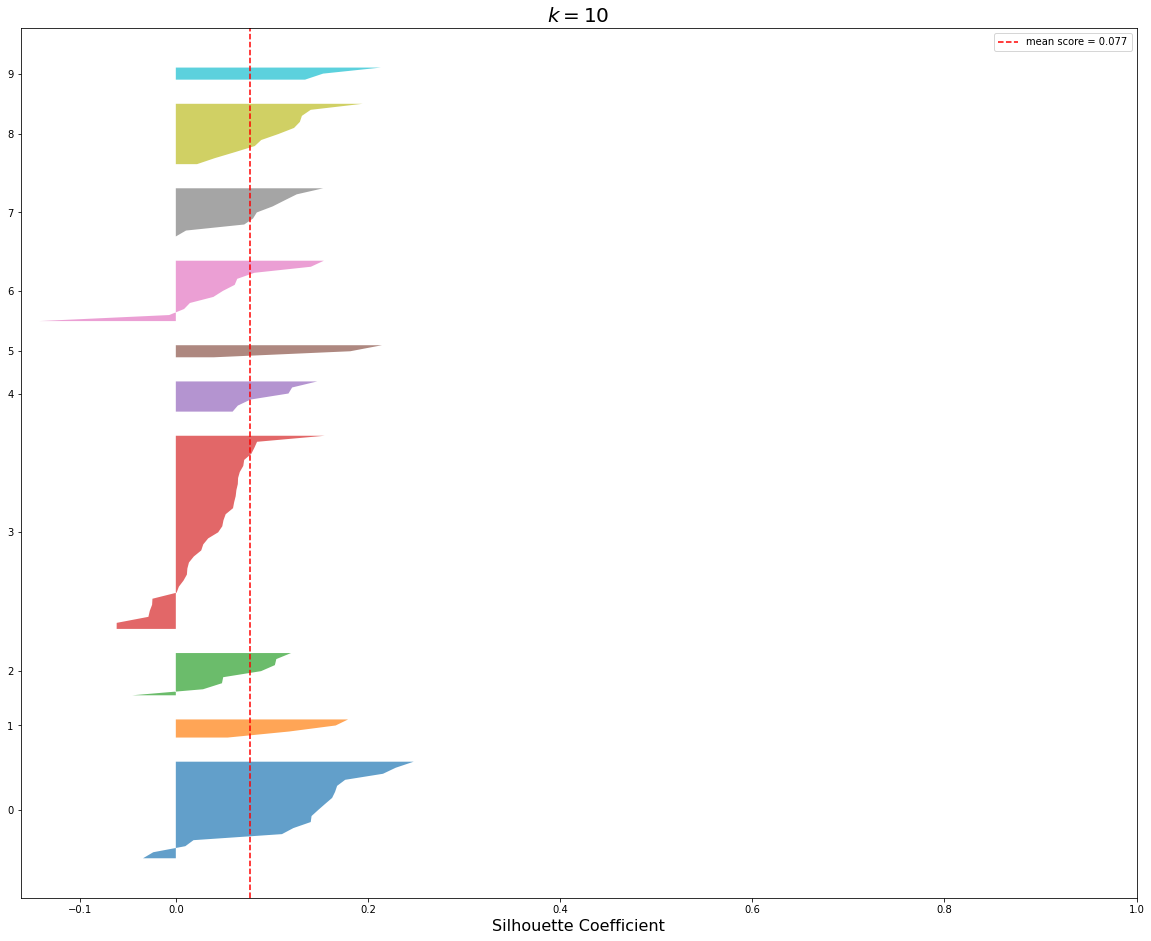

0.10287316301663059


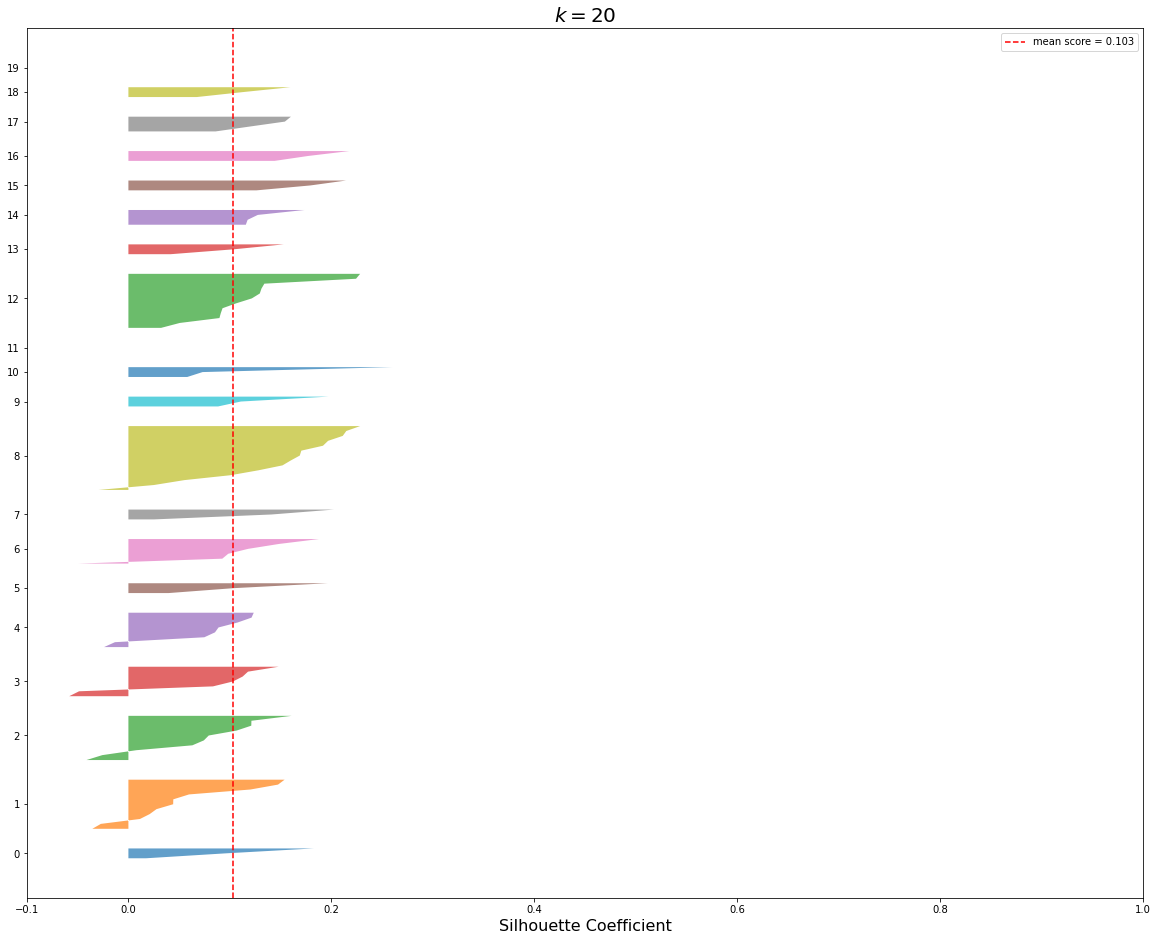

In [0]:
# Graph for cosine clusters silhouette scores 
for k in (2, 5, 10, 20):
    plt.figure(figsize=(20,16))
    
    model_cosine = AgglomerativeClustering(affinity='cosine', n_clusters=k, linkage='average').fit(reform_tfidf_matrix)
    
    labels_cosine = model_cosine.labels_
    
    y_pred = np.asarray(labels_cosine)
    
    silhouette_scores = silhouette_score(reform_tfidf_matrix, y_pred)
    silhouette_coefficients = silhouette_samples(reform_tfidf_matrix, labels_cosine)
    padding = len(reform_tfidf_matrix) // 30
    pos = padding
    ticks = []
    
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 30):
        plt.ylabel("Cluster", fontsize=16)
    
    if k in (2, 5, 10, 20):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient", fontsize=16)
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores, color="red", linestyle="--", label = "mean score = {}".format(round(silhouette_scores, 3)))
    print(silhouette_scores)
    plt.title("$k={}$".format(k), fontsize=20)
    plt.legend()
    plt.show()

# N.B. find clusters algorithm adapted from COMP5318 Lab 10

-0.00992624961835625


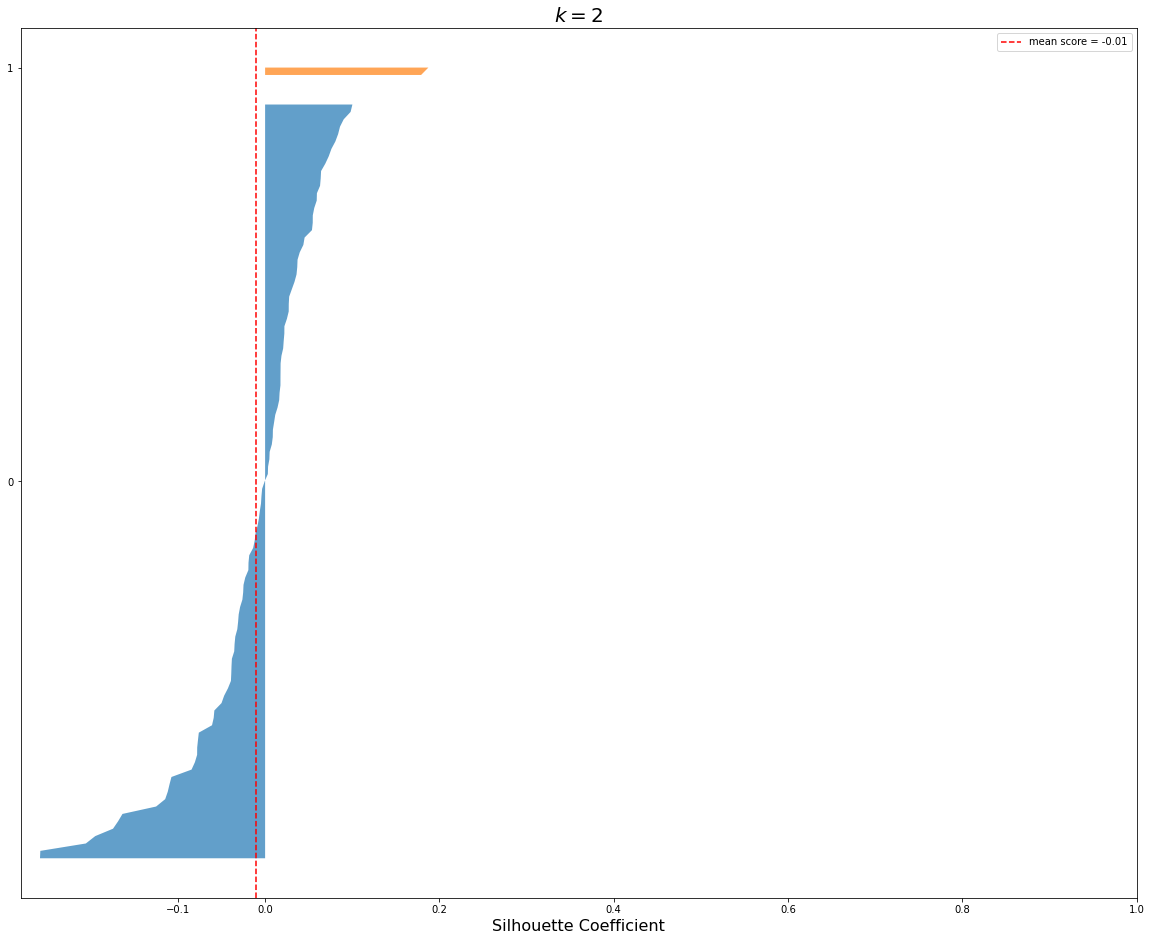

0.01877952494187504


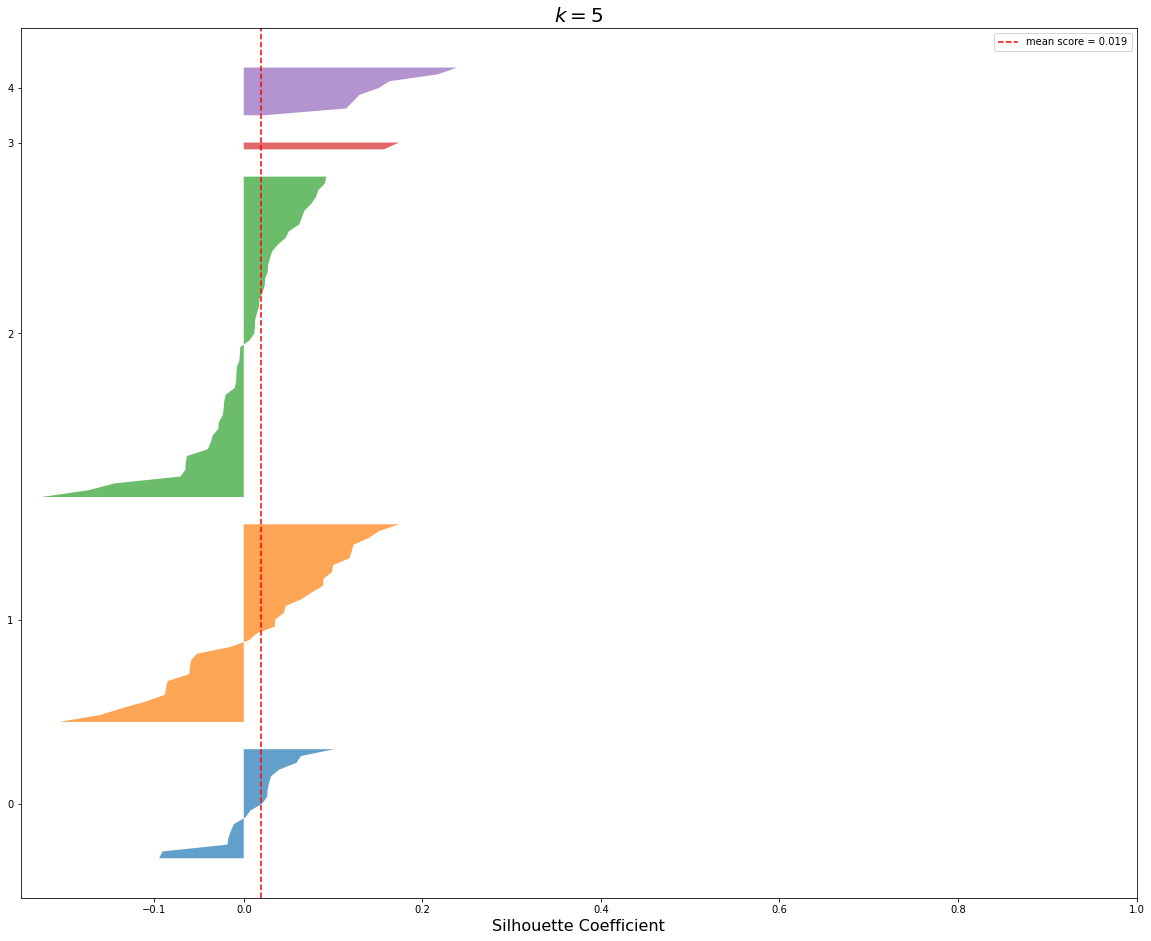

0.03441270299559426


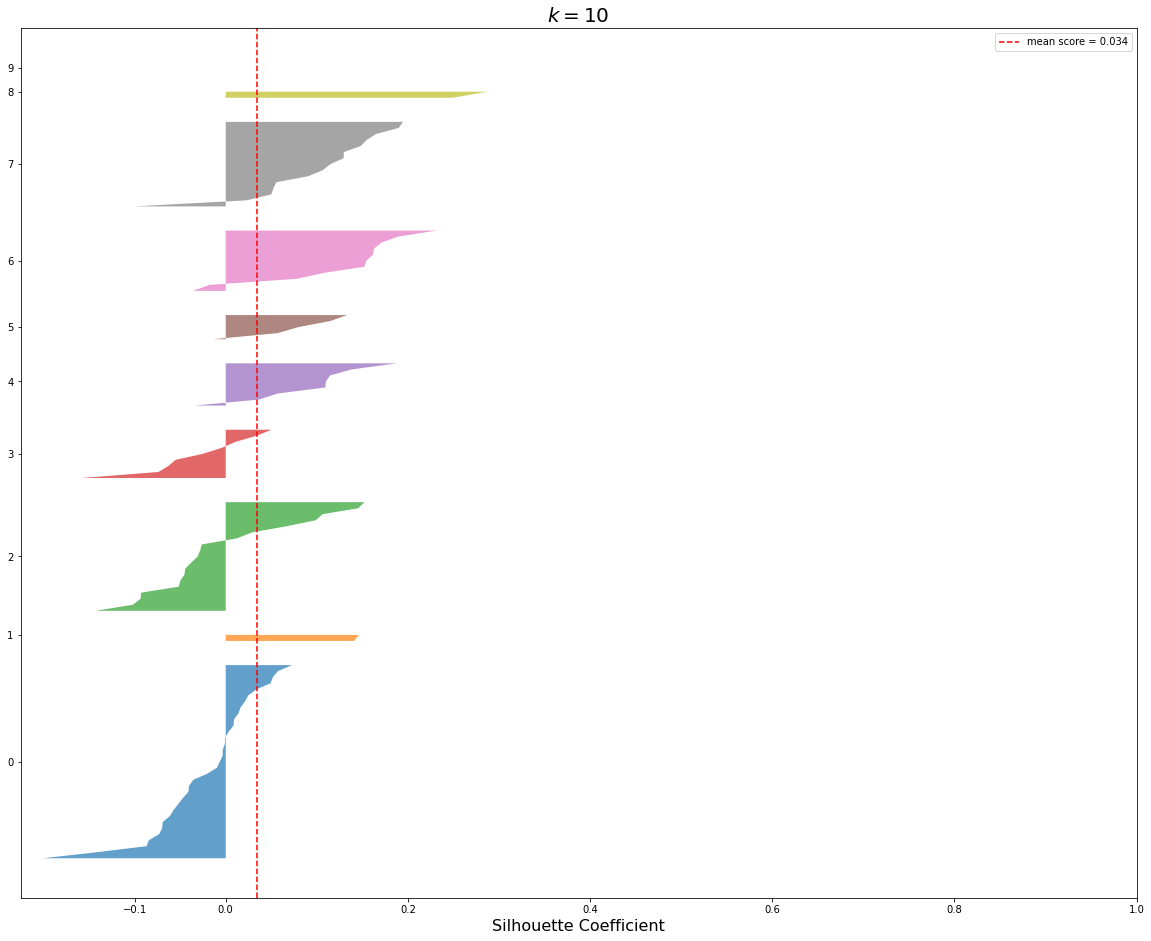

0.05334706587092653


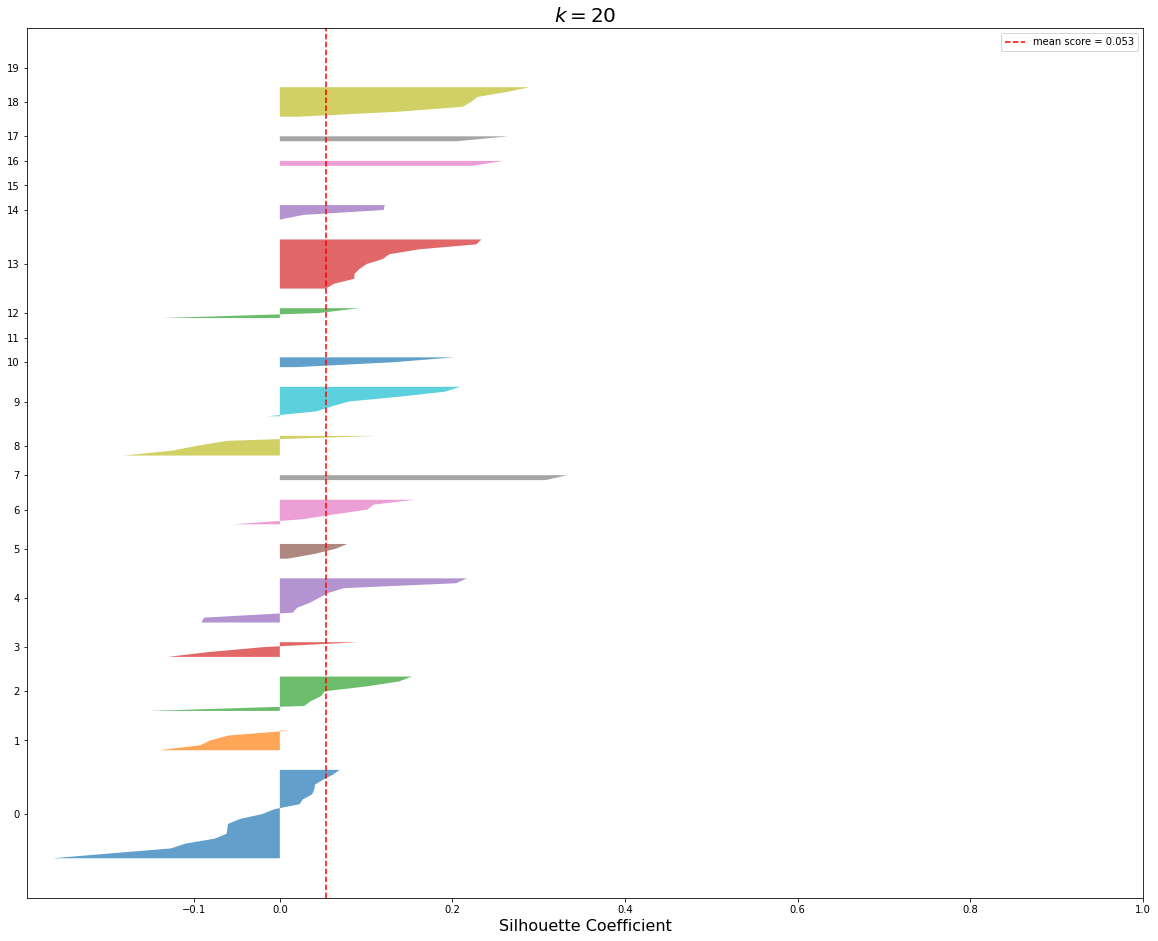

In [67]:
# Graph for manhattan silhouette scores 
for k in (2, 5, 10, 20):
    plt.figure(figsize=(20,16))
    
    model_manhattan = AgglomerativeClustering(affinity='manhattan', n_clusters=k, linkage='average').fit(reform_tfidf_matrix)
    
    labels_manhattan = model_manhattan.labels_
    
    y_pred = np.asarray(labels_manhattan)
    
    silhouette_scores = silhouette_score(reform_tfidf_matrix, y_pred)
    silhouette_coefficients = silhouette_samples(reform_tfidf_matrix, labels_manhattan)
    padding = len(reform_tfidf_matrix) // 30
    pos = padding
    ticks = []
    
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 30):
        plt.ylabel("Cluster", fontsize=16)
    
    if k in (2, 5, 10, 20):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient", fontsize=16)
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores, color="red", linestyle="--", label = "mean score = {}".format(round(silhouette_scores, 3)))
    print(silhouette_scores)
    plt.title("$k={}$".format(k), fontsize=20)
    plt.legend()
    plt.show()

# N.B. find clusters algorithm adapted from COMP5318 Lab 10

0.06525115164417679


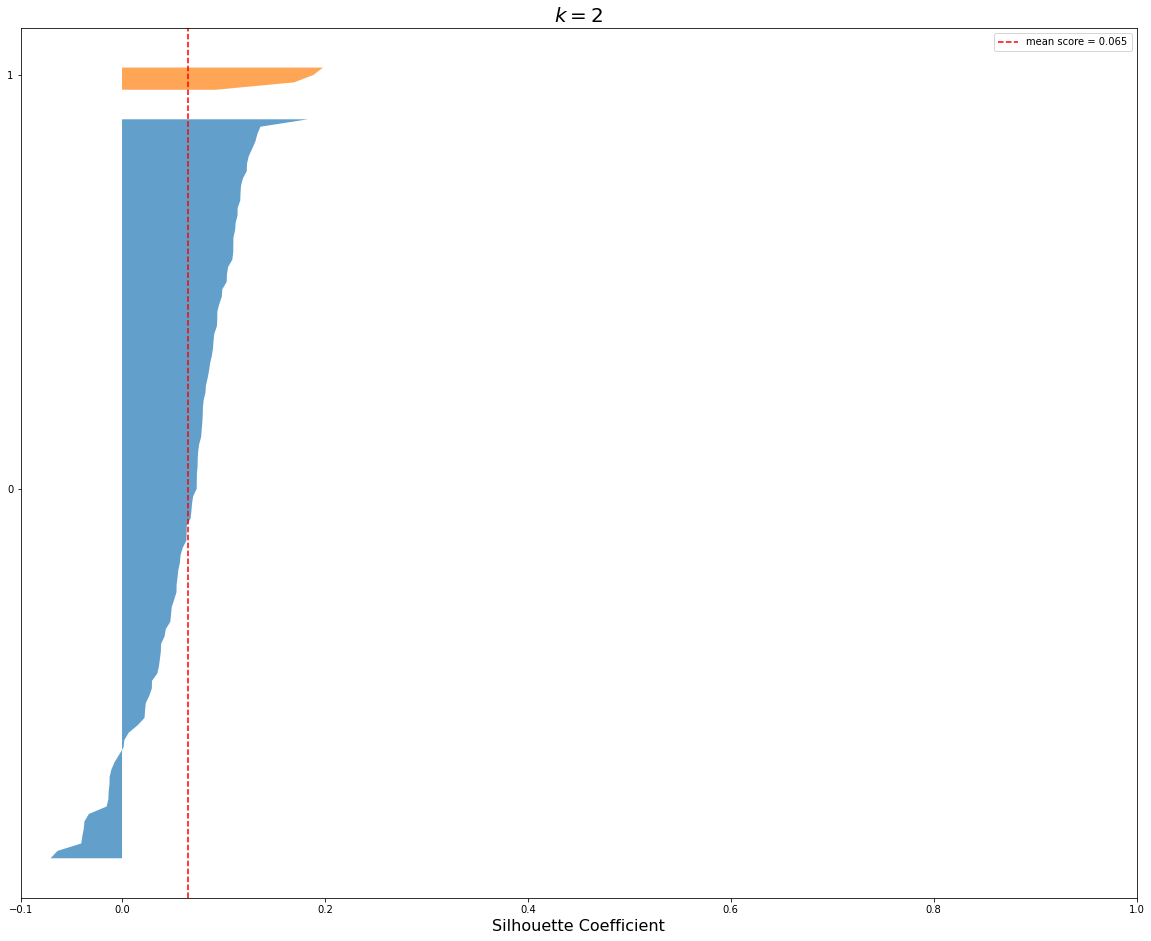

0.0458324467099453


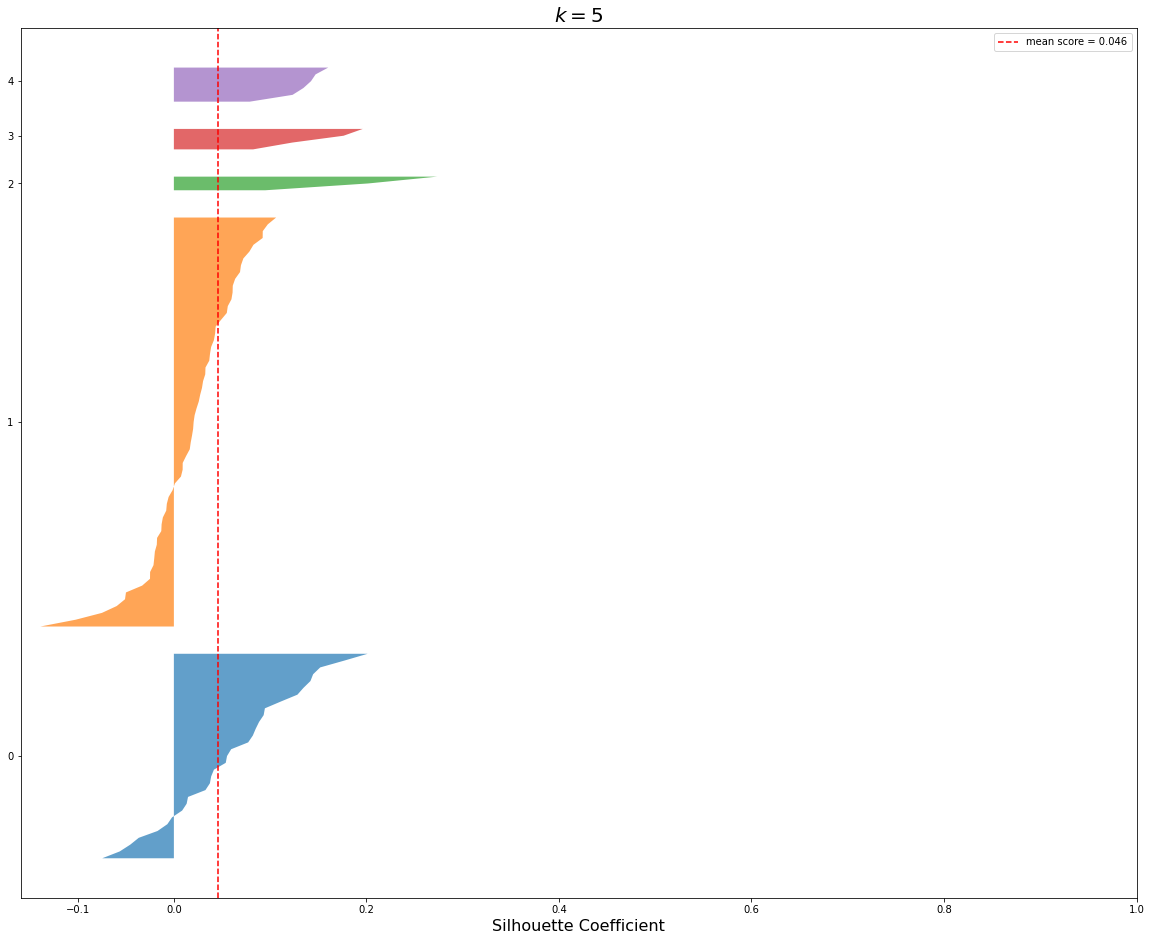

0.07734989806101199


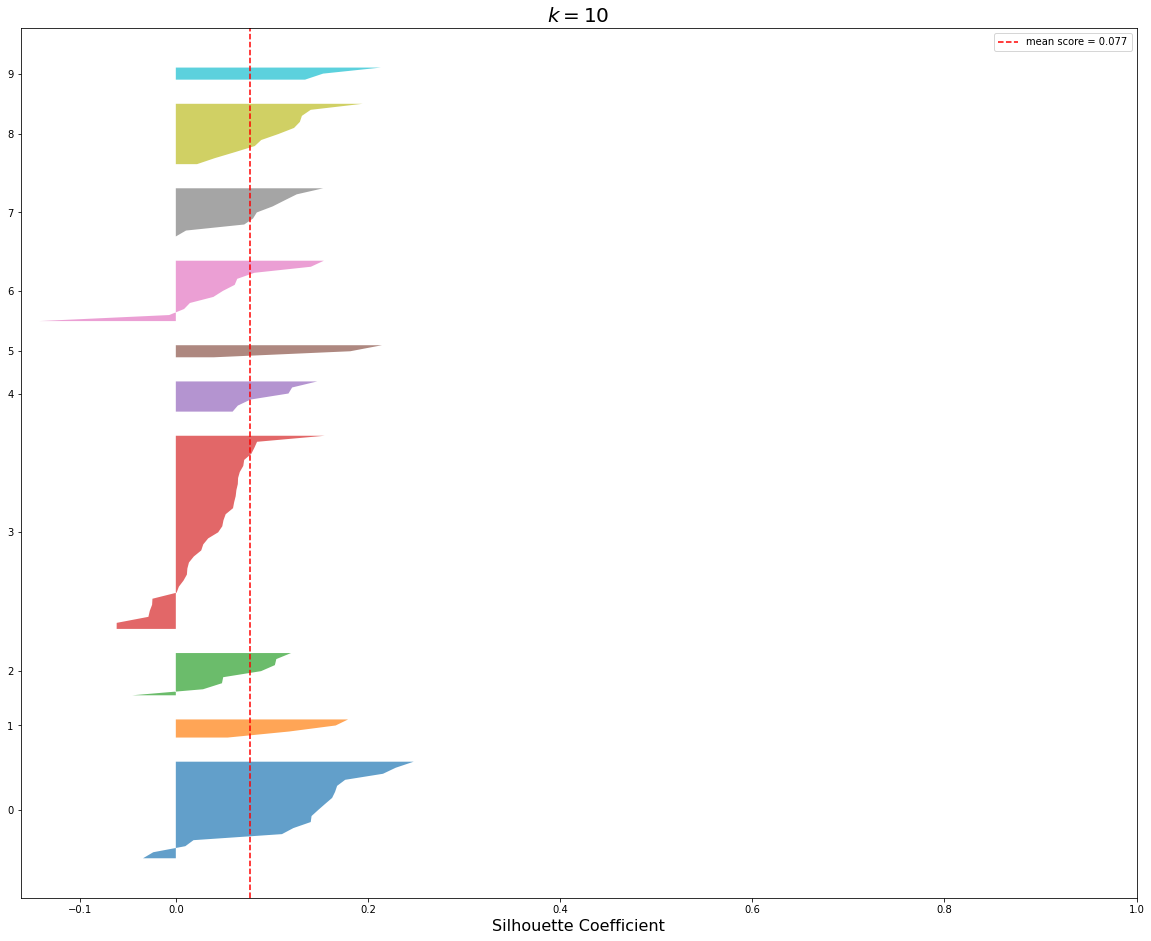

0.10287316301663059


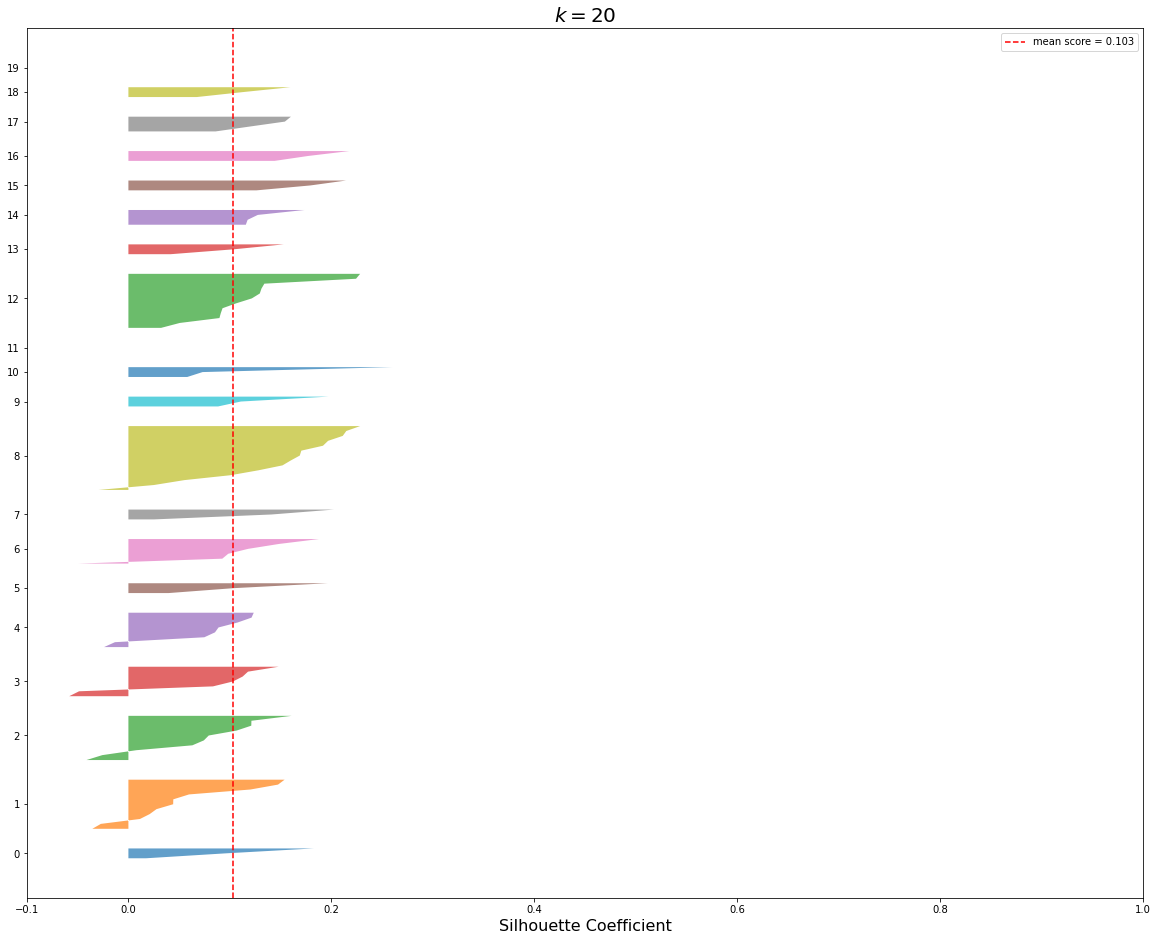

0.09327964502204042


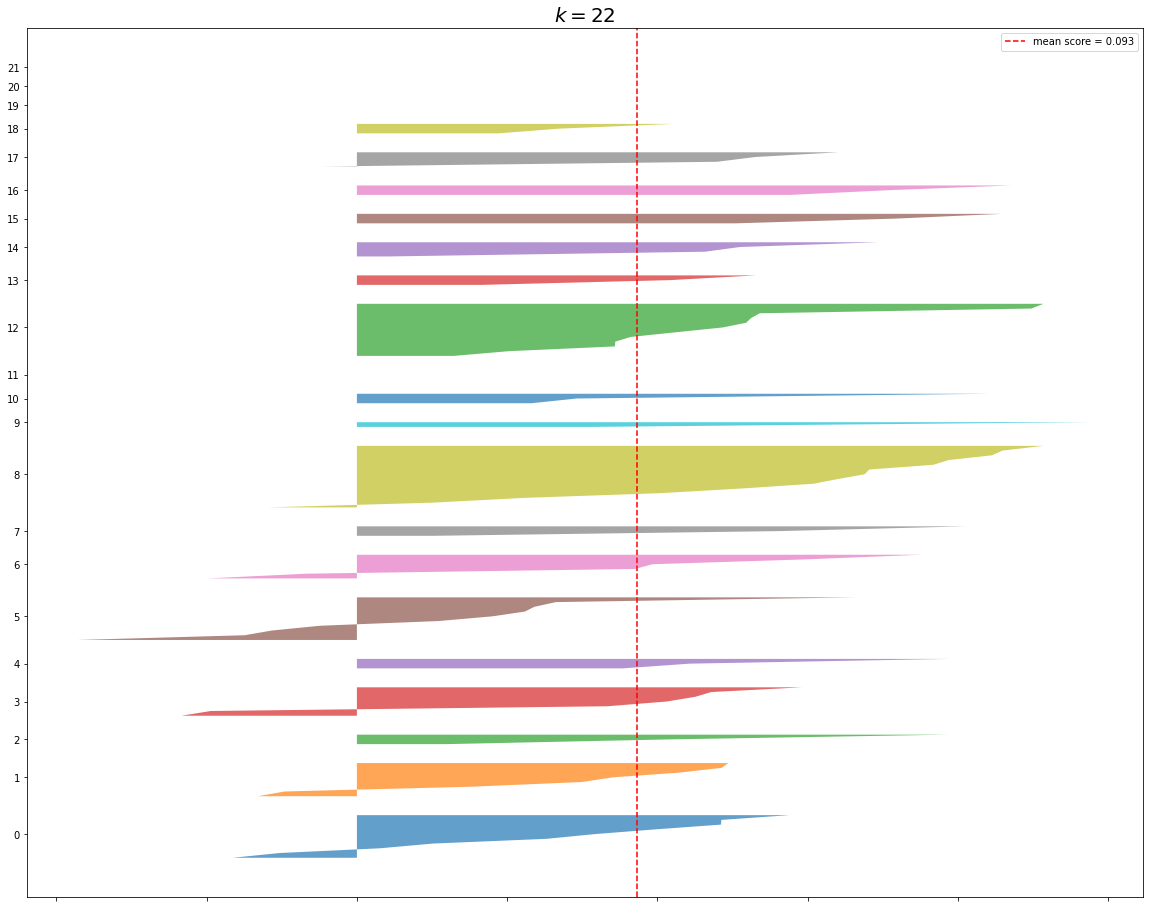

In [68]:
# Graph for euclidean silhouette scores 
for k in (2, 5, 10, 20, 22):
    plt.figure(figsize=(20,16))
    
    model_euclidean = AgglomerativeClustering(affinity='euclidean', n_clusters=k, linkage='average').fit(reform_tfidf_matrix)
    
    labels_euclidean = model_euclidean.labels_
    
    y_pred = np.asarray(labels_euclidean)
     
    silhouette_scores = silhouette_score(reform_tfidf_matrix, y_pred)
    silhouette_coefficients = silhouette_samples(reform_tfidf_matrix, labels_euclidean)
    padding = len(reform_tfidf_matrix) // 30
    pos = padding
    ticks = []
    
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 30):
        plt.ylabel("Cluster", fontsize=16)
    
    if k in (2, 5, 10, 20):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient", fontsize=16)
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores, color="red", linestyle="--", label = "mean score = {}".format(round(silhouette_scores, 3)))
    print(silhouette_scores)
    plt.title("$k={}$".format(k), fontsize=20)
    plt.legend()
    plt.show()
    
# N.B. find clusters algorithm adapted from COMP5318 Lab 10

In [0]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

#clustering using eucliedean dist, complete linkage
clustering1 = AgglomerativeClustering(affinity='euclidean', n_clusters=20, linkage='complete').fit(reform_tfidf_matrix)
print(clustering1)

print(len(clustering1.labels_))
print(clustering1.labels_[:5])

#clustering using eucliedean dist, average linkage
clustering2 = AgglomerativeClustering(affinity='euclidean', n_clusters=20, linkage='average').fit(reform_tfidf_matrix)
print(clustering2)

print(len(clustering2.labels_))
print(clustering2.labels_[:5])

#clustering using eucliedean dist, single linkage
clustering3 = AgglomerativeClustering(affinity='euclidean', n_clusters=20, linkage='single').fit(reform_tfidf_matrix)
print(clustering3)


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=20)
105
[ 5 11  6  3 11]
AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=20)
105
[12  2 18  3  2]
AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=20)


### Second evaluation 

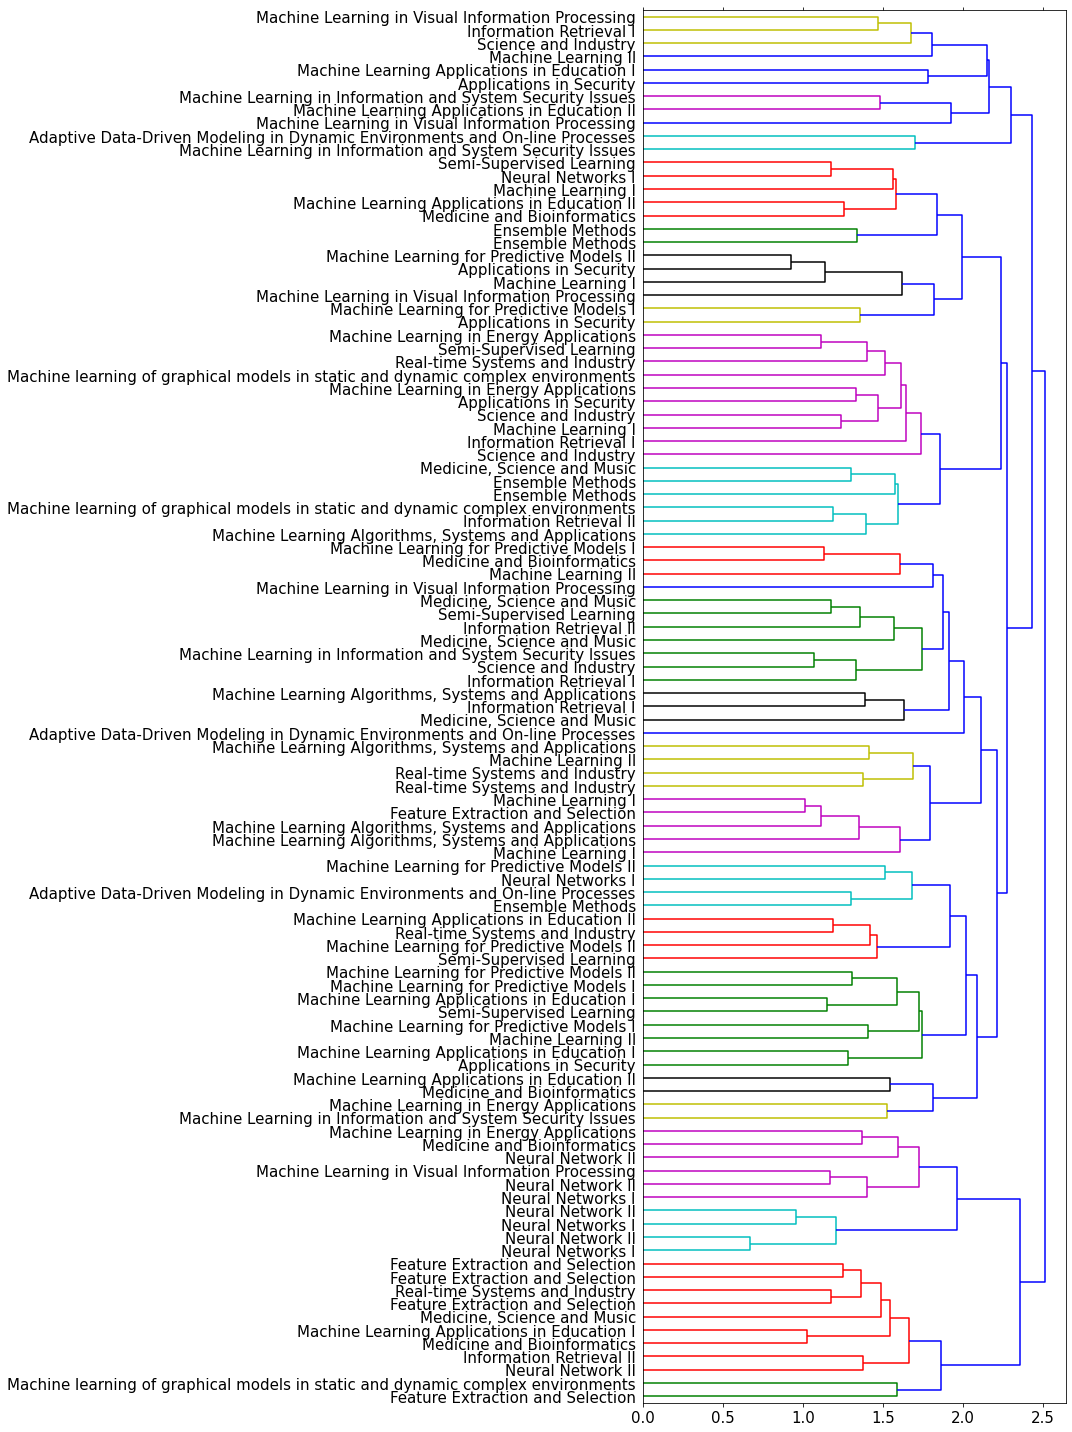

In [0]:
# HCA using Cosine dist + average linkage
linkage_matrix = average(cos_dist) #define the linkage_matrix using ward clustering pre-computed distances
linkage_matrix.shape

# single, complete, average
fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels= list(papers['session']));

plt.tick_params(\
    axis= 'x',         # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off',
    labelsize=15
    )
plt.tick_params(\
    axis= 'y',          # changes apply to the y-axis
    labelsize=15
    )

plt.tight_layout() #show plot with tight layout

#save figure as ward_clusters
plt.savefig('ward_clusters.png', dpi=200) ;

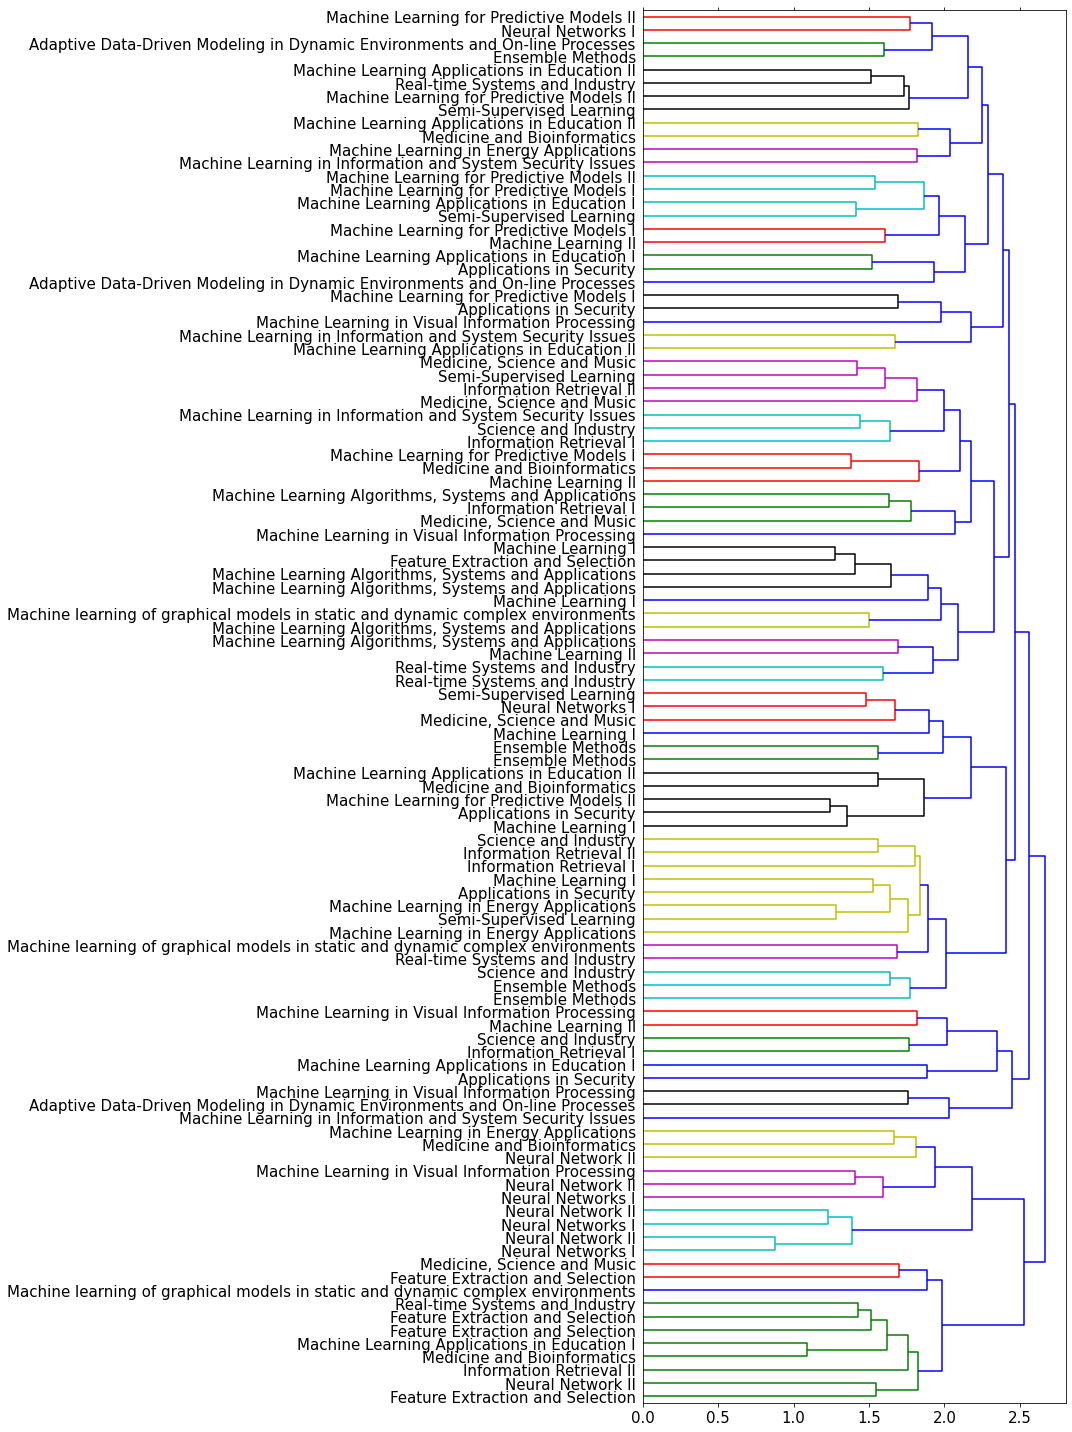

In [0]:
# HCA using euclidean dist + average linkage
linkage_matrix = average(ucl_dist) #define the linkage_matrix using ward clustering pre-computed distances
linkage_matrix.shape

# single, complete, average
fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels= list(papers['session']));

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off',
    labelsize=15
    )
plt.tick_params(\
    axis= 'y',          # changes apply to the y-axis
    labelsize=15
    )

plt.tight_layout() #show plot with tight layout

#save figure as ward_clusters
plt.savefig('ward_clusters.png', dpi=200) 

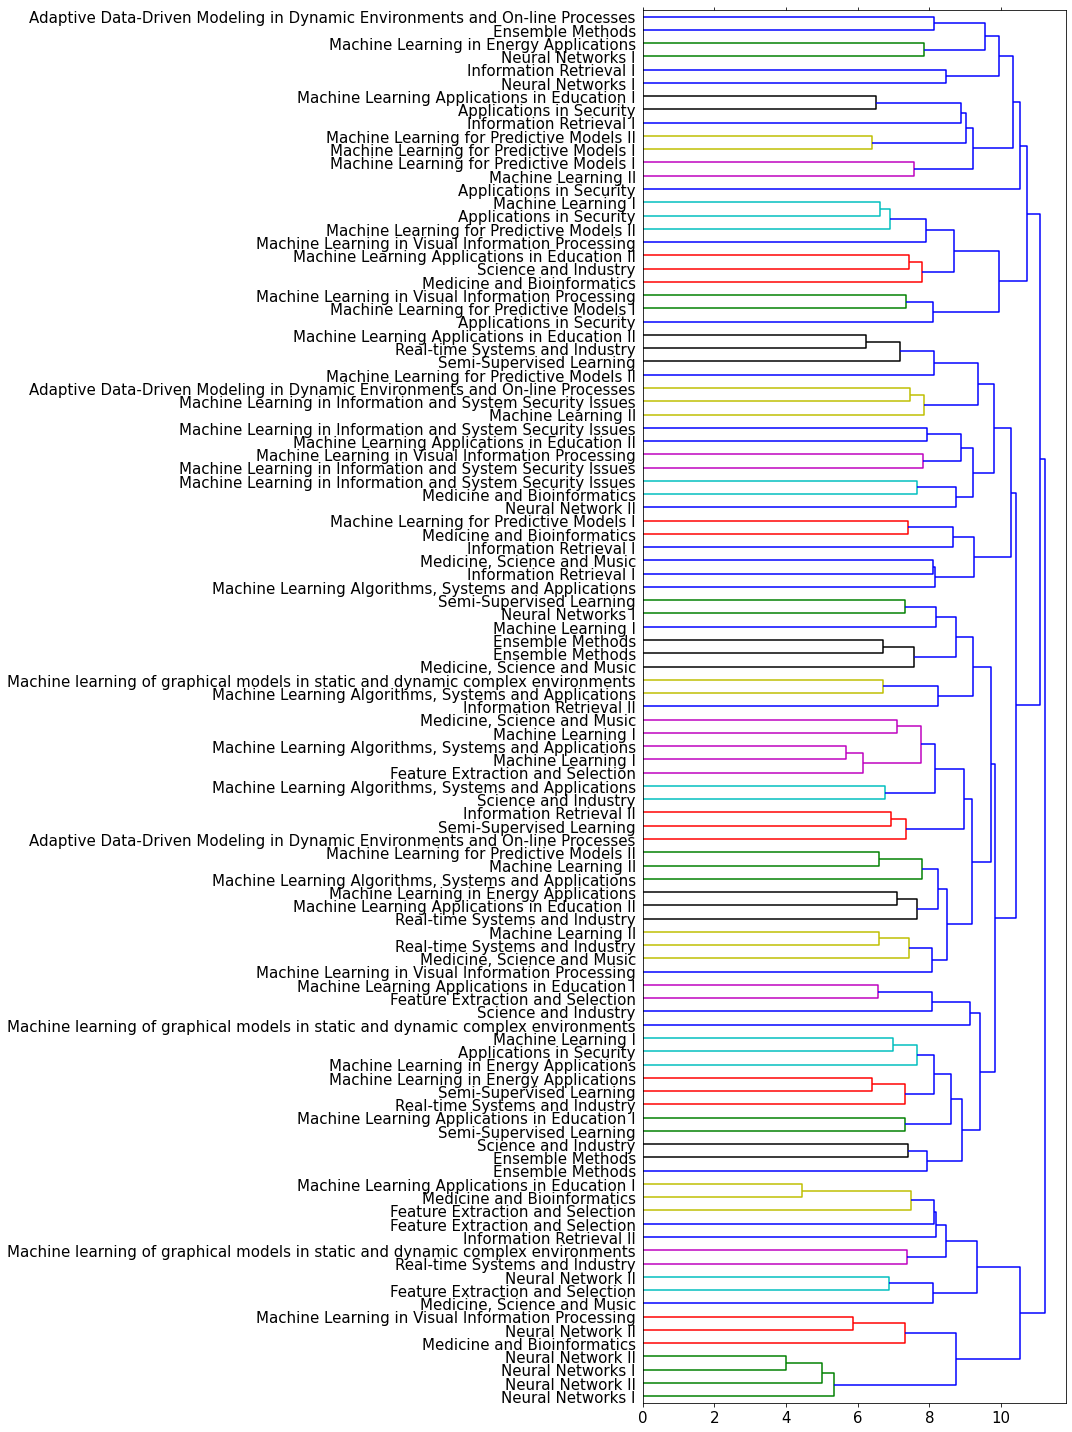

In [0]:
# HCA using Manhattan dist + average linkage
linkage_matrix = average(mat_dist) #define the linkage_matrix using ward clustering pre-computed distances
linkage_matrix.shape

# single, complete, average
fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels= list(papers['session']));

plt.tick_params(\
    axis= 'x',         # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off',
    labelsize=15
    )
plt.tick_params(\
    axis= 'y',          # changes apply to the y-axis
    labelsize=15
    )

plt.tight_layout() #show plot with tight layout

#save figure as ward_clusters
plt.savefig('ward_clusters.png', dpi=200) 

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=20)
105
[ 5 11  6  3 11]
AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=20)
105
[12  2 18  3  2]
AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=20)
105
[0 0 0 0 0]


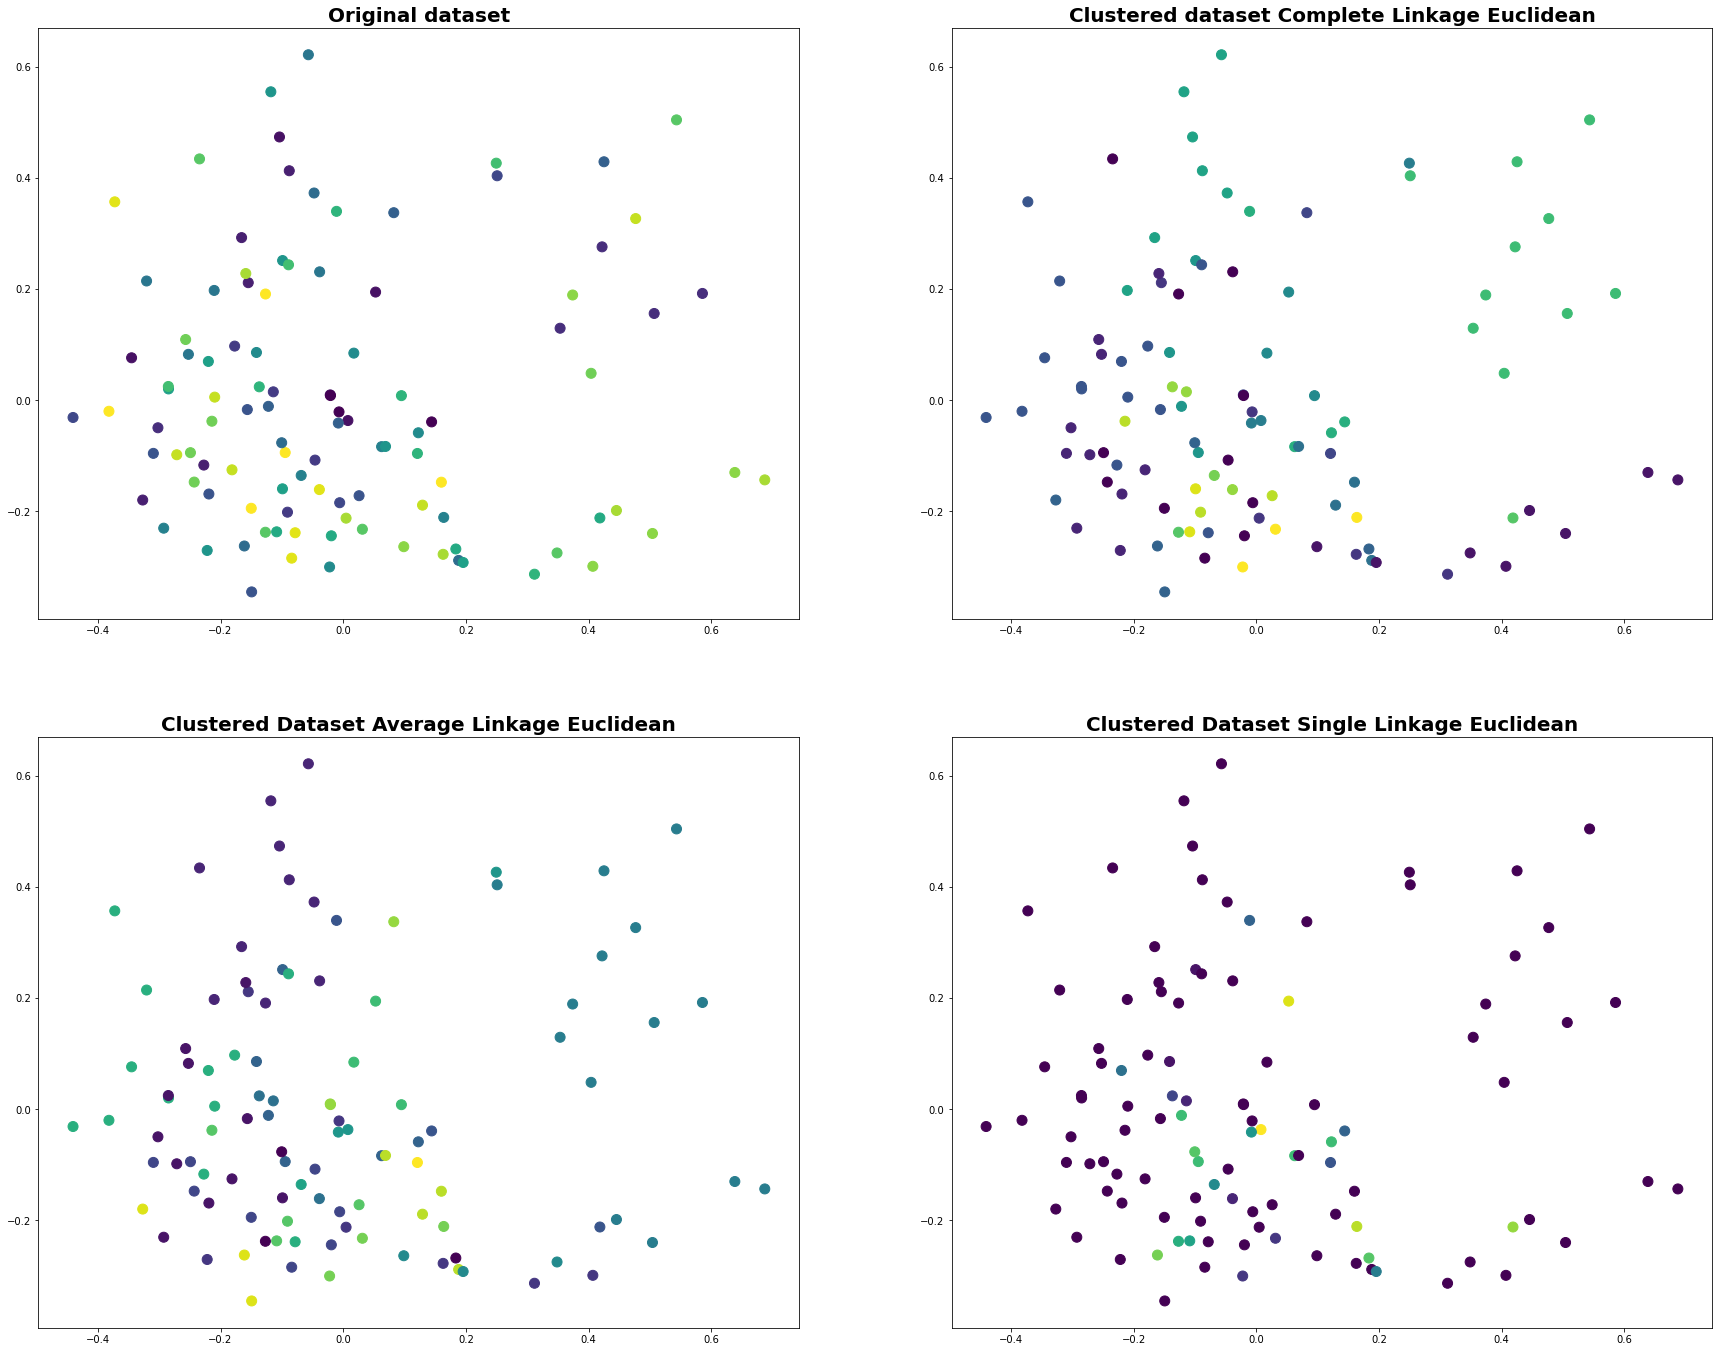

In [0]:
# Visualisation of clustering using eucliedean dist
clustering1 = AgglomerativeClustering(affinity='euclidean', n_clusters=20, linkage='complete').fit(reform_tfidf_matrix)
print(clustering1)

print(len(clustering1.labels_))
print(clustering1.labels_[:5])

#clustering using eucliedean dist, average linkage
clustering2 = AgglomerativeClustering(affinity='euclidean', n_clusters=20, linkage='average').fit(reform_tfidf_matrix)
print(clustering2)

print(len(clustering2.labels_))
print(clustering2.labels_[:5])

#clustering using eucliedean dist, single linkage
clustering3 = AgglomerativeClustering(affinity='euclidean', n_clusters=20, linkage='single').fit(reform_tfidf_matrix)
print(clustering3)

print(len(clustering3.labels_))
print(clustering3.labels_[:5])

# Visualize Travel review data in 2D using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
comps = pca.fit_transform(reform_tfidf_matrix)

new_df = pd.DataFrame(data = comps
             , columns = ['Comp1', 'Comp2'])

# a scatter plot 

plt.figure(figsize=(30,50))
plt.tight_layout(pad=4.0)
plt.subplot(421)
plt.title("Original dataset", weight='bold', size=20)
plt.scatter(new_df['Comp1'], new_df['Comp2'], c=papers['session_encoded'], s=100);

plt.subplot(422)
plt.title("Clustered dataset Complete Linkage Euclidean", weight='bold', size=20)
plt.scatter(new_df['Comp1'], new_df['Comp2'], c=clustering1.labels_, s=100);

plt.subplot(423)
plt.title("Clustered Dataset Average Linkage Euclidean", weight='bold', size=20)
plt.scatter(new_df['Comp1'], new_df['Comp2'], c=clustering2.labels_, s=100);

plt.subplot(424)
plt.title("Clustered Dataset Single Linkage Euclidean", weight='bold', size=20)
plt.scatter(new_df['Comp1'], new_df['Comp2'], c=clustering3.labels_, s=100);

AgglomerativeClustering(affinity='manhattan', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=20)
105
[1 4 1 3 4]
AgglomerativeClustering(affinity='manhattan', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=20)
105
[13  2 13  2  2]
AgglomerativeClustering(affinity='manhattan', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=20)
105
[0 0 0 0 0]


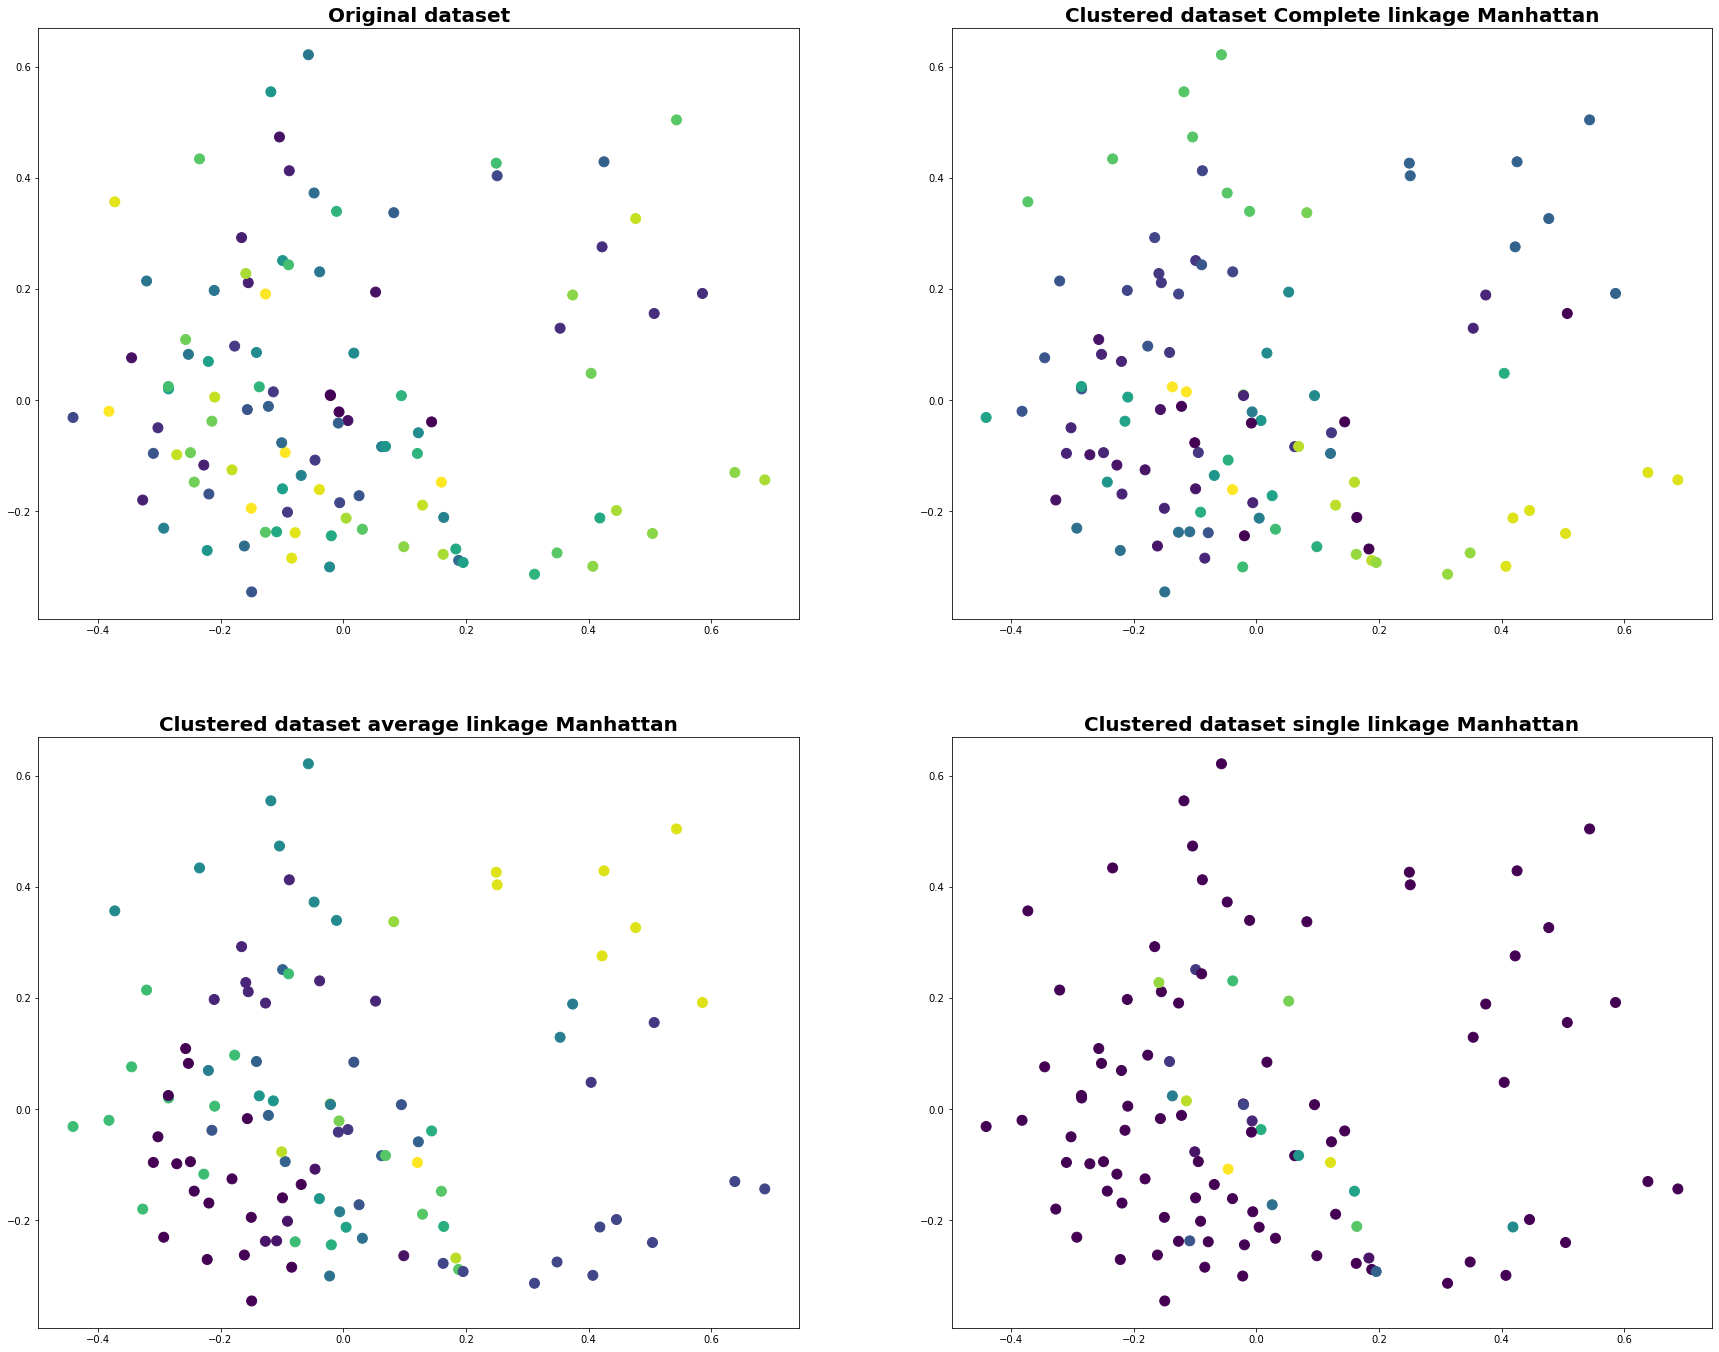

In [0]:
# Visualisation of clustering using manhattan dist
clustering1 = AgglomerativeClustering(affinity='manhattan', n_clusters=20, linkage='complete').fit(reform_tfidf_matrix)
print(clustering1)

print(len(clustering1.labels_))
print(clustering1.labels_[:5])

#clustering using eucliedean dist, average linkage
clustering2 = AgglomerativeClustering(affinity='manhattan', n_clusters=20, linkage='average').fit(reform_tfidf_matrix)
print(clustering2)

print(len(clustering2.labels_))
print(clustering2.labels_[:5])

#clustering using eucliedean dist, single linkage
clustering3 = AgglomerativeClustering(affinity='manhattan', n_clusters=20, linkage='single').fit(reform_tfidf_matrix)
print(clustering3)

print(len(clustering3.labels_))
print(clustering3.labels_[:5])

# Visualize Travel review data in 2D using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
comps = pca.fit_transform(reform_tfidf_matrix)

new_df = pd.DataFrame(data = comps
             , columns = ['Comp1', 'Comp2'])

# a scatter plot 

plt.figure(figsize=(30,50))
plt.tight_layout(pad=4.0)
plt.subplot(421)
plt.title("Original dataset", weight='bold', size=20)
plt.scatter(new_df['Comp1'], new_df['Comp2'], c=papers['session_encoded'], s=100);

plt.subplot(422)
plt.title("Clustered dataset Complete linkage Manhattan", weight='bold', size=20)
plt.scatter(new_df['Comp1'], new_df['Comp2'], c=clustering1.labels_, s=100);

plt.subplot(423)
plt.title("Clustered dataset average linkage Manhattan", weight='bold', size=20)
plt.scatter(new_df['Comp1'], new_df['Comp2'], c=clustering2.labels_, s=100);

plt.subplot(424)
plt.title("Clustered dataset single linkage Manhattan", weight='bold', size=20)
plt.scatter(new_df['Comp1'], new_df['Comp2'], c=clustering3.labels_, s=100);

AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=20)
105
[ 5 11  6  3 11]
AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=20)
105
[12  2 18  3  2]
AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=20)
105
[0 0 0 0 0]


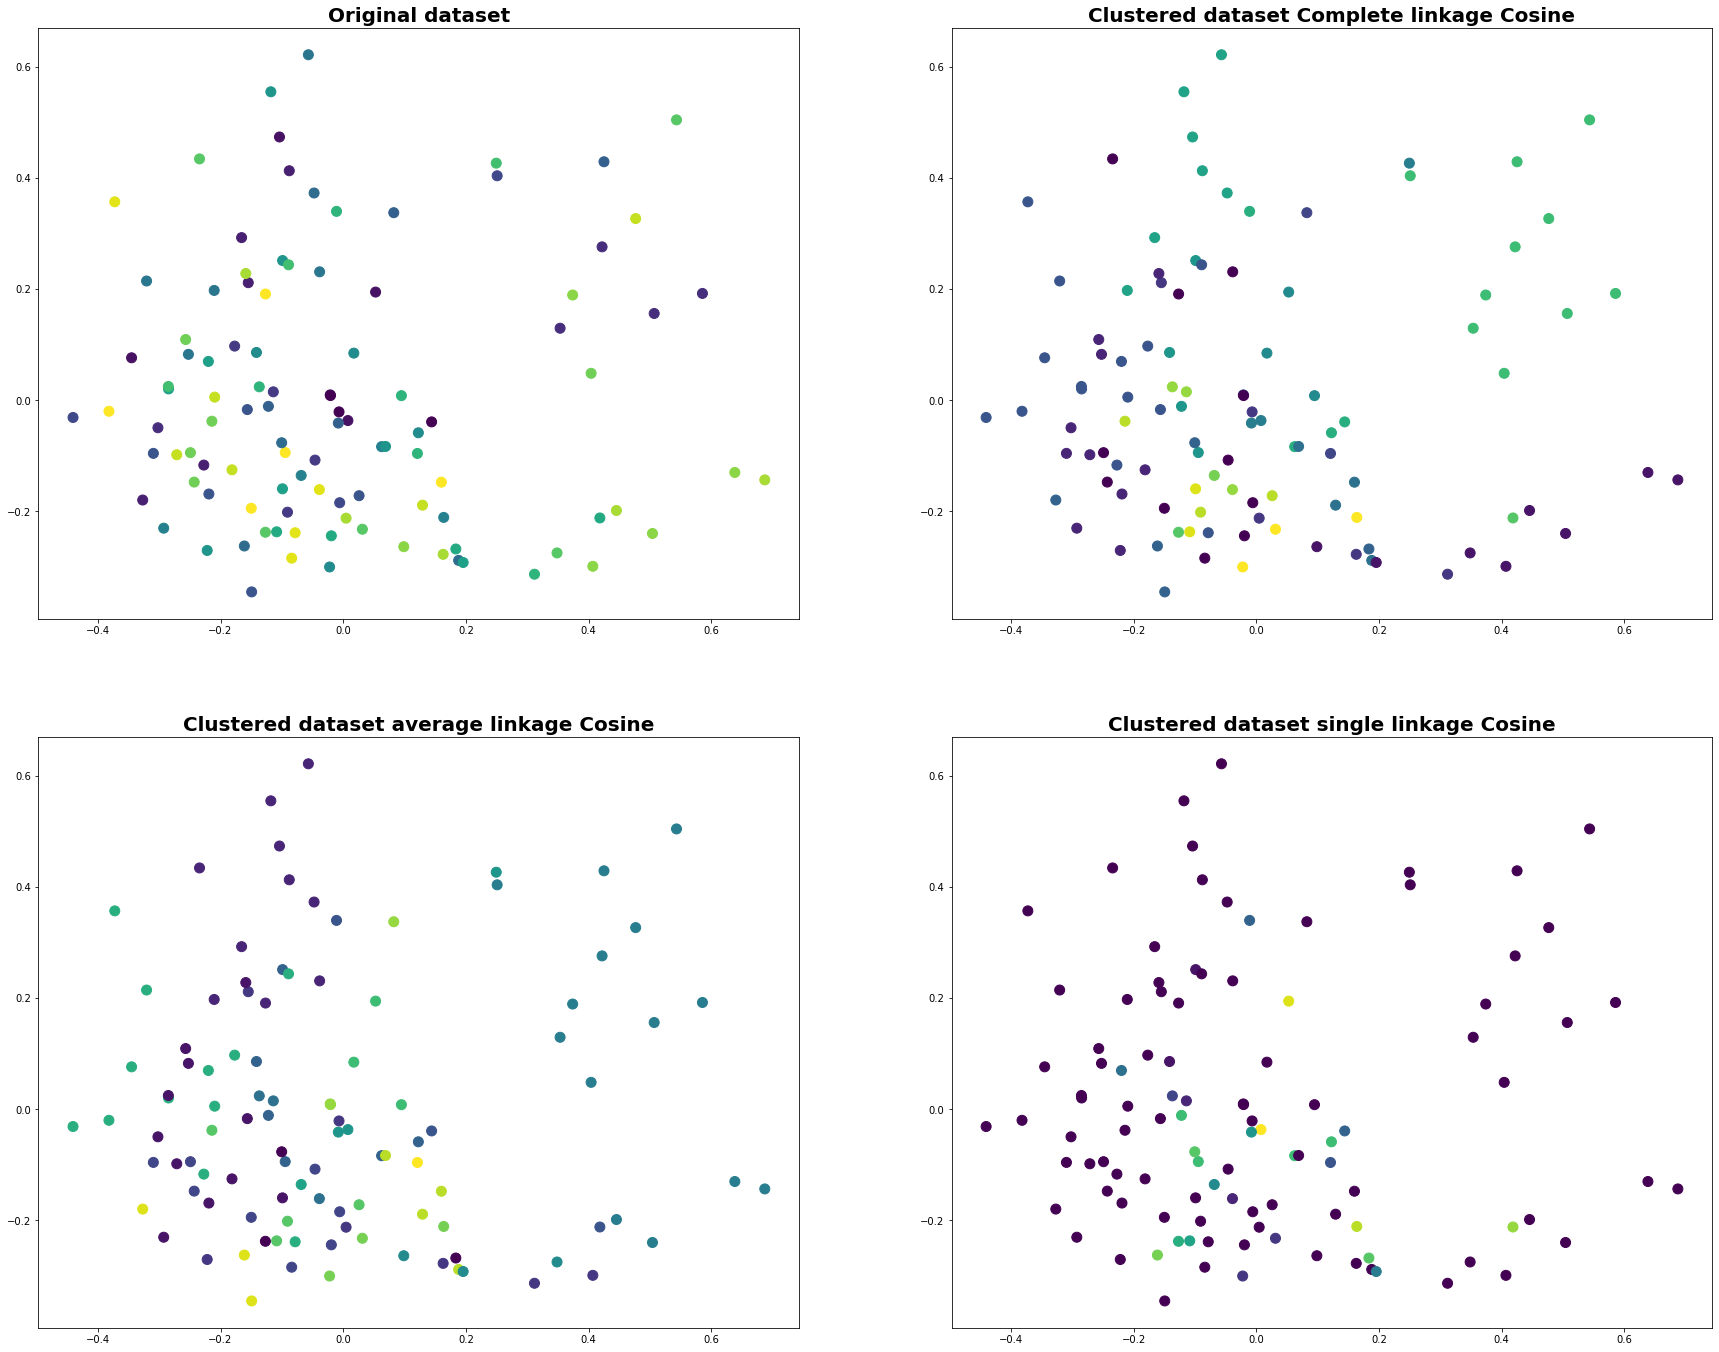

In [0]:
# Visualisation of clustering using cosine dist
clustering1 = AgglomerativeClustering(affinity='cosine', n_clusters=20, linkage='complete').fit(reform_tfidf_matrix)
print(clustering1)

print(len(clustering1.labels_))
print(clustering1.labels_[:5])

#clustering using eucliedean dist, average linkage
clustering2 = AgglomerativeClustering(affinity='cosine', n_clusters=20, linkage='average').fit(reform_tfidf_matrix)
print(clustering2)

print(len(clustering2.labels_))
print(clustering2.labels_[:5])

#clustering using eucliedean dist, single linkage
clustering3 = AgglomerativeClustering(affinity='cosine', n_clusters=20, linkage='single').fit(reform_tfidf_matrix)
print(clustering3)

print(len(clustering3.labels_))
print(clustering3.labels_[:5])

# Visualize Travel review data in 2D using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
comps = pca.fit_transform(reform_tfidf_matrix)

new_df = pd.DataFrame(data = comps
             , columns = ['Comp1', 'Comp2'])

# a scatter plot 

plt.figure(figsize=(30,50))
plt.tight_layout(pad=4.0)
plt.subplot(421)
plt.title("Original dataset", weight='bold', size=20)
plt.scatter(new_df['Comp1'], new_df['Comp2'], c=papers['session_encoded'], s=100);

plt.subplot(422)
plt.title("Clustered dataset Complete linkage Cosine", weight='bold', size=20)
plt.scatter(new_df['Comp1'], new_df['Comp2'], c=clustering1.labels_, s=100);

plt.subplot(423)
plt.title("Clustered dataset average linkage Cosine", weight='bold', size=20)
plt.scatter(new_df['Comp1'], new_df['Comp2'], c=clustering2.labels_, s=100);

plt.subplot(424)
plt.title("Clustered dataset single linkage Cosine", weight='bold', size=20)
plt.scatter(new_df['Comp1'], new_df['Comp2'], c=clustering3.labels_, s=100);



---


# 4. DBSCAN Clustering

In [0]:
# Tuning DBSCAN
# Below is a function that returns the optimal Epsilon
# the function receives a list of datapoints, a specified min samples and the knn metric
# we can choose to plot the elbow or not

def get_eps(data, min_s, metric, plot = False):
  k = min_s  # k is the min samples

  # find k nearest neighbor in the review dataset
  neybor = NearestNeighbors(n_neighbors=k, metric=metric)
  neybor.fit(data)
  
  # get the list of max distance for every datapoint
  distan, ind = neybor.kneighbors(data)
 
  # the list of max dist is the last cols of the distance matrix
  distan = list(distan[:,-1])

  # we want to sort distance in descending order to find the elbow
  distan.sort(reverse = True)
  ind = range(1, len(distan)+1)

  # call a function to spot the point at elbow
  # this point's coordinate is defined as (kn.knee, kn.knee_y)
  # we want to find the y coordinate which is the epsilon at elbow point
  kn = KneeLocator(ind, distan, curve='convex', direction='decreasing')

  if plot == True:
    plt.xlabel('Index')
    plt.ylabel('Distance')
    plt.plot(ind, distan)
    plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
    plt.show(); 

  return kn.knee_y # this return the Y value (epsilon) at the elbow

## 4.1 Travel Review Dataset

### Train DBSCAN clustering 

In [76]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors # this is used as a method to estimate epsilon

#euclidean #manhattan #cosine

#scale the reviews dataset as input for DBSCAN to have better estimation for epsilon
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
test = scaler.fit_transform(reviews)
test = pd.DataFrame(test)

# below are optimal models thats has been found by evaluation

dbscan1 = DBSCAN(eps= get_eps(test, 8, "manhattan"), min_samples=8, metric="manhattan")
dbscan1.fit(test)

dbscan2 = DBSCAN(eps= get_eps(test, 7, "euclidean"), min_samples=7, metric="euclidean")
dbscan2.fit(test)

dbscan3 = DBSCAN(eps= get_eps(test, 7, "cosine"), min_samples=7, metric="cosine")
dbscan3.fit(test)

print("Num of cluster", len(set(dbscan1.labels_)))
print("Num of cluster", len(set(dbscan2.labels_)))
print("Num of cluster", len(set(dbscan3.labels_)))

Num of cluster 2
Num of cluster 2
Num of cluster 2


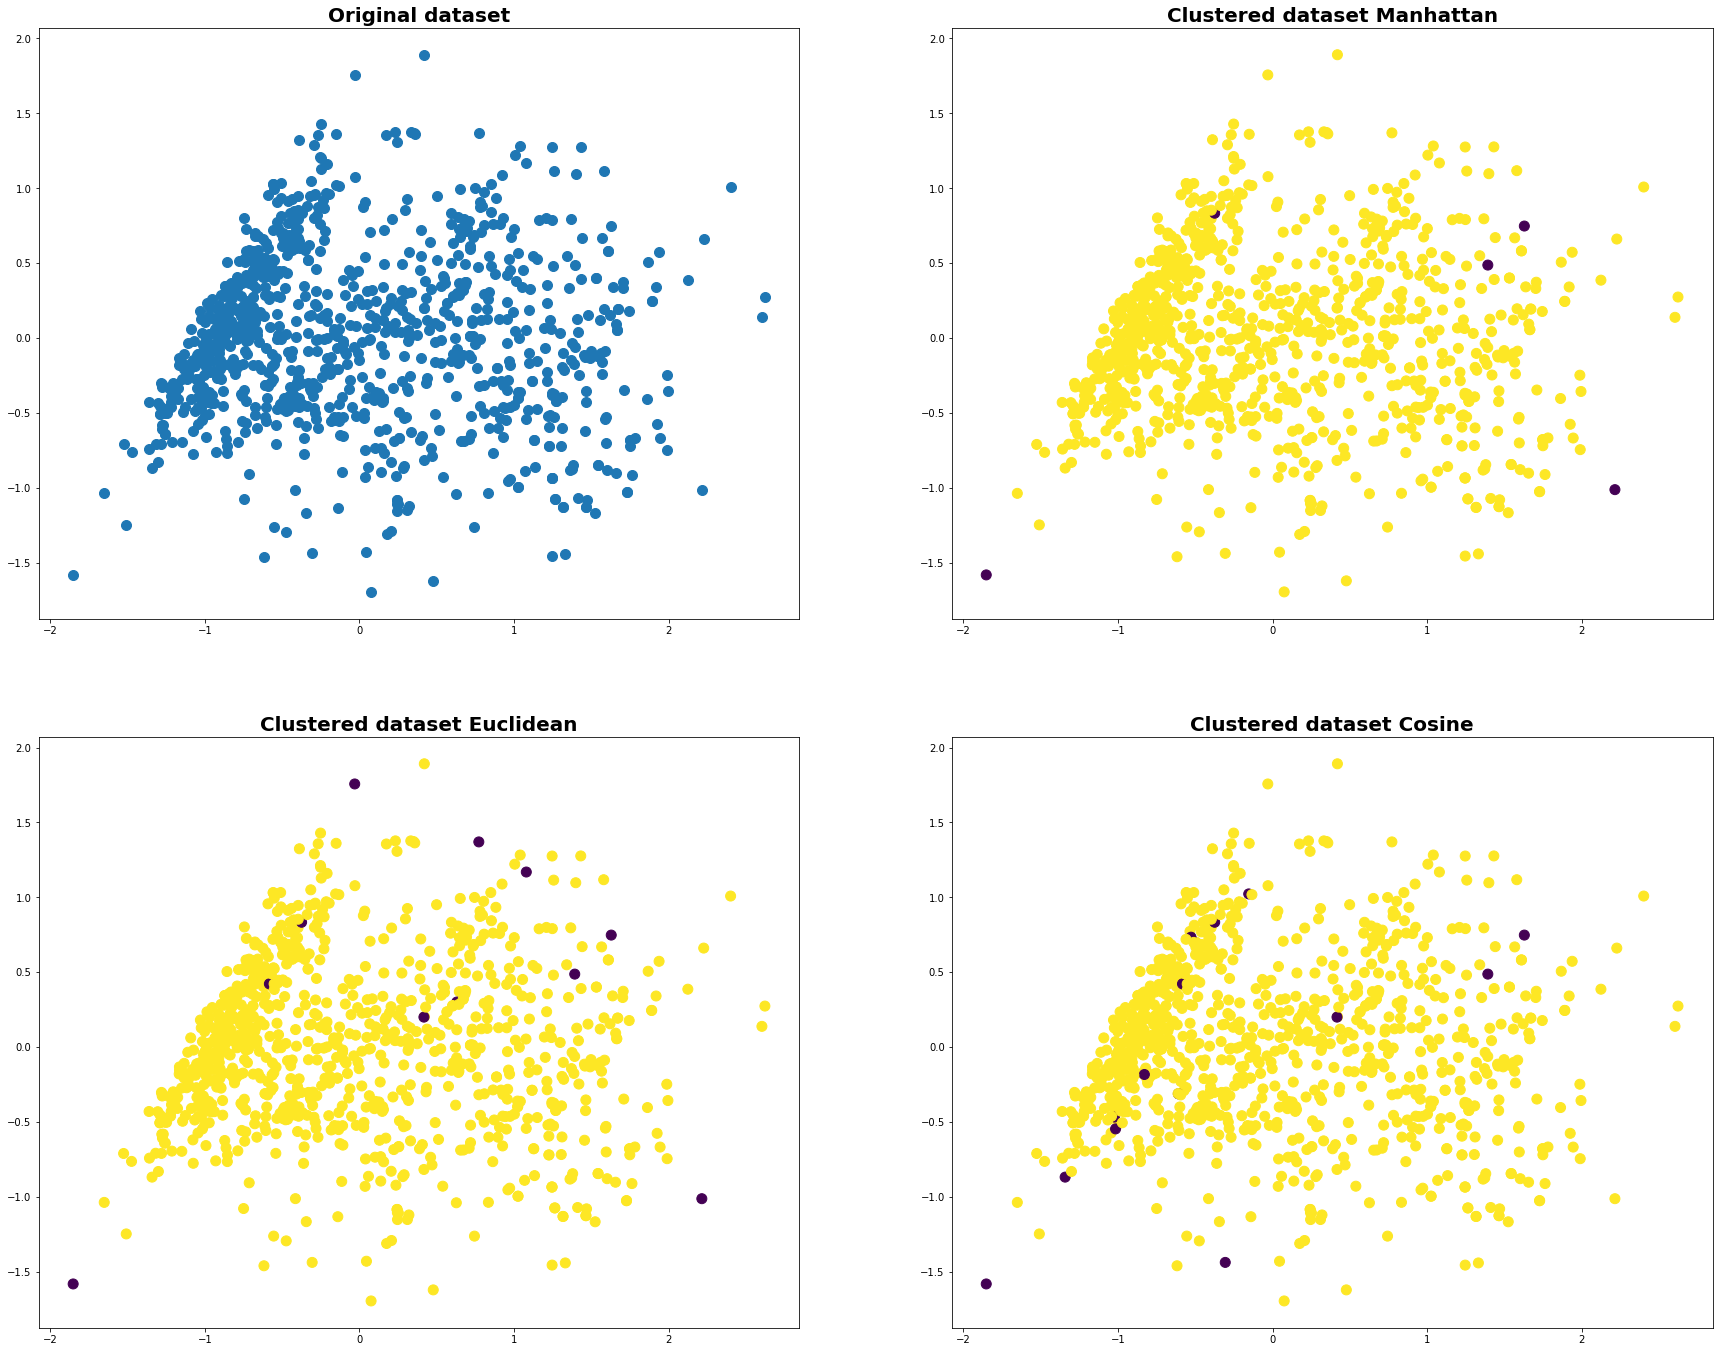

In [77]:
# Visualize Travel review data in 2D using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
comps = pca.fit_transform(reviews)

new_df = pd.DataFrame(data = comps
             , columns = ['Comp1', 'Comp2'])

# a scatter plot to visualize DBSCAN clustering for each model
plt.figure(figsize=(30,50))
plt.tight_layout(pad=4.0)
plt.subplot(421)
plt.title("Original dataset", weight='bold', size=20)
plt.scatter(new_df['Comp1'], new_df['Comp2'], s=100);

plt.subplot(422)
plt.title("Clustered dataset Manhattan", weight='bold', size=20)
plt.scatter(new_df['Comp1'], new_df['Comp2'], c=dbscan1.labels_, s=100);

plt.subplot(423)
plt.title("Clustered dataset Euclidean", weight='bold', size=20)
plt.scatter(new_df['Comp1'], new_df['Comp2'], c=dbscan2.labels_, s=100);

plt.subplot(424)
plt.title("Clustered dataset Cosine", weight='bold', size=20)
plt.scatter(new_df['Comp1'], new_df['Comp2'], c=dbscan3.labels_, s=100);




### First evaluation

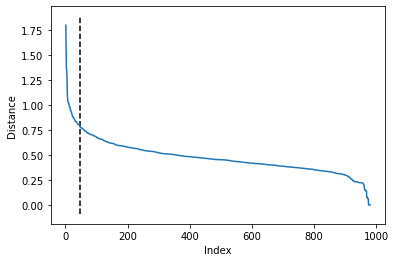

0.7766152024223083

In [78]:
# lets start of with min_s = 5
min_s = 3

# Chose optimal eps for manhattan distance
get_eps(test, min_s, "manhattan", True)

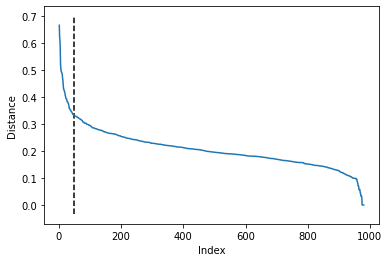

0.3304156734988978

In [79]:
# Chose optimal eps for euclidean distance
get_eps(test, min_s, "euclidean", True)

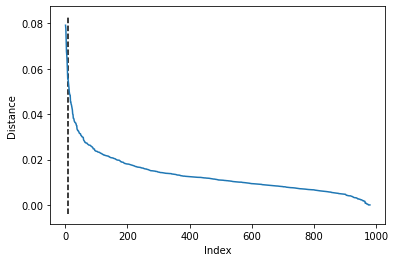

0.055619378744781955

In [80]:
# Chose optimal eps for cosine distance
get_eps(test, min_s, "cosine", True)

### Second evaluation 

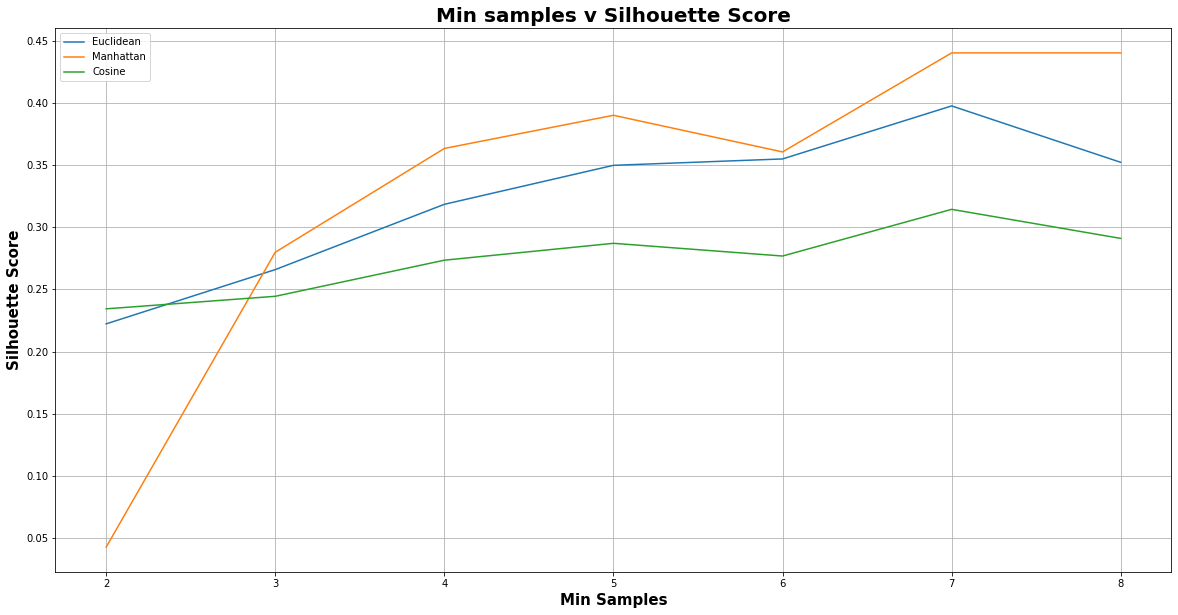

In [84]:
# Selection of min sample
min_samples = [2, 3, 4, 5, 6, 7, 8]

# Arrays to store the various evaluation metrics 
# Internal measures 

silhouette_scores_euclidean= []

silhouette_scores_manhattan = []

silhouette_scores_cosine= []

# Training three different versions of DBSCAN with optimal eps for each metric/min_sample
# notice for every metric, we calculate the optimal epsilon for the metric/min_sample as well

for min_s in min_samples:

    dbscan1 = DBSCAN(eps= get_eps(test, min_s, "manhattan"), min_samples=min_s, metric="manhattan")
    dbscan1.fit(test)

    dbscan2 = DBSCAN(eps= get_eps(test, min_s, "euclidean"), min_samples=min_s, metric="euclidean")
    dbscan2.fit(test)

    dbscan3 = DBSCAN(eps= get_eps(test, min_s, "cosine"), min_samples=min_s, metric="cosine")
    dbscan3.fit(test)

    score_manhattan = silhouette_score(reviews, dbscan1.labels_)
    score_euclidean = silhouette_score(reviews, dbscan2.labels_)
    score_cosine = silhouette_score(reviews, dbscan3.labels_)

    silhouette_scores_manhattan.append(score_manhattan)
    silhouette_scores_euclidean.append(score_euclidean)
    silhouette_scores_cosine.append(score_cosine)

# Plotting silhouette scores 
plt.figure(figsize=(20,10))

plt.plot(min_samples, silhouette_scores_euclidean, label= 'Euclidean')
plt.plot(min_samples, silhouette_scores_manhattan, label= 'Manhattan')
plt.plot(min_samples, silhouette_scores_cosine, label = 'Cosine')

plt.xlabel('Min Samples', weight='bold', size=15)
plt.ylabel('Silhouette Score', weight='bold', size=15)
plt.title('Min samples v Silhouette Score', size = 20, weight='bold')
plt.legend()
plt.grid(1)
plt.show();

In [82]:
print(len(dbscan1.labels_))

980


0.04239608479680233


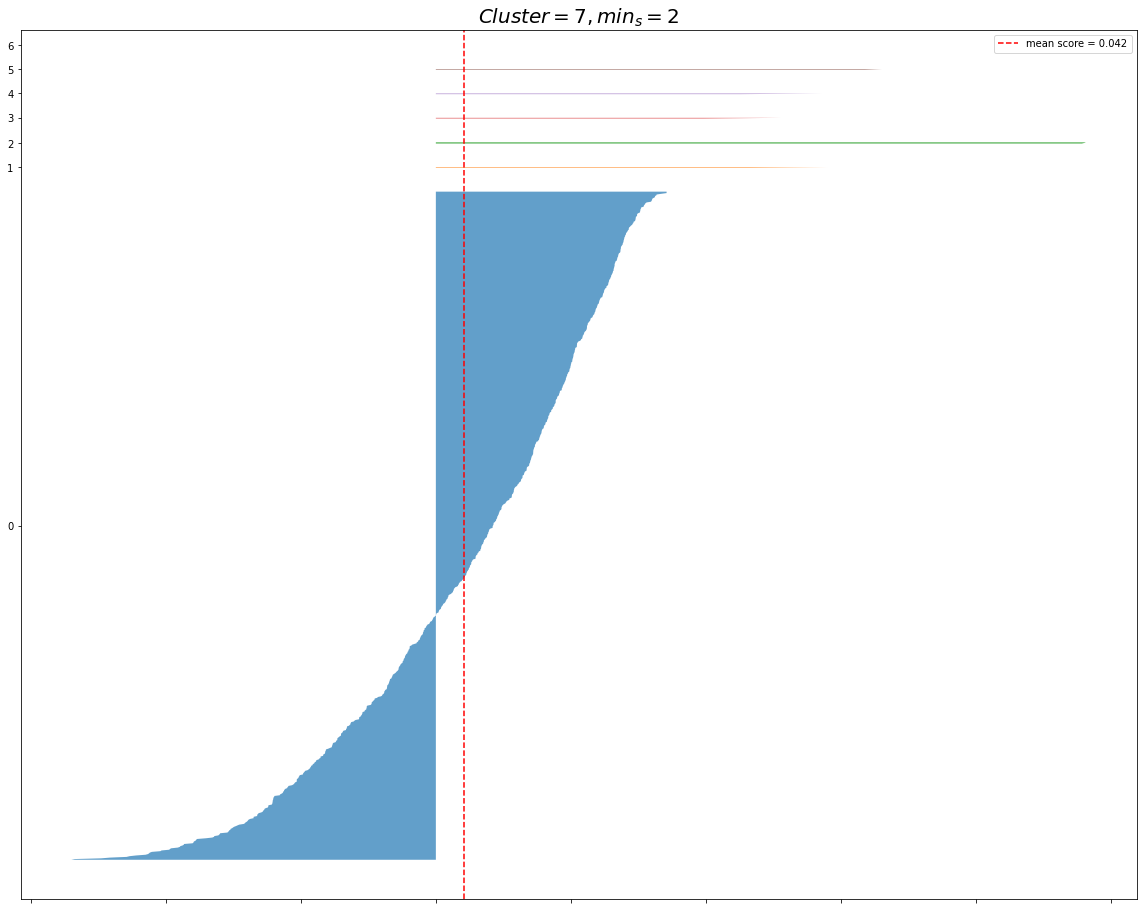

0.27998814833833563


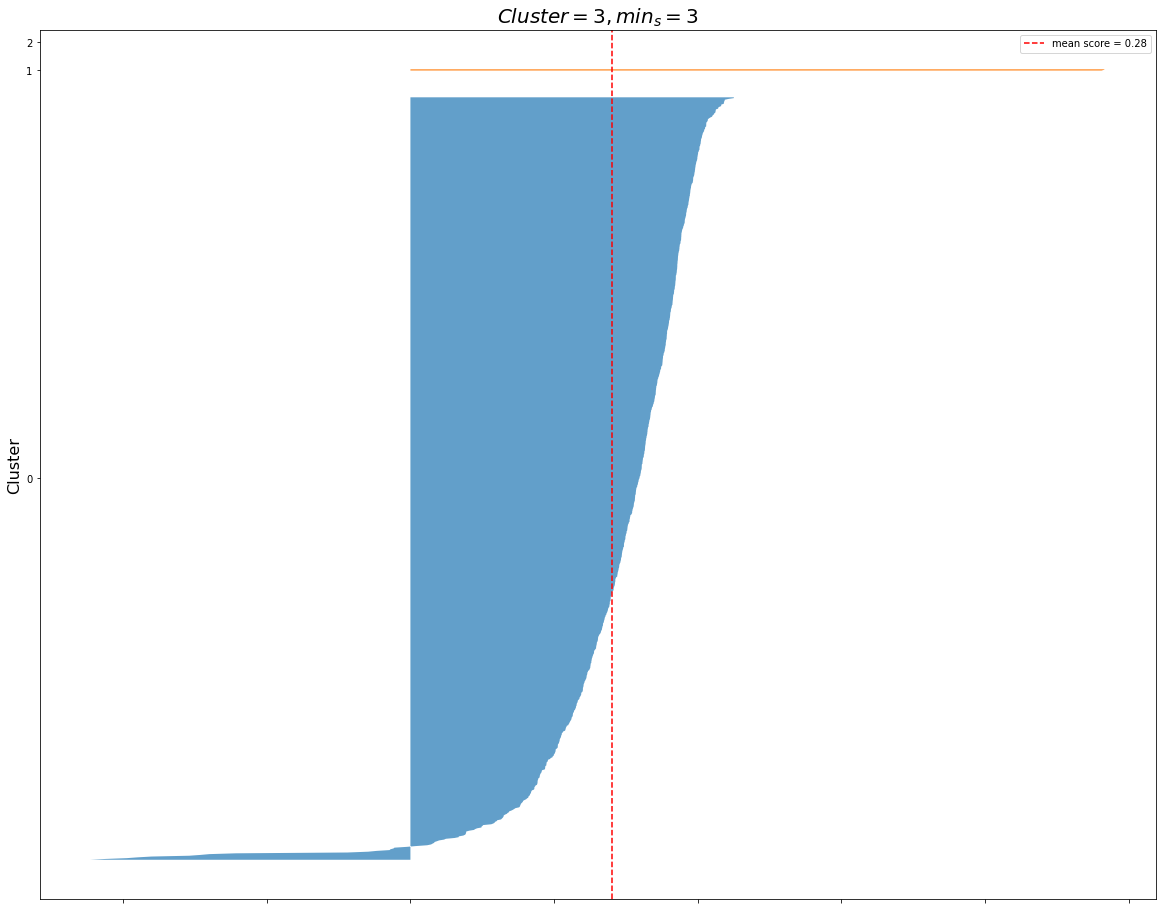

0.3636041963773908


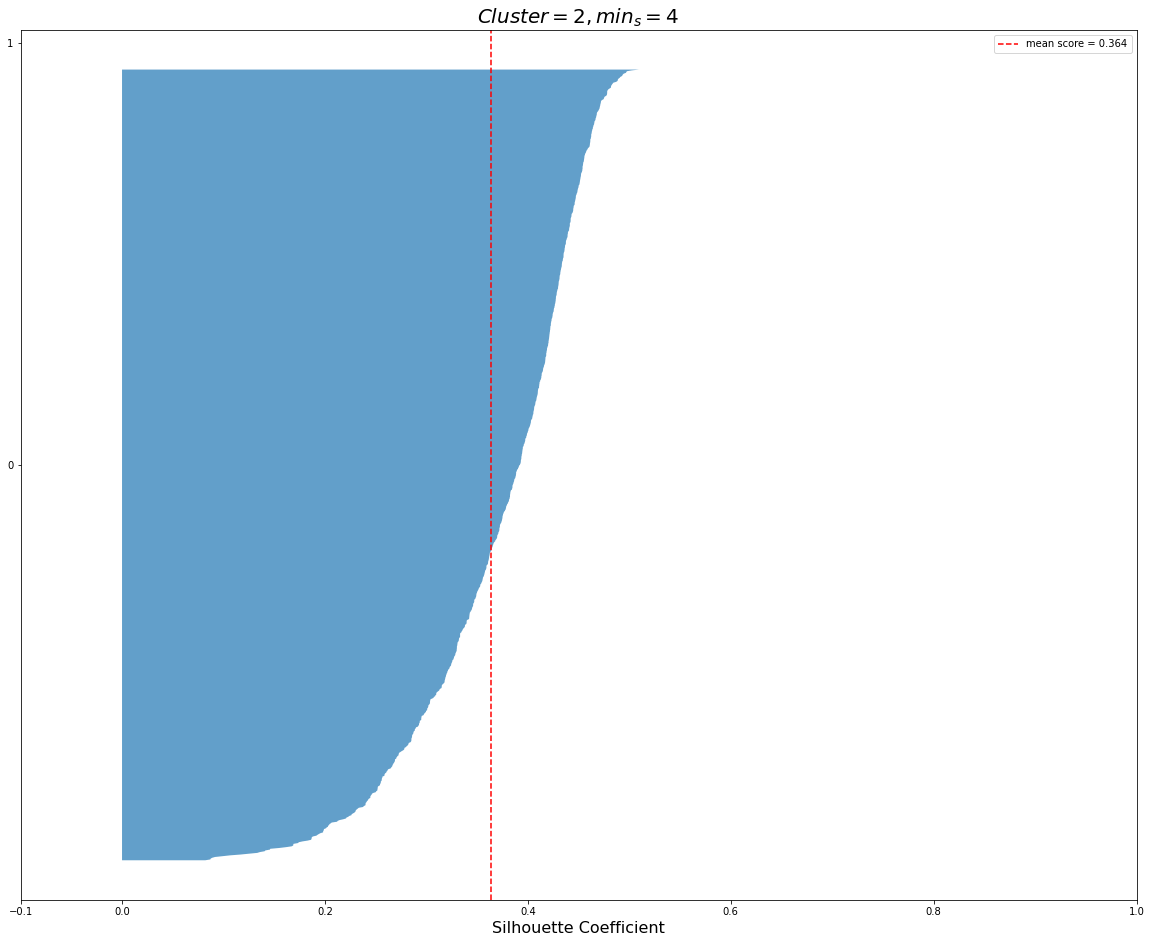

0.39034590760551874


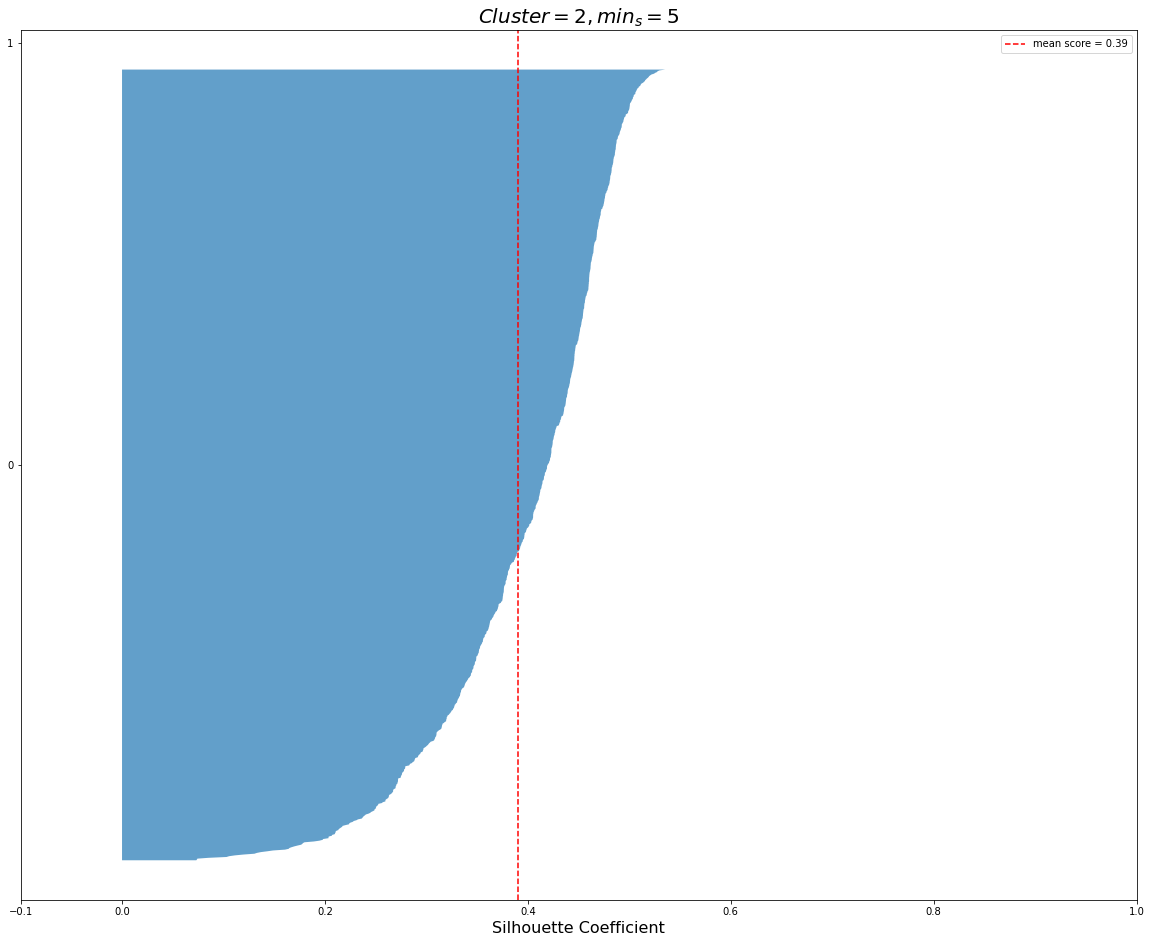

0.36081803678065577


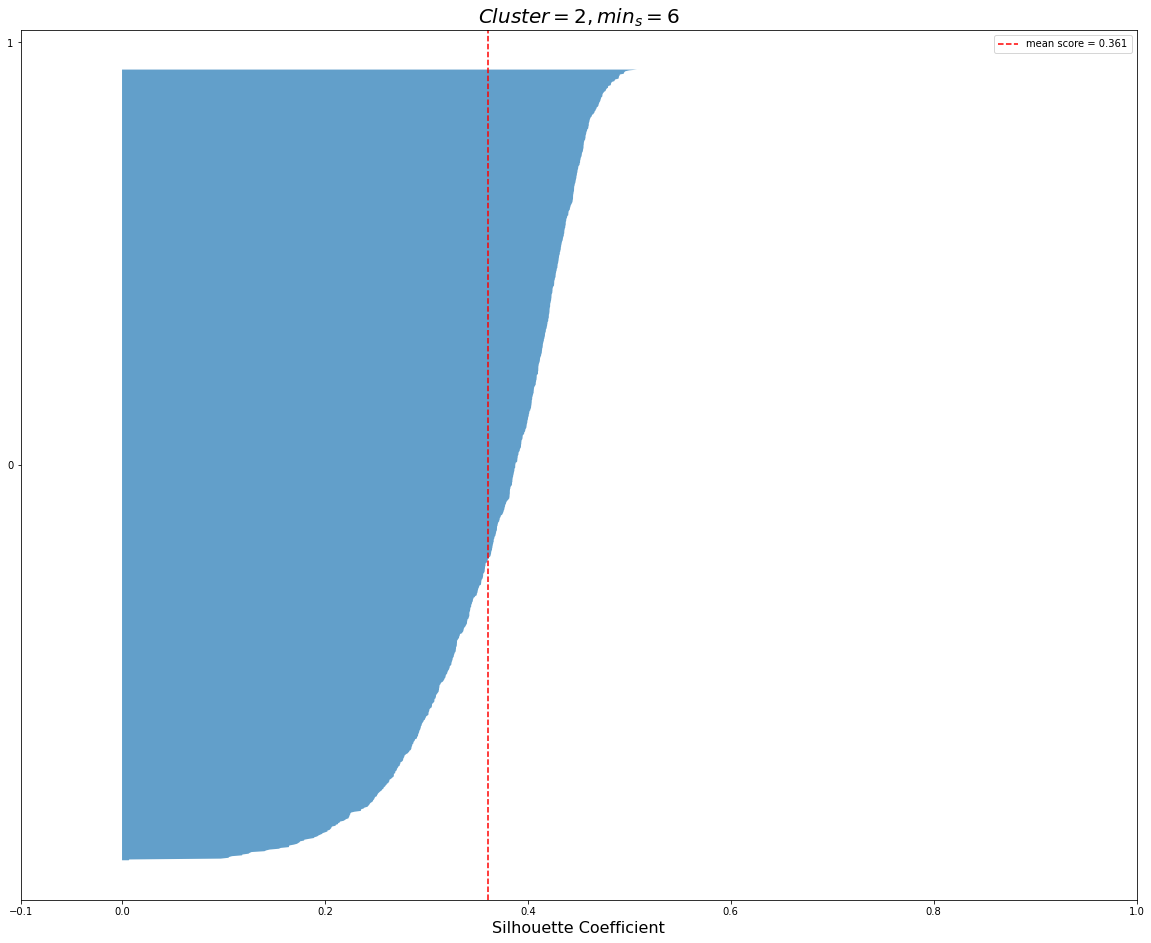

0.44059973985403356


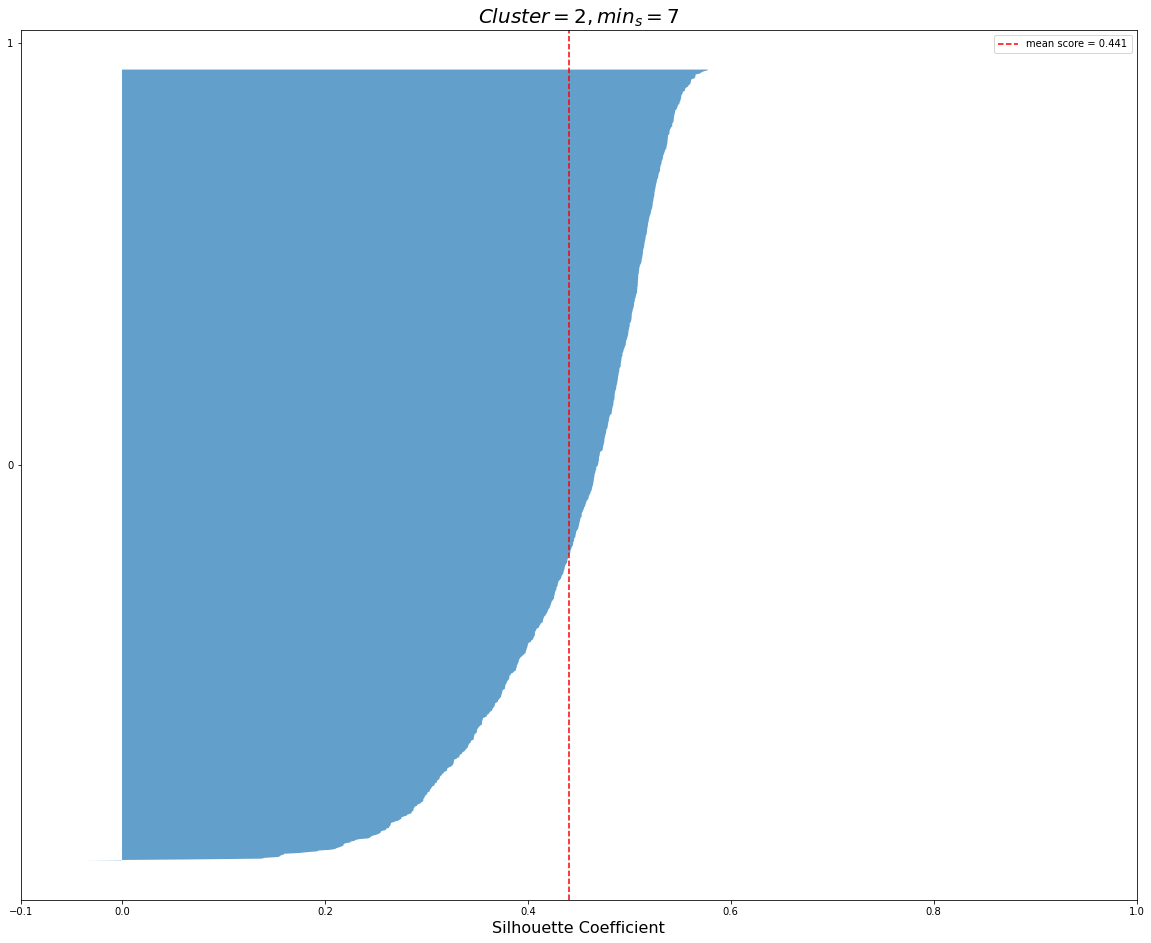

0.44059973985403356


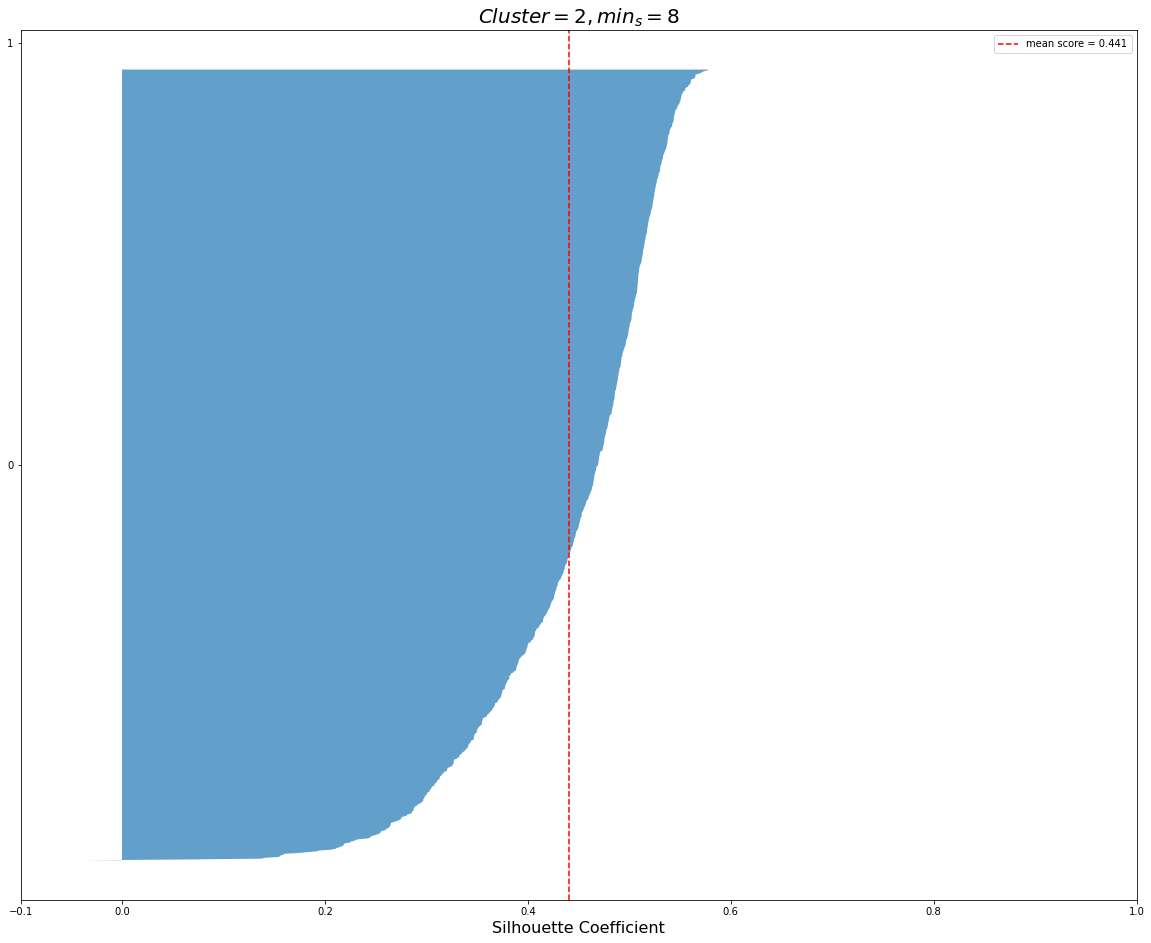

In [85]:
# Test a range of min_sample with manhattan dist
for min_s in min_samples: 
  plt.figure(figsize=(20,16))

  model = DBSCAN(eps= get_eps(test, min_s, "manhattan"), min_samples=min_s, metric="manhattan").fit(test)

  labels = model.labels_

  y_pred = np.asarray(labels)
    
  silhouette_scores = silhouette_score(reviews, y_pred)
  silhouette_coefficients = silhouette_samples(reviews, labels)
  padding = len(reviews) // 30
  pos = padding
  ticks = []

  k = len(set(model.labels_))
  for i in range(k):
      coeffs = silhouette_coefficients[y_pred == i]
      coeffs.sort()

      plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,alpha=0.7)
      ticks.append(pos + len(coeffs) // 2)
      pos += len(coeffs) + padding

  plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
  plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
  if k in (3, 30):
      plt.ylabel("Cluster", fontsize=16)

  if k in (2, 5, 10, 20):
      plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
      plt.xlabel("Silhouette Coefficient", fontsize=16)
  else:
      plt.tick_params(labelbottom=False)

  plt.axvline(x=silhouette_scores, color="red", linestyle="--", label = "mean score = {}".format(round(silhouette_scores, 3)))
  print(silhouette_scores)
  plt.title("$Cluster={}, min_s = {} $".format(k, min_s), fontsize=20)
  plt.legend()
  plt.show()
  
# N.B. find clusters algorithm adapted from COMP5318 Lab 10

0.22226656040994514


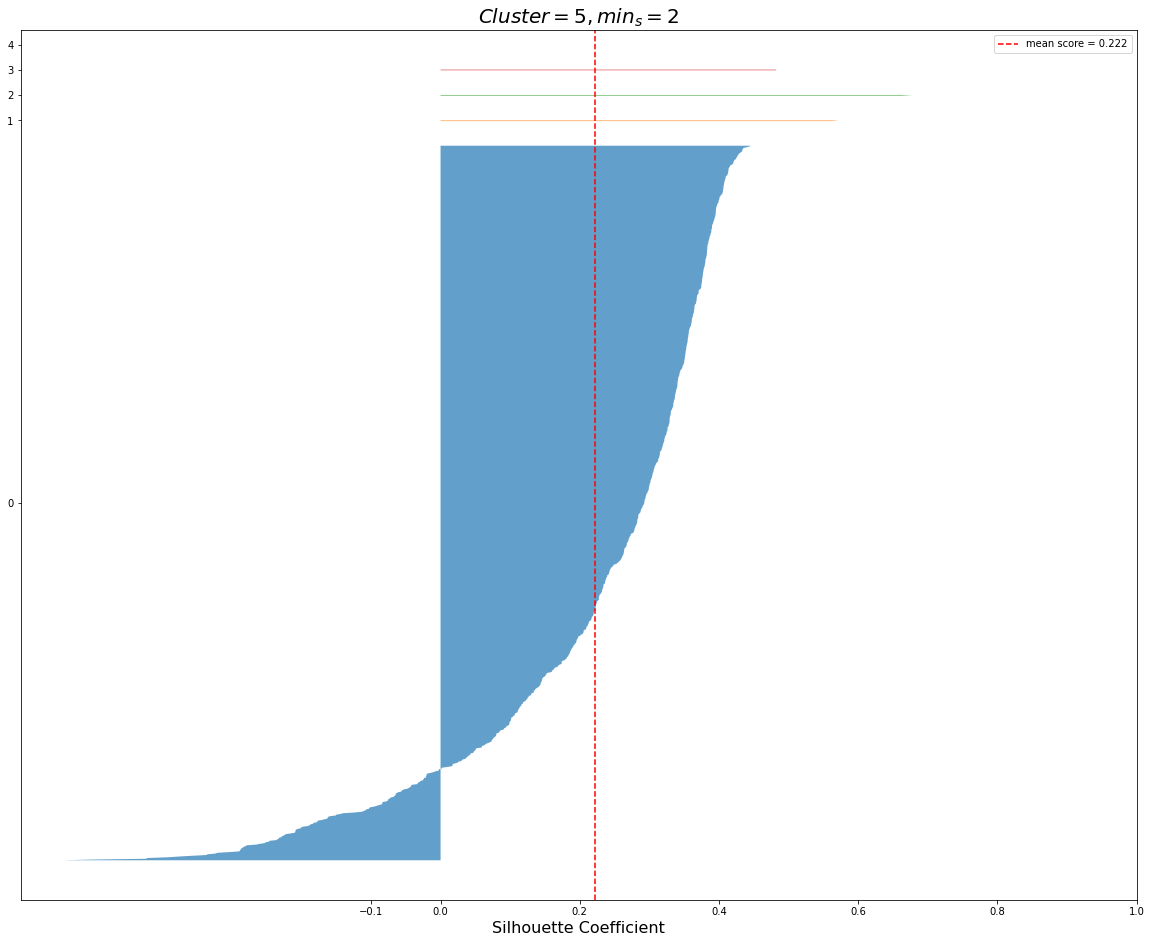

0.26600210429467125


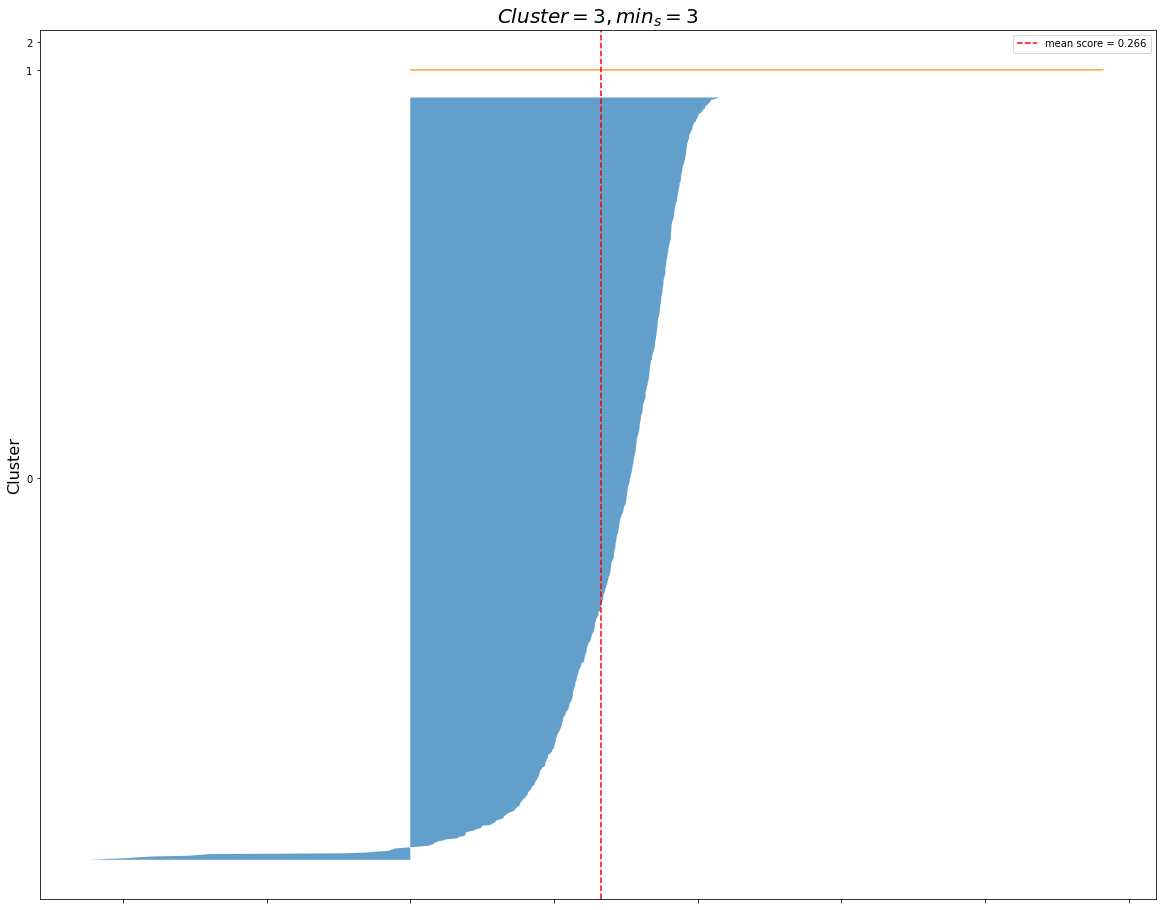

0.31860150560515504


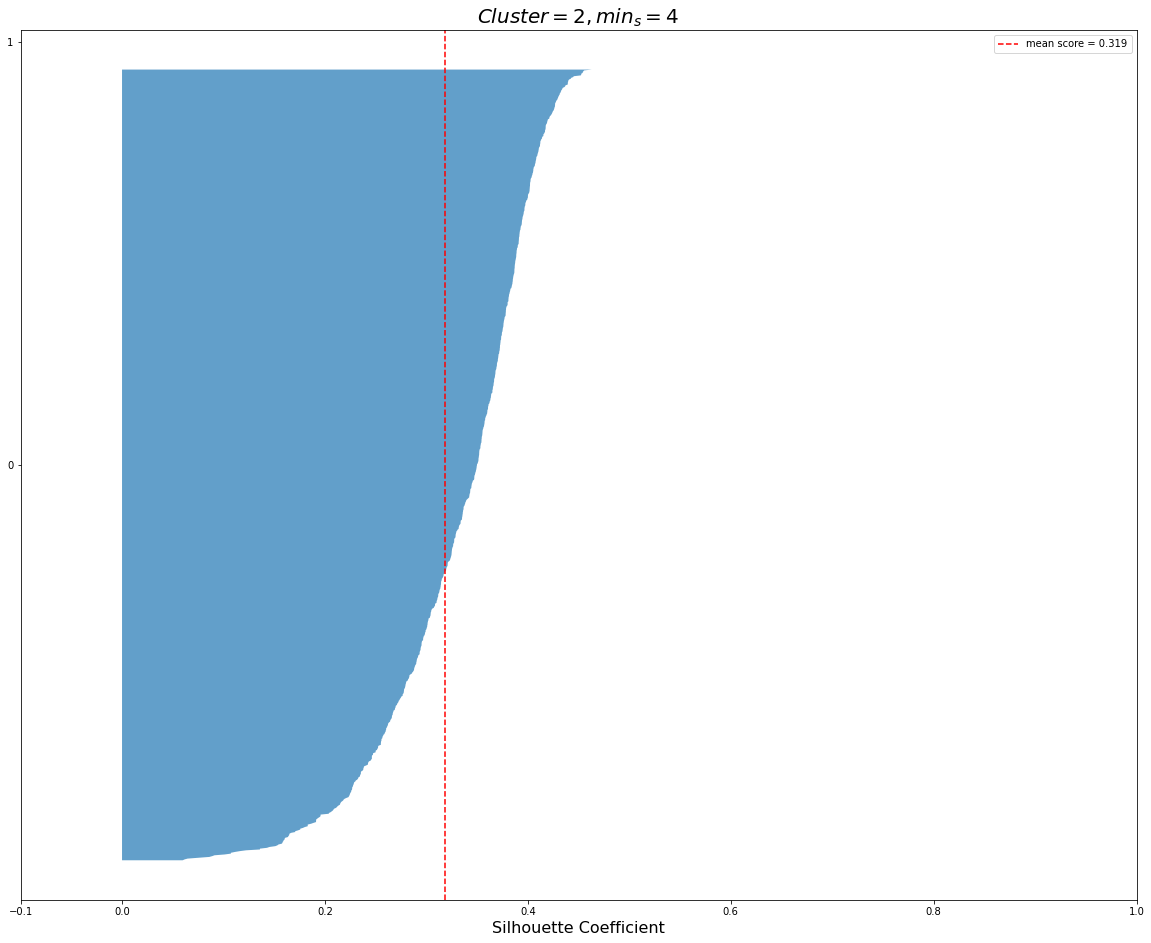

0.3500136090208349


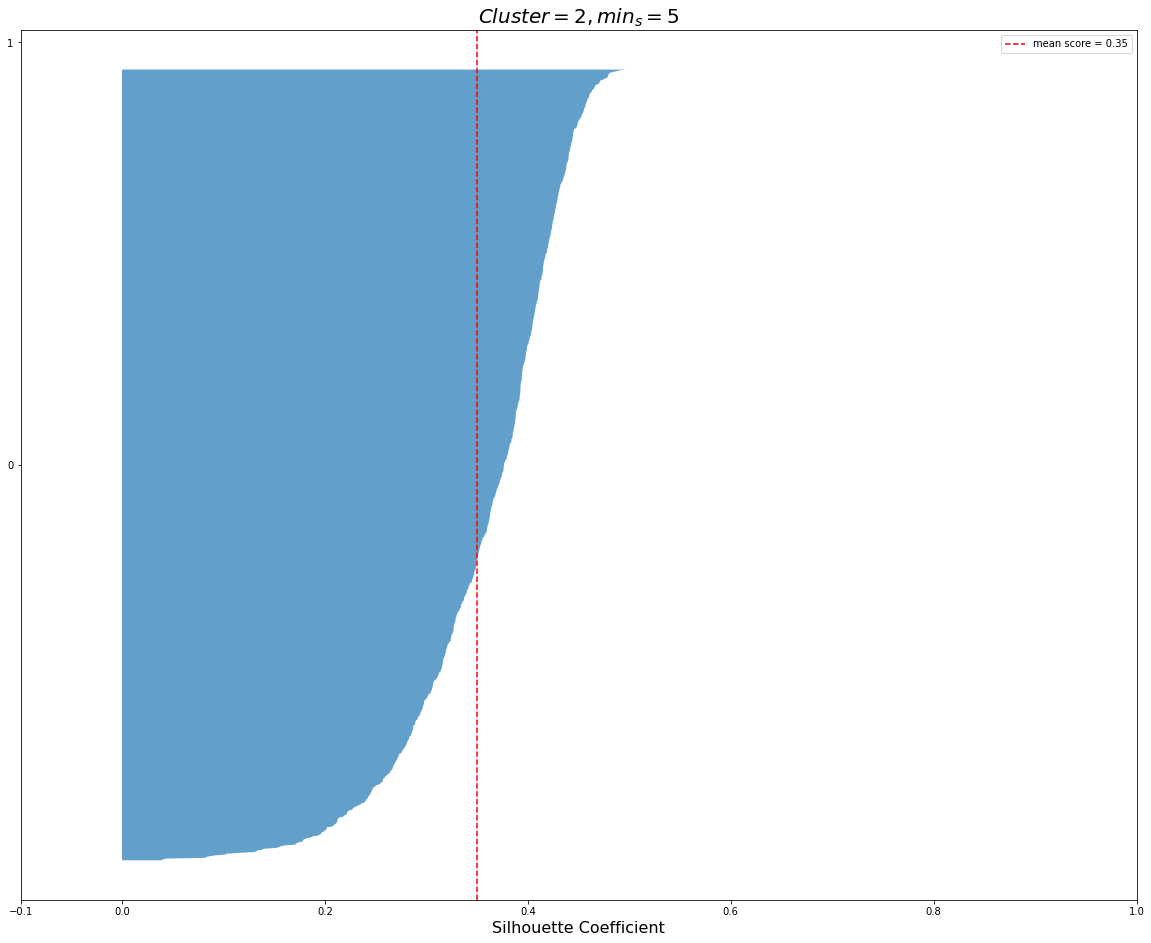

0.35516064444551876


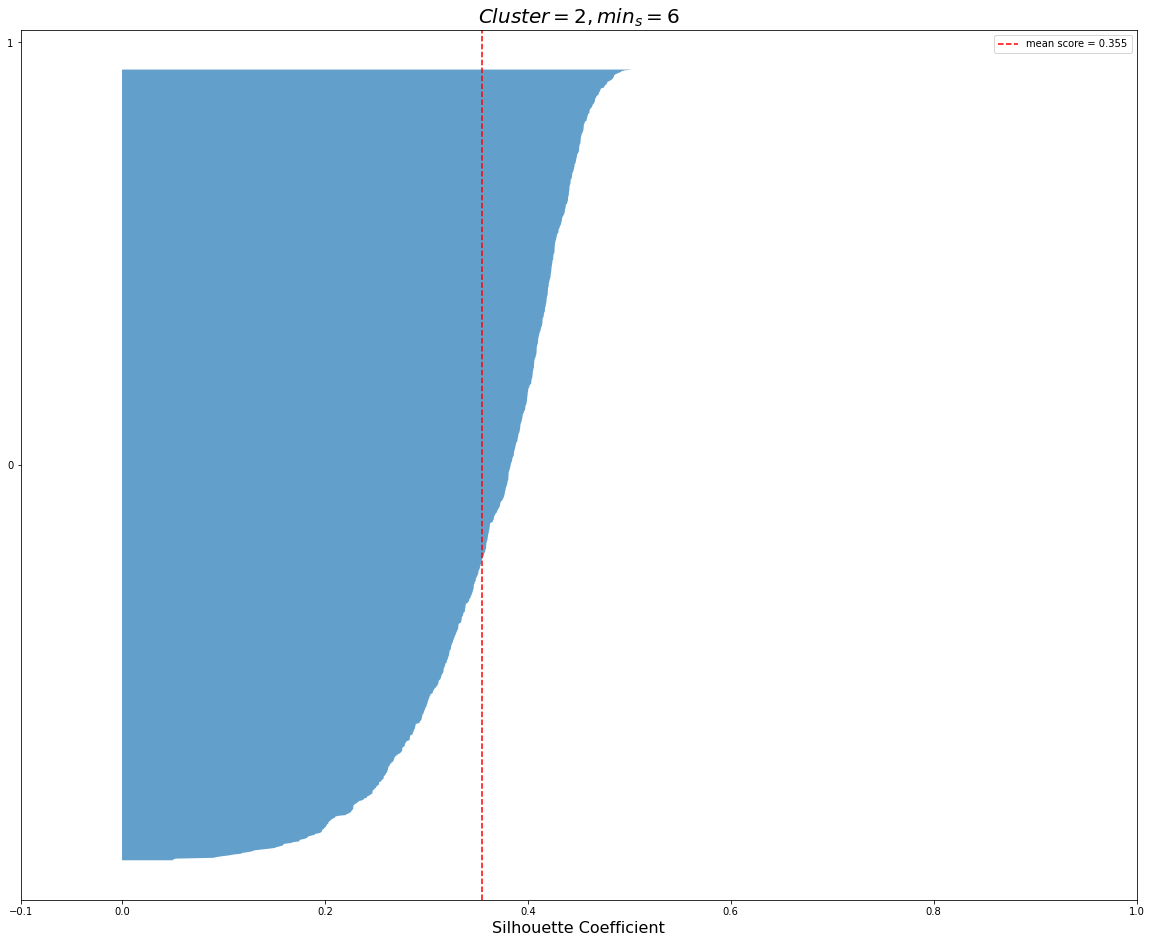

0.3978914784825221


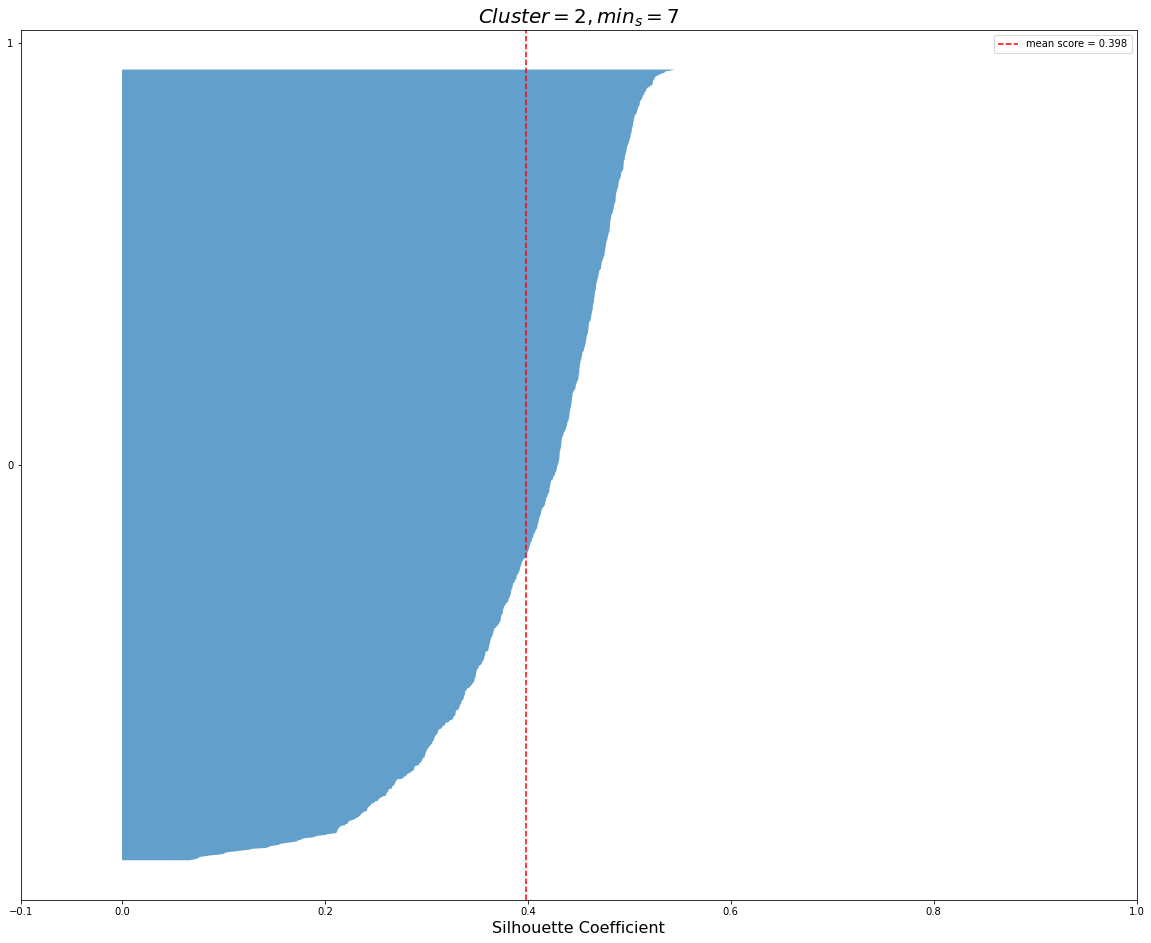

0.35242420625393245


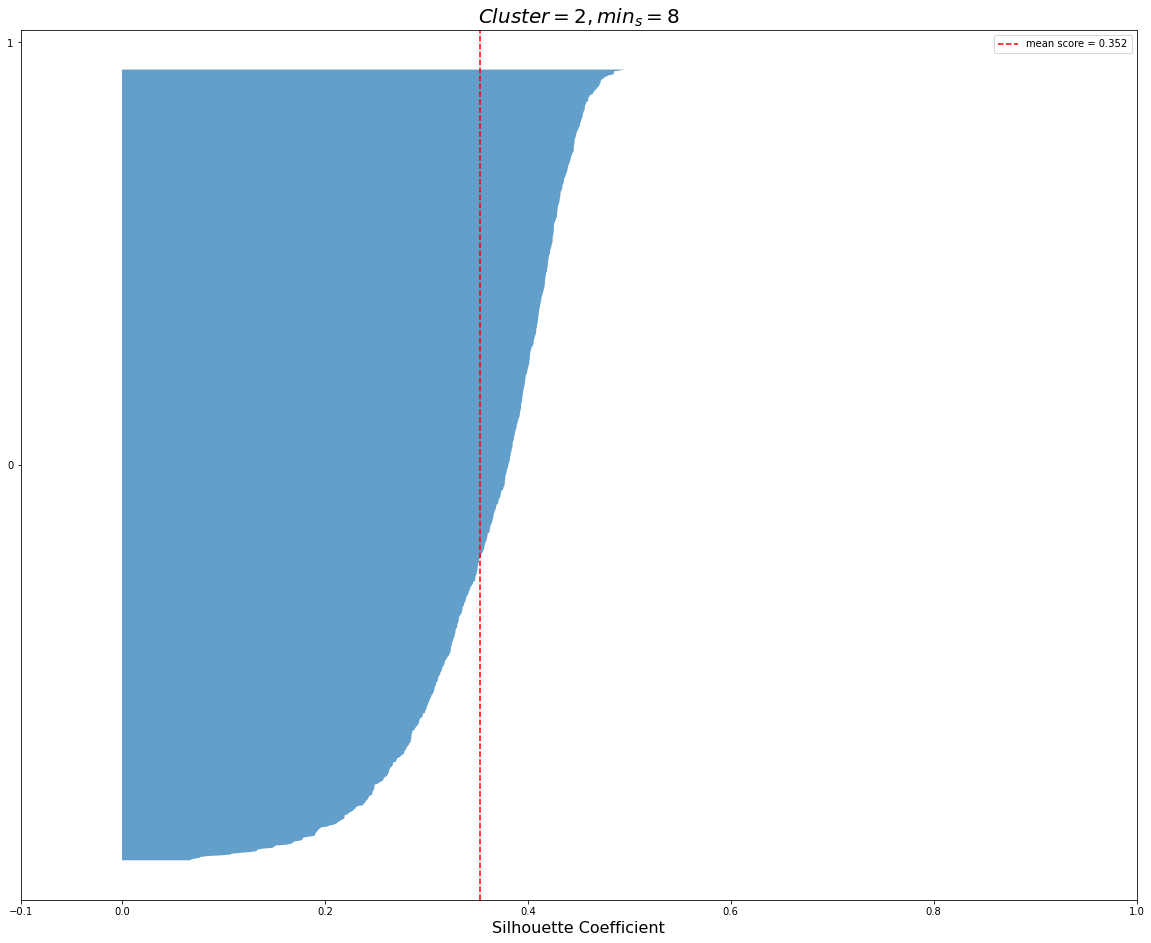

In [86]:
# Test a range of min_sample with euclidean dist
for min_s in min_samples: 
  plt.figure(figsize=(20,16))

  model = DBSCAN(eps= get_eps(test, min_s, "euclidean"), min_samples=min_s, metric="euclidean").fit(test)

  labels = model.labels_

  y_pred = np.asarray(labels)
    
  silhouette_scores = silhouette_score(reviews, y_pred)
  silhouette_coefficients = silhouette_samples(reviews, labels)
  padding = len(reviews) // 30
  pos = padding
  ticks = []

  k = len(set(model.labels_))
  for i in range(k):
      coeffs = silhouette_coefficients[y_pred == i]
      coeffs.sort()

      plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,alpha=0.7)
      ticks.append(pos + len(coeffs) // 2)
      pos += len(coeffs) + padding

  plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
  plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
  if k in (3, 30):
      plt.ylabel("Cluster", fontsize=16)

  if k in (2, 5, 10, 20):
      plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
      plt.xlabel("Silhouette Coefficient", fontsize=16)
  else:
      plt.tick_params(labelbottom=False)

  plt.axvline(x=silhouette_scores, color="red", linestyle="--", label = "mean score = {}".format(round(silhouette_scores, 3)))
  print(silhouette_scores)
  plt.title("$Cluster={}, min_s = {} $".format(k, min_s), fontsize=20)
  plt.legend()
  plt.show()

# N.B. find clusters algorithm adapted from COMP5318 Lab 10

0.23438186755313636


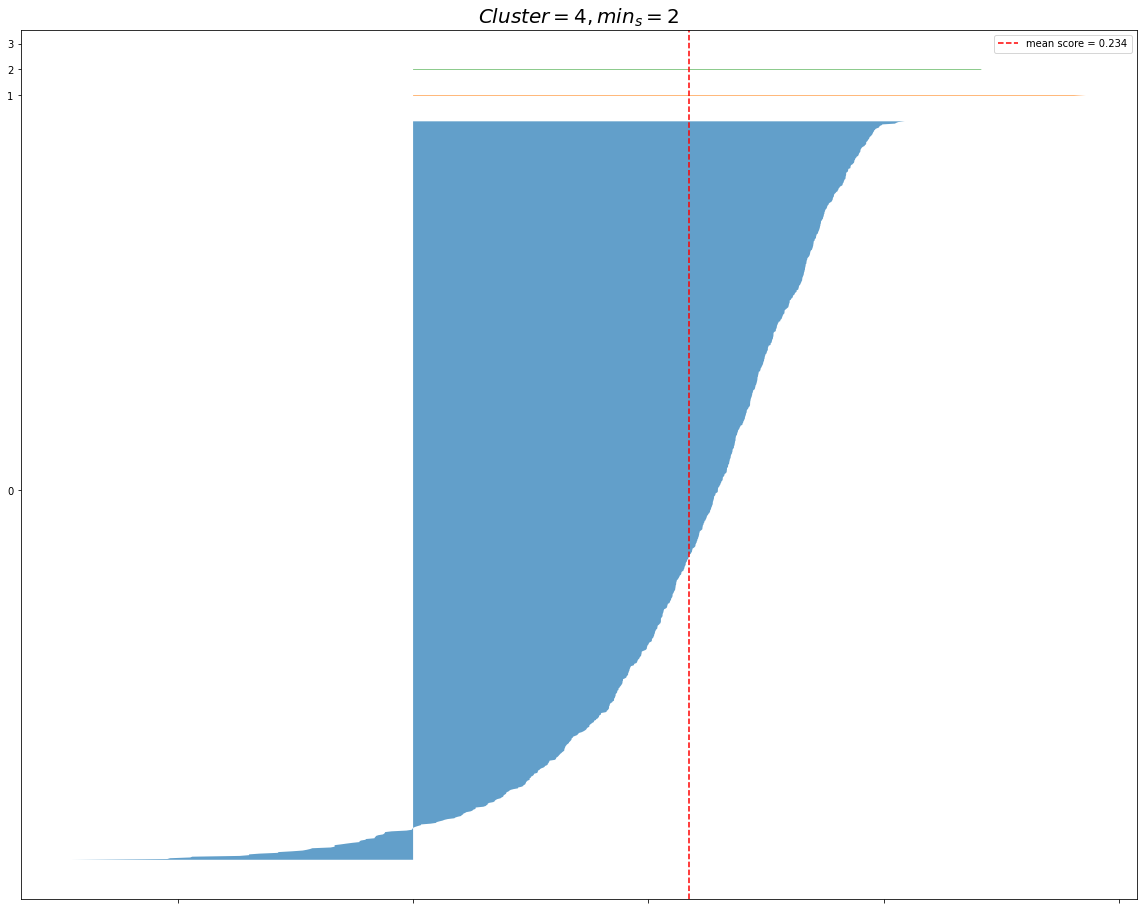

0.24448046206646606


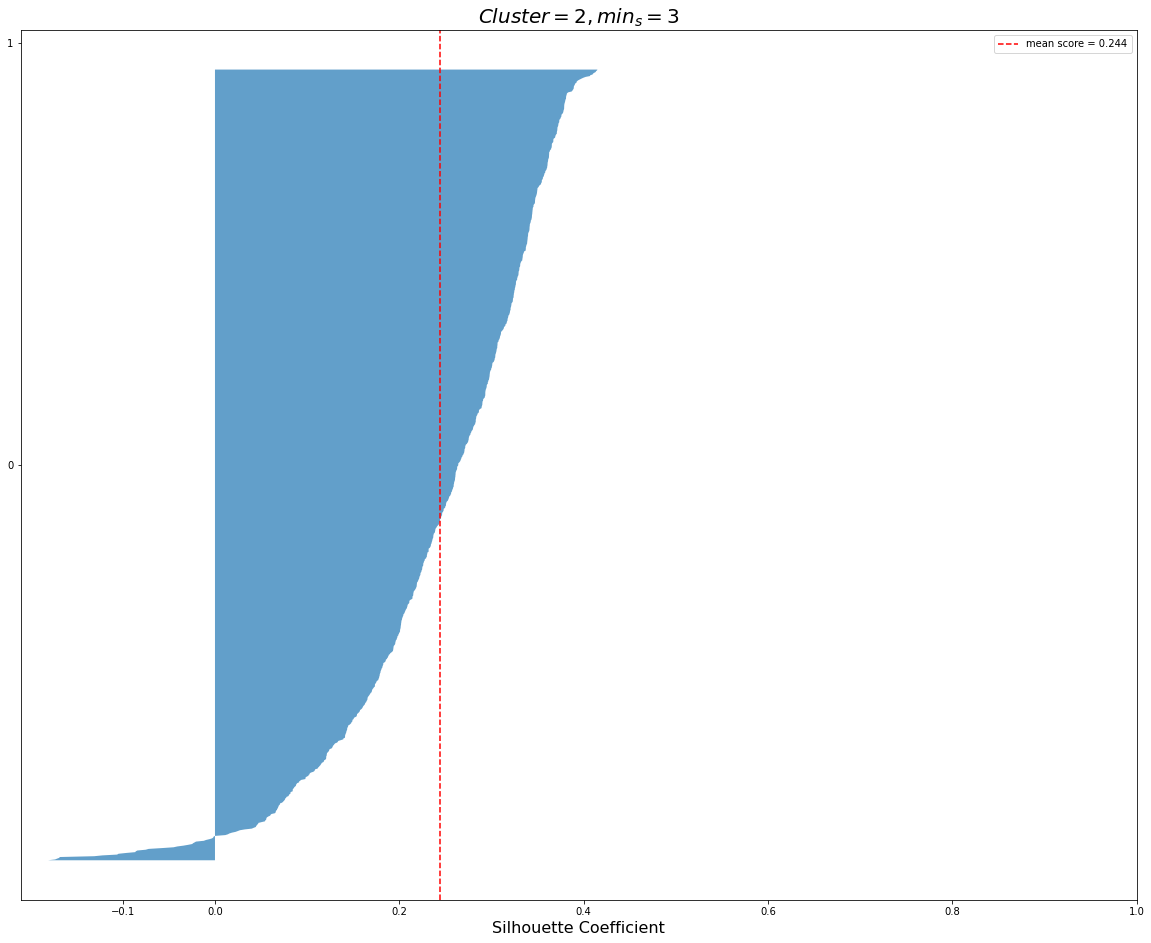

0.2735705820818396


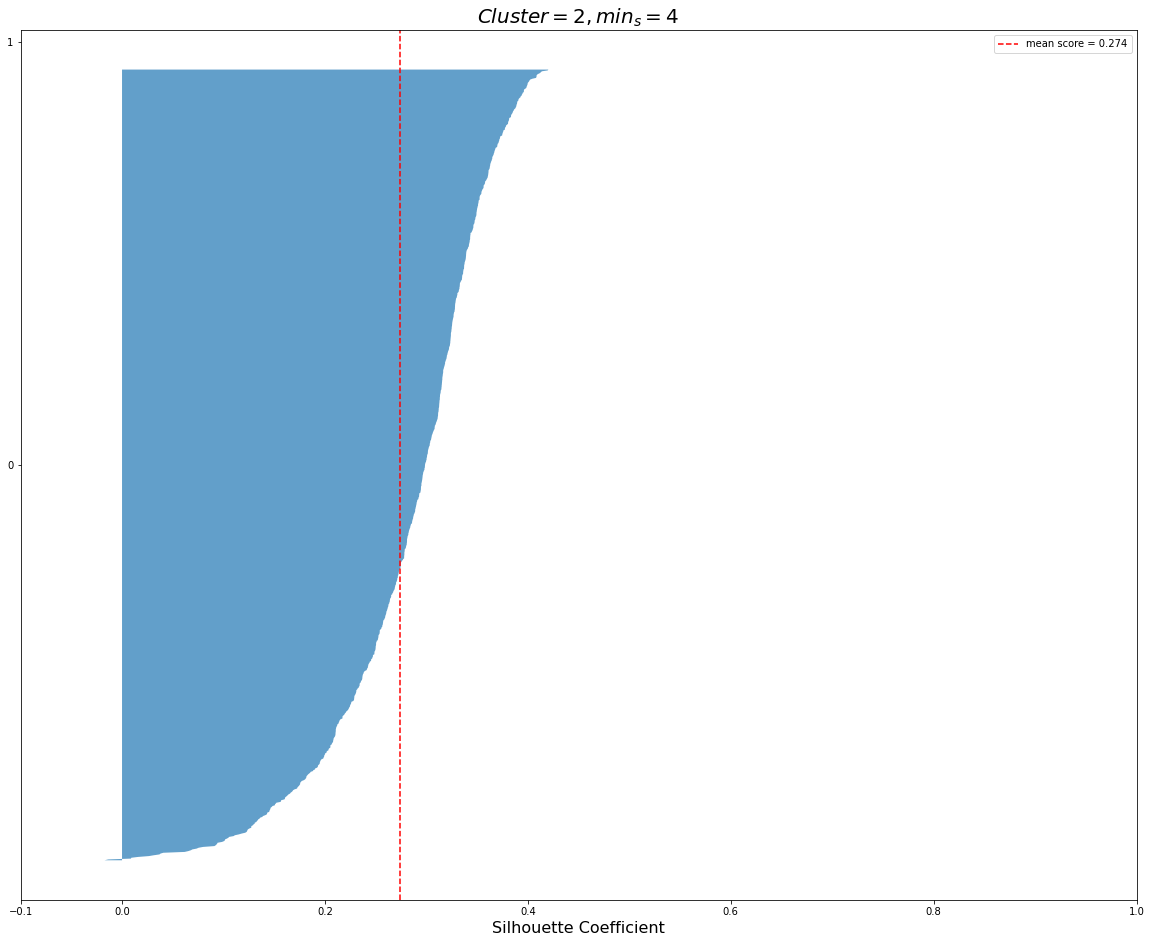

0.28717530025443516


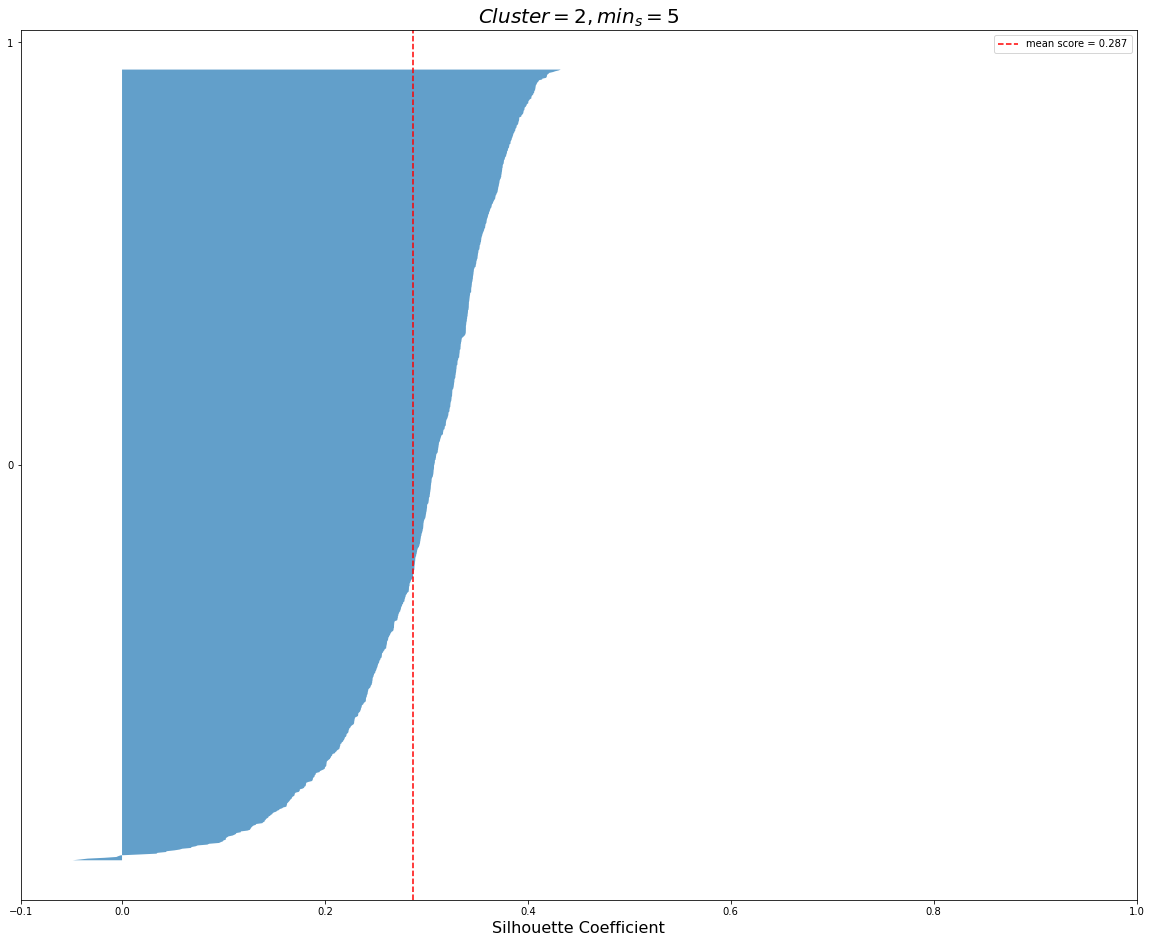

0.2769280562647262


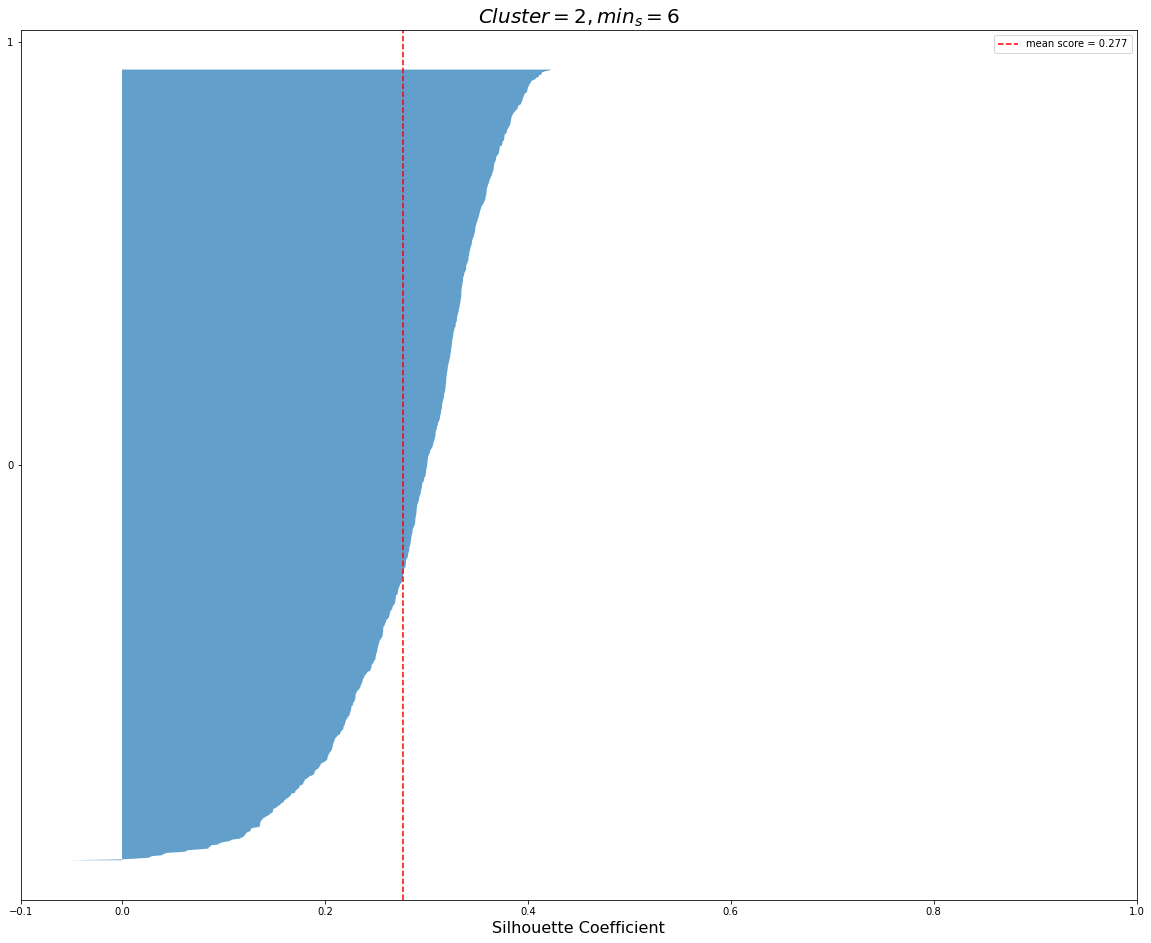

0.31454848778044064


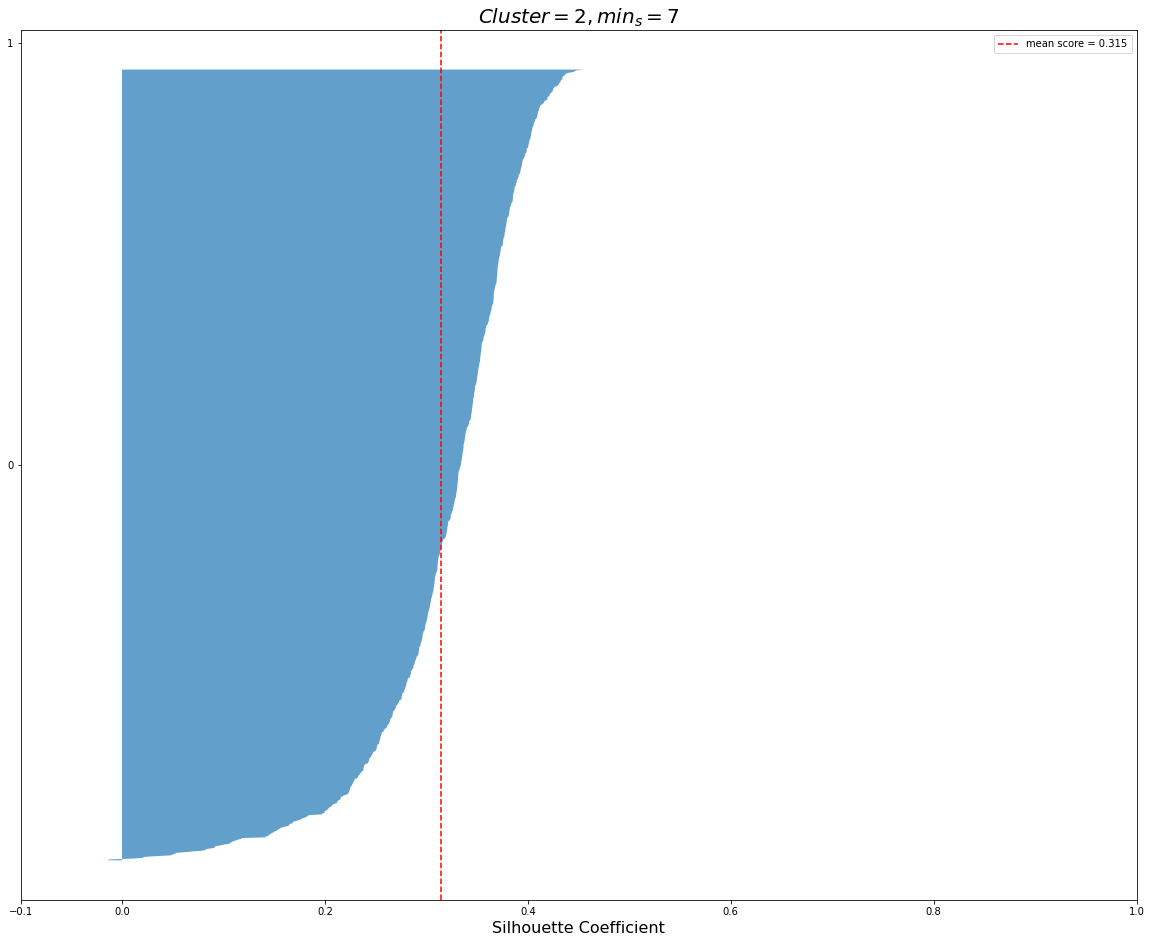

0.2911366731463023


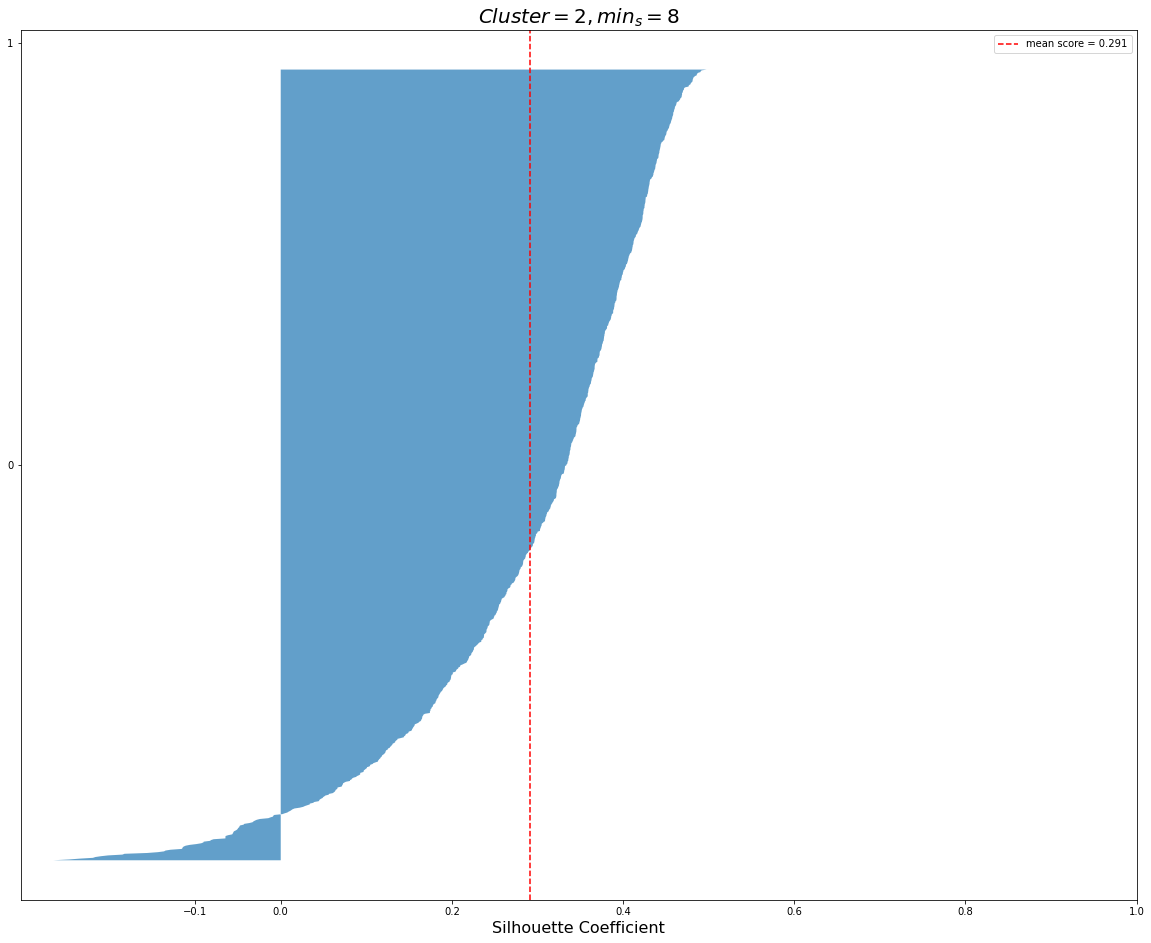

In [87]:
# Test a range of min_sample with cosine dist
for min_s in min_samples: 
  plt.figure(figsize=(20,16))

  model = DBSCAN(eps= get_eps(test, min_s, "cosine"), min_samples=min_s, metric="cosine").fit(test)

  labels = model.labels_

  y_pred = np.asarray(labels)
    
  silhouette_scores = silhouette_score(reviews, y_pred)
  silhouette_coefficients = silhouette_samples(reviews, labels)
  padding = len(reviews) // 30
  pos = padding
  ticks = []

  k = len(set(model.labels_))
  for i in range(k):
      coeffs = silhouette_coefficients[y_pred == i]
      coeffs.sort()

      plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,alpha=0.7)
      ticks.append(pos + len(coeffs) // 2)
      pos += len(coeffs) + padding

  plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
  plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
  if k in (3, 30):
      plt.ylabel("Cluster", fontsize=16)

  if k in (2, 5, 10, 20):
      plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
      plt.xlabel("Silhouette Coefficient", fontsize=16)
  else:
      plt.tick_params(labelbottom=False)

  plt.axvline(x=silhouette_scores, color="red", linestyle="--", label = "mean score = {}".format(round(silhouette_scores, 3)))
  print(silhouette_scores)
  plt.title("$Cluster={}, min_s = {} $".format(k, min_s), fontsize=20)
  plt.legend()
  plt.show()

# N.B. find clusters algorithm adapted from COMP5318 Lab 10

## 4.2 ICMLA Dataset

### Train DBSCAN clustering 

In [88]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors # this is used as a method to estimate epsilon

# below are the optimal models that have been found by evaluation

dbscan1 = DBSCAN(eps= get_eps(reform_tfidf_matrix, 3, "manhattan"), min_samples=3, metric="manhattan")
dbscan1.fit(reform_tfidf_matrix)

dbscan2 = DBSCAN(eps= get_eps(reform_tfidf_matrix, 3, "euclidean"), min_samples=3, metric="euclidean")
dbscan2.fit(reform_tfidf_matrix)

dbscan3 = DBSCAN(eps= get_eps(reform_tfidf_matrix, 3, "cosine"), min_samples=3, metric="cosine")
dbscan3.fit(reform_tfidf_matrix)

print("Num of cluster", len(set(dbscan1.labels_)))
print("Num of cluster", len(set(dbscan2.labels_)))
print("Num of cluster", len(set(dbscan3.labels_)))

Num of cluster 2
Num of cluster 2
Num of cluster 2


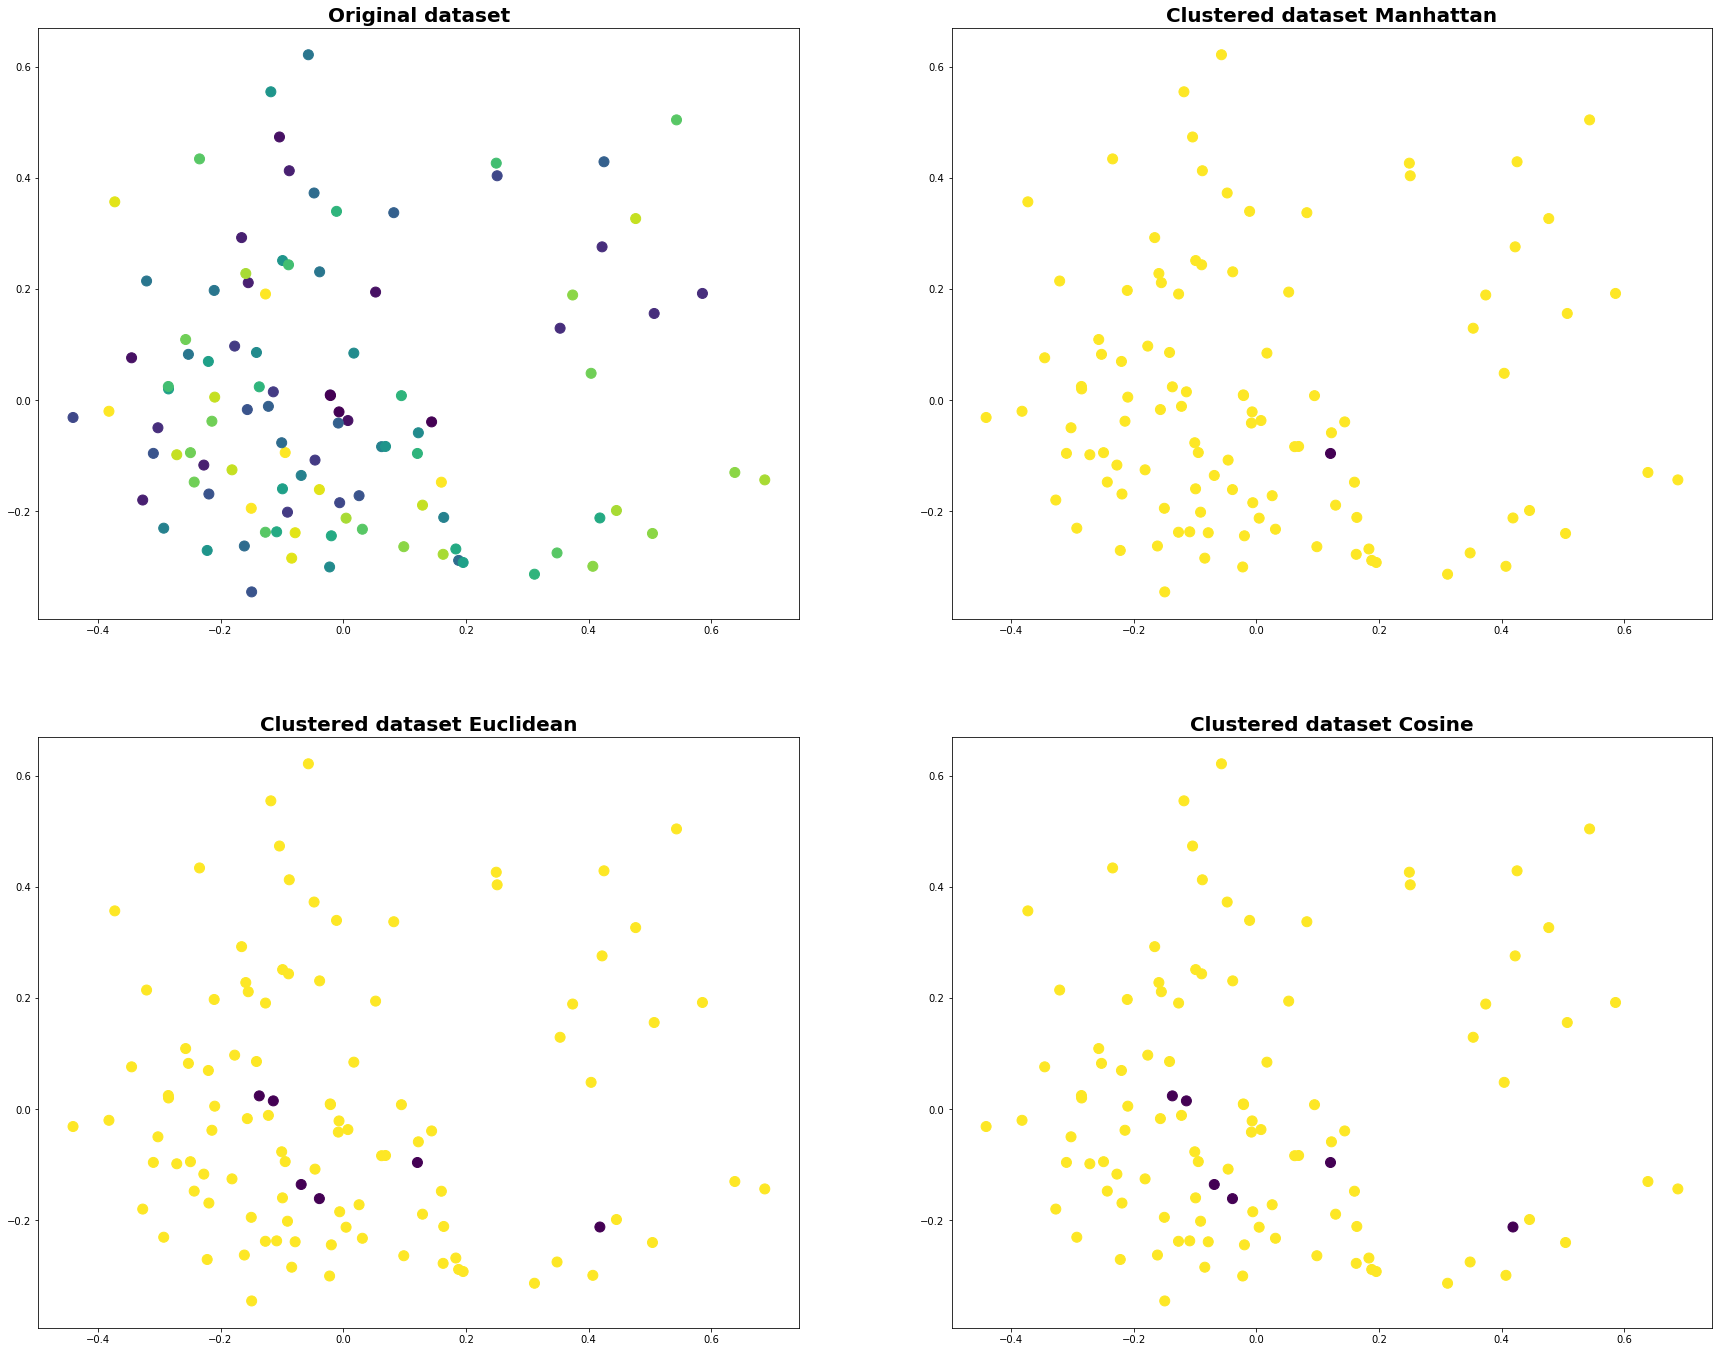

In [89]:
# Visualize paper data in 2D using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
comps = pca.fit_transform(reform_tfidf_matrix)

new_df = pd.DataFrame(data = comps
             , columns = ['Comp1', 'Comp2'])


# a scatter plot 
plt.figure(figsize=(30,50))
plt.tight_layout(pad=4.0)
plt.subplot(421)
plt.title("Original dataset", weight='bold', size=20)
plt.scatter(new_df['Comp1'], new_df['Comp2'], c=papers["session_encoded"], s=100);

plt.subplot(422)
plt.title("Clustered dataset Manhattan", weight='bold', size=20)
plt.scatter(new_df['Comp1'], new_df['Comp2'], c=dbscan1.labels_, s=100);

plt.subplot(423)
plt.title("Clustered dataset Euclidean", weight='bold', size=20)
plt.scatter(new_df['Comp1'], new_df['Comp2'], c=dbscan2.labels_, s=100);

plt.subplot(424)
plt.title("Clustered dataset Cosine", weight='bold', size=20)
plt.scatter(new_df['Comp1'], new_df['Comp2'], c=dbscan3.labels_, s=100);

### First evaluation 

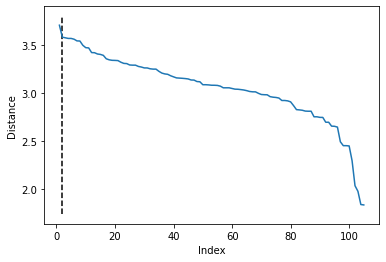

3.5825139015761995

In [90]:
# Chosing Epsilon, Manhattan dist metric
# lets start off with min_s = 5
min_s = 3
get_eps(reform_tfidf_matrix, min_s, "manhattan", True)

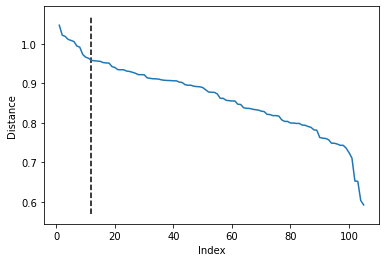

0.9580201373061212

In [91]:
# Chose optimal eps for euclidean distance
get_eps(reform_tfidf_matrix, min_s, "euclidean", True)

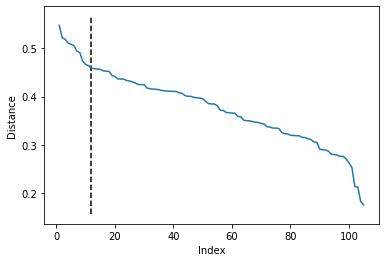

0.45890129174201966

In [92]:
# Chose optimal eps for Cosine distance
get_eps(reform_tfidf_matrix, 3, "cosine", True)

### Second evaluation 

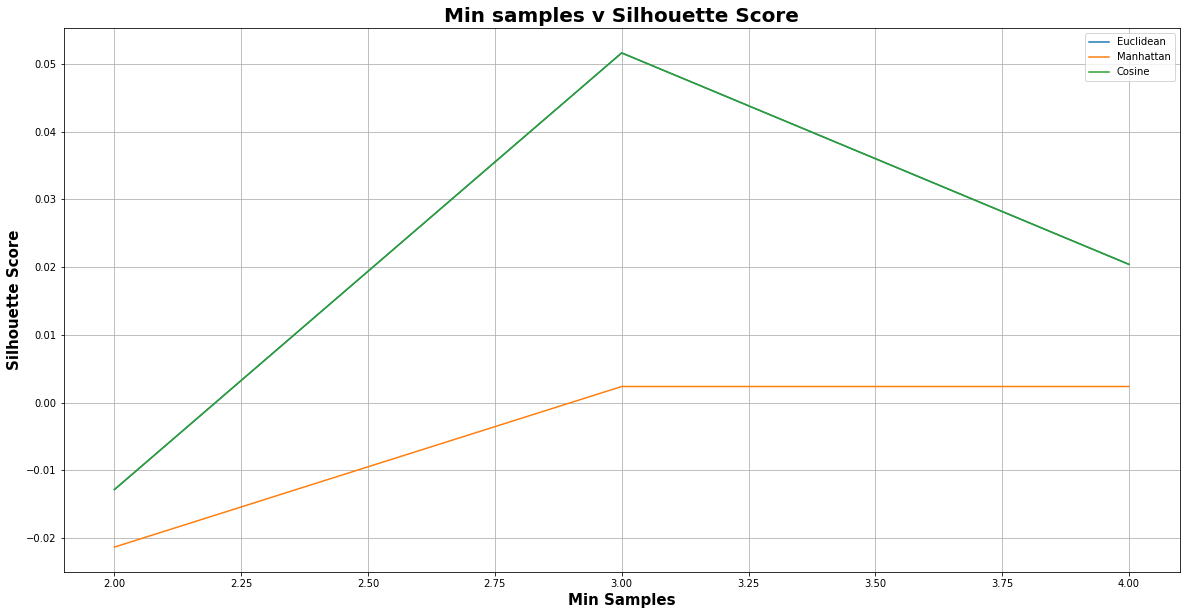

In [94]:
# Selection of min samples
min_samples = [2, 3, 4]

# Arrays to store the various evaluation metrics 
# Internal measures 

silhouette_scores_euclidean= []

silhouette_scores_manhattan = []

silhouette_scores_cosine= []

rand_db_euclidean = []
rand_db_cosine = []
rand_db_manhattan = [] 


# Training three different versions of DBSCAN with optimal eps for each metric/min_sample
# notice for every metric, we calculate the optimal epsilon for the metric/min_sample as well

for min_s in min_samples:
    dbscan1 = DBSCAN(eps= get_eps(reform_tfidf_matrix, min_s, "manhattan"), min_samples=min_s, metric="manhattan")
    dbscan1.fit(reform_tfidf_matrix)

    dbscan2 = DBSCAN(eps= get_eps(reform_tfidf_matrix, min_s, "euclidean"), min_samples=min_s, metric="euclidean")
    dbscan2.fit(reform_tfidf_matrix)

    dbscan3 = DBSCAN(eps= get_eps(reform_tfidf_matrix, min_s, "cosine"), min_samples=min_s, metric="cosine")
    dbscan3.fit(reform_tfidf_matrix)

    score_manhattan = silhouette_score(reform_tfidf_matrix, dbscan1.labels_)
    score_euclidean = silhouette_score(reform_tfidf_matrix, dbscan2.labels_)
    score_cosine = silhouette_score(reform_tfidf_matrix, dbscan3.labels_)

    silhouette_scores_manhattan.append(score_manhattan)
    silhouette_scores_euclidean.append(score_euclidean)
    silhouette_scores_cosine.append(score_cosine)

    rand = metrics.adjusted_rand_score(dbscan1.labels_, papers['session_encoded'])
    rand_db_manhattan.append(rand)
    
    rand = metrics.adjusted_rand_score(dbscan2.labels_, papers['session_encoded'])
    rand_db_euclidean.append(rand)

    rand = metrics.adjusted_rand_score(dbscan3.labels_, papers['session_encoded'])
    rand_db_cosine.append(rand)

# Plotting silhouette scores 
plt.figure(figsize=(20,10))

plt.plot(min_samples, silhouette_scores_euclidean, label= 'Euclidean')
plt.plot(min_samples, silhouette_scores_manhattan, label= 'Manhattan')
plt.plot(min_samples, silhouette_scores_cosine, label = 'Cosine')

plt.xlabel('Min Samples', weight='bold', size=15)
plt.ylabel('Silhouette Score', weight='bold', size=15)
plt.title('Min samples v Silhouette Score', size = 20, weight='bold')
plt.legend()
plt.grid(1)
plt.show();

In [95]:
# Table of rand index values for different min samples values
index = ['eculidean', 'cosine', 'manhattan']
k = [2, 3, 4]
rand_all = [rand_db_euclidean, rand_db_cosine, rand_db_manhattan]
rand_df = pd.DataFrame(rand_all, columns=k, index=index)

rand_df.round(3)

2      3    4
eculidean  0.006  0.001  0.0
cosine     0.006  0.001  0.0
manhattan  0.000 -0.000 -0.0

-0.01283649519775101


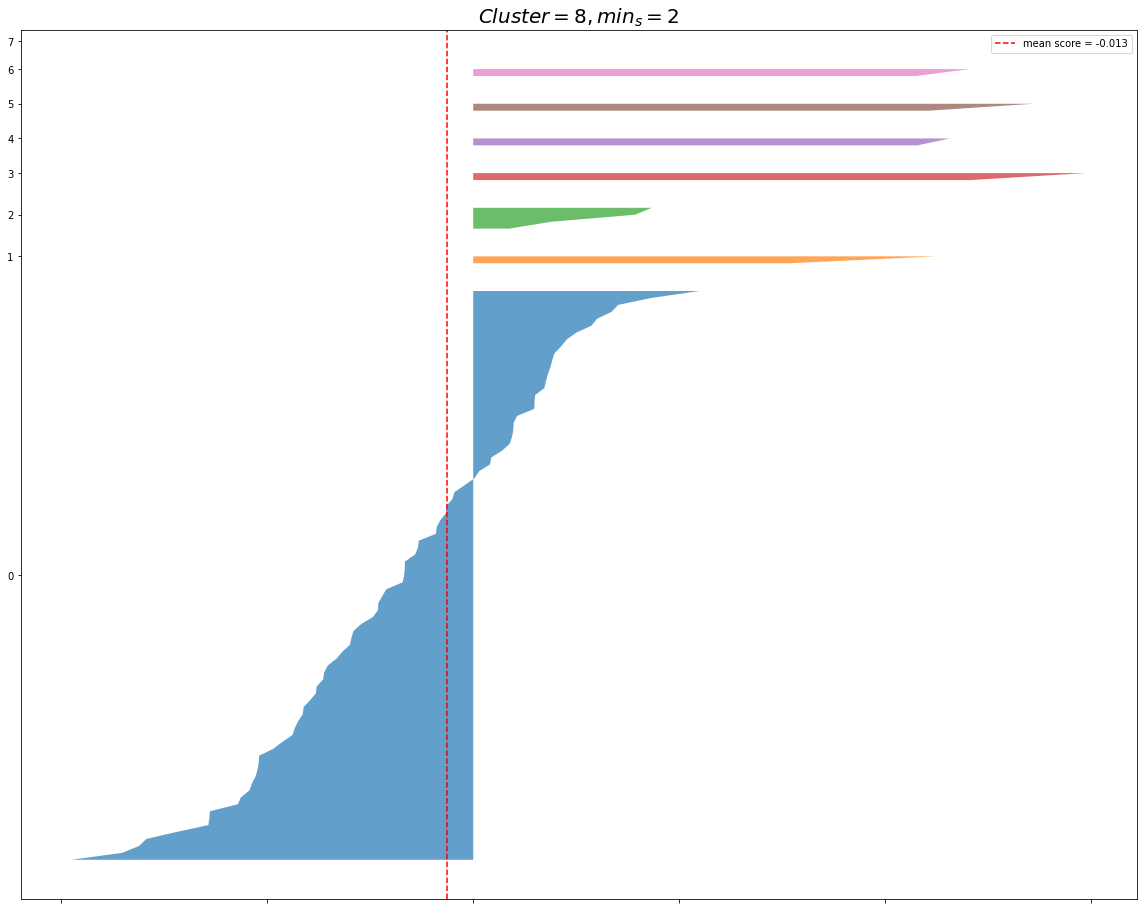

0.051615642810899316


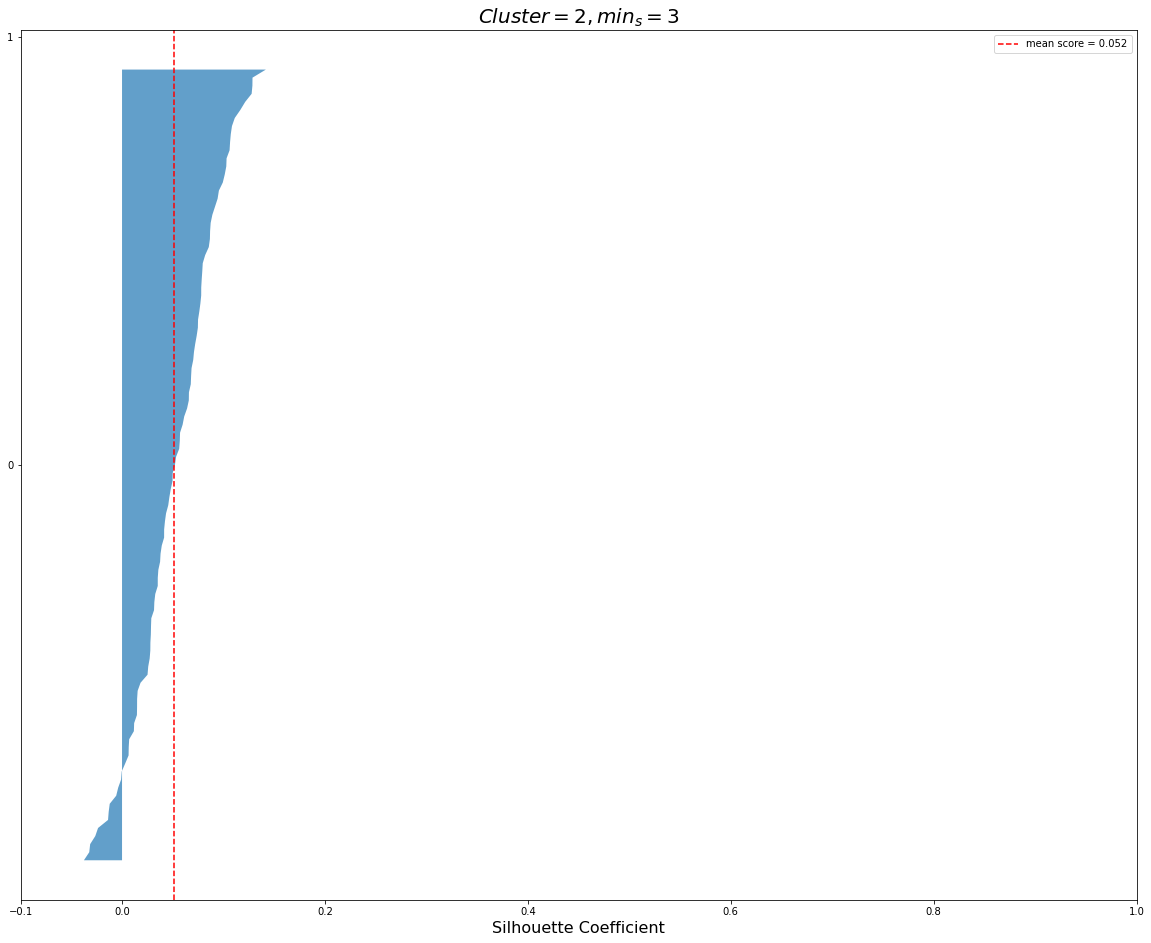

0.020403778249508026


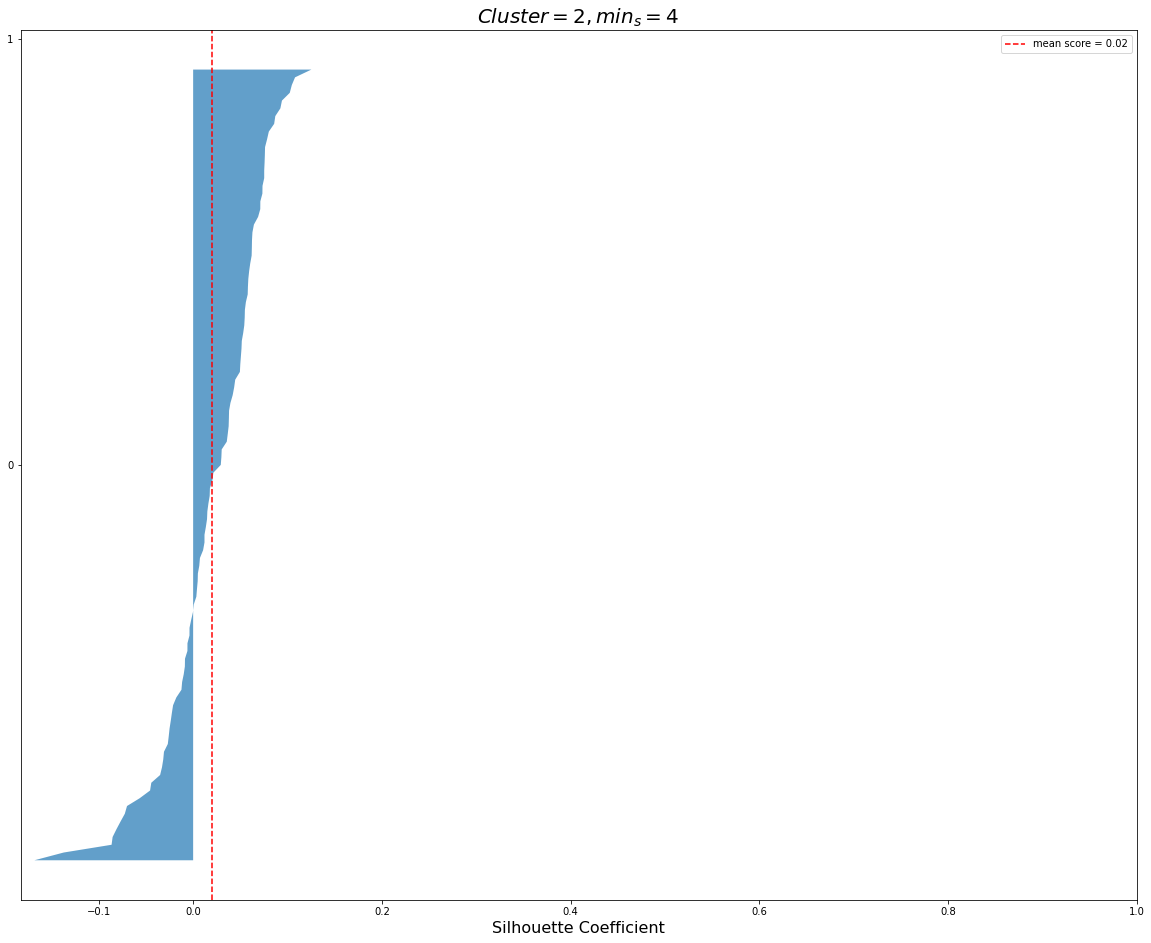

In [0]:
# Test a range of min_sample with cosine dist
for min_s in min_samples: 
  plt.figure(figsize=(20,16))

  model = DBSCAN(eps= get_eps(reform_tfidf_matrix, min_s, "cosine"), min_samples=min_s, metric="cosine").fit(reform_tfidf_matrix)

  labels = model.labels_

  y_pred = np.asarray(labels)
    
  silhouette_scores = silhouette_score(reform_tfidf_matrix, y_pred)
  silhouette_coefficients = silhouette_samples(reform_tfidf_matrix, labels)
  padding = len(reform_tfidf_matrix) // 30
  pos = padding
  ticks = []

  k = len(set(model.labels_))
  for i in range(k):
      coeffs = silhouette_coefficients[y_pred == i]
      coeffs.sort()

      plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,alpha=0.7)
      ticks.append(pos + len(coeffs) // 2)
      pos += len(coeffs) + padding

  plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
  plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
  if k in (3, 30):
      plt.ylabel("Cluster", fontsize=16)

  if k in (2, 5, 10, 20):
      plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
      plt.xlabel("Silhouette Coefficient", fontsize=16)
  else:
      plt.tick_params(labelbottom=False)

  plt.axvline(x=silhouette_scores, color="red", linestyle="--", label = "mean score = {}".format(round(silhouette_scores, 3)))
  print(silhouette_scores)
  plt.title("$Cluster={}, min_s = {} $".format(k, min_s), fontsize=20)
  plt.legend()
  plt.show()

# N.B. find clusters algorithm adapted from COMP5318 Lab 10

-0.0213264475071155


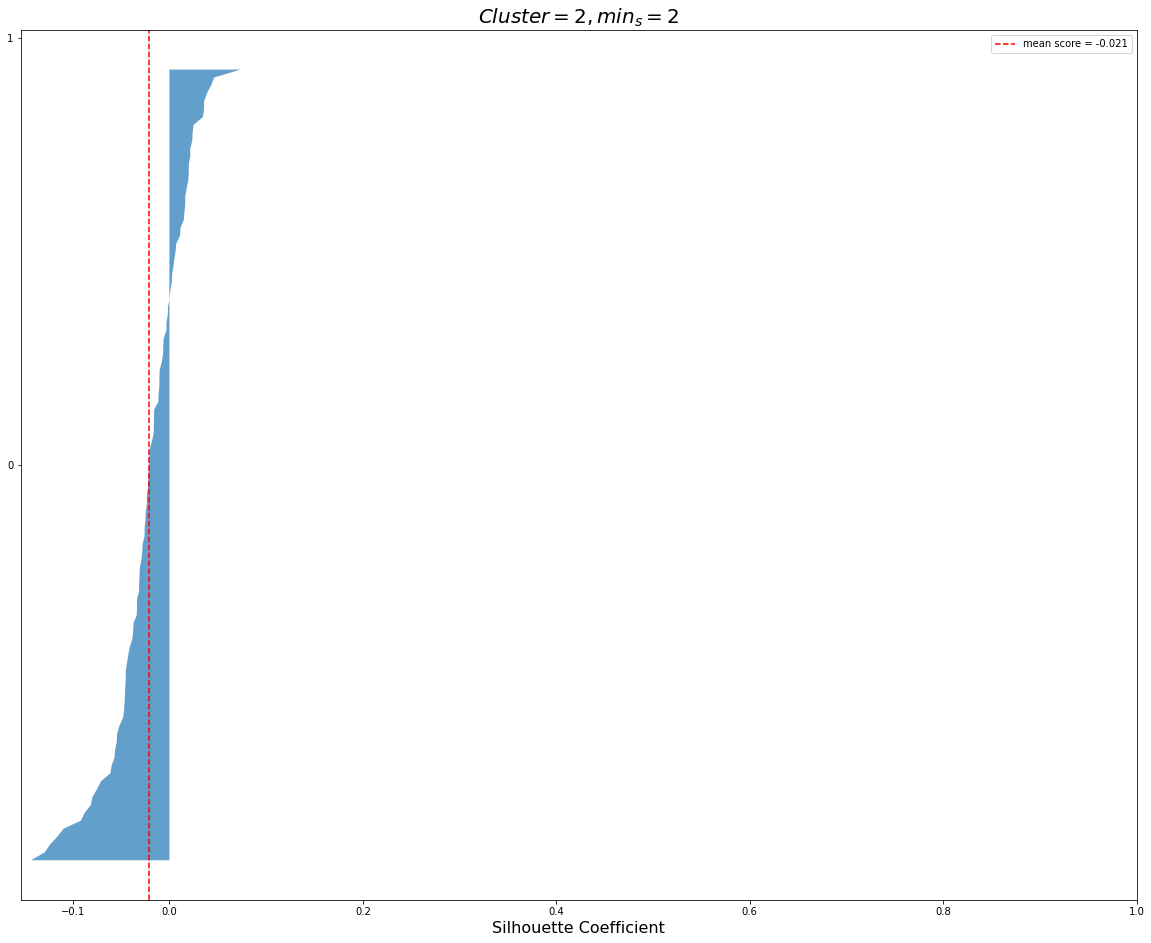

0.00237585031835146


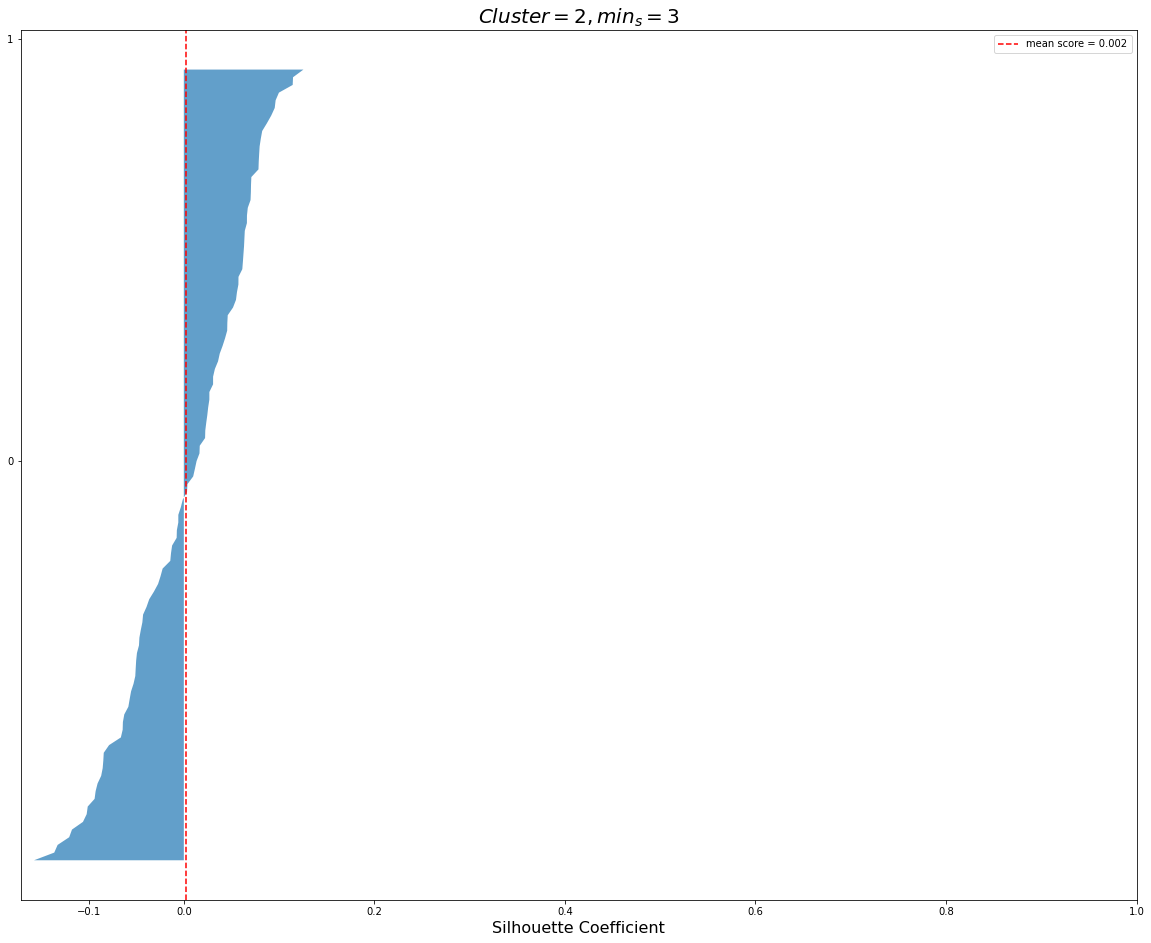

0.00237585031835146


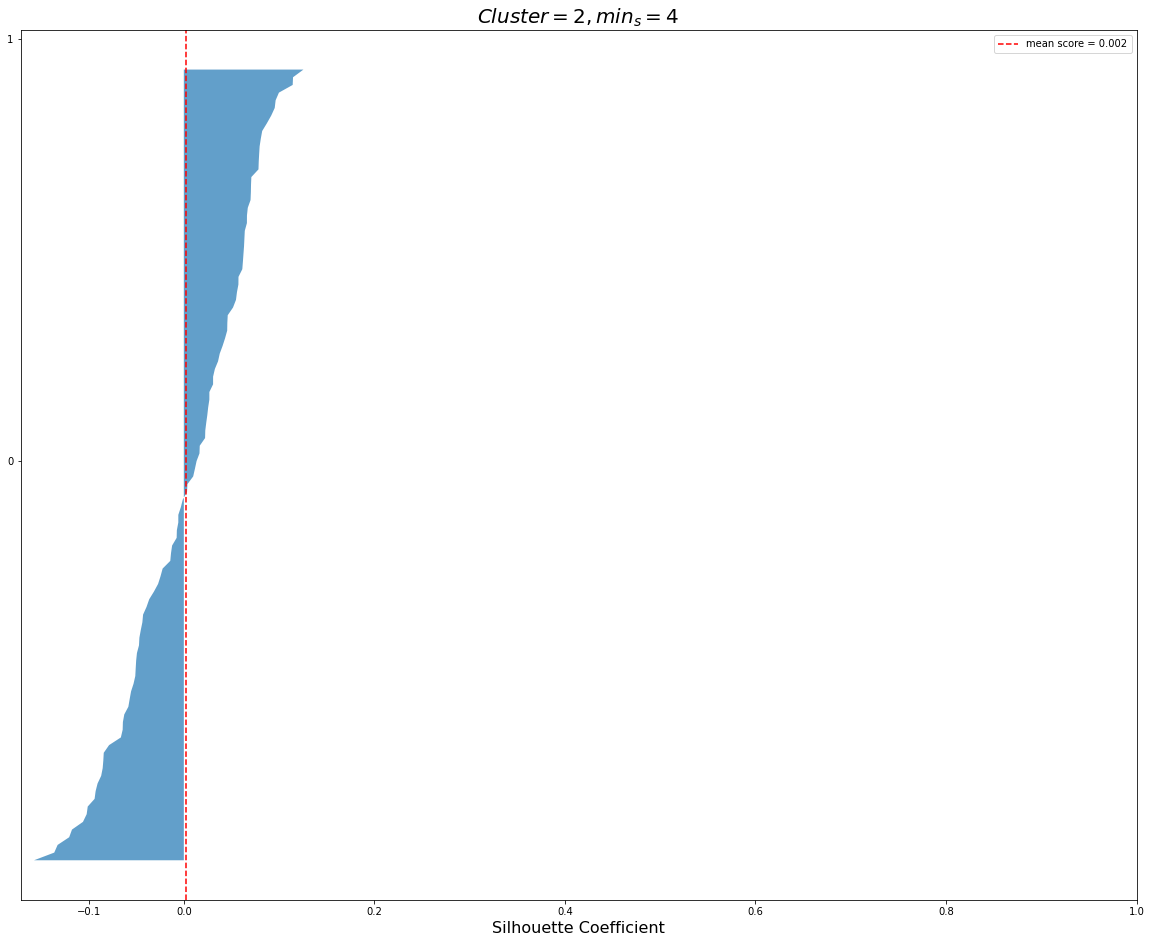

In [0]:
# Test a range of min_sample with manhattan dist
for min_s in min_samples: 
  plt.figure(figsize=(20,16))

  model = DBSCAN(eps= get_eps(reform_tfidf_matrix, min_s, "manhattan"), min_samples=min_s, metric="manhattan").fit(reform_tfidf_matrix)

  labels = model.labels_

  y_pred = np.asarray(labels)
    
  silhouette_scores = silhouette_score(reform_tfidf_matrix, y_pred)
  silhouette_coefficients = silhouette_samples(reform_tfidf_matrix, labels)
  padding = len(reform_tfidf_matrix) // 30
  pos = padding
  ticks = []

  k = len(set(model.labels_))
  for i in range(k):
      coeffs = silhouette_coefficients[y_pred == i]
      coeffs.sort()

      plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,alpha=0.7)
      ticks.append(pos + len(coeffs) // 2)
      pos += len(coeffs) + padding

  plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
  plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
  if k in (3, 30):
      plt.ylabel("Cluster", fontsize=16)

  if k in (2, 5, 10, 20):
      plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
      plt.xlabel("Silhouette Coefficient", fontsize=16)
  else:
      plt.tick_params(labelbottom=False)

  plt.axvline(x=silhouette_scores, color="red", linestyle="--", label = "mean score = {}".format(round(silhouette_scores, 3)))
  print(silhouette_scores)
  plt.title("$Cluster={}, min_s = {} $".format(k, min_s), fontsize=20)
  plt.legend()
  plt.show()

# N.B. find clusters algorithm adapted from COMP5318 Lab 10

-0.01283649519775101


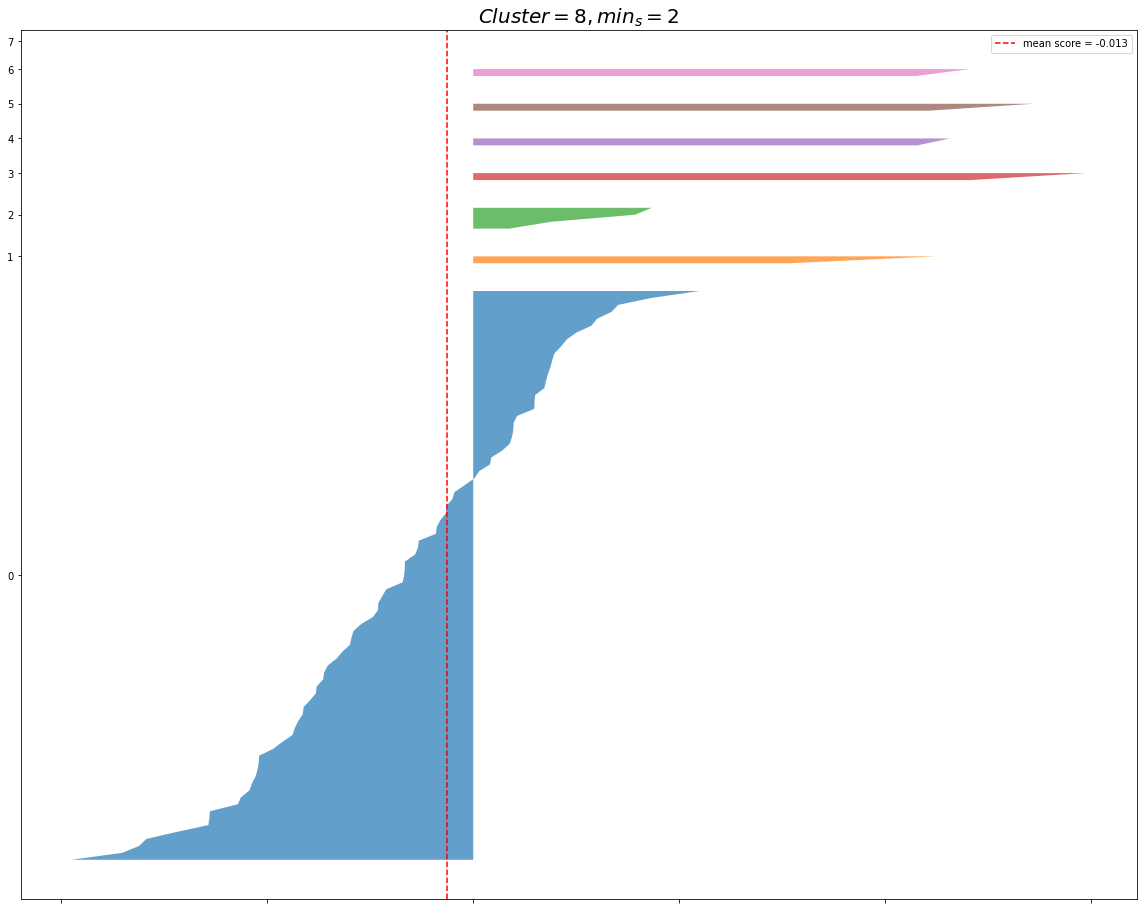

0.051615642810899316


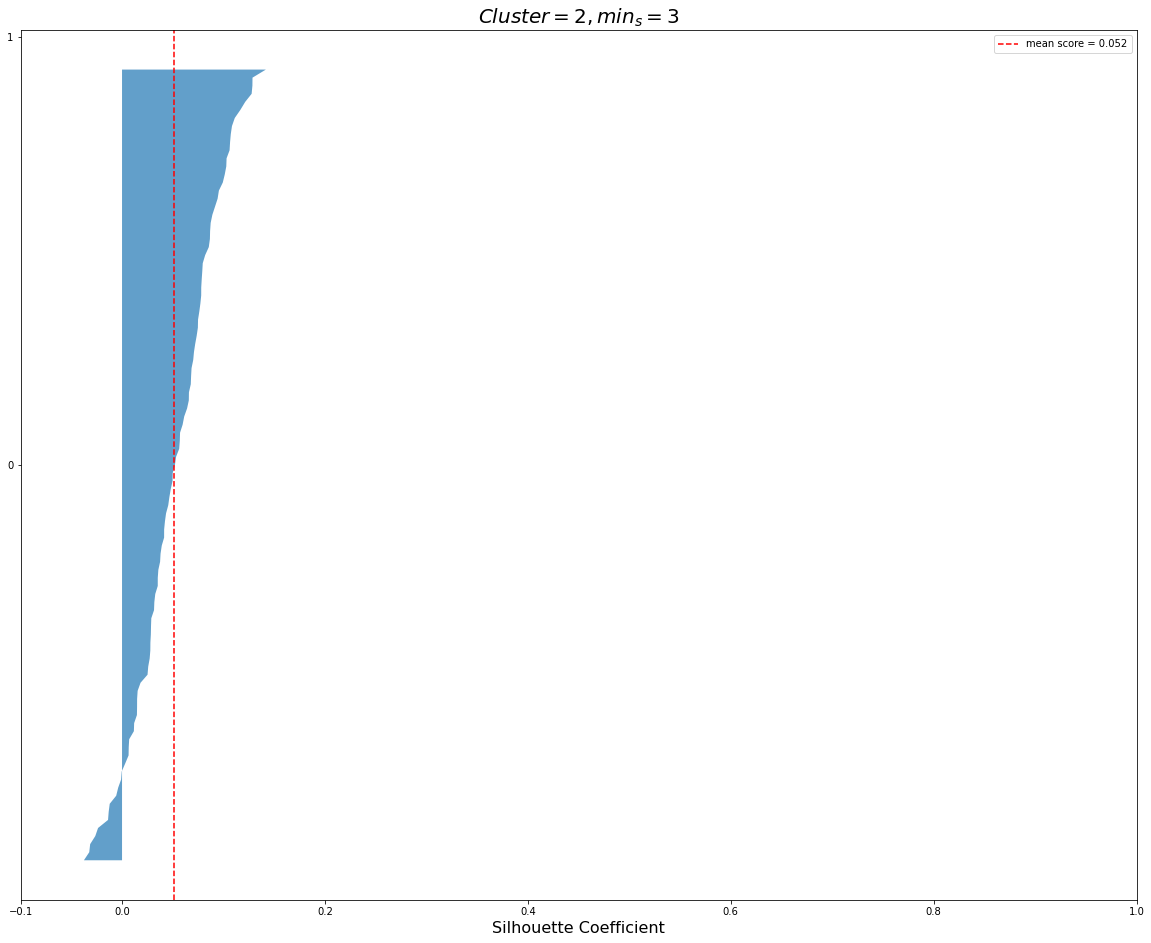

0.020403778249508026


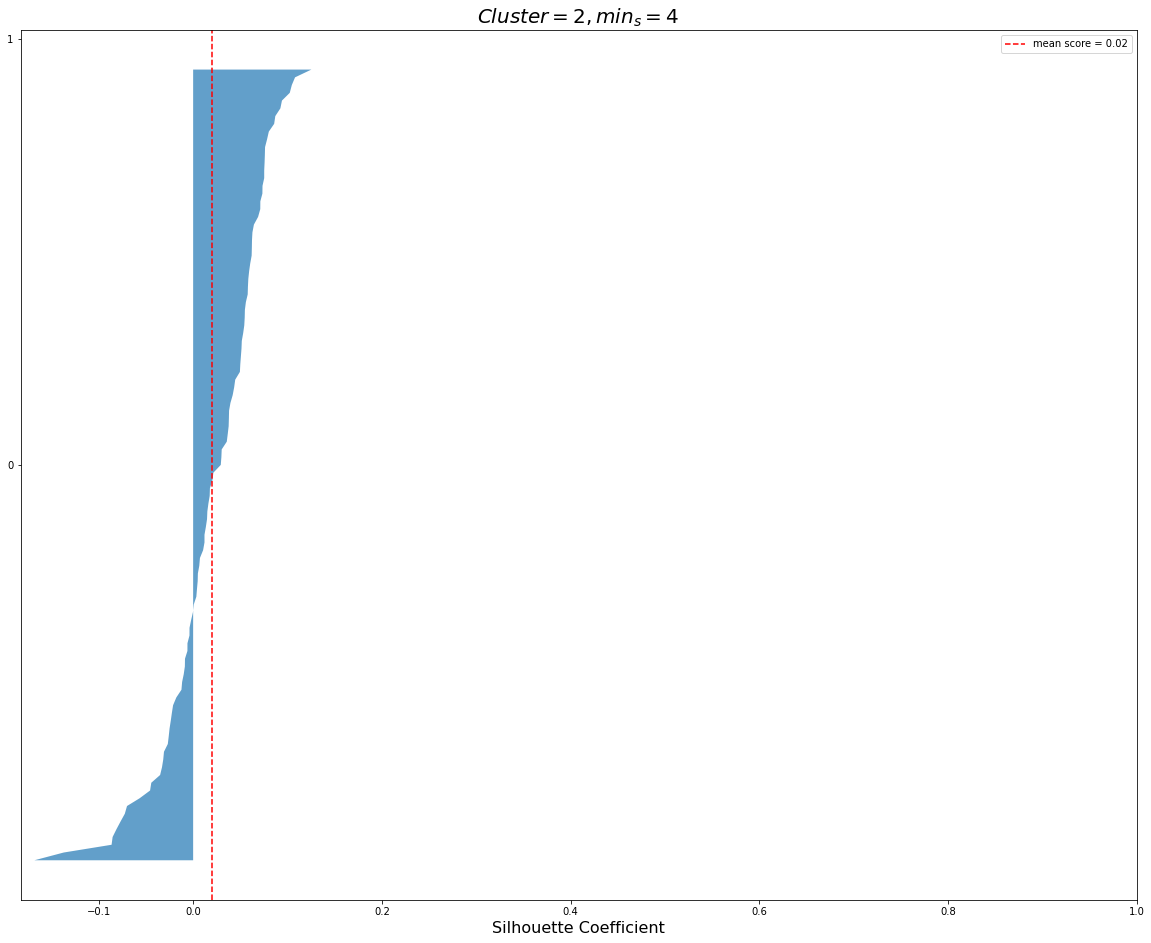

In [0]:
# Test a range of min_sample with euclidean dist
for min_s in min_samples: 
  plt.figure(figsize=(20,16))

  model = DBSCAN(eps= get_eps(reform_tfidf_matrix, min_s, "euclidean"), min_samples=min_s, metric="euclidean").fit(reform_tfidf_matrix)

  labels = model.labels_

  y_pred = np.asarray(labels)
    
  silhouette_scores = silhouette_score(reform_tfidf_matrix, y_pred)
  silhouette_coefficients = silhouette_samples(reform_tfidf_matrix, labels)
  padding = len(reform_tfidf_matrix) // 30
  pos = padding
  ticks = []

  k = len(set(model.labels_))
  for i in range(k):
      coeffs = silhouette_coefficients[y_pred == i]
      coeffs.sort()

      plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,alpha=0.7)
      ticks.append(pos + len(coeffs) // 2)
      pos += len(coeffs) + padding

  plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
  plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
  if k in (3, 30):
      plt.ylabel("Cluster", fontsize=16)

  if k in (2, 5, 10, 20):
      plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
      plt.xlabel("Silhouette Coefficient", fontsize=16)
  else:
      plt.tick_params(labelbottom=False)

  plt.axvline(x=silhouette_scores, color="red", linestyle="--", label = "mean score = {}".format(round(silhouette_scores, 3)))
  print(silhouette_scores)
  plt.title("$Cluster={}, min_s = {} $".format(k, min_s), fontsize=20)
  plt.legend()
  plt.show()

# N.B. find clusters algorithm adapted from COMP5318 Lab 10

Estimated number of clusters: 1
Estimated number of noise points: 6
Homogeneity: 0.032
Completeness: 0.462
V-measure: 0.060
Adjusted Rand Index: 0.001
Adjusted Mutual Information: 0.006
Silhouette Coefficient: 0.052


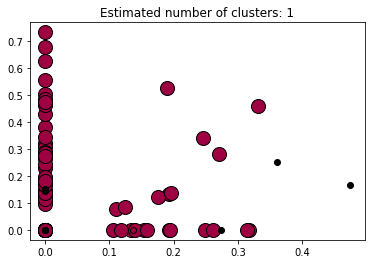

In [0]:
# Visualize DBSCAN result with True Ground Labels 
# Compute DBSCAN
db = DBSCAN(eps= get_eps(reform_tfidf_matrix, 3, "cosine"), min_samples=3, metric="cosine").fit(reform_tfidf_matrix)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
labels_true = papers["session_encoded"]

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(reform_tfidf_matrix, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = reform_tfidf_matrix[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = reform_tfidf_matrix[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# N.B. Code adapted from https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html